# Homework 8 - Artificial Neural Networks with PyTorch

## About 

### In this homework, you will get your feet wet with deep learning using the PyTorch deep learning platform. This will involve:
* Preparing data 
* Learning about the components of a deep learning pipeline
* Setting up a model, a loss function, and an optimizer
* Setting up training and testing loops
* Using a visualizer like tensorboard to monitor logged data

*This homework is due __April 15th 2019__. Training neural networks takes some time, particularly on CPUs so start early.* 


## Dev Environment
### Working on Google Colab
You may choose to work locally or on Google Colaboratory. You have access to free compute through this service. 
1. Visit https://colab.research.google.com/drive 
2. Navigate to the **`Upload`** tab, and upload your `HW8.ipynb`
3. Now on the top right corner, under the `Comment` and `Share` options, you should see a `Connect` option. Once you are connected, you will have access to a VM with 12GB RAM, 50 GB disk space and a single GPU. The dropdown menu will allow you to connect to a local runtime as well.

**Notes:** 
* **If you do not have a working setup for Python 3, this is your best bet. It will also save you from heavy installations like `tensorflow` if you don't want to deal with those.**
* ***There is a downside*. You can only use this instance for a single 12-hour stretch, after which your data will be deleted, and you would have redownload all your datasets, any libraries not already on the VM, and regenerate your logs**.


### Installing PyTorch and Dependencies

The instructions for installing and setting up PyTorch can be found at https://pytorch.org/get-started/locally/. Make sure you follow the instructions for your machine. For any of the remaining libraries used in this assignment:
* We have provided a `hw8_requirements.txt` file on the homework web page. 
* Download this file, and in the same directory you can run `pip3 install -r hw8_requirements.txt`

Check that PyTorch installed correctly by running the following:

In [22]:
import torch
torch.rand(5, 3)

tensor([[0.9050, 0.4191, 0.5526],
        [0.2620, 0.1071, 0.6703],
        [0.5528, 0.8830, 0.0891],
        [0.7288, 0.1282, 0.2008],
        [0.6437, 0.0093, 0.3985]])

The output should look something like

```python
tensor([[0.3380, 0.3845, 0.3217],
        [0.8337, 0.9050, 0.2650],
        [0.2979, 0.7141, 0.9069],
        [0.1449, 0.1132, 0.1375],
        [0.4675, 0.3947, 0.1426]])
```

### Let's get started with the assignment.

## Instructions
### Part 1 -  Datasets and Dataloaders (10 points)

In this section we will download the MNIST dataset using PyTorch's own API.

Helpful Resources:
* https://pytorch.org/docs/stable/torchvision/datasets.html#mnist
* https://pytorch.org/docs/stable/torchvision/transforms.html
* https://pytorch.org/tutorials/beginner/data_loading_tutorial.html


The `torchvision` package consists of popular datasets, model architectures, and common image transformations for computer vision. We are particularly concerned with `torchvision.datasets` and `torchvision.transforms`. Check out the API for these modules in the links provided above.

**Create a directory named `hw8_data` with the following command**.

In [23]:
!mkdir hw8_data

A subdirectory or file hw8_data already exists.



**Now use `torch.datasets.MNIST` to load the Train and Test data into `hw8_data`.** 
* ** Use the directory you created above as the `root` directory for your datasets**
* ** Populate the `transformations` variable with any transformations you would like to perform on your data.** (Hint: You will need to do at least one)
* **Pass your `transformations` variable to `torch.datasets.MNIST`. This allows you to perform arbitrary transformations to your data at loading time.**

In [24]:
from torchvision import datasets, transforms
import os

transformations = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor()
    ])

mnist_train = datasets.MNIST(root='hw8_data', train=True, transform=transformations, target_transform=None, download=True)
mnist_test = datasets.MNIST(root='hw8_data', train=False, transform=transformations, target_transform=None, download=True)

Check that your torch datasets have been successfully downloaded into your data directory by running the next two cells. 

* Each will output some metadata about your dataset. 
* Check that the training set has 60000 datapoints and a `Root Location: hw8_data`
* Check that the testing (__also validation in our case__) set has 10000 datapoints and `Root Location: hw8_data`

Notice that these datasets implement the python `__len__` and `__getitem__` functions. Each element in the dataset should be a 2-tuple. What does yours look like?

In [25]:
print(len(mnist_train))
print(len(mnist_train[0]))
mnist_train

60000
2


Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: hw8_data
    Transforms (if any): Compose(
                             Grayscale(num_output_channels=1)
                             ToTensor()
                         )
    Target Transforms (if any): None

In [5]:
print(len(mnist_test))
print(len(mnist_test[0]))
mnist_test

10000
2


Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: hw8_data
    Transforms (if any): Compose(
                             Grayscale(num_output_channels=1)
                             ToTensor()
                         )
    Target Transforms (if any): None

**Any file in our dataset will now be read at runtime, and the specified transformations we need on it will be applied when we need it.**. 

We could iterate through these directly using a loop, but this is not idiomatic. PyTorch provides us with this abstraction in the form of `DataLoaders`. The module of interest is `torch.utils.data.DataLoader`. 

`DataLoader` allows us to do lots of useful things
* Group our data into batches
* Shuffle our data
* Load the data in parallel using `multiprocessing` workers

**Use `DataLoader` to create a loader for the training set and one for the testing set**
* **Use a `batch_size` of 32 to start, you may change it if you wish.**
* **Set the `shuffle` parameter to `True`.** 


In [6]:
from torch.utils.data import DataLoader

## YOUR CODE HERE ##
train_loader = DataLoader(mnist_train, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(mnist_test, batch_size=32, shuffle=True, num_workers=4)

The following function is adapted from `show_landmarks_batch` at 
https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#iterating-through-the-dataset . 

Run the following cell to see that your loader provides a random `batch_size` number of data points.

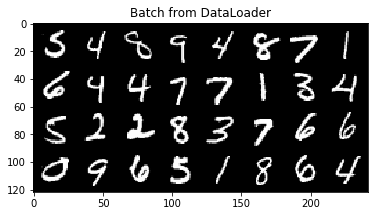

In [7]:
import matplotlib.pyplot as plt
from torchvision import utils
%matplotlib inline

def show_mnist_batch(sample_batched):
    """Show images for a batch of samples."""
    images_batch = sample_batched[0]
    batch_size = len(images_batch)
    im_size = images_batch.size(2)

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.title('Batch from DataLoader')
    
# Displays the first batch of images
for i, batch in enumerate(train_loader):
    if i==1:
        break
    show_mnist_batch(batch)

### Part 2  - Models, Loss Functions and Optimizers (10 points)

In this section, we will do the following:
* Learn about how to build your deep learning model and define its parameters
* Choose a loss function to optimize
* Choose an optimization method to maximize/minimize the loss

We'll first start with a single layer neural network to do handwritten digit classification. The math may ring some bells from homework 7.

`torch.nn` is the module we will be using here. You can find the API at https://pytorch.org/docs/stable/nn.html. There is also a quick summary at https://pytorch.org/tutorials/beginner/nn_tutorial.html#closing_thoughts.

#### Models

We will use the following python modules in building our one layer model.

* `torch.nn.Module`: Your model will be abstracted as a python class. Your python class must subclass `torch.nn.Module`. It is the base class for all neural network modules in PyTorch (Do not confuse python modules with PyTorch Modules). These implement the `forward()` function which defines how your model handles input and produces an output. Your model class can also have `torch.nn.Module`s as members, allowing nested tree like structures, and it is leveraging this that you are able to build neural networks in PyTorch.   

* `torch.nn.Linear`: A unit of computation in neural networks are *Layers* and PyTorch provides abstractions for layers as `nn.Modules`. These come in many forms including *Convolutional*, *Recurrent*, and *Linear*. You can find the API for linear layers here https://pytorch.org/docs/stable/nn.html#linear-layers.

**Now use the information provided to define the `OneLayerModel` class below. The superclass constructor has been called for you, and this allows your subclass to access superclass methods and members.**
* **Finish the `__init__()` function.**
* **Finish the `forward()` function.** (Hint: Use that fact that layer modules implement their own `forward()` function)





In [8]:
from torch import nn
class OneLayerModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(OneLayerModel, self).__init__()
        ## YOUR CODE HERE ##
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        ## YOUR CODE HERE ##
        return self.linear(x.view(-1, 28*28))

#### Loss Functions and Optimizers

You've defined your model but now what? It's just a black box that takes an input and spits out some numbers. You haven't yet defined what it means to be a good or bad model. 

A ***Loss Function*** takes what your model outputs and compares it to what it *should* have put out. It returns some  meaningful value used to update your model parameters, and so train your model. Check out Section 21.2.1 of the textbook for more details about types of loss functions. The Loss function represents the overall goal of building this model, and the choice of loss function is very important. 

We must examine our model parameters and our problem instance to see about how to choose a loss function.
* We take in a 784-dimensional vector and output 10 real values, giving our model 784 x 10 parameters. 
* It is natural given that our problem is an instance of *multi-class classification* that we would want each of our output values to model `P(y==i|x)`.
* If we go this route, we get an added constraint that the sum of all 10 of our output values should be 1 (forming a probability mass distribution).

Turns out there is a very convenient loss function for just our use case known as ***cross-entropy loss***. Check out this reference https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy for a little more intuition on this.

Once again, PyTorch has abstractions built in for us in the `torch.nn` module, namely `torch.nn.CrossEntropyLoss`. The API can be found at https://pytorch.org/docs/stable/nn.html#crossentropyloss. 

We're still not ready to train our model because while we have some parameters, and we have some measure of how good or bad our predictions are, we have no notion of how to go about updating our parameters in order to improve our loss. 

This is where ***Optimizers*** come in. In general, we have one main way of minimizing loss functions (training our models), and that is through *Stochastic Gradient Descent* https://en.wikipedia.org/wiki/Stochastic_gradient_descent. There are many variants and optimizations of this method, however, and the `torch.optim` package gives us abstractions for these. The API can be found at https://pytorch.org/docs/stable/optim.html#.

In [9]:
from torch import optim

### Part 3 - Training and Validation (45 points)

In this section we will learn how to use the concepts we've learned about so far to train the model we built, and validate how well it does.We also want to monitor how well our training is going while it is happening. 

For this we can use a package called `tensorboardX`. You will need to install this package using `pip` or `Anaconda`, based on your dev environment. Additionally, we'll want to use a logging module called `tensorboardX.SummaryWriter`. You can consult the API here https://tensorboardx.readthedocs.io/en/latest/tutorial.html. Run the next cell to ensure that all is working well.

In [21]:
""" Try uncommenting these commands if you're facing issues here
!pip3 install -U protobuf
!pip3 install -U tensorflow
!pip3 install -U tensorboardX
"""
%load_ext tensorboard.notebook
from tensorboardX import SummaryWriter

The tensorboard.notebook extension is already loaded. To reload it, use:
  %reload_ext tensorboard.notebook


We have provided the code to use `tensorboard` just before calling your `train` function. You don't have to change the top-level log directory, but you can create multiple runs (different parameters or versions of your code) just by creating subdirectories for these within your top-level directory.

**Now use the information provided above to do the following:**
* ** Instantiate a `OneLayerModel` with the appropriate input/output parameters.**
* ** Define a cross-entropy loss function.**
* ** Define a stochastic gradient descent optimizer based for you model's parameters. Start with a learning rate of 0.001, and adjust as necessary. You can start with the vanilla `optim.SGD` optimizer, and change it if you wish.** 
* **Create a `SummaryWriter` object that will be responsible for logging our training progress into a directory called `logs/expt1` (Or whatever you wish your top-level directory to be called).**

In [11]:
## YOUR CODE HERE ##
model = OneLayerModel(28*28, 10)
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)
writer = SummaryWriter('logs/actual/1layer_1')

We've finally come to the point where we need to write our training set up. We're going to use both our training and testing (validation) sets for this. Note that traditionally, you would separate part of your training data into validation data in order to get an unbiased estimate of how your model performs, but here we'll just pretend that our testing data is our validation data. 

**Training a model with batches of data broadly involves the following steps:**
1. **One `epoch` is defined as a full pass of your dataset through your model. We choose the number of epochs we wish to train our model for.**
2. **In each epoch, set your model to train mode.** 
3. **you feed your model `batch_size` examples at a time, and receive `batch_size` number of outputs until you've gotten through your entire dataset.**
4. **Calculate the loss function for those outputs given the labels for that batch.**
5. **Now calculate the gradients for each model parameter.** (Hint: Your loss function object can do this for you)
6. **Update your model parameters** (Hint: The optimizer comes in here)
7. **Set the gradients in your model to zero for the next batch.**
8. **After each epoch, set your model to evaluation mode.**
9. **Now evaluate your model on the validation data. Log the total loss and accuracy over the validation data.** (Note: PyTorch does automatic gradient calculations in the background through its `Autograd` mechanism https://pytorch.org/docs/stable/notes/autograd.html. Make sure to do evaluation in a context where this is turned off!)

**Complete the `train()` function below. Try to make it as general as possible, so that it can be used for improved versions of you model. Feel free to define as many helper functions as needed.**
**Make sure that you do the following: **
* **Log the *training loss* and *training accuracy* on each batch for every epoch, such that it will show up on `tensorboard`.**
* **Log the loss on the validation set and the accuracy on the validation set every epoch**

**You will need to produce the plots for these.**

You may also want to add some print statements in your training function to report progress in this notebook.

In [12]:
def train(model, train_loader, val_loader, loss_func, opt, num_epochs=10, writer=None):
    loss_val = []
    acc_val = []
    
    for epoch in range(num_epochs):
#         Training
        torch.set_grad_enabled(True)
    
        for i, (images, labels) in enumerate(train_loader):
            opt.zero_grad()
            pred = model(images)
            loss_t = loss_func(pred, labels)
            loss_t.backward()
            opt.step()
#             Calculate accuracy
            pred_lab = torch.argmax(pred, dim=1)
            acc = sum(pred_lab==labels).item()/32
        
            writer.add_scalar('Training Loss', loss_t.item(), (i+1)+(28*28*epoch))
            writer.add_scalar('Training Accuracy', acc, (i+1)+(28*28*epoch)) 
            print('Train Epoch = ', epoch+1,' i = ', i+1, 'Loss = ', loss_t.item(), ' Accuracy =', acc)
            
#         Evaluation
        torch.set_grad_enabled(False)
    
        loss_v = []
        acc_v = []
        
        for i, (images, labels) in enumerate(val_loader):
            pred_v = model(images)
            pred_lab = torch.argmax(pred_v, dim=1)
            acc = sum(pred_lab==labels).item()/32
            
            acc_v.append(acc)
            loss_v.append(loss_func(pred_v, labels).item())
            
            print('Val Epoch = ', epoch+1,' i = ', i+1, 'Loss = ', loss_v[i], ' Accuracy =', acc_v[i])
            
        writer.add_scalar('Validation Loss', sum(loss_v)/len(loss_v), (i+1)+(28*28*epoch))
        writer.add_scalar('Validation Accuracy', sum(acc_v)/len(acc_v), (i+1)+(28*28*epoch))
    
    torch.set_grad_enabled(True)
            
# train(model, train_loader, test_loader, loss, optimizer, 5, SummaryWriter('logs/exp7'))            

Finally call `train` with the relevant parameters. Run the tensorboard command on your top-level logs directory to monitor training. If there is logging data from a previous run, just delete the directory for the run, and reinstantiate the `SummaryWriter` for that run. (You may want to reinstantiate the model itself if you want to clear the model parameters too).

Note : This function may take a while to complete if you're training for many epochs on a cpu. This is where it comes in handy to be running on Google Colab, or just have a GPU on hand. 

In [26]:
%tensorboard --logdir=logs

ERROR: Failed to launch TensorBoard (exited with 3221226505).
Contents of stderr:
2019-04-15 14:18:26.553986: F tensorflow/python/lib/core/bfloat16.cc:675] Check failed: PyBfloat16_Type.tp_base != nullptr

In [14]:
train(model, train_loader, test_loader, loss, optimizer, 15, writer)

Train Epoch =  1  i =  1 Loss =  2.3091397285461426  Accuracy = 0.125
Train Epoch =  1  i =  2 Loss =  2.2630410194396973  Accuracy = 0.15625
Train Epoch =  1  i =  3 Loss =  2.3558154106140137  Accuracy = 0.09375
Train Epoch =  1  i =  4 Loss =  2.280297040939331  Accuracy = 0.125
Train Epoch =  1  i =  5 Loss =  2.2969136238098145  Accuracy = 0.125
Train Epoch =  1  i =  6 Loss =  2.3275821208953857  Accuracy = 0.125
Train Epoch =  1  i =  7 Loss =  2.2715206146240234  Accuracy = 0.1875
Train Epoch =  1  i =  8 Loss =  2.3080694675445557  Accuracy = 0.125
Train Epoch =  1  i =  9 Loss =  2.3278582096099854  Accuracy = 0.15625
Train Epoch =  1  i =  10 Loss =  2.322645664215088  Accuracy = 0.09375
Train Epoch =  1  i =  11 Loss =  2.257844924926758  Accuracy = 0.25
Train Epoch =  1  i =  12 Loss =  2.322547674179077  Accuracy = 0.0625
Train Epoch =  1  i =  13 Loss =  2.259716033935547  Accuracy = 0.25
Train Epoch =  1  i =  14 Loss =  2.225978374481201  Accuracy = 0.15625
Train Epoch

Train Epoch =  1  i =  158 Loss =  2.1610496044158936  Accuracy = 0.34375
Train Epoch =  1  i =  159 Loss =  2.176724672317505  Accuracy = 0.28125
Train Epoch =  1  i =  160 Loss =  2.172053098678589  Accuracy = 0.25
Train Epoch =  1  i =  161 Loss =  2.1782593727111816  Accuracy = 0.25
Train Epoch =  1  i =  162 Loss =  2.1076602935791016  Accuracy = 0.40625
Train Epoch =  1  i =  163 Loss =  2.160734176635742  Accuracy = 0.25
Train Epoch =  1  i =  164 Loss =  2.1479196548461914  Accuracy = 0.375
Train Epoch =  1  i =  165 Loss =  2.176210403442383  Accuracy = 0.3125
Train Epoch =  1  i =  166 Loss =  2.1478488445281982  Accuracy = 0.34375
Train Epoch =  1  i =  167 Loss =  2.1256511211395264  Accuracy = 0.40625
Train Epoch =  1  i =  168 Loss =  2.1237990856170654  Accuracy = 0.40625
Train Epoch =  1  i =  169 Loss =  2.1822621822357178  Accuracy = 0.25
Train Epoch =  1  i =  170 Loss =  2.1793053150177  Accuracy = 0.25
Train Epoch =  1  i =  171 Loss =  2.1894702911376953  Accuracy

Train Epoch =  1  i =  325 Loss =  1.9565036296844482  Accuracy = 0.71875
Train Epoch =  1  i =  326 Loss =  2.0350706577301025  Accuracy = 0.4375
Train Epoch =  1  i =  327 Loss =  1.939462423324585  Accuracy = 0.5625
Train Epoch =  1  i =  328 Loss =  1.9812510013580322  Accuracy = 0.625
Train Epoch =  1  i =  329 Loss =  1.9821875095367432  Accuracy = 0.59375
Train Epoch =  1  i =  330 Loss =  2.0129942893981934  Accuracy = 0.65625
Train Epoch =  1  i =  331 Loss =  2.062715768814087  Accuracy = 0.5
Train Epoch =  1  i =  332 Loss =  2.0649168491363525  Accuracy = 0.34375
Train Epoch =  1  i =  333 Loss =  1.9501277208328247  Accuracy = 0.5625
Train Epoch =  1  i =  334 Loss =  2.031613826751709  Accuracy = 0.5
Train Epoch =  1  i =  335 Loss =  1.9964462518692017  Accuracy = 0.5
Train Epoch =  1  i =  336 Loss =  2.0612361431121826  Accuracy = 0.5
Train Epoch =  1  i =  337 Loss =  1.897908091545105  Accuracy = 0.65625
Train Epoch =  1  i =  338 Loss =  2.042426824569702  Accuracy 

Train Epoch =  1  i =  480 Loss =  1.8795700073242188  Accuracy = 0.71875
Train Epoch =  1  i =  481 Loss =  1.8755311965942383  Accuracy = 0.65625
Train Epoch =  1  i =  482 Loss =  1.8118038177490234  Accuracy = 0.8125
Train Epoch =  1  i =  483 Loss =  1.8575071096420288  Accuracy = 0.71875
Train Epoch =  1  i =  484 Loss =  1.8507664203643799  Accuracy = 0.6875
Train Epoch =  1  i =  485 Loss =  1.8492271900177002  Accuracy = 0.625
Train Epoch =  1  i =  486 Loss =  1.9135065078735352  Accuracy = 0.625
Train Epoch =  1  i =  487 Loss =  1.8525469303131104  Accuracy = 0.71875
Train Epoch =  1  i =  488 Loss =  1.887599229812622  Accuracy = 0.53125
Train Epoch =  1  i =  489 Loss =  1.8310625553131104  Accuracy = 0.71875
Train Epoch =  1  i =  490 Loss =  1.7280529737472534  Accuracy = 0.90625
Train Epoch =  1  i =  491 Loss =  1.8571133613586426  Accuracy = 0.6875
Train Epoch =  1  i =  492 Loss =  1.9274743795394897  Accuracy = 0.5625
Train Epoch =  1  i =  493 Loss =  1.8232778310

Train Epoch =  1  i =  647 Loss =  1.710123062133789  Accuracy = 0.84375
Train Epoch =  1  i =  648 Loss =  1.7899647951126099  Accuracy = 0.5625
Train Epoch =  1  i =  649 Loss =  1.7391321659088135  Accuracy = 0.6875
Train Epoch =  1  i =  650 Loss =  1.8181536197662354  Accuracy = 0.71875
Train Epoch =  1  i =  651 Loss =  1.6565117835998535  Accuracy = 0.8125
Train Epoch =  1  i =  652 Loss =  1.7334797382354736  Accuracy = 0.65625
Train Epoch =  1  i =  653 Loss =  1.811010718345642  Accuracy = 0.59375
Train Epoch =  1  i =  654 Loss =  1.821021556854248  Accuracy = 0.6875
Train Epoch =  1  i =  655 Loss =  1.7342450618743896  Accuracy = 0.71875
Train Epoch =  1  i =  656 Loss =  1.7286107540130615  Accuracy = 0.75
Train Epoch =  1  i =  657 Loss =  1.6719540357589722  Accuracy = 0.65625
Train Epoch =  1  i =  658 Loss =  1.7132266759872437  Accuracy = 0.71875
Train Epoch =  1  i =  659 Loss =  1.7852308750152588  Accuracy = 0.71875
Train Epoch =  1  i =  660 Loss =  1.71352350711

Train Epoch =  1  i =  812 Loss =  1.690750241279602  Accuracy = 0.65625
Train Epoch =  1  i =  813 Loss =  1.6378692388534546  Accuracy = 0.78125
Train Epoch =  1  i =  814 Loss =  1.7888237237930298  Accuracy = 0.625
Train Epoch =  1  i =  815 Loss =  1.6165480613708496  Accuracy = 0.75
Train Epoch =  1  i =  816 Loss =  1.7032326459884644  Accuracy = 0.75
Train Epoch =  1  i =  817 Loss =  1.594519853591919  Accuracy = 0.75
Train Epoch =  1  i =  818 Loss =  1.5294021368026733  Accuracy = 0.8125
Train Epoch =  1  i =  819 Loss =  1.7256886959075928  Accuracy = 0.59375
Train Epoch =  1  i =  820 Loss =  1.6010154485702515  Accuracy = 0.71875
Train Epoch =  1  i =  821 Loss =  1.5348347425460815  Accuracy = 0.78125
Train Epoch =  1  i =  822 Loss =  1.602575659751892  Accuracy = 0.8125
Train Epoch =  1  i =  823 Loss =  1.6475880146026611  Accuracy = 0.6875
Train Epoch =  1  i =  824 Loss =  1.700300931930542  Accuracy = 0.6875
Train Epoch =  1  i =  825 Loss =  1.5564996004104614  Ac

Train Epoch =  1  i =  978 Loss =  1.580715537071228  Accuracy = 0.71875
Train Epoch =  1  i =  979 Loss =  1.656449794769287  Accuracy = 0.53125
Train Epoch =  1  i =  980 Loss =  1.651106595993042  Accuracy = 0.71875
Train Epoch =  1  i =  981 Loss =  1.530614972114563  Accuracy = 0.78125
Train Epoch =  1  i =  982 Loss =  1.5680869817733765  Accuracy = 0.78125
Train Epoch =  1  i =  983 Loss =  1.5253673791885376  Accuracy = 0.78125
Train Epoch =  1  i =  984 Loss =  1.3931950330734253  Accuracy = 0.84375
Train Epoch =  1  i =  985 Loss =  1.5714391469955444  Accuracy = 0.75
Train Epoch =  1  i =  986 Loss =  1.4524805545806885  Accuracy = 0.78125
Train Epoch =  1  i =  987 Loss =  1.6141548156738281  Accuracy = 0.5625
Train Epoch =  1  i =  988 Loss =  1.5801584720611572  Accuracy = 0.78125
Train Epoch =  1  i =  989 Loss =  1.6365175247192383  Accuracy = 0.625
Train Epoch =  1  i =  990 Loss =  1.59529447555542  Accuracy = 0.75
Train Epoch =  1  i =  991 Loss =  1.5170953273773193

Train Epoch =  1  i =  1145 Loss =  1.6093255281448364  Accuracy = 0.8125
Train Epoch =  1  i =  1146 Loss =  1.5491681098937988  Accuracy = 0.6875
Train Epoch =  1  i =  1147 Loss =  1.377440333366394  Accuracy = 0.84375
Train Epoch =  1  i =  1148 Loss =  1.4495716094970703  Accuracy = 0.75
Train Epoch =  1  i =  1149 Loss =  1.3968507051467896  Accuracy = 0.84375
Train Epoch =  1  i =  1150 Loss =  1.4758840799331665  Accuracy = 0.78125
Train Epoch =  1  i =  1151 Loss =  1.674025058746338  Accuracy = 0.5
Train Epoch =  1  i =  1152 Loss =  1.489891767501831  Accuracy = 0.8125
Train Epoch =  1  i =  1153 Loss =  1.4718512296676636  Accuracy = 0.8125
Train Epoch =  1  i =  1154 Loss =  1.6281331777572632  Accuracy = 0.625
Train Epoch =  1  i =  1155 Loss =  1.5113765001296997  Accuracy = 0.71875
Train Epoch =  1  i =  1156 Loss =  1.50831937789917  Accuracy = 0.71875
Train Epoch =  1  i =  1157 Loss =  1.4294710159301758  Accuracy = 0.75
Train Epoch =  1  i =  1158 Loss =  1.50790274

Train Epoch =  1  i =  1257 Loss =  1.6198407411575317  Accuracy = 0.5625
Train Epoch =  1  i =  1258 Loss =  1.3614392280578613  Accuracy = 0.8125
Train Epoch =  1  i =  1259 Loss =  1.5402424335479736  Accuracy = 0.71875
Train Epoch =  1  i =  1260 Loss =  1.444061279296875  Accuracy = 0.6875
Train Epoch =  1  i =  1261 Loss =  1.3831616640090942  Accuracy = 0.84375
Train Epoch =  1  i =  1262 Loss =  1.4761117696762085  Accuracy = 0.6875
Train Epoch =  1  i =  1263 Loss =  1.4055804014205933  Accuracy = 0.8125
Train Epoch =  1  i =  1264 Loss =  1.3734019994735718  Accuracy = 0.78125
Train Epoch =  1  i =  1265 Loss =  1.3615766763687134  Accuracy = 0.78125
Train Epoch =  1  i =  1266 Loss =  1.4057605266571045  Accuracy = 0.75
Train Epoch =  1  i =  1267 Loss =  1.4718554019927979  Accuracy = 0.71875
Train Epoch =  1  i =  1268 Loss =  1.4819624423980713  Accuracy = 0.8125
Train Epoch =  1  i =  1269 Loss =  1.2109086513519287  Accuracy = 0.96875
Train Epoch =  1  i =  1270 Loss = 

Train Epoch =  1  i =  1423 Loss =  1.4178990125656128  Accuracy = 0.6875
Train Epoch =  1  i =  1424 Loss =  1.3858642578125  Accuracy = 0.8125
Train Epoch =  1  i =  1425 Loss =  1.4434493780136108  Accuracy = 0.71875
Train Epoch =  1  i =  1426 Loss =  1.3363345861434937  Accuracy = 0.875
Train Epoch =  1  i =  1427 Loss =  1.3028508424758911  Accuracy = 0.65625
Train Epoch =  1  i =  1428 Loss =  1.399633526802063  Accuracy = 0.8125
Train Epoch =  1  i =  1429 Loss =  1.3383983373641968  Accuracy = 0.8125
Train Epoch =  1  i =  1430 Loss =  1.4976284503936768  Accuracy = 0.59375
Train Epoch =  1  i =  1431 Loss =  1.3360825777053833  Accuracy = 0.71875
Train Epoch =  1  i =  1432 Loss =  1.359405279159546  Accuracy = 0.78125
Train Epoch =  1  i =  1433 Loss =  1.4968723058700562  Accuracy = 0.75
Train Epoch =  1  i =  1434 Loss =  1.3365159034729004  Accuracy = 0.71875
Train Epoch =  1  i =  1435 Loss =  1.4229435920715332  Accuracy = 0.78125
Train Epoch =  1  i =  1436 Loss =  1.4

Train Epoch =  1  i =  1535 Loss =  1.2238197326660156  Accuracy = 0.78125
Train Epoch =  1  i =  1536 Loss =  1.4063984155654907  Accuracy = 0.6875
Train Epoch =  1  i =  1537 Loss =  1.45075261592865  Accuracy = 0.6875
Train Epoch =  1  i =  1538 Loss =  1.3203506469726562  Accuracy = 0.71875
Train Epoch =  1  i =  1539 Loss =  1.3919180631637573  Accuracy = 0.71875
Train Epoch =  1  i =  1540 Loss =  1.3194870948791504  Accuracy = 0.84375
Train Epoch =  1  i =  1541 Loss =  1.3398985862731934  Accuracy = 0.75
Train Epoch =  1  i =  1542 Loss =  1.386104702949524  Accuracy = 0.65625
Train Epoch =  1  i =  1543 Loss =  1.4059416055679321  Accuracy = 0.71875
Train Epoch =  1  i =  1544 Loss =  1.4380569458007812  Accuracy = 0.6875
Train Epoch =  1  i =  1545 Loss =  1.4889569282531738  Accuracy = 0.75
Train Epoch =  1  i =  1546 Loss =  1.265518069267273  Accuracy = 0.90625
Train Epoch =  1  i =  1547 Loss =  1.2359851598739624  Accuracy = 0.78125
Train Epoch =  1  i =  1548 Loss =  1.

Train Epoch =  1  i =  1646 Loss =  1.2436109781265259  Accuracy = 0.8125
Train Epoch =  1  i =  1647 Loss =  1.1470990180969238  Accuracy = 0.96875
Train Epoch =  1  i =  1648 Loss =  1.1726499795913696  Accuracy = 0.90625
Train Epoch =  1  i =  1649 Loss =  1.3741647005081177  Accuracy = 0.75
Train Epoch =  1  i =  1650 Loss =  1.2693229913711548  Accuracy = 0.875
Train Epoch =  1  i =  1651 Loss =  1.3069429397583008  Accuracy = 0.8125
Train Epoch =  1  i =  1652 Loss =  1.2697844505310059  Accuracy = 0.90625
Train Epoch =  1  i =  1653 Loss =  1.3196436166763306  Accuracy = 0.75
Train Epoch =  1  i =  1654 Loss =  1.3101260662078857  Accuracy = 0.6875
Train Epoch =  1  i =  1655 Loss =  1.3969968557357788  Accuracy = 0.84375
Train Epoch =  1  i =  1656 Loss =  1.3862017393112183  Accuracy = 0.71875
Train Epoch =  1  i =  1657 Loss =  1.128165602684021  Accuracy = 0.84375
Train Epoch =  1  i =  1658 Loss =  1.2158857583999634  Accuracy = 0.875
Train Epoch =  1  i =  1659 Loss =  1.2

Train Epoch =  1  i =  1812 Loss =  1.2410637140274048  Accuracy = 0.9375
Train Epoch =  1  i =  1813 Loss =  1.2011629343032837  Accuracy = 0.78125
Train Epoch =  1  i =  1814 Loss =  1.400564193725586  Accuracy = 0.78125
Train Epoch =  1  i =  1815 Loss =  1.3285722732543945  Accuracy = 0.75
Train Epoch =  1  i =  1816 Loss =  1.3726447820663452  Accuracy = 0.8125
Train Epoch =  1  i =  1817 Loss =  1.259294033050537  Accuracy = 0.78125
Train Epoch =  1  i =  1818 Loss =  1.1739740371704102  Accuracy = 0.875
Train Epoch =  1  i =  1819 Loss =  1.1906040906906128  Accuracy = 0.84375
Train Epoch =  1  i =  1820 Loss =  1.4046955108642578  Accuracy = 0.78125
Train Epoch =  1  i =  1821 Loss =  1.1404273509979248  Accuracy = 0.90625
Train Epoch =  1  i =  1822 Loss =  1.0983518362045288  Accuracy = 0.90625
Train Epoch =  1  i =  1823 Loss =  1.2833222150802612  Accuracy = 0.78125
Train Epoch =  1  i =  1824 Loss =  1.1662452220916748  Accuracy = 0.84375
Train Epoch =  1  i =  1825 Loss =

Val Epoch =  1  i =  114 Loss =  1.2304691076278687  Accuracy = 0.8125
Val Epoch =  1  i =  115 Loss =  1.19644296169281  Accuracy = 0.8125
Val Epoch =  1  i =  116 Loss =  1.258819580078125  Accuracy = 0.8125
Val Epoch =  1  i =  117 Loss =  1.1519279479980469  Accuracy = 0.84375
Val Epoch =  1  i =  118 Loss =  1.0919559001922607  Accuracy = 0.875
Val Epoch =  1  i =  119 Loss =  1.243805170059204  Accuracy = 0.78125
Val Epoch =  1  i =  120 Loss =  1.1637533903121948  Accuracy = 0.875
Val Epoch =  1  i =  121 Loss =  1.1934304237365723  Accuracy = 0.875
Val Epoch =  1  i =  122 Loss =  1.2671282291412354  Accuracy = 0.75
Val Epoch =  1  i =  123 Loss =  1.1741951704025269  Accuracy = 0.75
Val Epoch =  1  i =  124 Loss =  1.1877069473266602  Accuracy = 0.8125
Val Epoch =  1  i =  125 Loss =  1.2477606534957886  Accuracy = 0.75
Val Epoch =  1  i =  126 Loss =  1.1626474857330322  Accuracy = 0.78125
Val Epoch =  1  i =  127 Loss =  1.2611395120620728  Accuracy = 0.8125
Val Epoch =  1  

Val Epoch =  1  i =  244 Loss =  1.0552752017974854  Accuracy = 0.875
Val Epoch =  1  i =  245 Loss =  1.1413588523864746  Accuracy = 0.8125
Val Epoch =  1  i =  246 Loss =  1.2543869018554688  Accuracy = 0.84375
Val Epoch =  1  i =  247 Loss =  1.3571823835372925  Accuracy = 0.78125
Val Epoch =  1  i =  248 Loss =  1.262785792350769  Accuracy = 0.78125
Val Epoch =  1  i =  249 Loss =  1.1810098886489868  Accuracy = 0.84375
Val Epoch =  1  i =  250 Loss =  1.2923353910446167  Accuracy = 0.84375
Val Epoch =  1  i =  251 Loss =  1.2057677507400513  Accuracy = 0.8125
Val Epoch =  1  i =  252 Loss =  1.2671278715133667  Accuracy = 0.78125
Val Epoch =  1  i =  253 Loss =  1.2930442094802856  Accuracy = 0.75
Val Epoch =  1  i =  254 Loss =  1.1244235038757324  Accuracy = 0.875
Val Epoch =  1  i =  255 Loss =  1.4413360357284546  Accuracy = 0.65625
Val Epoch =  1  i =  256 Loss =  1.4775375127792358  Accuracy = 0.625
Val Epoch =  1  i =  257 Loss =  1.1834290027618408  Accuracy = 0.90625
Val 

Train Epoch =  2  i =  47 Loss =  1.3401857614517212  Accuracy = 0.6875
Train Epoch =  2  i =  48 Loss =  1.1546604633331299  Accuracy = 0.84375
Train Epoch =  2  i =  49 Loss =  1.1703089475631714  Accuracy = 0.8125
Train Epoch =  2  i =  50 Loss =  1.0390801429748535  Accuracy = 0.90625
Train Epoch =  2  i =  51 Loss =  1.2221728563308716  Accuracy = 0.78125
Train Epoch =  2  i =  52 Loss =  1.2027337551116943  Accuracy = 0.875
Train Epoch =  2  i =  53 Loss =  1.23270583152771  Accuracy = 0.84375
Train Epoch =  2  i =  54 Loss =  1.1478383541107178  Accuracy = 0.90625
Train Epoch =  2  i =  55 Loss =  1.2338873147964478  Accuracy = 0.84375
Train Epoch =  2  i =  56 Loss =  1.2128543853759766  Accuracy = 0.8125
Train Epoch =  2  i =  57 Loss =  1.1188801527023315  Accuracy = 0.84375
Train Epoch =  2  i =  58 Loss =  1.1362462043762207  Accuracy = 0.78125
Train Epoch =  2  i =  59 Loss =  1.2305684089660645  Accuracy = 0.875
Train Epoch =  2  i =  60 Loss =  1.1160808801651  Accuracy 

Train Epoch =  2  i =  214 Loss =  1.1855013370513916  Accuracy = 0.8125
Train Epoch =  2  i =  215 Loss =  1.1248970031738281  Accuracy = 0.78125
Train Epoch =  2  i =  216 Loss =  1.2049168348312378  Accuracy = 0.90625
Train Epoch =  2  i =  217 Loss =  1.320327639579773  Accuracy = 0.71875
Train Epoch =  2  i =  218 Loss =  1.08170747756958  Accuracy = 0.8125
Train Epoch =  2  i =  219 Loss =  1.1495600938796997  Accuracy = 0.8125
Train Epoch =  2  i =  220 Loss =  1.1927530765533447  Accuracy = 0.78125
Train Epoch =  2  i =  221 Loss =  1.1555012464523315  Accuracy = 0.875
Train Epoch =  2  i =  222 Loss =  0.9961407780647278  Accuracy = 0.875
Train Epoch =  2  i =  223 Loss =  0.9833340644836426  Accuracy = 0.9375
Train Epoch =  2  i =  224 Loss =  1.0647979974746704  Accuracy = 0.84375
Train Epoch =  2  i =  225 Loss =  1.1369404792785645  Accuracy = 0.71875
Train Epoch =  2  i =  226 Loss =  1.2268646955490112  Accuracy = 0.75
Train Epoch =  2  i =  227 Loss =  1.074363470077514

Train Epoch =  2  i =  378 Loss =  0.9017662405967712  Accuracy = 0.90625
Train Epoch =  2  i =  379 Loss =  1.0361920595169067  Accuracy = 0.8125
Train Epoch =  2  i =  380 Loss =  1.017898678779602  Accuracy = 0.9375
Train Epoch =  2  i =  381 Loss =  1.2194387912750244  Accuracy = 0.71875
Train Epoch =  2  i =  382 Loss =  1.0753602981567383  Accuracy = 0.75
Train Epoch =  2  i =  383 Loss =  1.0860843658447266  Accuracy = 0.84375
Train Epoch =  2  i =  384 Loss =  1.3912442922592163  Accuracy = 0.65625
Train Epoch =  2  i =  385 Loss =  1.0590553283691406  Accuracy = 0.90625
Train Epoch =  2  i =  386 Loss =  1.2633116245269775  Accuracy = 0.71875
Train Epoch =  2  i =  387 Loss =  1.3267064094543457  Accuracy = 0.75
Train Epoch =  2  i =  388 Loss =  1.1066625118255615  Accuracy = 0.8125
Train Epoch =  2  i =  389 Loss =  1.0982736349105835  Accuracy = 0.8125
Train Epoch =  2  i =  390 Loss =  1.1473619937896729  Accuracy = 0.78125
Train Epoch =  2  i =  391 Loss =  1.022374629974

Train Epoch =  2  i =  544 Loss =  1.104878544807434  Accuracy = 0.78125
Train Epoch =  2  i =  545 Loss =  1.084106206893921  Accuracy = 0.75
Train Epoch =  2  i =  546 Loss =  0.9496192932128906  Accuracy = 0.90625
Train Epoch =  2  i =  547 Loss =  1.1731168031692505  Accuracy = 0.78125
Train Epoch =  2  i =  548 Loss =  0.966913640499115  Accuracy = 0.84375
Train Epoch =  2  i =  549 Loss =  1.0807080268859863  Accuracy = 0.84375
Train Epoch =  2  i =  550 Loss =  0.9918684363365173  Accuracy = 0.84375
Train Epoch =  2  i =  551 Loss =  1.0358073711395264  Accuracy = 0.8125
Train Epoch =  2  i =  552 Loss =  1.0119743347167969  Accuracy = 0.78125
Train Epoch =  2  i =  553 Loss =  1.1108022928237915  Accuracy = 0.78125
Train Epoch =  2  i =  554 Loss =  1.1704323291778564  Accuracy = 0.71875
Train Epoch =  2  i =  555 Loss =  1.16814386844635  Accuracy = 0.75
Train Epoch =  2  i =  556 Loss =  1.1523120403289795  Accuracy = 0.8125
Train Epoch =  2  i =  557 Loss =  1.02139163017272

Train Epoch =  2  i =  657 Loss =  1.092557430267334  Accuracy = 0.78125
Train Epoch =  2  i =  658 Loss =  1.2235565185546875  Accuracy = 0.78125
Train Epoch =  2  i =  659 Loss =  1.1588270664215088  Accuracy = 0.8125
Train Epoch =  2  i =  660 Loss =  1.046548843383789  Accuracy = 0.71875
Train Epoch =  2  i =  661 Loss =  1.2324285507202148  Accuracy = 0.78125
Train Epoch =  2  i =  662 Loss =  1.055289387702942  Accuracy = 0.8125
Train Epoch =  2  i =  663 Loss =  1.0780202150344849  Accuracy = 0.8125
Train Epoch =  2  i =  664 Loss =  1.0434569120407104  Accuracy = 0.75
Train Epoch =  2  i =  665 Loss =  1.108137845993042  Accuracy = 0.75
Train Epoch =  2  i =  666 Loss =  1.151674509048462  Accuracy = 0.8125
Train Epoch =  2  i =  667 Loss =  1.0015076398849487  Accuracy = 0.84375
Train Epoch =  2  i =  668 Loss =  0.9900540113449097  Accuracy = 0.78125
Train Epoch =  2  i =  669 Loss =  0.9977689385414124  Accuracy = 0.90625
Train Epoch =  2  i =  670 Loss =  1.0005860328674316

Train Epoch =  2  i =  825 Loss =  1.1579177379608154  Accuracy = 0.78125
Train Epoch =  2  i =  826 Loss =  0.9632723331451416  Accuracy = 0.9375
Train Epoch =  2  i =  827 Loss =  1.0308358669281006  Accuracy = 0.8125
Train Epoch =  2  i =  828 Loss =  0.9959078431129456  Accuracy = 0.90625
Train Epoch =  2  i =  829 Loss =  0.9337917566299438  Accuracy = 0.8125
Train Epoch =  2  i =  830 Loss =  1.0161259174346924  Accuracy = 0.71875
Train Epoch =  2  i =  831 Loss =  1.118931531906128  Accuracy = 0.78125
Train Epoch =  2  i =  832 Loss =  1.1555339097976685  Accuracy = 0.75
Train Epoch =  2  i =  833 Loss =  0.9526707530021667  Accuracy = 0.84375
Train Epoch =  2  i =  834 Loss =  0.9390213489532471  Accuracy = 0.84375
Train Epoch =  2  i =  835 Loss =  0.9365738034248352  Accuracy = 0.8125
Train Epoch =  2  i =  836 Loss =  1.0351285934448242  Accuracy = 0.75
Train Epoch =  2  i =  837 Loss =  1.1863915920257568  Accuracy = 0.65625
Train Epoch =  2  i =  838 Loss =  0.865642845630

Train Epoch =  2  i =  938 Loss =  1.0557739734649658  Accuracy = 0.84375
Train Epoch =  2  i =  939 Loss =  1.0966968536376953  Accuracy = 0.875
Train Epoch =  2  i =  940 Loss =  1.023800253868103  Accuracy = 0.8125
Train Epoch =  2  i =  941 Loss =  1.1027363538742065  Accuracy = 0.78125
Train Epoch =  2  i =  942 Loss =  0.952529788017273  Accuracy = 0.90625
Train Epoch =  2  i =  943 Loss =  1.2465078830718994  Accuracy = 0.6875
Train Epoch =  2  i =  944 Loss =  1.0989625453948975  Accuracy = 0.71875
Train Epoch =  2  i =  945 Loss =  0.9482733011245728  Accuracy = 0.90625
Train Epoch =  2  i =  946 Loss =  0.9834254384040833  Accuracy = 0.875
Train Epoch =  2  i =  947 Loss =  1.0777596235275269  Accuracy = 0.71875
Train Epoch =  2  i =  948 Loss =  1.0227973461151123  Accuracy = 0.90625
Train Epoch =  2  i =  949 Loss =  0.9674901366233826  Accuracy = 0.875
Train Epoch =  2  i =  950 Loss =  1.0296516418457031  Accuracy = 0.78125
Train Epoch =  2  i =  951 Loss =  1.24009168148

Train Epoch =  2  i =  1051 Loss =  0.8700752258300781  Accuracy = 0.8125
Train Epoch =  2  i =  1052 Loss =  0.9024101495742798  Accuracy = 0.90625
Train Epoch =  2  i =  1053 Loss =  0.8853845596313477  Accuracy = 0.84375
Train Epoch =  2  i =  1054 Loss =  0.9693406820297241  Accuracy = 0.875
Train Epoch =  2  i =  1055 Loss =  0.8947532773017883  Accuracy = 0.875
Train Epoch =  2  i =  1056 Loss =  0.8864243030548096  Accuracy = 0.90625
Train Epoch =  2  i =  1057 Loss =  0.832760214805603  Accuracy = 0.8125
Train Epoch =  2  i =  1058 Loss =  1.079399585723877  Accuracy = 0.8125
Train Epoch =  2  i =  1059 Loss =  1.056636095046997  Accuracy = 0.78125
Train Epoch =  2  i =  1060 Loss =  1.031683087348938  Accuracy = 0.84375
Train Epoch =  2  i =  1061 Loss =  0.9710678458213806  Accuracy = 0.78125
Train Epoch =  2  i =  1062 Loss =  1.0141006708145142  Accuracy = 0.8125
Train Epoch =  2  i =  1063 Loss =  1.0681099891662598  Accuracy = 0.78125
Train Epoch =  2  i =  1064 Loss =  1

Train Epoch =  2  i =  1162 Loss =  1.033169150352478  Accuracy = 0.875
Train Epoch =  2  i =  1163 Loss =  1.3523907661437988  Accuracy = 0.6875
Train Epoch =  2  i =  1164 Loss =  0.9311147928237915  Accuracy = 0.84375
Train Epoch =  2  i =  1165 Loss =  1.023848295211792  Accuracy = 0.71875
Train Epoch =  2  i =  1166 Loss =  1.1242725849151611  Accuracy = 0.8125
Train Epoch =  2  i =  1167 Loss =  1.0155421495437622  Accuracy = 0.78125
Train Epoch =  2  i =  1168 Loss =  1.0271737575531006  Accuracy = 0.78125
Train Epoch =  2  i =  1169 Loss =  0.8581547141075134  Accuracy = 0.90625
Train Epoch =  2  i =  1170 Loss =  0.8829413056373596  Accuracy = 0.875
Train Epoch =  2  i =  1171 Loss =  1.1150425672531128  Accuracy = 0.84375
Train Epoch =  2  i =  1172 Loss =  1.0434653759002686  Accuracy = 0.8125
Train Epoch =  2  i =  1173 Loss =  1.094696283340454  Accuracy = 0.8125
Train Epoch =  2  i =  1174 Loss =  0.9667408466339111  Accuracy = 0.84375
Train Epoch =  2  i =  1175 Loss =  

Train Epoch =  2  i =  1274 Loss =  0.8103954792022705  Accuracy = 0.90625
Train Epoch =  2  i =  1275 Loss =  0.9458111524581909  Accuracy = 0.84375
Train Epoch =  2  i =  1276 Loss =  0.8888234496116638  Accuracy = 0.96875
Train Epoch =  2  i =  1277 Loss =  0.9398452043533325  Accuracy = 0.875
Train Epoch =  2  i =  1278 Loss =  1.1101951599121094  Accuracy = 0.75
Train Epoch =  2  i =  1279 Loss =  0.8481377959251404  Accuracy = 0.84375
Train Epoch =  2  i =  1280 Loss =  1.2847506999969482  Accuracy = 0.6875
Train Epoch =  2  i =  1281 Loss =  0.9366809129714966  Accuracy = 0.8125
Train Epoch =  2  i =  1282 Loss =  1.0557974576950073  Accuracy = 0.75
Train Epoch =  2  i =  1283 Loss =  0.9836050271987915  Accuracy = 0.875
Train Epoch =  2  i =  1284 Loss =  1.145040512084961  Accuracy = 0.78125
Train Epoch =  2  i =  1285 Loss =  1.1343094110488892  Accuracy = 0.75
Train Epoch =  2  i =  1286 Loss =  1.027854323387146  Accuracy = 0.875
Train Epoch =  2  i =  1287 Loss =  1.174046

Train Epoch =  2  i =  1385 Loss =  0.9952030777931213  Accuracy = 0.8125
Train Epoch =  2  i =  1386 Loss =  1.1165316104888916  Accuracy = 0.71875
Train Epoch =  2  i =  1387 Loss =  1.1567389965057373  Accuracy = 0.6875
Train Epoch =  2  i =  1388 Loss =  1.0182534456253052  Accuracy = 0.78125
Train Epoch =  2  i =  1389 Loss =  1.0844032764434814  Accuracy = 0.75
Train Epoch =  2  i =  1390 Loss =  1.1004916429519653  Accuracy = 0.71875
Train Epoch =  2  i =  1391 Loss =  0.9167089462280273  Accuracy = 0.78125
Train Epoch =  2  i =  1392 Loss =  1.1934224367141724  Accuracy = 0.71875
Train Epoch =  2  i =  1393 Loss =  0.8555768728256226  Accuracy = 0.90625
Train Epoch =  2  i =  1394 Loss =  0.776431679725647  Accuracy = 0.84375
Train Epoch =  2  i =  1395 Loss =  0.9475764036178589  Accuracy = 0.90625
Train Epoch =  2  i =  1396 Loss =  0.9029569625854492  Accuracy = 0.875
Train Epoch =  2  i =  1397 Loss =  0.7892088890075684  Accuracy = 0.875
Train Epoch =  2  i =  1398 Loss = 

Train Epoch =  2  i =  1550 Loss =  0.8158465623855591  Accuracy = 0.96875
Train Epoch =  2  i =  1551 Loss =  0.9907385110855103  Accuracy = 0.8125
Train Epoch =  2  i =  1552 Loss =  0.6187061071395874  Accuracy = 0.96875
Train Epoch =  2  i =  1553 Loss =  0.9352140426635742  Accuracy = 0.84375
Train Epoch =  2  i =  1554 Loss =  0.9897289872169495  Accuracy = 0.90625
Train Epoch =  2  i =  1555 Loss =  1.0128211975097656  Accuracy = 0.75
Train Epoch =  2  i =  1556 Loss =  0.8626428842544556  Accuracy = 0.90625
Train Epoch =  2  i =  1557 Loss =  1.0151002407073975  Accuracy = 0.6875
Train Epoch =  2  i =  1558 Loss =  0.7675648331642151  Accuracy = 0.875
Train Epoch =  2  i =  1559 Loss =  0.963222324848175  Accuracy = 0.8125
Train Epoch =  2  i =  1560 Loss =  1.0033706426620483  Accuracy = 0.84375
Train Epoch =  2  i =  1561 Loss =  1.0605010986328125  Accuracy = 0.75
Train Epoch =  2  i =  1562 Loss =  0.9091029763221741  Accuracy = 0.8125
Train Epoch =  2  i =  1563 Loss =  0.

Train Epoch =  2  i =  1661 Loss =  0.8456103205680847  Accuracy = 0.875
Train Epoch =  2  i =  1662 Loss =  0.8010136485099792  Accuracy = 0.84375
Train Epoch =  2  i =  1663 Loss =  0.9230697154998779  Accuracy = 0.875
Train Epoch =  2  i =  1664 Loss =  0.9243486523628235  Accuracy = 0.90625
Train Epoch =  2  i =  1665 Loss =  0.8718005418777466  Accuracy = 0.84375
Train Epoch =  2  i =  1666 Loss =  0.9420632123947144  Accuracy = 0.84375
Train Epoch =  2  i =  1667 Loss =  0.8751062154769897  Accuracy = 0.875
Train Epoch =  2  i =  1668 Loss =  0.9760167002677917  Accuracy = 0.875
Train Epoch =  2  i =  1669 Loss =  0.79344242811203  Accuracy = 0.84375
Train Epoch =  2  i =  1670 Loss =  0.9534640312194824  Accuracy = 0.78125
Train Epoch =  2  i =  1671 Loss =  0.9526471495628357  Accuracy = 0.875
Train Epoch =  2  i =  1672 Loss =  1.1249769926071167  Accuracy = 0.8125
Train Epoch =  2  i =  1673 Loss =  0.9131908416748047  Accuracy = 0.75
Train Epoch =  2  i =  1674 Loss =  0.985

Train Epoch =  2  i =  1824 Loss =  0.6894181966781616  Accuracy = 1.0
Train Epoch =  2  i =  1825 Loss =  0.8595378398895264  Accuracy = 0.78125
Train Epoch =  2  i =  1826 Loss =  1.2152900695800781  Accuracy = 0.6875
Train Epoch =  2  i =  1827 Loss =  0.9751256704330444  Accuracy = 0.84375
Train Epoch =  2  i =  1828 Loss =  0.9081929922103882  Accuracy = 0.8125
Train Epoch =  2  i =  1829 Loss =  1.0649603605270386  Accuracy = 0.78125
Train Epoch =  2  i =  1830 Loss =  1.1455464363098145  Accuracy = 0.65625
Train Epoch =  2  i =  1831 Loss =  0.9433184266090393  Accuracy = 0.90625
Train Epoch =  2  i =  1832 Loss =  0.9265217185020447  Accuracy = 0.78125
Train Epoch =  2  i =  1833 Loss =  0.9322181344032288  Accuracy = 0.8125
Train Epoch =  2  i =  1834 Loss =  1.0785826444625854  Accuracy = 0.75
Train Epoch =  2  i =  1835 Loss =  0.6950130462646484  Accuracy = 0.875
Train Epoch =  2  i =  1836 Loss =  0.8749971389770508  Accuracy = 0.8125
Train Epoch =  2  i =  1837 Loss =  0.

Val Epoch =  2  i =  119 Loss =  0.8519468307495117  Accuracy = 0.90625
Val Epoch =  2  i =  120 Loss =  0.7262529134750366  Accuracy = 0.96875
Val Epoch =  2  i =  121 Loss =  0.9825916886329651  Accuracy = 0.84375
Val Epoch =  2  i =  122 Loss =  1.1475199460983276  Accuracy = 0.6875
Val Epoch =  2  i =  123 Loss =  1.066671371459961  Accuracy = 0.75
Val Epoch =  2  i =  124 Loss =  0.8620743155479431  Accuracy = 0.71875
Val Epoch =  2  i =  125 Loss =  0.9621366262435913  Accuracy = 0.78125
Val Epoch =  2  i =  126 Loss =  0.9172965288162231  Accuracy = 0.84375
Val Epoch =  2  i =  127 Loss =  0.9353243708610535  Accuracy = 0.8125
Val Epoch =  2  i =  128 Loss =  0.7347939014434814  Accuracy = 0.9375
Val Epoch =  2  i =  129 Loss =  0.8590596914291382  Accuracy = 0.8125
Val Epoch =  2  i =  130 Loss =  0.7657177448272705  Accuracy = 0.9375
Val Epoch =  2  i =  131 Loss =  0.7455469965934753  Accuracy = 0.96875
Val Epoch =  2  i =  132 Loss =  0.9607841372489929  Accuracy = 0.84375
V

Val Epoch =  2  i =  250 Loss =  0.9267548322677612  Accuracy = 0.84375
Val Epoch =  2  i =  251 Loss =  0.8224908709526062  Accuracy = 0.84375
Val Epoch =  2  i =  252 Loss =  0.9111721515655518  Accuracy = 0.78125
Val Epoch =  2  i =  253 Loss =  0.9613324403762817  Accuracy = 0.8125
Val Epoch =  2  i =  254 Loss =  0.9220062494277954  Accuracy = 0.84375
Val Epoch =  2  i =  255 Loss =  0.8749468326568604  Accuracy = 0.875
Val Epoch =  2  i =  256 Loss =  0.8742212653160095  Accuracy = 0.8125
Val Epoch =  2  i =  257 Loss =  0.8067172169685364  Accuracy = 0.90625
Val Epoch =  2  i =  258 Loss =  0.9253289699554443  Accuracy = 0.8125
Val Epoch =  2  i =  259 Loss =  0.8444870114326477  Accuracy = 0.78125
Val Epoch =  2  i =  260 Loss =  0.7881715893745422  Accuracy = 0.875
Val Epoch =  2  i =  261 Loss =  0.9140233993530273  Accuracy = 0.84375
Val Epoch =  2  i =  262 Loss =  0.8015482425689697  Accuracy = 0.90625
Val Epoch =  2  i =  263 Loss =  0.801851212978363  Accuracy = 0.875
Va

Train Epoch =  3  i =  93 Loss =  1.0902247428894043  Accuracy = 0.71875
Train Epoch =  3  i =  94 Loss =  0.816434919834137  Accuracy = 0.84375
Train Epoch =  3  i =  95 Loss =  0.9002630114555359  Accuracy = 0.75
Train Epoch =  3  i =  96 Loss =  0.9301283359527588  Accuracy = 0.75
Train Epoch =  3  i =  97 Loss =  0.8961930871009827  Accuracy = 0.78125
Train Epoch =  3  i =  98 Loss =  0.842849612236023  Accuracy = 0.875
Train Epoch =  3  i =  99 Loss =  0.8792967796325684  Accuracy = 0.8125
Train Epoch =  3  i =  100 Loss =  0.7765756845474243  Accuracy = 0.9375
Train Epoch =  3  i =  101 Loss =  0.7354265451431274  Accuracy = 0.9375
Train Epoch =  3  i =  102 Loss =  0.9164847731590271  Accuracy = 0.84375
Train Epoch =  3  i =  103 Loss =  0.7661964893341064  Accuracy = 0.90625
Train Epoch =  3  i =  104 Loss =  0.7969250679016113  Accuracy = 0.96875
Train Epoch =  3  i =  105 Loss =  0.7943260073661804  Accuracy = 0.875
Train Epoch =  3  i =  106 Loss =  0.9181231260299683  Accur

Train Epoch =  3  i =  257 Loss =  0.8567748665809631  Accuracy = 0.78125
Train Epoch =  3  i =  258 Loss =  0.7316421270370483  Accuracy = 0.90625
Train Epoch =  3  i =  259 Loss =  0.7396878600120544  Accuracy = 0.875
Train Epoch =  3  i =  260 Loss =  0.7224757075309753  Accuracy = 0.84375
Train Epoch =  3  i =  261 Loss =  0.7321719527244568  Accuracy = 0.90625
Train Epoch =  3  i =  262 Loss =  0.8616411685943604  Accuracy = 0.78125
Train Epoch =  3  i =  263 Loss =  0.9029475450515747  Accuracy = 0.71875
Train Epoch =  3  i =  264 Loss =  0.9389235377311707  Accuracy = 0.75
Train Epoch =  3  i =  265 Loss =  0.9776570200920105  Accuracy = 0.75
Train Epoch =  3  i =  266 Loss =  0.8136849403381348  Accuracy = 0.84375
Train Epoch =  3  i =  267 Loss =  1.0938379764556885  Accuracy = 0.75
Train Epoch =  3  i =  268 Loss =  0.771686851978302  Accuracy = 0.90625
Train Epoch =  3  i =  269 Loss =  0.8396723866462708  Accuracy = 0.875
Train Epoch =  3  i =  270 Loss =  0.786857664585113

Train Epoch =  3  i =  419 Loss =  0.7321847081184387  Accuracy = 0.875
Train Epoch =  3  i =  420 Loss =  0.870220959186554  Accuracy = 0.84375
Train Epoch =  3  i =  421 Loss =  0.7227135896682739  Accuracy = 0.875
Train Epoch =  3  i =  422 Loss =  1.0001280307769775  Accuracy = 0.78125
Train Epoch =  3  i =  423 Loss =  0.7275283336639404  Accuracy = 0.90625
Train Epoch =  3  i =  424 Loss =  0.7077295184135437  Accuracy = 0.90625
Train Epoch =  3  i =  425 Loss =  1.0829277038574219  Accuracy = 0.75
Train Epoch =  3  i =  426 Loss =  0.6954272985458374  Accuracy = 0.875
Train Epoch =  3  i =  427 Loss =  0.7889087796211243  Accuracy = 0.96875
Train Epoch =  3  i =  428 Loss =  0.7992004752159119  Accuracy = 0.84375
Train Epoch =  3  i =  429 Loss =  0.9240264892578125  Accuracy = 0.78125
Train Epoch =  3  i =  430 Loss =  1.0095491409301758  Accuracy = 0.875
Train Epoch =  3  i =  431 Loss =  0.7026833891868591  Accuracy = 0.9375
Train Epoch =  3  i =  432 Loss =  0.87700921297073

Train Epoch =  3  i =  575 Loss =  0.8922556638717651  Accuracy = 0.78125
Train Epoch =  3  i =  576 Loss =  0.8856217861175537  Accuracy = 0.90625
Train Epoch =  3  i =  577 Loss =  0.7227123379707336  Accuracy = 0.96875
Train Epoch =  3  i =  578 Loss =  1.0487779378890991  Accuracy = 0.84375
Train Epoch =  3  i =  579 Loss =  0.94943767786026  Accuracy = 0.75
Train Epoch =  3  i =  580 Loss =  0.6693537831306458  Accuracy = 1.0
Train Epoch =  3  i =  581 Loss =  0.8398919105529785  Accuracy = 0.78125
Train Epoch =  3  i =  582 Loss =  0.7194803953170776  Accuracy = 0.9375
Train Epoch =  3  i =  583 Loss =  0.8350523114204407  Accuracy = 0.84375
Train Epoch =  3  i =  584 Loss =  0.8923323154449463  Accuracy = 0.8125
Train Epoch =  3  i =  585 Loss =  0.7759354114532471  Accuracy = 0.84375
Train Epoch =  3  i =  586 Loss =  1.0230923891067505  Accuracy = 0.78125
Train Epoch =  3  i =  587 Loss =  0.7458295822143555  Accuracy = 0.84375
Train Epoch =  3  i =  588 Loss =  0.993726849555

Train Epoch =  3  i =  701 Loss =  0.8094597458839417  Accuracy = 0.8125
Train Epoch =  3  i =  702 Loss =  1.0038821697235107  Accuracy = 0.71875
Train Epoch =  3  i =  703 Loss =  0.9554817080497742  Accuracy = 0.75
Train Epoch =  3  i =  704 Loss =  0.7450222969055176  Accuracy = 0.90625
Train Epoch =  3  i =  705 Loss =  0.7639267444610596  Accuracy = 0.84375
Train Epoch =  3  i =  706 Loss =  0.8425419926643372  Accuracy = 0.84375
Train Epoch =  3  i =  707 Loss =  0.9163370132446289  Accuracy = 0.8125
Train Epoch =  3  i =  708 Loss =  0.8660539388656616  Accuracy = 0.78125
Train Epoch =  3  i =  709 Loss =  0.8619649410247803  Accuracy = 0.8125
Train Epoch =  3  i =  710 Loss =  0.7218716144561768  Accuracy = 0.875
Train Epoch =  3  i =  711 Loss =  0.9943065047264099  Accuracy = 0.78125
Train Epoch =  3  i =  712 Loss =  0.9102462530136108  Accuracy = 0.84375
Train Epoch =  3  i =  713 Loss =  0.8859084844589233  Accuracy = 0.75
Train Epoch =  3  i =  714 Loss =  0.738994240760

Train Epoch =  3  i =  846 Loss =  0.8601123094558716  Accuracy = 0.78125
Train Epoch =  3  i =  847 Loss =  0.8360523581504822  Accuracy = 0.8125
Train Epoch =  3  i =  848 Loss =  0.8087483644485474  Accuracy = 0.8125
Train Epoch =  3  i =  849 Loss =  1.0144189596176147  Accuracy = 0.78125
Train Epoch =  3  i =  850 Loss =  0.5802923440933228  Accuracy = 0.9375
Train Epoch =  3  i =  851 Loss =  0.7578659057617188  Accuracy = 0.875
Train Epoch =  3  i =  852 Loss =  0.9342919588088989  Accuracy = 0.84375
Train Epoch =  3  i =  853 Loss =  0.7800845503807068  Accuracy = 0.8125
Train Epoch =  3  i =  854 Loss =  0.8090322017669678  Accuracy = 0.8125
Train Epoch =  3  i =  855 Loss =  1.0085009336471558  Accuracy = 0.8125
Train Epoch =  3  i =  856 Loss =  0.8651837706565857  Accuracy = 0.84375
Train Epoch =  3  i =  857 Loss =  0.8165807127952576  Accuracy = 0.84375
Train Epoch =  3  i =  858 Loss =  0.8278254270553589  Accuracy = 0.875
Train Epoch =  3  i =  859 Loss =  0.85340237617

Train Epoch =  3  i =  980 Loss =  0.8326588869094849  Accuracy = 0.8125
Train Epoch =  3  i =  981 Loss =  0.8293957710266113  Accuracy = 0.78125
Train Epoch =  3  i =  982 Loss =  1.016301155090332  Accuracy = 0.75
Train Epoch =  3  i =  983 Loss =  0.8687735795974731  Accuracy = 0.84375
Train Epoch =  3  i =  984 Loss =  0.7513198256492615  Accuracy = 0.90625
Train Epoch =  3  i =  985 Loss =  0.9575441479682922  Accuracy = 0.84375
Train Epoch =  3  i =  986 Loss =  0.7945948839187622  Accuracy = 0.875
Train Epoch =  3  i =  987 Loss =  0.8979172706604004  Accuracy = 0.78125
Train Epoch =  3  i =  988 Loss =  0.853838324546814  Accuracy = 0.84375
Train Epoch =  3  i =  989 Loss =  0.7946601510047913  Accuracy = 0.90625
Train Epoch =  3  i =  990 Loss =  0.9420353174209595  Accuracy = 0.8125
Train Epoch =  3  i =  991 Loss =  0.9322617650032043  Accuracy = 0.8125
Train Epoch =  3  i =  992 Loss =  1.1829792261123657  Accuracy = 0.625
Train Epoch =  3  i =  993 Loss =  0.9165322780609

Train Epoch =  3  i =  1116 Loss =  0.7978687286376953  Accuracy = 0.84375
Train Epoch =  3  i =  1117 Loss =  0.8633378744125366  Accuracy = 0.8125
Train Epoch =  3  i =  1118 Loss =  0.8002487421035767  Accuracy = 0.875
Train Epoch =  3  i =  1119 Loss =  0.6527392864227295  Accuracy = 0.90625
Train Epoch =  3  i =  1120 Loss =  0.8416916131973267  Accuracy = 0.8125
Train Epoch =  3  i =  1121 Loss =  0.7524391412734985  Accuracy = 0.9375
Train Epoch =  3  i =  1122 Loss =  0.7980841398239136  Accuracy = 0.78125
Train Epoch =  3  i =  1123 Loss =  1.0900448560714722  Accuracy = 0.71875
Train Epoch =  3  i =  1124 Loss =  0.726622462272644  Accuracy = 0.90625
Train Epoch =  3  i =  1125 Loss =  0.759119987487793  Accuracy = 0.84375
Train Epoch =  3  i =  1126 Loss =  0.7959790229797363  Accuracy = 0.875
Train Epoch =  3  i =  1127 Loss =  0.7337297797203064  Accuracy = 0.90625
Train Epoch =  3  i =  1128 Loss =  0.9140264391899109  Accuracy = 0.78125
Train Epoch =  3  i =  1129 Loss =

Train Epoch =  3  i =  1274 Loss =  0.8759568333625793  Accuracy = 0.84375
Train Epoch =  3  i =  1275 Loss =  0.7595764994621277  Accuracy = 0.875
Train Epoch =  3  i =  1276 Loss =  0.6210994720458984  Accuracy = 0.9375
Train Epoch =  3  i =  1277 Loss =  0.8845705986022949  Accuracy = 0.75
Train Epoch =  3  i =  1278 Loss =  0.8124944567680359  Accuracy = 0.84375
Train Epoch =  3  i =  1279 Loss =  0.7012544870376587  Accuracy = 0.78125
Train Epoch =  3  i =  1280 Loss =  0.8434697389602661  Accuracy = 0.90625
Train Epoch =  3  i =  1281 Loss =  0.7532012462615967  Accuracy = 0.84375
Train Epoch =  3  i =  1282 Loss =  0.7871759533882141  Accuracy = 0.84375
Train Epoch =  3  i =  1283 Loss =  0.9842773079872131  Accuracy = 0.65625
Train Epoch =  3  i =  1284 Loss =  0.9433866143226624  Accuracy = 0.75
Train Epoch =  3  i =  1285 Loss =  0.6396348476409912  Accuracy = 0.875
Train Epoch =  3  i =  1286 Loss =  0.8386232256889343  Accuracy = 0.75
Train Epoch =  3  i =  1287 Loss =  0.5

Train Epoch =  3  i =  1387 Loss =  0.6734161972999573  Accuracy = 0.875
Train Epoch =  3  i =  1388 Loss =  0.5657578706741333  Accuracy = 0.9375
Train Epoch =  3  i =  1389 Loss =  0.7829186916351318  Accuracy = 0.8125
Train Epoch =  3  i =  1390 Loss =  0.9212060570716858  Accuracy = 0.78125
Train Epoch =  3  i =  1391 Loss =  0.7311208844184875  Accuracy = 0.9375
Train Epoch =  3  i =  1392 Loss =  0.6649105548858643  Accuracy = 0.875
Train Epoch =  3  i =  1393 Loss =  0.7299414873123169  Accuracy = 0.84375
Train Epoch =  3  i =  1394 Loss =  0.5789596438407898  Accuracy = 0.90625
Train Epoch =  3  i =  1395 Loss =  0.6991869211196899  Accuracy = 0.84375
Train Epoch =  3  i =  1396 Loss =  0.9074020385742188  Accuracy = 0.75
Train Epoch =  3  i =  1397 Loss =  0.8864264488220215  Accuracy = 0.71875
Train Epoch =  3  i =  1398 Loss =  0.7020071744918823  Accuracy = 0.84375
Train Epoch =  3  i =  1399 Loss =  0.7211549878120422  Accuracy = 0.90625
Train Epoch =  3  i =  1400 Loss = 

Train Epoch =  3  i =  1498 Loss =  0.8201767802238464  Accuracy = 0.78125
Train Epoch =  3  i =  1499 Loss =  0.9707531332969666  Accuracy = 0.84375
Train Epoch =  3  i =  1500 Loss =  0.7264840602874756  Accuracy = 0.875
Train Epoch =  3  i =  1501 Loss =  0.7589338421821594  Accuracy = 0.84375
Train Epoch =  3  i =  1502 Loss =  0.7311078310012817  Accuracy = 0.9375
Train Epoch =  3  i =  1503 Loss =  0.606901228427887  Accuracy = 0.96875
Train Epoch =  3  i =  1504 Loss =  0.7282470464706421  Accuracy = 0.90625
Train Epoch =  3  i =  1505 Loss =  0.886415958404541  Accuracy = 0.90625
Train Epoch =  3  i =  1506 Loss =  0.7748751640319824  Accuracy = 0.90625
Train Epoch =  3  i =  1507 Loss =  0.6318023204803467  Accuracy = 0.875
Train Epoch =  3  i =  1508 Loss =  0.8627718687057495  Accuracy = 0.8125
Train Epoch =  3  i =  1509 Loss =  0.7921851873397827  Accuracy = 0.84375
Train Epoch =  3  i =  1510 Loss =  0.6525635123252869  Accuracy = 0.875
Train Epoch =  3  i =  1511 Loss = 

Train Epoch =  3  i =  1653 Loss =  0.659634530544281  Accuracy = 0.875
Train Epoch =  3  i =  1654 Loss =  0.6664995551109314  Accuracy = 0.8125
Train Epoch =  3  i =  1655 Loss =  0.8118969202041626  Accuracy = 0.75
Train Epoch =  3  i =  1656 Loss =  0.8502054214477539  Accuracy = 0.84375
Train Epoch =  3  i =  1657 Loss =  0.8410062193870544  Accuracy = 0.875
Train Epoch =  3  i =  1658 Loss =  0.6987585425376892  Accuracy = 0.90625
Train Epoch =  3  i =  1659 Loss =  0.90177321434021  Accuracy = 0.78125
Train Epoch =  3  i =  1660 Loss =  0.8512625098228455  Accuracy = 0.84375
Train Epoch =  3  i =  1661 Loss =  0.7347624897956848  Accuracy = 0.875
Train Epoch =  3  i =  1662 Loss =  0.8784207105636597  Accuracy = 0.78125
Train Epoch =  3  i =  1663 Loss =  0.745439350605011  Accuracy = 0.84375
Train Epoch =  3  i =  1664 Loss =  0.5511481165885925  Accuracy = 0.9375
Train Epoch =  3  i =  1665 Loss =  0.6921555995941162  Accuracy = 0.875
Train Epoch =  3  i =  1666 Loss =  0.6564

Train Epoch =  3  i =  1766 Loss =  0.7328929901123047  Accuracy = 0.875
Train Epoch =  3  i =  1767 Loss =  0.6904523372650146  Accuracy = 0.90625
Train Epoch =  3  i =  1768 Loss =  0.8630838990211487  Accuracy = 0.875
Train Epoch =  3  i =  1769 Loss =  0.7356582880020142  Accuracy = 0.8125
Train Epoch =  3  i =  1770 Loss =  0.889310896396637  Accuracy = 0.8125
Train Epoch =  3  i =  1771 Loss =  0.7894123792648315  Accuracy = 0.8125
Train Epoch =  3  i =  1772 Loss =  0.7984018325805664  Accuracy = 0.84375
Train Epoch =  3  i =  1773 Loss =  0.760255753993988  Accuracy = 0.9375
Train Epoch =  3  i =  1774 Loss =  0.7586408257484436  Accuracy = 0.875
Train Epoch =  3  i =  1775 Loss =  0.7747566103935242  Accuracy = 0.8125
Train Epoch =  3  i =  1776 Loss =  0.8552383184432983  Accuracy = 0.84375
Train Epoch =  3  i =  1777 Loss =  0.7163011431694031  Accuracy = 0.875
Train Epoch =  3  i =  1778 Loss =  0.8281446695327759  Accuracy = 0.78125
Train Epoch =  3  i =  1779 Loss =  0.87

Val Epoch =  3  i =  58 Loss =  0.7886525392532349  Accuracy = 0.8125
Val Epoch =  3  i =  59 Loss =  0.673671305179596  Accuracy = 0.90625
Val Epoch =  3  i =  60 Loss =  0.8669209480285645  Accuracy = 0.78125
Val Epoch =  3  i =  61 Loss =  0.7032641768455505  Accuracy = 0.8125
Val Epoch =  3  i =  62 Loss =  0.6507949829101562  Accuracy = 0.8125
Val Epoch =  3  i =  63 Loss =  0.6377601623535156  Accuracy = 0.96875
Val Epoch =  3  i =  64 Loss =  0.5349617004394531  Accuracy = 0.9375
Val Epoch =  3  i =  65 Loss =  0.7747952342033386  Accuracy = 0.8125
Val Epoch =  3  i =  66 Loss =  0.6413280963897705  Accuracy = 0.90625
Val Epoch =  3  i =  67 Loss =  0.49486249685287476  Accuracy = 0.96875
Val Epoch =  3  i =  68 Loss =  0.7092474699020386  Accuracy = 0.8125
Val Epoch =  3  i =  69 Loss =  0.6127011775970459  Accuracy = 0.96875
Val Epoch =  3  i =  70 Loss =  0.5938327312469482  Accuracy = 0.96875
Val Epoch =  3  i =  71 Loss =  0.6822278499603271  Accuracy = 0.84375
Val Epoch = 

Val Epoch =  3  i =  188 Loss =  0.6667560338973999  Accuracy = 0.90625
Val Epoch =  3  i =  189 Loss =  0.6979117393493652  Accuracy = 0.875
Val Epoch =  3  i =  190 Loss =  0.954756498336792  Accuracy = 0.71875
Val Epoch =  3  i =  191 Loss =  0.6253980994224548  Accuracy = 0.8125
Val Epoch =  3  i =  192 Loss =  0.8247348070144653  Accuracy = 0.84375
Val Epoch =  3  i =  193 Loss =  0.6101516485214233  Accuracy = 0.875
Val Epoch =  3  i =  194 Loss =  0.5897082686424255  Accuracy = 0.9375
Val Epoch =  3  i =  195 Loss =  0.8550360202789307  Accuracy = 0.8125
Val Epoch =  3  i =  196 Loss =  0.7874913811683655  Accuracy = 0.8125
Val Epoch =  3  i =  197 Loss =  1.0332002639770508  Accuracy = 0.75
Val Epoch =  3  i =  198 Loss =  0.6591203212738037  Accuracy = 0.90625
Val Epoch =  3  i =  199 Loss =  0.6133741140365601  Accuracy = 0.9375
Val Epoch =  3  i =  200 Loss =  0.8843749761581421  Accuracy = 0.875
Val Epoch =  3  i =  201 Loss =  0.7164307832717896  Accuracy = 0.90625
Val Epo

Val Epoch =  3  i =  305 Loss =  0.6364012956619263  Accuracy = 0.9375
Val Epoch =  3  i =  306 Loss =  0.811730146408081  Accuracy = 0.84375
Val Epoch =  3  i =  307 Loss =  0.8490738868713379  Accuracy = 0.8125
Val Epoch =  3  i =  308 Loss =  0.5900169014930725  Accuracy = 0.875
Val Epoch =  3  i =  309 Loss =  0.7319788932800293  Accuracy = 0.84375
Val Epoch =  3  i =  310 Loss =  0.8375312089920044  Accuracy = 0.875
Val Epoch =  3  i =  311 Loss =  0.7930612564086914  Accuracy = 0.78125
Val Epoch =  3  i =  312 Loss =  0.61728835105896  Accuracy = 0.96875
Val Epoch =  3  i =  313 Loss =  0.5933804512023926  Accuracy = 0.46875
Train Epoch =  4  i =  1 Loss =  0.7728214859962463  Accuracy = 0.78125
Train Epoch =  4  i =  2 Loss =  0.8790582418441772  Accuracy = 0.75
Train Epoch =  4  i =  3 Loss =  0.7446171045303345  Accuracy = 0.875
Train Epoch =  4  i =  4 Loss =  0.7864611744880676  Accuracy = 0.84375
Train Epoch =  4  i =  5 Loss =  0.6370603442192078  Accuracy = 0.875
Train Ep

Train Epoch =  4  i =  143 Loss =  0.7363583445549011  Accuracy = 0.90625
Train Epoch =  4  i =  144 Loss =  0.7778165340423584  Accuracy = 0.875
Train Epoch =  4  i =  145 Loss =  0.8645514845848083  Accuracy = 0.84375
Train Epoch =  4  i =  146 Loss =  0.8997936844825745  Accuracy = 0.8125
Train Epoch =  4  i =  147 Loss =  0.5263510346412659  Accuracy = 0.96875
Train Epoch =  4  i =  148 Loss =  0.9133737087249756  Accuracy = 0.78125
Train Epoch =  4  i =  149 Loss =  0.5963582992553711  Accuracy = 0.90625
Train Epoch =  4  i =  150 Loss =  0.6471695899963379  Accuracy = 0.84375
Train Epoch =  4  i =  151 Loss =  0.8548521995544434  Accuracy = 0.8125
Train Epoch =  4  i =  152 Loss =  0.7357333898544312  Accuracy = 0.90625
Train Epoch =  4  i =  153 Loss =  0.6876565217971802  Accuracy = 0.90625
Train Epoch =  4  i =  154 Loss =  0.7775886058807373  Accuracy = 0.84375
Train Epoch =  4  i =  155 Loss =  0.6867689490318298  Accuracy = 0.9375
Train Epoch =  4  i =  156 Loss =  0.515357

Train Epoch =  4  i =  277 Loss =  0.6818523406982422  Accuracy = 0.90625
Train Epoch =  4  i =  278 Loss =  0.9910585284233093  Accuracy = 0.78125
Train Epoch =  4  i =  279 Loss =  0.7179594039916992  Accuracy = 0.875
Train Epoch =  4  i =  280 Loss =  0.835494875907898  Accuracy = 0.78125
Train Epoch =  4  i =  281 Loss =  0.7516939640045166  Accuracy = 0.84375
Train Epoch =  4  i =  282 Loss =  0.8440940380096436  Accuracy = 0.84375
Train Epoch =  4  i =  283 Loss =  0.6841773390769958  Accuracy = 0.875
Train Epoch =  4  i =  284 Loss =  0.5195991396903992  Accuracy = 0.96875
Train Epoch =  4  i =  285 Loss =  0.6514942646026611  Accuracy = 0.90625
Train Epoch =  4  i =  286 Loss =  0.7554867267608643  Accuracy = 0.8125
Train Epoch =  4  i =  287 Loss =  0.8008453249931335  Accuracy = 0.78125
Train Epoch =  4  i =  288 Loss =  0.7675452828407288  Accuracy = 0.8125
Train Epoch =  4  i =  289 Loss =  0.7750014662742615  Accuracy = 0.84375
Train Epoch =  4  i =  290 Loss =  0.70388668

Train Epoch =  4  i =  410 Loss =  0.8062162399291992  Accuracy = 0.78125
Train Epoch =  4  i =  411 Loss =  0.8061336278915405  Accuracy = 0.84375
Train Epoch =  4  i =  412 Loss =  0.690048336982727  Accuracy = 0.8125
Train Epoch =  4  i =  413 Loss =  0.5582185983657837  Accuracy = 0.875
Train Epoch =  4  i =  414 Loss =  0.9085952043533325  Accuracy = 0.8125
Train Epoch =  4  i =  415 Loss =  0.7537033557891846  Accuracy = 0.84375
Train Epoch =  4  i =  416 Loss =  0.6094375252723694  Accuracy = 0.96875
Train Epoch =  4  i =  417 Loss =  0.6896252632141113  Accuracy = 0.90625
Train Epoch =  4  i =  418 Loss =  0.6412337422370911  Accuracy = 0.90625
Train Epoch =  4  i =  419 Loss =  0.8518164753913879  Accuracy = 0.78125
Train Epoch =  4  i =  420 Loss =  0.8715851902961731  Accuracy = 0.75
Train Epoch =  4  i =  421 Loss =  0.6717728972434998  Accuracy = 0.875
Train Epoch =  4  i =  422 Loss =  0.6751616597175598  Accuracy = 0.8125
Train Epoch =  4  i =  423 Loss =  0.751286327838

Train Epoch =  4  i =  539 Loss =  0.5642623901367188  Accuracy = 0.90625
Train Epoch =  4  i =  540 Loss =  0.7817012071609497  Accuracy = 0.8125
Train Epoch =  4  i =  541 Loss =  0.6166349649429321  Accuracy = 0.84375
Train Epoch =  4  i =  542 Loss =  0.7254584431648254  Accuracy = 0.875
Train Epoch =  4  i =  543 Loss =  0.6873233318328857  Accuracy = 0.8125
Train Epoch =  4  i =  544 Loss =  0.5565823912620544  Accuracy = 0.875
Train Epoch =  4  i =  545 Loss =  0.847072184085846  Accuracy = 0.8125
Train Epoch =  4  i =  546 Loss =  0.7420496940612793  Accuracy = 0.84375
Train Epoch =  4  i =  547 Loss =  0.6541159152984619  Accuracy = 0.875
Train Epoch =  4  i =  548 Loss =  0.9289209842681885  Accuracy = 0.78125
Train Epoch =  4  i =  549 Loss =  0.85941481590271  Accuracy = 0.75
Train Epoch =  4  i =  550 Loss =  0.5675435662269592  Accuracy = 0.90625
Train Epoch =  4  i =  551 Loss =  0.9050407409667969  Accuracy = 0.71875
Train Epoch =  4  i =  552 Loss =  0.6461813449859619

Train Epoch =  4  i =  680 Loss =  0.6131972074508667  Accuracy = 0.90625
Train Epoch =  4  i =  681 Loss =  0.6565812826156616  Accuracy = 0.90625
Train Epoch =  4  i =  682 Loss =  0.6167587637901306  Accuracy = 0.90625
Train Epoch =  4  i =  683 Loss =  0.7856043577194214  Accuracy = 0.84375
Train Epoch =  4  i =  684 Loss =  0.48937612771987915  Accuracy = 1.0
Train Epoch =  4  i =  685 Loss =  0.5450435876846313  Accuracy = 0.875
Train Epoch =  4  i =  686 Loss =  0.6895732879638672  Accuracy = 0.90625
Train Epoch =  4  i =  687 Loss =  0.7087070345878601  Accuracy = 0.875
Train Epoch =  4  i =  688 Loss =  0.8485364317893982  Accuracy = 0.8125
Train Epoch =  4  i =  689 Loss =  0.9162731766700745  Accuracy = 0.75
Train Epoch =  4  i =  690 Loss =  0.7188937067985535  Accuracy = 0.875
Train Epoch =  4  i =  691 Loss =  0.5429018139839172  Accuracy = 0.9375
Train Epoch =  4  i =  692 Loss =  0.6764390468597412  Accuracy = 0.78125
Train Epoch =  4  i =  693 Loss =  0.871173858642578

Train Epoch =  4  i =  817 Loss =  0.8793455362319946  Accuracy = 0.8125
Train Epoch =  4  i =  818 Loss =  0.6394019722938538  Accuracy = 0.90625
Train Epoch =  4  i =  819 Loss =  0.5996785759925842  Accuracy = 0.9375
Train Epoch =  4  i =  820 Loss =  0.6919577121734619  Accuracy = 0.90625
Train Epoch =  4  i =  821 Loss =  0.6787543296813965  Accuracy = 0.84375
Train Epoch =  4  i =  822 Loss =  0.7060697078704834  Accuracy = 0.84375
Train Epoch =  4  i =  823 Loss =  0.8920150995254517  Accuracy = 0.875
Train Epoch =  4  i =  824 Loss =  0.9642656445503235  Accuracy = 0.6875
Train Epoch =  4  i =  825 Loss =  0.7451045513153076  Accuracy = 0.84375
Train Epoch =  4  i =  826 Loss =  0.5720194578170776  Accuracy = 0.96875
Train Epoch =  4  i =  827 Loss =  0.7310908436775208  Accuracy = 0.78125
Train Epoch =  4  i =  828 Loss =  0.8665927052497864  Accuracy = 0.8125
Train Epoch =  4  i =  829 Loss =  0.6582536697387695  Accuracy = 0.90625
Train Epoch =  4  i =  830 Loss =  0.6485916

Train Epoch =  4  i =  981 Loss =  0.8138354420661926  Accuracy = 0.8125
Train Epoch =  4  i =  982 Loss =  0.7202652096748352  Accuracy = 0.84375
Train Epoch =  4  i =  983 Loss =  0.836674690246582  Accuracy = 0.78125
Train Epoch =  4  i =  984 Loss =  0.7726222276687622  Accuracy = 0.875
Train Epoch =  4  i =  985 Loss =  0.7041453719139099  Accuracy = 0.90625
Train Epoch =  4  i =  986 Loss =  0.9321134090423584  Accuracy = 0.78125
Train Epoch =  4  i =  987 Loss =  0.6347459554672241  Accuracy = 0.875
Train Epoch =  4  i =  988 Loss =  0.5644223093986511  Accuracy = 0.90625
Train Epoch =  4  i =  989 Loss =  0.6264321208000183  Accuracy = 0.90625
Train Epoch =  4  i =  990 Loss =  0.9263150095939636  Accuracy = 0.78125
Train Epoch =  4  i =  991 Loss =  0.8977331519126892  Accuracy = 0.71875
Train Epoch =  4  i =  992 Loss =  0.5243193507194519  Accuracy = 0.9375
Train Epoch =  4  i =  993 Loss =  0.7144104242324829  Accuracy = 0.84375
Train Epoch =  4  i =  994 Loss =  0.68934732

Train Epoch =  4  i =  1143 Loss =  0.6385109424591064  Accuracy = 0.8125
Train Epoch =  4  i =  1144 Loss =  0.6586552858352661  Accuracy = 0.9375
Train Epoch =  4  i =  1145 Loss =  0.6391545534133911  Accuracy = 0.875
Train Epoch =  4  i =  1146 Loss =  0.865389883518219  Accuracy = 0.875
Train Epoch =  4  i =  1147 Loss =  0.4843640625476837  Accuracy = 0.90625
Train Epoch =  4  i =  1148 Loss =  0.7198383212089539  Accuracy = 0.78125
Train Epoch =  4  i =  1149 Loss =  0.6221663951873779  Accuracy = 0.90625
Train Epoch =  4  i =  1150 Loss =  0.6620855927467346  Accuracy = 0.90625
Train Epoch =  4  i =  1151 Loss =  0.7320329546928406  Accuracy = 0.8125
Train Epoch =  4  i =  1152 Loss =  0.545741081237793  Accuracy = 0.9375
Train Epoch =  4  i =  1153 Loss =  0.6391015648841858  Accuracy = 0.875
Train Epoch =  4  i =  1154 Loss =  0.9140509963035583  Accuracy = 0.75
Train Epoch =  4  i =  1155 Loss =  0.8537307977676392  Accuracy = 0.78125
Train Epoch =  4  i =  1156 Loss =  0.73

Train Epoch =  4  i =  1308 Loss =  0.5182570219039917  Accuracy = 0.90625
Train Epoch =  4  i =  1309 Loss =  0.9261156916618347  Accuracy = 0.6875
Train Epoch =  4  i =  1310 Loss =  0.5791493654251099  Accuracy = 0.9375
Train Epoch =  4  i =  1311 Loss =  0.7723803520202637  Accuracy = 0.78125
Train Epoch =  4  i =  1312 Loss =  0.939064621925354  Accuracy = 0.65625
Train Epoch =  4  i =  1313 Loss =  0.6662493944168091  Accuracy = 0.875
Train Epoch =  4  i =  1314 Loss =  0.8459920883178711  Accuracy = 0.8125
Train Epoch =  4  i =  1315 Loss =  0.6043364405632019  Accuracy = 0.9375
Train Epoch =  4  i =  1316 Loss =  0.4603460729122162  Accuracy = 0.9375
Train Epoch =  4  i =  1317 Loss =  0.5838899612426758  Accuracy = 0.90625
Train Epoch =  4  i =  1318 Loss =  0.624829888343811  Accuracy = 0.9375
Train Epoch =  4  i =  1319 Loss =  0.5081648826599121  Accuracy = 0.96875
Train Epoch =  4  i =  1320 Loss =  0.9048353433609009  Accuracy = 0.71875
Train Epoch =  4  i =  1321 Loss = 

Train Epoch =  4  i =  1472 Loss =  1.0002083778381348  Accuracy = 0.78125
Train Epoch =  4  i =  1473 Loss =  0.7300338745117188  Accuracy = 0.90625
Train Epoch =  4  i =  1474 Loss =  0.6035141348838806  Accuracy = 0.875
Train Epoch =  4  i =  1475 Loss =  0.9769867062568665  Accuracy = 0.78125
Train Epoch =  4  i =  1476 Loss =  0.704197108745575  Accuracy = 0.90625
Train Epoch =  4  i =  1477 Loss =  0.693534255027771  Accuracy = 0.875
Train Epoch =  4  i =  1478 Loss =  0.6388198733329773  Accuracy = 0.90625
Train Epoch =  4  i =  1479 Loss =  0.6452873349189758  Accuracy = 0.84375
Train Epoch =  4  i =  1480 Loss =  0.7299190163612366  Accuracy = 0.78125
Train Epoch =  4  i =  1481 Loss =  0.5709191560745239  Accuracy = 0.90625
Train Epoch =  4  i =  1482 Loss =  0.583858847618103  Accuracy = 0.90625
Train Epoch =  4  i =  1483 Loss =  0.8502918481826782  Accuracy = 0.75
Train Epoch =  4  i =  1484 Loss =  0.904686689376831  Accuracy = 0.78125
Train Epoch =  4  i =  1485 Loss =  

Train Epoch =  4  i =  1633 Loss =  0.5190474987030029  Accuracy = 0.9375
Train Epoch =  4  i =  1634 Loss =  0.8820401430130005  Accuracy = 0.71875
Train Epoch =  4  i =  1635 Loss =  0.6917616128921509  Accuracy = 0.8125
Train Epoch =  4  i =  1636 Loss =  0.5908854007720947  Accuracy = 0.84375
Train Epoch =  4  i =  1637 Loss =  0.7116559147834778  Accuracy = 0.875
Train Epoch =  4  i =  1638 Loss =  0.8282006978988647  Accuracy = 0.8125
Train Epoch =  4  i =  1639 Loss =  0.7016990780830383  Accuracy = 0.90625
Train Epoch =  4  i =  1640 Loss =  0.6628381013870239  Accuracy = 0.84375
Train Epoch =  4  i =  1641 Loss =  0.49512696266174316  Accuracy = 0.9375
Train Epoch =  4  i =  1642 Loss =  0.9827181100845337  Accuracy = 0.78125
Train Epoch =  4  i =  1643 Loss =  0.5894633531570435  Accuracy = 0.9375
Train Epoch =  4  i =  1644 Loss =  0.49694502353668213  Accuracy = 0.96875
Train Epoch =  4  i =  1645 Loss =  0.5881108045578003  Accuracy = 0.875
Train Epoch =  4  i =  1646 Loss

Train Epoch =  4  i =  1746 Loss =  0.601558268070221  Accuracy = 0.90625
Train Epoch =  4  i =  1747 Loss =  0.4863619804382324  Accuracy = 0.96875
Train Epoch =  4  i =  1748 Loss =  0.736870288848877  Accuracy = 0.84375
Train Epoch =  4  i =  1749 Loss =  0.682174563407898  Accuracy = 0.875
Train Epoch =  4  i =  1750 Loss =  0.6060090065002441  Accuracy = 0.84375
Train Epoch =  4  i =  1751 Loss =  0.6472645401954651  Accuracy = 0.84375
Train Epoch =  4  i =  1752 Loss =  0.5003053545951843  Accuracy = 0.9375
Train Epoch =  4  i =  1753 Loss =  0.8718529343605042  Accuracy = 0.875
Train Epoch =  4  i =  1754 Loss =  0.7371187806129456  Accuracy = 0.8125
Train Epoch =  4  i =  1755 Loss =  0.7481309771537781  Accuracy = 0.71875
Train Epoch =  4  i =  1756 Loss =  0.7750247120857239  Accuracy = 0.8125
Train Epoch =  4  i =  1757 Loss =  0.704020619392395  Accuracy = 0.8125
Train Epoch =  4  i =  1758 Loss =  0.684605598449707  Accuracy = 0.84375
Train Epoch =  4  i =  1759 Loss =  0.

Val Epoch =  4  i =  1 Loss =  0.7138005495071411  Accuracy = 0.90625
Val Epoch =  4  i =  2 Loss =  0.936491847038269  Accuracy = 0.8125
Val Epoch =  4  i =  3 Loss =  0.8783953785896301  Accuracy = 0.78125
Val Epoch =  4  i =  4 Loss =  0.6952153444290161  Accuracy = 0.8125
Val Epoch =  4  i =  5 Loss =  0.7004034519195557  Accuracy = 0.875
Val Epoch =  4  i =  6 Loss =  0.5084191560745239  Accuracy = 0.9375
Val Epoch =  4  i =  7 Loss =  0.5618884563446045  Accuracy = 0.875
Val Epoch =  4  i =  8 Loss =  0.6721403002738953  Accuracy = 0.90625
Val Epoch =  4  i =  9 Loss =  0.42597532272338867  Accuracy = 0.96875
Val Epoch =  4  i =  10 Loss =  0.6435703039169312  Accuracy = 0.8125
Val Epoch =  4  i =  11 Loss =  0.6798149347305298  Accuracy = 0.875
Val Epoch =  4  i =  12 Loss =  0.5929263830184937  Accuracy = 0.90625
Val Epoch =  4  i =  13 Loss =  0.578831672668457  Accuracy = 0.84375
Val Epoch =  4  i =  14 Loss =  0.6267296075820923  Accuracy = 0.90625
Val Epoch =  4  i =  15 Lo

Val Epoch =  4  i =  131 Loss =  0.6992015242576599  Accuracy = 0.8125
Val Epoch =  4  i =  132 Loss =  0.9615265727043152  Accuracy = 0.71875
Val Epoch =  4  i =  133 Loss =  0.5848904848098755  Accuracy = 0.875
Val Epoch =  4  i =  134 Loss =  0.7974445819854736  Accuracy = 0.75
Val Epoch =  4  i =  135 Loss =  0.7360319495201111  Accuracy = 0.9375
Val Epoch =  4  i =  136 Loss =  0.7634335160255432  Accuracy = 0.875
Val Epoch =  4  i =  137 Loss =  0.5433419942855835  Accuracy = 0.96875
Val Epoch =  4  i =  138 Loss =  0.49352818727493286  Accuracy = 0.90625
Val Epoch =  4  i =  139 Loss =  0.4883081316947937  Accuracy = 0.90625
Val Epoch =  4  i =  140 Loss =  0.8204106092453003  Accuracy = 0.78125
Val Epoch =  4  i =  141 Loss =  0.52821284532547  Accuracy = 0.9375
Val Epoch =  4  i =  142 Loss =  0.6193376779556274  Accuracy = 0.90625
Val Epoch =  4  i =  143 Loss =  0.789067268371582  Accuracy = 0.8125
Val Epoch =  4  i =  144 Loss =  0.6613311767578125  Accuracy = 0.8125
Val Ep

Val Epoch =  4  i =  262 Loss =  0.49075624346733093  Accuracy = 0.90625
Val Epoch =  4  i =  263 Loss =  0.5080885887145996  Accuracy = 0.9375
Val Epoch =  4  i =  264 Loss =  0.5401760339736938  Accuracy = 0.90625
Val Epoch =  4  i =  265 Loss =  0.5765347480773926  Accuracy = 0.875
Val Epoch =  4  i =  266 Loss =  0.5890025496482849  Accuracy = 0.90625
Val Epoch =  4  i =  267 Loss =  0.6655803322792053  Accuracy = 0.8125
Val Epoch =  4  i =  268 Loss =  0.5165101289749146  Accuracy = 0.96875
Val Epoch =  4  i =  269 Loss =  0.614855945110321  Accuracy = 0.90625
Val Epoch =  4  i =  270 Loss =  0.6115307807922363  Accuracy = 0.875
Val Epoch =  4  i =  271 Loss =  0.5866210460662842  Accuracy = 0.875
Val Epoch =  4  i =  272 Loss =  0.5688750743865967  Accuracy = 0.96875
Val Epoch =  4  i =  273 Loss =  0.6248517632484436  Accuracy = 0.84375
Val Epoch =  4  i =  274 Loss =  0.763715922832489  Accuracy = 0.78125
Val Epoch =  4  i =  275 Loss =  0.6091976165771484  Accuracy = 0.875
Val

Train Epoch =  5  i =  109 Loss =  0.6330771446228027  Accuracy = 0.90625
Train Epoch =  5  i =  110 Loss =  0.6547133326530457  Accuracy = 0.875
Train Epoch =  5  i =  111 Loss =  0.8188955783843994  Accuracy = 0.71875
Train Epoch =  5  i =  112 Loss =  1.039474606513977  Accuracy = 0.6875
Train Epoch =  5  i =  113 Loss =  0.5783572793006897  Accuracy = 0.875
Train Epoch =  5  i =  114 Loss =  0.5302925705909729  Accuracy = 0.875
Train Epoch =  5  i =  115 Loss =  0.5127813816070557  Accuracy = 0.9375
Train Epoch =  5  i =  116 Loss =  0.556945264339447  Accuracy = 0.90625
Train Epoch =  5  i =  117 Loss =  0.8611685037612915  Accuracy = 0.8125
Train Epoch =  5  i =  118 Loss =  0.5241287350654602  Accuracy = 0.9375
Train Epoch =  5  i =  119 Loss =  0.7815610766410828  Accuracy = 0.8125
Train Epoch =  5  i =  120 Loss =  0.6339086890220642  Accuracy = 0.78125
Train Epoch =  5  i =  121 Loss =  0.5780411958694458  Accuracy = 0.9375
Train Epoch =  5  i =  122 Loss =  0.704860210418701

Train Epoch =  5  i =  222 Loss =  0.4818313717842102  Accuracy = 0.9375
Train Epoch =  5  i =  223 Loss =  0.5230618715286255  Accuracy = 0.9375
Train Epoch =  5  i =  224 Loss =  0.6005792617797852  Accuracy = 0.90625
Train Epoch =  5  i =  225 Loss =  0.6217622756958008  Accuracy = 0.84375
Train Epoch =  5  i =  226 Loss =  0.6741743683815002  Accuracy = 0.875
Train Epoch =  5  i =  227 Loss =  0.712228536605835  Accuracy = 0.875
Train Epoch =  5  i =  228 Loss =  0.8191073536872864  Accuracy = 0.75
Train Epoch =  5  i =  229 Loss =  0.5622779130935669  Accuracy = 0.8125
Train Epoch =  5  i =  230 Loss =  0.5079936385154724  Accuracy = 0.9375
Train Epoch =  5  i =  231 Loss =  0.5592581033706665  Accuracy = 0.9375
Train Epoch =  5  i =  232 Loss =  0.6517385840415955  Accuracy = 0.78125
Train Epoch =  5  i =  233 Loss =  0.5419257283210754  Accuracy = 0.875
Train Epoch =  5  i =  234 Loss =  0.5917920470237732  Accuracy = 0.90625
Train Epoch =  5  i =  235 Loss =  0.8686301708221436

Train Epoch =  5  i =  335 Loss =  0.7465081214904785  Accuracy = 0.78125
Train Epoch =  5  i =  336 Loss =  0.7072142362594604  Accuracy = 0.84375
Train Epoch =  5  i =  337 Loss =  0.7244252562522888  Accuracy = 0.84375
Train Epoch =  5  i =  338 Loss =  0.6949279308319092  Accuracy = 0.84375
Train Epoch =  5  i =  339 Loss =  0.6506354212760925  Accuracy = 0.875
Train Epoch =  5  i =  340 Loss =  0.5532044768333435  Accuracy = 0.875
Train Epoch =  5  i =  341 Loss =  0.7170570492744446  Accuracy = 0.8125
Train Epoch =  5  i =  342 Loss =  0.661948561668396  Accuracy = 0.875
Train Epoch =  5  i =  343 Loss =  0.7099459767341614  Accuracy = 0.8125
Train Epoch =  5  i =  344 Loss =  0.5472245812416077  Accuracy = 0.875
Train Epoch =  5  i =  345 Loss =  0.7517070770263672  Accuracy = 0.84375
Train Epoch =  5  i =  346 Loss =  0.7332931160926819  Accuracy = 0.8125
Train Epoch =  5  i =  347 Loss =  0.7955203652381897  Accuracy = 0.8125
Train Epoch =  5  i =  348 Loss =  0.56041073799133

Train Epoch =  5  i =  504 Loss =  0.7318730354309082  Accuracy = 0.75
Train Epoch =  5  i =  505 Loss =  0.7162085771560669  Accuracy = 0.84375
Train Epoch =  5  i =  506 Loss =  0.7581594586372375  Accuracy = 0.84375
Train Epoch =  5  i =  507 Loss =  0.6335070133209229  Accuracy = 0.875
Train Epoch =  5  i =  508 Loss =  0.7119552493095398  Accuracy = 0.84375
Train Epoch =  5  i =  509 Loss =  0.709027111530304  Accuracy = 0.875
Train Epoch =  5  i =  510 Loss =  0.5159919857978821  Accuracy = 0.96875
Train Epoch =  5  i =  511 Loss =  0.6655830144882202  Accuracy = 0.875
Train Epoch =  5  i =  512 Loss =  0.5364313721656799  Accuracy = 0.90625
Train Epoch =  5  i =  513 Loss =  0.5977197289466858  Accuracy = 0.875
Train Epoch =  5  i =  514 Loss =  0.6400822997093201  Accuracy = 0.875
Train Epoch =  5  i =  515 Loss =  0.6928413510322571  Accuracy = 0.84375
Train Epoch =  5  i =  516 Loss =  0.5931456089019775  Accuracy = 0.84375
Train Epoch =  5  i =  517 Loss =  0.552421212196350

Train Epoch =  5  i =  670 Loss =  0.64141845703125  Accuracy = 0.84375
Train Epoch =  5  i =  671 Loss =  0.8393369913101196  Accuracy = 0.75
Train Epoch =  5  i =  672 Loss =  0.6647165417671204  Accuracy = 0.84375
Train Epoch =  5  i =  673 Loss =  0.5265978574752808  Accuracy = 0.90625
Train Epoch =  5  i =  674 Loss =  0.49130335450172424  Accuracy = 0.90625
Train Epoch =  5  i =  675 Loss =  0.6086285710334778  Accuracy = 0.90625
Train Epoch =  5  i =  676 Loss =  0.6770357489585876  Accuracy = 0.78125
Train Epoch =  5  i =  677 Loss =  0.743424654006958  Accuracy = 0.8125
Train Epoch =  5  i =  678 Loss =  0.6792157888412476  Accuracy = 0.84375
Train Epoch =  5  i =  679 Loss =  0.8272395730018616  Accuracy = 0.71875
Train Epoch =  5  i =  680 Loss =  0.5432053804397583  Accuracy = 0.9375
Train Epoch =  5  i =  681 Loss =  0.6268889904022217  Accuracy = 0.875
Train Epoch =  5  i =  682 Loss =  0.7753806114196777  Accuracy = 0.71875
Train Epoch =  5  i =  683 Loss =  0.6690315604

Train Epoch =  5  i =  832 Loss =  0.4531700015068054  Accuracy = 0.9375
Train Epoch =  5  i =  833 Loss =  0.6427449584007263  Accuracy = 0.875
Train Epoch =  5  i =  834 Loss =  0.7971898317337036  Accuracy = 0.78125
Train Epoch =  5  i =  835 Loss =  0.707473874092102  Accuracy = 0.875
Train Epoch =  5  i =  836 Loss =  0.689163863658905  Accuracy = 0.875
Train Epoch =  5  i =  837 Loss =  0.34649062156677246  Accuracy = 0.9375
Train Epoch =  5  i =  838 Loss =  0.8409770131111145  Accuracy = 0.75
Train Epoch =  5  i =  839 Loss =  0.5616859197616577  Accuracy = 0.8125
Train Epoch =  5  i =  840 Loss =  0.716289758682251  Accuracy = 0.8125
Train Epoch =  5  i =  841 Loss =  0.6416506171226501  Accuracy = 0.875
Train Epoch =  5  i =  842 Loss =  0.6330030560493469  Accuracy = 0.90625
Train Epoch =  5  i =  843 Loss =  0.6407355666160583  Accuracy = 0.90625
Train Epoch =  5  i =  844 Loss =  0.6888558864593506  Accuracy = 0.875
Train Epoch =  5  i =  845 Loss =  0.7219529151916504  Ac

Train Epoch =  5  i =  958 Loss =  0.6566973328590393  Accuracy = 0.875
Train Epoch =  5  i =  959 Loss =  0.7776974439620972  Accuracy = 0.90625
Train Epoch =  5  i =  960 Loss =  0.6048641204833984  Accuracy = 0.90625
Train Epoch =  5  i =  961 Loss =  0.6949902772903442  Accuracy = 0.84375
Train Epoch =  5  i =  962 Loss =  0.3362775444984436  Accuracy = 0.96875
Train Epoch =  5  i =  963 Loss =  0.6204160451889038  Accuracy = 0.84375
Train Epoch =  5  i =  964 Loss =  0.46667930483818054  Accuracy = 0.90625
Train Epoch =  5  i =  965 Loss =  0.6279243230819702  Accuracy = 0.90625
Train Epoch =  5  i =  966 Loss =  0.7517983913421631  Accuracy = 0.8125
Train Epoch =  5  i =  967 Loss =  0.6804260015487671  Accuracy = 0.8125
Train Epoch =  5  i =  968 Loss =  0.8243951797485352  Accuracy = 0.75
Train Epoch =  5  i =  969 Loss =  0.746639609336853  Accuracy = 0.71875
Train Epoch =  5  i =  970 Loss =  0.443490207195282  Accuracy = 0.9375
Train Epoch =  5  i =  971 Loss =  0.5942354798

Train Epoch =  5  i =  1077 Loss =  0.6188180446624756  Accuracy = 0.75
Train Epoch =  5  i =  1078 Loss =  0.5713831186294556  Accuracy = 0.90625
Train Epoch =  5  i =  1079 Loss =  0.7740046977996826  Accuracy = 0.78125
Train Epoch =  5  i =  1080 Loss =  0.5478739738464355  Accuracy = 0.875
Train Epoch =  5  i =  1081 Loss =  0.8254595994949341  Accuracy = 0.8125
Train Epoch =  5  i =  1082 Loss =  0.5371460318565369  Accuracy = 0.90625
Train Epoch =  5  i =  1083 Loss =  0.8029026985168457  Accuracy = 0.78125
Train Epoch =  5  i =  1084 Loss =  0.4578101634979248  Accuracy = 0.90625
Train Epoch =  5  i =  1085 Loss =  0.8599314093589783  Accuracy = 0.71875
Train Epoch =  5  i =  1086 Loss =  0.7172983884811401  Accuracy = 0.8125
Train Epoch =  5  i =  1087 Loss =  0.48232072591781616  Accuracy = 0.875
Train Epoch =  5  i =  1088 Loss =  0.744644820690155  Accuracy = 0.78125
Train Epoch =  5  i =  1089 Loss =  0.7825362086296082  Accuracy = 0.8125
Train Epoch =  5  i =  1090 Loss = 

Train Epoch =  5  i =  1229 Loss =  0.696150541305542  Accuracy = 0.84375
Train Epoch =  5  i =  1230 Loss =  0.5507221221923828  Accuracy = 0.90625
Train Epoch =  5  i =  1231 Loss =  0.778877854347229  Accuracy = 0.8125
Train Epoch =  5  i =  1232 Loss =  0.7231102585792542  Accuracy = 0.8125
Train Epoch =  5  i =  1233 Loss =  0.5407038927078247  Accuracy = 0.875
Train Epoch =  5  i =  1234 Loss =  0.5582050085067749  Accuracy = 0.9375
Train Epoch =  5  i =  1235 Loss =  0.5910808444023132  Accuracy = 0.875
Train Epoch =  5  i =  1236 Loss =  0.5368199348449707  Accuracy = 0.84375
Train Epoch =  5  i =  1237 Loss =  0.8435378074645996  Accuracy = 0.8125
Train Epoch =  5  i =  1238 Loss =  0.5011113882064819  Accuracy = 0.9375
Train Epoch =  5  i =  1239 Loss =  0.6495972275733948  Accuracy = 0.8125
Train Epoch =  5  i =  1240 Loss =  0.8002118468284607  Accuracy = 0.8125
Train Epoch =  5  i =  1241 Loss =  0.9145753383636475  Accuracy = 0.75
Train Epoch =  5  i =  1242 Loss =  0.709

Train Epoch =  5  i =  1368 Loss =  0.5838361382484436  Accuracy = 0.9375
Train Epoch =  5  i =  1369 Loss =  0.7234354615211487  Accuracy = 0.78125
Train Epoch =  5  i =  1370 Loss =  0.580363929271698  Accuracy = 0.84375
Train Epoch =  5  i =  1371 Loss =  0.8282914161682129  Accuracy = 0.71875
Train Epoch =  5  i =  1372 Loss =  0.6054573655128479  Accuracy = 0.84375
Train Epoch =  5  i =  1373 Loss =  0.6663097739219666  Accuracy = 0.84375
Train Epoch =  5  i =  1374 Loss =  0.5060962438583374  Accuracy = 0.875
Train Epoch =  5  i =  1375 Loss =  0.4374886751174927  Accuracy = 0.96875
Train Epoch =  5  i =  1376 Loss =  0.5389073491096497  Accuracy = 0.9375
Train Epoch =  5  i =  1377 Loss =  0.7223572731018066  Accuracy = 0.78125
Train Epoch =  5  i =  1378 Loss =  0.7032079100608826  Accuracy = 0.8125
Train Epoch =  5  i =  1379 Loss =  0.8253675699234009  Accuracy = 0.78125
Train Epoch =  5  i =  1380 Loss =  0.6348856687545776  Accuracy = 0.875
Train Epoch =  5  i =  1381 Loss 

Train Epoch =  5  i =  1504 Loss =  0.735366940498352  Accuracy = 0.8125
Train Epoch =  5  i =  1505 Loss =  0.48895877599716187  Accuracy = 0.90625
Train Epoch =  5  i =  1506 Loss =  0.42321017384529114  Accuracy = 0.96875
Train Epoch =  5  i =  1507 Loss =  0.6310476064682007  Accuracy = 0.90625
Train Epoch =  5  i =  1508 Loss =  0.7682784199714661  Accuracy = 0.84375
Train Epoch =  5  i =  1509 Loss =  0.6890034079551697  Accuracy = 0.875
Train Epoch =  5  i =  1510 Loss =  0.6859052181243896  Accuracy = 0.8125
Train Epoch =  5  i =  1511 Loss =  0.6657071709632874  Accuracy = 0.84375
Train Epoch =  5  i =  1512 Loss =  0.6192059516906738  Accuracy = 0.90625
Train Epoch =  5  i =  1513 Loss =  0.5601230263710022  Accuracy = 0.84375
Train Epoch =  5  i =  1514 Loss =  0.6767443418502808  Accuracy = 0.8125
Train Epoch =  5  i =  1515 Loss =  0.6138870716094971  Accuracy = 0.8125
Train Epoch =  5  i =  1516 Loss =  0.5973659157752991  Accuracy = 0.8125
Train Epoch =  5  i =  1517 Los

Train Epoch =  5  i =  1660 Loss =  0.6893105506896973  Accuracy = 0.8125
Train Epoch =  5  i =  1661 Loss =  0.7927681803703308  Accuracy = 0.8125
Train Epoch =  5  i =  1662 Loss =  0.5703343749046326  Accuracy = 0.84375
Train Epoch =  5  i =  1663 Loss =  0.521138072013855  Accuracy = 0.9375
Train Epoch =  5  i =  1664 Loss =  0.7774031162261963  Accuracy = 0.78125
Train Epoch =  5  i =  1665 Loss =  0.7242008447647095  Accuracy = 0.84375
Train Epoch =  5  i =  1666 Loss =  0.5625952482223511  Accuracy = 0.84375
Train Epoch =  5  i =  1667 Loss =  0.661655604839325  Accuracy = 0.84375
Train Epoch =  5  i =  1668 Loss =  0.6989716291427612  Accuracy = 0.875
Train Epoch =  5  i =  1669 Loss =  0.6785364747047424  Accuracy = 0.78125
Train Epoch =  5  i =  1670 Loss =  0.6777371168136597  Accuracy = 0.875
Train Epoch =  5  i =  1671 Loss =  0.600925087928772  Accuracy = 0.875
Train Epoch =  5  i =  1672 Loss =  0.7643001079559326  Accuracy = 0.84375
Train Epoch =  5  i =  1673 Loss =  0

Train Epoch =  5  i =  1813 Loss =  0.536339521408081  Accuracy = 0.90625
Train Epoch =  5  i =  1814 Loss =  0.5761649012565613  Accuracy = 0.90625
Train Epoch =  5  i =  1815 Loss =  0.7362342476844788  Accuracy = 0.84375
Train Epoch =  5  i =  1816 Loss =  0.6439222097396851  Accuracy = 0.84375
Train Epoch =  5  i =  1817 Loss =  0.661029040813446  Accuracy = 0.9375
Train Epoch =  5  i =  1818 Loss =  0.6286695003509521  Accuracy = 0.875
Train Epoch =  5  i =  1819 Loss =  0.6802393198013306  Accuracy = 0.84375
Train Epoch =  5  i =  1820 Loss =  0.9537367820739746  Accuracy = 0.71875
Train Epoch =  5  i =  1821 Loss =  0.5429458618164062  Accuracy = 0.9375
Train Epoch =  5  i =  1822 Loss =  0.6863170266151428  Accuracy = 0.875
Train Epoch =  5  i =  1823 Loss =  0.4282040297985077  Accuracy = 0.9375
Train Epoch =  5  i =  1824 Loss =  0.7948607802391052  Accuracy = 0.71875
Train Epoch =  5  i =  1825 Loss =  0.42543187737464905  Accuracy = 0.9375
Train Epoch =  5  i =  1826 Loss =

Val Epoch =  5  i =  54 Loss =  0.5481114387512207  Accuracy = 0.875
Val Epoch =  5  i =  55 Loss =  0.4725157618522644  Accuracy = 1.0
Val Epoch =  5  i =  56 Loss =  0.7294751405715942  Accuracy = 0.84375
Val Epoch =  5  i =  57 Loss =  0.7135373950004578  Accuracy = 0.8125
Val Epoch =  5  i =  58 Loss =  0.569319486618042  Accuracy = 0.875
Val Epoch =  5  i =  59 Loss =  0.5494369864463806  Accuracy = 0.84375
Val Epoch =  5  i =  60 Loss =  0.9064418077468872  Accuracy = 0.6875
Val Epoch =  5  i =  61 Loss =  0.5554324388504028  Accuracy = 0.9375
Val Epoch =  5  i =  62 Loss =  0.7353132367134094  Accuracy = 0.75
Val Epoch =  5  i =  63 Loss =  0.5061829090118408  Accuracy = 0.9375
Val Epoch =  5  i =  64 Loss =  0.6865049600601196  Accuracy = 0.78125
Val Epoch =  5  i =  65 Loss =  0.6971715688705444  Accuracy = 0.8125
Val Epoch =  5  i =  66 Loss =  0.7989295721054077  Accuracy = 0.875
Val Epoch =  5  i =  67 Loss =  0.7871837019920349  Accuracy = 0.75
Val Epoch =  5  i =  68 Loss

Val Epoch =  5  i =  185 Loss =  0.5654738545417786  Accuracy = 0.8125
Val Epoch =  5  i =  186 Loss =  0.6670849323272705  Accuracy = 0.90625
Val Epoch =  5  i =  187 Loss =  0.4698885679244995  Accuracy = 0.9375
Val Epoch =  5  i =  188 Loss =  0.3684035539627075  Accuracy = 0.96875
Val Epoch =  5  i =  189 Loss =  0.6404329538345337  Accuracy = 0.84375
Val Epoch =  5  i =  190 Loss =  0.6807337999343872  Accuracy = 0.8125
Val Epoch =  5  i =  191 Loss =  0.6517670154571533  Accuracy = 0.84375
Val Epoch =  5  i =  192 Loss =  0.4808703064918518  Accuracy = 0.9375
Val Epoch =  5  i =  193 Loss =  0.656306803226471  Accuracy = 0.8125
Val Epoch =  5  i =  194 Loss =  0.6895191669464111  Accuracy = 0.75
Val Epoch =  5  i =  195 Loss =  0.7256888747215271  Accuracy = 0.8125
Val Epoch =  5  i =  196 Loss =  0.5646169185638428  Accuracy = 0.90625
Val Epoch =  5  i =  197 Loss =  0.6771653890609741  Accuracy = 0.84375
Val Epoch =  5  i =  198 Loss =  0.6026216149330139  Accuracy = 0.90625
Va

Train Epoch =  6  i =  1 Loss =  0.6064908504486084  Accuracy = 0.875
Train Epoch =  6  i =  2 Loss =  0.8080993890762329  Accuracy = 0.71875
Train Epoch =  6  i =  3 Loss =  0.6856608390808105  Accuracy = 0.875
Train Epoch =  6  i =  4 Loss =  0.6328611373901367  Accuracy = 0.8125
Train Epoch =  6  i =  5 Loss =  0.8429305553436279  Accuracy = 0.8125
Train Epoch =  6  i =  6 Loss =  0.589722752571106  Accuracy = 0.84375
Train Epoch =  6  i =  7 Loss =  0.6814990043640137  Accuracy = 0.8125
Train Epoch =  6  i =  8 Loss =  0.5819477438926697  Accuracy = 0.8125
Train Epoch =  6  i =  9 Loss =  0.9358333349227905  Accuracy = 0.75
Train Epoch =  6  i =  10 Loss =  0.5810707807540894  Accuracy = 0.90625
Train Epoch =  6  i =  11 Loss =  0.6430559754371643  Accuracy = 0.875
Train Epoch =  6  i =  12 Loss =  0.7457867860794067  Accuracy = 0.78125
Train Epoch =  6  i =  13 Loss =  0.519864559173584  Accuracy = 0.875
Train Epoch =  6  i =  14 Loss =  0.34601494669914246  Accuracy = 0.96875
Tra

Train Epoch =  6  i =  157 Loss =  0.536759078502655  Accuracy = 0.875
Train Epoch =  6  i =  158 Loss =  0.5504883527755737  Accuracy = 0.84375
Train Epoch =  6  i =  159 Loss =  0.893246054649353  Accuracy = 0.84375
Train Epoch =  6  i =  160 Loss =  0.6685070991516113  Accuracy = 0.875
Train Epoch =  6  i =  161 Loss =  0.5104849934577942  Accuracy = 0.90625
Train Epoch =  6  i =  162 Loss =  0.9529696106910706  Accuracy = 0.65625
Train Epoch =  6  i =  163 Loss =  0.7433192729949951  Accuracy = 0.8125
Train Epoch =  6  i =  164 Loss =  0.3859165608882904  Accuracy = 0.96875
Train Epoch =  6  i =  165 Loss =  0.725875973701477  Accuracy = 0.78125
Train Epoch =  6  i =  166 Loss =  0.5140061974525452  Accuracy = 0.84375
Train Epoch =  6  i =  167 Loss =  0.6076353788375854  Accuracy = 0.84375
Train Epoch =  6  i =  168 Loss =  0.5611852407455444  Accuracy = 0.875
Train Epoch =  6  i =  169 Loss =  0.7903016209602356  Accuracy = 0.78125
Train Epoch =  6  i =  170 Loss =  0.65863370895

Train Epoch =  6  i =  270 Loss =  0.8383349776268005  Accuracy = 0.8125
Train Epoch =  6  i =  271 Loss =  0.6692320108413696  Accuracy = 0.875
Train Epoch =  6  i =  272 Loss =  0.5494997501373291  Accuracy = 0.90625
Train Epoch =  6  i =  273 Loss =  0.46748214960098267  Accuracy = 0.9375
Train Epoch =  6  i =  274 Loss =  0.8222424387931824  Accuracy = 0.8125
Train Epoch =  6  i =  275 Loss =  0.7479591965675354  Accuracy = 0.8125
Train Epoch =  6  i =  276 Loss =  0.5595006346702576  Accuracy = 0.84375
Train Epoch =  6  i =  277 Loss =  0.7595190405845642  Accuracy = 0.8125
Train Epoch =  6  i =  278 Loss =  0.7063521146774292  Accuracy = 0.78125
Train Epoch =  6  i =  279 Loss =  0.4638383984565735  Accuracy = 0.96875
Train Epoch =  6  i =  280 Loss =  0.7418677806854248  Accuracy = 0.78125
Train Epoch =  6  i =  281 Loss =  0.5264368653297424  Accuracy = 0.9375
Train Epoch =  6  i =  282 Loss =  0.6152188777923584  Accuracy = 0.875
Train Epoch =  6  i =  283 Loss =  0.7212302088

Train Epoch =  6  i =  385 Loss =  0.38537824153900146  Accuracy = 0.9375
Train Epoch =  6  i =  386 Loss =  0.6354553699493408  Accuracy = 0.84375
Train Epoch =  6  i =  387 Loss =  0.33430904150009155  Accuracy = 1.0
Train Epoch =  6  i =  388 Loss =  0.6255648732185364  Accuracy = 0.84375
Train Epoch =  6  i =  389 Loss =  0.7257478833198547  Accuracy = 0.8125
Train Epoch =  6  i =  390 Loss =  0.5383725762367249  Accuracy = 0.875
Train Epoch =  6  i =  391 Loss =  0.5983509421348572  Accuracy = 0.78125
Train Epoch =  6  i =  392 Loss =  0.5023806095123291  Accuracy = 0.90625
Train Epoch =  6  i =  393 Loss =  0.7682366967201233  Accuracy = 0.78125
Train Epoch =  6  i =  394 Loss =  0.6817886829376221  Accuracy = 0.875
Train Epoch =  6  i =  395 Loss =  0.5183120965957642  Accuracy = 0.875
Train Epoch =  6  i =  396 Loss =  0.5603429675102234  Accuracy = 0.90625
Train Epoch =  6  i =  397 Loss =  0.590690553188324  Accuracy = 0.875
Train Epoch =  6  i =  398 Loss =  0.58867967128753

Train Epoch =  6  i =  497 Loss =  0.7168443202972412  Accuracy = 0.8125
Train Epoch =  6  i =  498 Loss =  0.4734789729118347  Accuracy = 0.9375
Train Epoch =  6  i =  499 Loss =  0.6094534993171692  Accuracy = 0.84375
Train Epoch =  6  i =  500 Loss =  0.8620201945304871  Accuracy = 0.78125
Train Epoch =  6  i =  501 Loss =  0.5654706954956055  Accuracy = 0.875
Train Epoch =  6  i =  502 Loss =  0.6695542335510254  Accuracy = 0.875
Train Epoch =  6  i =  503 Loss =  0.5588748455047607  Accuracy = 0.875
Train Epoch =  6  i =  504 Loss =  0.5787317752838135  Accuracy = 0.90625
Train Epoch =  6  i =  505 Loss =  0.543200671672821  Accuracy = 0.8125
Train Epoch =  6  i =  506 Loss =  0.5508008003234863  Accuracy = 0.875
Train Epoch =  6  i =  507 Loss =  0.7829846143722534  Accuracy = 0.78125
Train Epoch =  6  i =  508 Loss =  0.49054086208343506  Accuracy = 0.9375
Train Epoch =  6  i =  509 Loss =  0.7778601050376892  Accuracy = 0.6875
Train Epoch =  6  i =  510 Loss =  0.60482978820800

Train Epoch =  6  i =  611 Loss =  0.5378482937812805  Accuracy = 0.8125
Train Epoch =  6  i =  612 Loss =  0.5756745338439941  Accuracy = 0.90625
Train Epoch =  6  i =  613 Loss =  0.45623835921287537  Accuracy = 0.9375
Train Epoch =  6  i =  614 Loss =  0.5555208325386047  Accuracy = 0.90625
Train Epoch =  6  i =  615 Loss =  0.5993933081626892  Accuracy = 0.84375
Train Epoch =  6  i =  616 Loss =  0.49541589617729187  Accuracy = 0.9375
Train Epoch =  6  i =  617 Loss =  0.5626974701881409  Accuracy = 0.90625
Train Epoch =  6  i =  618 Loss =  0.9159255027770996  Accuracy = 0.75
Train Epoch =  6  i =  619 Loss =  0.6454769372940063  Accuracy = 0.9375
Train Epoch =  6  i =  620 Loss =  0.5120289325714111  Accuracy = 0.9375
Train Epoch =  6  i =  621 Loss =  0.6043716073036194  Accuracy = 0.84375
Train Epoch =  6  i =  622 Loss =  0.755639374256134  Accuracy = 0.8125
Train Epoch =  6  i =  623 Loss =  0.5339624881744385  Accuracy = 0.90625
Train Epoch =  6  i =  624 Loss =  0.705758810

Train Epoch =  6  i =  723 Loss =  0.601783812046051  Accuracy = 0.875
Train Epoch =  6  i =  724 Loss =  0.8214439749717712  Accuracy = 0.75
Train Epoch =  6  i =  725 Loss =  0.5160327553749084  Accuracy = 0.84375
Train Epoch =  6  i =  726 Loss =  0.5711385011672974  Accuracy = 0.8125
Train Epoch =  6  i =  727 Loss =  0.7240616083145142  Accuracy = 0.84375
Train Epoch =  6  i =  728 Loss =  0.6921162009239197  Accuracy = 0.875
Train Epoch =  6  i =  729 Loss =  0.728545606136322  Accuracy = 0.84375
Train Epoch =  6  i =  730 Loss =  0.5392625331878662  Accuracy = 0.875
Train Epoch =  6  i =  731 Loss =  0.7259059548377991  Accuracy = 0.78125
Train Epoch =  6  i =  732 Loss =  0.6752201914787292  Accuracy = 0.84375
Train Epoch =  6  i =  733 Loss =  0.5177647471427917  Accuracy = 0.90625
Train Epoch =  6  i =  734 Loss =  0.5607943534851074  Accuracy = 0.90625
Train Epoch =  6  i =  735 Loss =  0.6601414680480957  Accuracy = 0.78125
Train Epoch =  6  i =  736 Loss =  0.7704025506973

Train Epoch =  6  i =  885 Loss =  0.8001645803451538  Accuracy = 0.75
Train Epoch =  6  i =  886 Loss =  0.6895484924316406  Accuracy = 0.8125
Train Epoch =  6  i =  887 Loss =  0.4957233667373657  Accuracy = 0.90625
Train Epoch =  6  i =  888 Loss =  0.5048724412918091  Accuracy = 0.9375
Train Epoch =  6  i =  889 Loss =  0.6127601861953735  Accuracy = 0.78125
Train Epoch =  6  i =  890 Loss =  0.4697205722332001  Accuracy = 0.9375
Train Epoch =  6  i =  891 Loss =  0.7853660583496094  Accuracy = 0.78125
Train Epoch =  6  i =  892 Loss =  0.5399280786514282  Accuracy = 0.875
Train Epoch =  6  i =  893 Loss =  0.4955167770385742  Accuracy = 0.96875
Train Epoch =  6  i =  894 Loss =  0.47791194915771484  Accuracy = 0.9375
Train Epoch =  6  i =  895 Loss =  0.5489310026168823  Accuracy = 0.84375
Train Epoch =  6  i =  896 Loss =  0.41970837116241455  Accuracy = 1.0
Train Epoch =  6  i =  897 Loss =  0.5783127546310425  Accuracy = 0.84375
Train Epoch =  6  i =  898 Loss =  0.547063469886

Train Epoch =  6  i =  999 Loss =  0.6725386381149292  Accuracy = 0.8125
Train Epoch =  6  i =  1000 Loss =  0.6812242269515991  Accuracy = 0.90625
Train Epoch =  6  i =  1001 Loss =  0.6257511973381042  Accuracy = 0.84375
Train Epoch =  6  i =  1002 Loss =  0.39791011810302734  Accuracy = 0.9375
Train Epoch =  6  i =  1003 Loss =  0.48142096400260925  Accuracy = 0.9375
Train Epoch =  6  i =  1004 Loss =  0.5250900387763977  Accuracy = 0.8125
Train Epoch =  6  i =  1005 Loss =  0.8363931775093079  Accuracy = 0.71875
Train Epoch =  6  i =  1006 Loss =  0.5445808172225952  Accuracy = 0.875
Train Epoch =  6  i =  1007 Loss =  0.598988950252533  Accuracy = 0.90625
Train Epoch =  6  i =  1008 Loss =  0.5110905766487122  Accuracy = 0.8125
Train Epoch =  6  i =  1009 Loss =  0.6424371600151062  Accuracy = 0.84375
Train Epoch =  6  i =  1010 Loss =  0.8653326630592346  Accuracy = 0.75
Train Epoch =  6  i =  1011 Loss =  0.4855240285396576  Accuracy = 0.90625
Train Epoch =  6  i =  1012 Loss = 

Train Epoch =  6  i =  1113 Loss =  0.5417203307151794  Accuracy = 0.875
Train Epoch =  6  i =  1114 Loss =  0.5307973027229309  Accuracy = 0.90625
Train Epoch =  6  i =  1115 Loss =  0.5406877994537354  Accuracy = 0.875
Train Epoch =  6  i =  1116 Loss =  0.7215131521224976  Accuracy = 0.875
Train Epoch =  6  i =  1117 Loss =  0.741796612739563  Accuracy = 0.71875
Train Epoch =  6  i =  1118 Loss =  0.5163958072662354  Accuracy = 0.90625
Train Epoch =  6  i =  1119 Loss =  0.6139012575149536  Accuracy = 0.875
Train Epoch =  6  i =  1120 Loss =  0.7621104717254639  Accuracy = 0.78125
Train Epoch =  6  i =  1121 Loss =  0.7691590785980225  Accuracy = 0.8125
Train Epoch =  6  i =  1122 Loss =  0.4215889275074005  Accuracy = 0.90625
Train Epoch =  6  i =  1123 Loss =  0.5271134376525879  Accuracy = 0.90625
Train Epoch =  6  i =  1124 Loss =  0.5005042552947998  Accuracy = 0.90625
Train Epoch =  6  i =  1125 Loss =  0.662499189376831  Accuracy = 0.84375
Train Epoch =  6  i =  1126 Loss =  

Train Epoch =  6  i =  1273 Loss =  0.6137779951095581  Accuracy = 0.84375
Train Epoch =  6  i =  1274 Loss =  0.925229549407959  Accuracy = 0.71875
Train Epoch =  6  i =  1275 Loss =  0.4704427719116211  Accuracy = 0.90625
Train Epoch =  6  i =  1276 Loss =  0.5135143995285034  Accuracy = 0.875
Train Epoch =  6  i =  1277 Loss =  0.5669174790382385  Accuracy = 0.84375
Train Epoch =  6  i =  1278 Loss =  0.6150075197219849  Accuracy = 0.84375
Train Epoch =  6  i =  1279 Loss =  0.5440447926521301  Accuracy = 0.875
Train Epoch =  6  i =  1280 Loss =  0.9075150489807129  Accuracy = 0.71875
Train Epoch =  6  i =  1281 Loss =  0.46673592925071716  Accuracy = 0.875
Train Epoch =  6  i =  1282 Loss =  0.40087366104125977  Accuracy = 0.96875
Train Epoch =  6  i =  1283 Loss =  0.4148287773132324  Accuracy = 0.9375
Train Epoch =  6  i =  1284 Loss =  0.4543476700782776  Accuracy = 0.90625
Train Epoch =  6  i =  1285 Loss =  0.5797019600868225  Accuracy = 0.875
Train Epoch =  6  i =  1286 Loss 

Train Epoch =  6  i =  1385 Loss =  0.7558996081352234  Accuracy = 0.8125
Train Epoch =  6  i =  1386 Loss =  0.7505732178688049  Accuracy = 0.8125
Train Epoch =  6  i =  1387 Loss =  0.6321451663970947  Accuracy = 0.90625
Train Epoch =  6  i =  1388 Loss =  0.5721568465232849  Accuracy = 0.84375
Train Epoch =  6  i =  1389 Loss =  0.3937451243400574  Accuracy = 0.96875
Train Epoch =  6  i =  1390 Loss =  0.8844040632247925  Accuracy = 0.6875
Train Epoch =  6  i =  1391 Loss =  0.5157251358032227  Accuracy = 0.90625
Train Epoch =  6  i =  1392 Loss =  0.543156087398529  Accuracy = 0.875
Train Epoch =  6  i =  1393 Loss =  0.6644867658615112  Accuracy = 0.875
Train Epoch =  6  i =  1394 Loss =  0.5336889624595642  Accuracy = 0.90625
Train Epoch =  6  i =  1395 Loss =  0.6882486939430237  Accuracy = 0.84375
Train Epoch =  6  i =  1396 Loss =  0.5816832184791565  Accuracy = 0.875
Train Epoch =  6  i =  1397 Loss =  0.6976969242095947  Accuracy = 0.8125
Train Epoch =  6  i =  1398 Loss =  

Train Epoch =  6  i =  1552 Loss =  0.5861200094223022  Accuracy = 0.875
Train Epoch =  6  i =  1553 Loss =  0.4244133234024048  Accuracy = 0.9375
Train Epoch =  6  i =  1554 Loss =  0.43710851669311523  Accuracy = 0.90625
Train Epoch =  6  i =  1555 Loss =  0.5269285440444946  Accuracy = 0.875
Train Epoch =  6  i =  1556 Loss =  0.7642189860343933  Accuracy = 0.78125
Train Epoch =  6  i =  1557 Loss =  0.6778609156608582  Accuracy = 0.875
Train Epoch =  6  i =  1558 Loss =  0.3607988953590393  Accuracy = 0.96875
Train Epoch =  6  i =  1559 Loss =  0.4752058684825897  Accuracy = 0.9375
Train Epoch =  6  i =  1560 Loss =  0.6912027597427368  Accuracy = 0.8125
Train Epoch =  6  i =  1561 Loss =  0.4792533814907074  Accuracy = 0.9375
Train Epoch =  6  i =  1562 Loss =  0.56780606508255  Accuracy = 0.84375
Train Epoch =  6  i =  1563 Loss =  0.39343225955963135  Accuracy = 0.9375
Train Epoch =  6  i =  1564 Loss =  0.5093878507614136  Accuracy = 0.9375
Train Epoch =  6  i =  1565 Loss =  0

Train Epoch =  6  i =  1665 Loss =  0.45450201630592346  Accuracy = 0.9375
Train Epoch =  6  i =  1666 Loss =  0.5219398736953735  Accuracy = 0.90625
Train Epoch =  6  i =  1667 Loss =  0.5978941917419434  Accuracy = 0.84375
Train Epoch =  6  i =  1668 Loss =  0.5215422511100769  Accuracy = 0.9375
Train Epoch =  6  i =  1669 Loss =  0.736835241317749  Accuracy = 0.8125
Train Epoch =  6  i =  1670 Loss =  0.7902894020080566  Accuracy = 0.78125
Train Epoch =  6  i =  1671 Loss =  0.8410300612449646  Accuracy = 0.84375
Train Epoch =  6  i =  1672 Loss =  0.6255598068237305  Accuracy = 0.8125
Train Epoch =  6  i =  1673 Loss =  0.6759818196296692  Accuracy = 0.78125
Train Epoch =  6  i =  1674 Loss =  0.5619494318962097  Accuracy = 0.8125
Train Epoch =  6  i =  1675 Loss =  0.4446619153022766  Accuracy = 0.96875
Train Epoch =  6  i =  1676 Loss =  0.43439996242523193  Accuracy = 0.96875
Train Epoch =  6  i =  1677 Loss =  0.7417302131652832  Accuracy = 0.75
Train Epoch =  6  i =  1678 Loss

Train Epoch =  6  i =  1776 Loss =  0.648070216178894  Accuracy = 0.84375
Train Epoch =  6  i =  1777 Loss =  0.5979459881782532  Accuracy = 0.875
Train Epoch =  6  i =  1778 Loss =  0.5562105178833008  Accuracy = 0.875
Train Epoch =  6  i =  1779 Loss =  0.6240193247795105  Accuracy = 0.8125
Train Epoch =  6  i =  1780 Loss =  0.6811743974685669  Accuracy = 0.8125
Train Epoch =  6  i =  1781 Loss =  0.6095699071884155  Accuracy = 0.75
Train Epoch =  6  i =  1782 Loss =  0.7203236818313599  Accuracy = 0.84375
Train Epoch =  6  i =  1783 Loss =  0.6760221123695374  Accuracy = 0.78125
Train Epoch =  6  i =  1784 Loss =  0.6766375303268433  Accuracy = 0.78125
Train Epoch =  6  i =  1785 Loss =  0.6422258019447327  Accuracy = 0.8125
Train Epoch =  6  i =  1786 Loss =  0.507064700126648  Accuracy = 0.84375
Train Epoch =  6  i =  1787 Loss =  0.4606677293777466  Accuracy = 0.90625
Train Epoch =  6  i =  1788 Loss =  0.3861210346221924  Accuracy = 0.96875
Train Epoch =  6  i =  1789 Loss =  0

Val Epoch =  6  i =  65 Loss =  0.3085055351257324  Accuracy = 0.9375
Val Epoch =  6  i =  66 Loss =  0.4576331377029419  Accuracy = 0.96875
Val Epoch =  6  i =  67 Loss =  0.674399733543396  Accuracy = 0.84375
Val Epoch =  6  i =  68 Loss =  0.6200761795043945  Accuracy = 0.90625
Val Epoch =  6  i =  69 Loss =  0.5011614561080933  Accuracy = 0.90625
Val Epoch =  6  i =  70 Loss =  0.630030632019043  Accuracy = 0.875
Val Epoch =  6  i =  71 Loss =  0.46763020753860474  Accuracy = 0.875
Val Epoch =  6  i =  72 Loss =  0.4987586736679077  Accuracy = 0.90625
Val Epoch =  6  i =  73 Loss =  0.4384934902191162  Accuracy = 0.90625
Val Epoch =  6  i =  74 Loss =  0.5206329226493835  Accuracy = 0.875
Val Epoch =  6  i =  75 Loss =  0.5706933736801147  Accuracy = 0.875
Val Epoch =  6  i =  76 Loss =  0.5582878589630127  Accuracy = 0.84375
Val Epoch =  6  i =  77 Loss =  0.5061888098716736  Accuracy = 0.875
Val Epoch =  6  i =  78 Loss =  0.7582136988639832  Accuracy = 0.78125
Val Epoch =  6  i 

Val Epoch =  6  i =  193 Loss =  0.37970006465911865  Accuracy = 0.96875
Val Epoch =  6  i =  194 Loss =  0.3971109390258789  Accuracy = 0.875
Val Epoch =  6  i =  195 Loss =  0.6853667497634888  Accuracy = 0.8125
Val Epoch =  6  i =  196 Loss =  0.5826883316040039  Accuracy = 0.875
Val Epoch =  6  i =  197 Loss =  0.6895115971565247  Accuracy = 0.75
Val Epoch =  6  i =  198 Loss =  0.6417034864425659  Accuracy = 0.875
Val Epoch =  6  i =  199 Loss =  0.6720869541168213  Accuracy = 0.84375
Val Epoch =  6  i =  200 Loss =  0.5335440635681152  Accuracy = 0.9375
Val Epoch =  6  i =  201 Loss =  0.7935383319854736  Accuracy = 0.84375
Val Epoch =  6  i =  202 Loss =  0.5510234832763672  Accuracy = 0.84375
Val Epoch =  6  i =  203 Loss =  0.6510325074195862  Accuracy = 0.875
Val Epoch =  6  i =  204 Loss =  0.47394096851348877  Accuracy = 0.96875
Val Epoch =  6  i =  205 Loss =  0.44370728731155396  Accuracy = 0.9375
Val Epoch =  6  i =  206 Loss =  0.5552956461906433  Accuracy = 0.8125
Val 

Train Epoch =  7  i =  1 Loss =  0.7897553443908691  Accuracy = 0.84375
Train Epoch =  7  i =  2 Loss =  0.9625331163406372  Accuracy = 0.6875
Train Epoch =  7  i =  3 Loss =  0.45269572734832764  Accuracy = 0.90625
Train Epoch =  7  i =  4 Loss =  0.6698253154754639  Accuracy = 0.8125
Train Epoch =  7  i =  5 Loss =  0.5530787110328674  Accuracy = 0.84375
Train Epoch =  7  i =  6 Loss =  0.4087015390396118  Accuracy = 0.9375
Train Epoch =  7  i =  7 Loss =  0.5564068555831909  Accuracy = 0.90625
Train Epoch =  7  i =  8 Loss =  0.5680972337722778  Accuracy = 0.875
Train Epoch =  7  i =  9 Loss =  0.48786091804504395  Accuracy = 0.90625
Train Epoch =  7  i =  10 Loss =  0.6820399165153503  Accuracy = 0.84375
Train Epoch =  7  i =  11 Loss =  0.4441041946411133  Accuracy = 0.90625
Train Epoch =  7  i =  12 Loss =  0.6351679563522339  Accuracy = 0.875
Train Epoch =  7  i =  13 Loss =  0.6875144243240356  Accuracy = 0.8125
Train Epoch =  7  i =  14 Loss =  0.3667646646499634  Accuracy = 0

Train Epoch =  7  i =  168 Loss =  0.708222508430481  Accuracy = 0.78125
Train Epoch =  7  i =  169 Loss =  0.6130251288414001  Accuracy = 0.84375
Train Epoch =  7  i =  170 Loss =  0.36023902893066406  Accuracy = 0.96875
Train Epoch =  7  i =  171 Loss =  0.46755504608154297  Accuracy = 0.875
Train Epoch =  7  i =  172 Loss =  0.5483489036560059  Accuracy = 0.90625
Train Epoch =  7  i =  173 Loss =  0.6144614219665527  Accuracy = 0.8125
Train Epoch =  7  i =  174 Loss =  0.3158639967441559  Accuracy = 0.96875
Train Epoch =  7  i =  175 Loss =  0.7279015779495239  Accuracy = 0.90625
Train Epoch =  7  i =  176 Loss =  0.6510892510414124  Accuracy = 0.90625
Train Epoch =  7  i =  177 Loss =  0.6607941389083862  Accuracy = 0.78125
Train Epoch =  7  i =  178 Loss =  0.6559345126152039  Accuracy = 0.90625
Train Epoch =  7  i =  179 Loss =  0.9085935950279236  Accuracy = 0.78125
Train Epoch =  7  i =  180 Loss =  0.39214760065078735  Accuracy = 1.0
Train Epoch =  7  i =  181 Loss =  0.699479

Train Epoch =  7  i =  335 Loss =  0.4379328191280365  Accuracy = 0.96875
Train Epoch =  7  i =  336 Loss =  0.5099072456359863  Accuracy = 0.875
Train Epoch =  7  i =  337 Loss =  0.3146675229072571  Accuracy = 1.0
Train Epoch =  7  i =  338 Loss =  0.5522422790527344  Accuracy = 0.90625
Train Epoch =  7  i =  339 Loss =  0.49868661165237427  Accuracy = 0.9375
Train Epoch =  7  i =  340 Loss =  0.5732424259185791  Accuracy = 0.875
Train Epoch =  7  i =  341 Loss =  0.4854671359062195  Accuracy = 0.78125
Train Epoch =  7  i =  342 Loss =  0.5795568823814392  Accuracy = 0.875
Train Epoch =  7  i =  343 Loss =  0.5881431102752686  Accuracy = 0.90625
Train Epoch =  7  i =  344 Loss =  0.7586886286735535  Accuracy = 0.8125
Train Epoch =  7  i =  345 Loss =  0.5662602186203003  Accuracy = 0.875
Train Epoch =  7  i =  346 Loss =  0.6667228937149048  Accuracy = 0.78125
Train Epoch =  7  i =  347 Loss =  0.556609570980072  Accuracy = 0.84375
Train Epoch =  7  i =  348 Loss =  0.424605369567871

Train Epoch =  7  i =  497 Loss =  0.4898099899291992  Accuracy = 0.8125
Train Epoch =  7  i =  498 Loss =  0.5974708199501038  Accuracy = 0.84375
Train Epoch =  7  i =  499 Loss =  0.6786327958106995  Accuracy = 0.84375
Train Epoch =  7  i =  500 Loss =  0.7868505716323853  Accuracy = 0.8125
Train Epoch =  7  i =  501 Loss =  0.4264199435710907  Accuracy = 0.9375
Train Epoch =  7  i =  502 Loss =  0.5685724020004272  Accuracy = 0.90625
Train Epoch =  7  i =  503 Loss =  0.712084174156189  Accuracy = 0.84375
Train Epoch =  7  i =  504 Loss =  0.4654847979545593  Accuracy = 0.9375
Train Epoch =  7  i =  505 Loss =  0.48678678274154663  Accuracy = 0.9375
Train Epoch =  7  i =  506 Loss =  0.41069746017456055  Accuracy = 0.9375
Train Epoch =  7  i =  507 Loss =  0.6656104922294617  Accuracy = 0.8125
Train Epoch =  7  i =  508 Loss =  0.5630097389221191  Accuracy = 0.9375
Train Epoch =  7  i =  509 Loss =  0.8801039457321167  Accuracy = 0.875
Train Epoch =  7  i =  510 Loss =  0.6846262216

Train Epoch =  7  i =  665 Loss =  0.6050034761428833  Accuracy = 0.84375
Train Epoch =  7  i =  666 Loss =  0.5655617117881775  Accuracy = 0.875
Train Epoch =  7  i =  667 Loss =  0.6303577423095703  Accuracy = 0.90625
Train Epoch =  7  i =  668 Loss =  0.806952178478241  Accuracy = 0.75
Train Epoch =  7  i =  669 Loss =  0.5377843976020813  Accuracy = 0.875
Train Epoch =  7  i =  670 Loss =  0.554476797580719  Accuracy = 0.90625
Train Epoch =  7  i =  671 Loss =  0.5871176719665527  Accuracy = 0.875
Train Epoch =  7  i =  672 Loss =  0.5895209908485413  Accuracy = 0.8125
Train Epoch =  7  i =  673 Loss =  0.7050536274909973  Accuracy = 0.84375
Train Epoch =  7  i =  674 Loss =  0.4188171625137329  Accuracy = 0.9375
Train Epoch =  7  i =  675 Loss =  0.6000415682792664  Accuracy = 0.84375
Train Epoch =  7  i =  676 Loss =  0.2901228070259094  Accuracy = 0.9375
Train Epoch =  7  i =  677 Loss =  0.5964441895484924  Accuracy = 0.84375
Train Epoch =  7  i =  678 Loss =  0.530583858489990

Train Epoch =  7  i =  777 Loss =  0.6005163788795471  Accuracy = 0.78125
Train Epoch =  7  i =  778 Loss =  0.50286865234375  Accuracy = 0.9375
Train Epoch =  7  i =  779 Loss =  0.6051421165466309  Accuracy = 0.84375
Train Epoch =  7  i =  780 Loss =  0.6602533459663391  Accuracy = 0.84375
Train Epoch =  7  i =  781 Loss =  0.6401451826095581  Accuracy = 0.78125
Train Epoch =  7  i =  782 Loss =  0.6099456548690796  Accuracy = 0.90625
Train Epoch =  7  i =  783 Loss =  0.3950410485267639  Accuracy = 1.0
Train Epoch =  7  i =  784 Loss =  0.7141836881637573  Accuracy = 0.71875
Train Epoch =  7  i =  785 Loss =  0.5818647146224976  Accuracy = 0.84375
Train Epoch =  7  i =  786 Loss =  0.4550471305847168  Accuracy = 0.9375
Train Epoch =  7  i =  787 Loss =  0.6657608151435852  Accuracy = 0.8125
Train Epoch =  7  i =  788 Loss =  0.5095007419586182  Accuracy = 0.90625
Train Epoch =  7  i =  789 Loss =  0.402510404586792  Accuracy = 0.9375
Train Epoch =  7  i =  790 Loss =  0.635168671607

Train Epoch =  7  i =  938 Loss =  0.47020527720451355  Accuracy = 0.90625
Train Epoch =  7  i =  939 Loss =  0.6558603048324585  Accuracy = 0.8125
Train Epoch =  7  i =  940 Loss =  0.41314566135406494  Accuracy = 0.96875
Train Epoch =  7  i =  941 Loss =  0.6035910844802856  Accuracy = 0.84375
Train Epoch =  7  i =  942 Loss =  0.5717962384223938  Accuracy = 0.875
Train Epoch =  7  i =  943 Loss =  0.7689554691314697  Accuracy = 0.78125
Train Epoch =  7  i =  944 Loss =  0.4335653781890869  Accuracy = 0.875
Train Epoch =  7  i =  945 Loss =  0.47297605872154236  Accuracy = 0.90625
Train Epoch =  7  i =  946 Loss =  0.4476584792137146  Accuracy = 0.84375
Train Epoch =  7  i =  947 Loss =  0.7898102402687073  Accuracy = 0.8125
Train Epoch =  7  i =  948 Loss =  0.5908076763153076  Accuracy = 0.90625
Train Epoch =  7  i =  949 Loss =  0.8319647312164307  Accuracy = 0.71875
Train Epoch =  7  i =  950 Loss =  0.6654307842254639  Accuracy = 0.8125
Train Epoch =  7  i =  951 Loss =  0.59655

Train Epoch =  7  i =  1103 Loss =  0.5880293250083923  Accuracy = 0.9375
Train Epoch =  7  i =  1104 Loss =  0.516084611415863  Accuracy = 0.875
Train Epoch =  7  i =  1105 Loss =  0.6666606068611145  Accuracy = 0.78125
Train Epoch =  7  i =  1106 Loss =  0.5936354398727417  Accuracy = 0.8125
Train Epoch =  7  i =  1107 Loss =  0.6242088079452515  Accuracy = 0.84375
Train Epoch =  7  i =  1108 Loss =  0.5207158327102661  Accuracy = 0.84375
Train Epoch =  7  i =  1109 Loss =  0.838381290435791  Accuracy = 0.8125
Train Epoch =  7  i =  1110 Loss =  0.5005064010620117  Accuracy = 0.90625
Train Epoch =  7  i =  1111 Loss =  0.6507737040519714  Accuracy = 0.84375
Train Epoch =  7  i =  1112 Loss =  0.37860435247421265  Accuracy = 0.90625
Train Epoch =  7  i =  1113 Loss =  0.5723479986190796  Accuracy = 0.90625
Train Epoch =  7  i =  1114 Loss =  0.5197774171829224  Accuracy = 0.90625
Train Epoch =  7  i =  1115 Loss =  0.6029816269874573  Accuracy = 0.84375
Train Epoch =  7  i =  1116 Los

Train Epoch =  7  i =  1250 Loss =  0.6341685652732849  Accuracy = 0.875
Train Epoch =  7  i =  1251 Loss =  0.7110227346420288  Accuracy = 0.75
Train Epoch =  7  i =  1252 Loss =  0.7871274948120117  Accuracy = 0.78125
Train Epoch =  7  i =  1253 Loss =  0.6748926639556885  Accuracy = 0.875
Train Epoch =  7  i =  1254 Loss =  0.7529876232147217  Accuracy = 0.78125
Train Epoch =  7  i =  1255 Loss =  0.7217971086502075  Accuracy = 0.8125
Train Epoch =  7  i =  1256 Loss =  0.6628135442733765  Accuracy = 0.78125
Train Epoch =  7  i =  1257 Loss =  0.5324128866195679  Accuracy = 0.875
Train Epoch =  7  i =  1258 Loss =  0.4328947365283966  Accuracy = 0.90625
Train Epoch =  7  i =  1259 Loss =  0.6299672722816467  Accuracy = 0.875
Train Epoch =  7  i =  1260 Loss =  0.4986181855201721  Accuracy = 0.875
Train Epoch =  7  i =  1261 Loss =  0.4683403968811035  Accuracy = 0.875
Train Epoch =  7  i =  1262 Loss =  0.41333091259002686  Accuracy = 0.9375
Train Epoch =  7  i =  1263 Loss =  0.511

Train Epoch =  7  i =  1371 Loss =  0.5155249834060669  Accuracy = 0.875
Train Epoch =  7  i =  1372 Loss =  0.6256150603294373  Accuracy = 0.78125
Train Epoch =  7  i =  1373 Loss =  0.4681605100631714  Accuracy = 0.9375
Train Epoch =  7  i =  1374 Loss =  0.8589597940444946  Accuracy = 0.78125
Train Epoch =  7  i =  1375 Loss =  0.5955982804298401  Accuracy = 0.84375
Train Epoch =  7  i =  1376 Loss =  0.66728675365448  Accuracy = 0.75
Train Epoch =  7  i =  1377 Loss =  0.3942485749721527  Accuracy = 1.0
Train Epoch =  7  i =  1378 Loss =  0.40426668524742126  Accuracy = 0.90625
Train Epoch =  7  i =  1379 Loss =  0.4713800847530365  Accuracy = 0.875
Train Epoch =  7  i =  1380 Loss =  0.48171454668045044  Accuracy = 0.90625
Train Epoch =  7  i =  1381 Loss =  0.4394760727882385  Accuracy = 0.90625
Train Epoch =  7  i =  1382 Loss =  0.6293107867240906  Accuracy = 0.84375
Train Epoch =  7  i =  1383 Loss =  0.5771530866622925  Accuracy = 0.84375
Train Epoch =  7  i =  1384 Loss =  0

Train Epoch =  7  i =  1498 Loss =  0.44377031922340393  Accuracy = 0.875
Train Epoch =  7  i =  1499 Loss =  0.4328158497810364  Accuracy = 0.84375
Train Epoch =  7  i =  1500 Loss =  0.5798840522766113  Accuracy = 0.875
Train Epoch =  7  i =  1501 Loss =  0.404369056224823  Accuracy = 0.9375
Train Epoch =  7  i =  1502 Loss =  0.5249500870704651  Accuracy = 0.84375
Train Epoch =  7  i =  1503 Loss =  0.6332572102546692  Accuracy = 0.875
Train Epoch =  7  i =  1504 Loss =  0.6566916108131409  Accuracy = 0.78125
Train Epoch =  7  i =  1505 Loss =  0.7031855583190918  Accuracy = 0.84375
Train Epoch =  7  i =  1506 Loss =  0.46593838930130005  Accuracy = 0.9375
Train Epoch =  7  i =  1507 Loss =  0.5797894597053528  Accuracy = 0.875
Train Epoch =  7  i =  1508 Loss =  0.7131525278091431  Accuracy = 0.84375
Train Epoch =  7  i =  1509 Loss =  0.5582460761070251  Accuracy = 0.8125
Train Epoch =  7  i =  1510 Loss =  0.7344974875450134  Accuracy = 0.84375
Train Epoch =  7  i =  1511 Loss = 

Train Epoch =  7  i =  1654 Loss =  0.6717957258224487  Accuracy = 0.78125
Train Epoch =  7  i =  1655 Loss =  0.4078068733215332  Accuracy = 0.9375
Train Epoch =  7  i =  1656 Loss =  0.7935232520103455  Accuracy = 0.75
Train Epoch =  7  i =  1657 Loss =  0.5321120023727417  Accuracy = 0.9375
Train Epoch =  7  i =  1658 Loss =  0.819144606590271  Accuracy = 0.75
Train Epoch =  7  i =  1659 Loss =  0.356747567653656  Accuracy = 0.9375
Train Epoch =  7  i =  1660 Loss =  0.4833630919456482  Accuracy = 0.90625
Train Epoch =  7  i =  1661 Loss =  0.6766302585601807  Accuracy = 0.8125
Train Epoch =  7  i =  1662 Loss =  0.487068772315979  Accuracy = 0.9375
Train Epoch =  7  i =  1663 Loss =  0.540015697479248  Accuracy = 0.875
Train Epoch =  7  i =  1664 Loss =  0.47227218747138977  Accuracy = 0.90625
Train Epoch =  7  i =  1665 Loss =  0.6735014915466309  Accuracy = 0.75
Train Epoch =  7  i =  1666 Loss =  0.748450517654419  Accuracy = 0.8125
Train Epoch =  7  i =  1667 Loss =  0.53240311

Train Epoch =  7  i =  1790 Loss =  0.7949937582015991  Accuracy = 0.71875
Train Epoch =  7  i =  1791 Loss =  0.5857627391815186  Accuracy = 0.875
Train Epoch =  7  i =  1792 Loss =  0.44315487146377563  Accuracy = 0.9375
Train Epoch =  7  i =  1793 Loss =  0.6942370533943176  Accuracy = 0.875
Train Epoch =  7  i =  1794 Loss =  0.4868689179420471  Accuracy = 0.8125
Train Epoch =  7  i =  1795 Loss =  0.6031599044799805  Accuracy = 0.84375
Train Epoch =  7  i =  1796 Loss =  0.2943663001060486  Accuracy = 0.96875
Train Epoch =  7  i =  1797 Loss =  0.6013083457946777  Accuracy = 0.84375
Train Epoch =  7  i =  1798 Loss =  0.750068724155426  Accuracy = 0.78125
Train Epoch =  7  i =  1799 Loss =  0.5408808588981628  Accuracy = 0.875
Train Epoch =  7  i =  1800 Loss =  0.6917955279350281  Accuracy = 0.9375
Train Epoch =  7  i =  1801 Loss =  0.7510082721710205  Accuracy = 0.78125
Train Epoch =  7  i =  1802 Loss =  0.4823150634765625  Accuracy = 0.90625
Train Epoch =  7  i =  1803 Loss =

Val Epoch =  7  i =  40 Loss =  0.6802093386650085  Accuracy = 0.75
Val Epoch =  7  i =  41 Loss =  0.5316194295883179  Accuracy = 0.90625
Val Epoch =  7  i =  42 Loss =  0.3194648027420044  Accuracy = 0.9375
Val Epoch =  7  i =  43 Loss =  0.4973893165588379  Accuracy = 0.875
Val Epoch =  7  i =  44 Loss =  0.5318081378936768  Accuracy = 0.84375
Val Epoch =  7  i =  45 Loss =  0.37567150592803955  Accuracy = 0.9375
Val Epoch =  7  i =  46 Loss =  0.5281416773796082  Accuracy = 0.84375
Val Epoch =  7  i =  47 Loss =  0.48239773511886597  Accuracy = 0.9375
Val Epoch =  7  i =  48 Loss =  0.48431670665740967  Accuracy = 0.90625
Val Epoch =  7  i =  49 Loss =  0.2753816246986389  Accuracy = 1.0
Val Epoch =  7  i =  50 Loss =  0.5795921683311462  Accuracy = 0.84375
Val Epoch =  7  i =  51 Loss =  0.5209599137306213  Accuracy = 0.8125
Val Epoch =  7  i =  52 Loss =  0.7860790491104126  Accuracy = 0.8125
Val Epoch =  7  i =  53 Loss =  0.7315151691436768  Accuracy = 0.78125
Val Epoch =  7  i

Val Epoch =  7  i =  191 Loss =  0.48794224858283997  Accuracy = 0.875
Val Epoch =  7  i =  192 Loss =  0.4637725353240967  Accuracy = 0.90625
Val Epoch =  7  i =  193 Loss =  0.7890805006027222  Accuracy = 0.84375
Val Epoch =  7  i =  194 Loss =  0.6377235651016235  Accuracy = 0.78125
Val Epoch =  7  i =  195 Loss =  0.5303835272789001  Accuracy = 0.90625
Val Epoch =  7  i =  196 Loss =  0.5307940244674683  Accuracy = 0.84375
Val Epoch =  7  i =  197 Loss =  0.6136596202850342  Accuracy = 0.8125
Val Epoch =  7  i =  198 Loss =  0.45130661129951477  Accuracy = 0.96875
Val Epoch =  7  i =  199 Loss =  0.46849796175956726  Accuracy = 0.875
Val Epoch =  7  i =  200 Loss =  0.5156357288360596  Accuracy = 0.875
Val Epoch =  7  i =  201 Loss =  0.4630676209926605  Accuracy = 0.90625
Val Epoch =  7  i =  202 Loss =  0.4662860929965973  Accuracy = 0.90625
Val Epoch =  7  i =  203 Loss =  0.5168398022651672  Accuracy = 0.84375
Val Epoch =  7  i =  204 Loss =  0.6845013499259949  Accuracy = 0.81

Train Epoch =  8  i =  1 Loss =  0.4207640588283539  Accuracy = 0.875
Train Epoch =  8  i =  2 Loss =  0.5974396467208862  Accuracy = 0.78125
Train Epoch =  8  i =  3 Loss =  0.56377774477005  Accuracy = 0.84375
Train Epoch =  8  i =  4 Loss =  0.600583553314209  Accuracy = 0.8125
Train Epoch =  8  i =  5 Loss =  0.4617643356323242  Accuracy = 0.875
Train Epoch =  8  i =  6 Loss =  0.6315227746963501  Accuracy = 0.9375
Train Epoch =  8  i =  7 Loss =  0.38833439350128174  Accuracy = 0.90625
Train Epoch =  8  i =  8 Loss =  0.6391350626945496  Accuracy = 0.84375
Train Epoch =  8  i =  9 Loss =  0.43803733587265015  Accuracy = 0.96875
Train Epoch =  8  i =  10 Loss =  0.6047284007072449  Accuracy = 0.8125
Train Epoch =  8  i =  11 Loss =  0.5662192702293396  Accuracy = 0.875
Train Epoch =  8  i =  12 Loss =  0.6607354879379272  Accuracy = 0.75
Train Epoch =  8  i =  13 Loss =  0.7443302273750305  Accuracy = 0.84375
Train Epoch =  8  i =  14 Loss =  0.6175448894500732  Accuracy = 0.84375


Train Epoch =  8  i =  154 Loss =  0.6137266755104065  Accuracy = 0.8125
Train Epoch =  8  i =  155 Loss =  0.334499716758728  Accuracy = 0.9375
Train Epoch =  8  i =  156 Loss =  0.5116869807243347  Accuracy = 0.90625
Train Epoch =  8  i =  157 Loss =  0.4358362853527069  Accuracy = 0.96875
Train Epoch =  8  i =  158 Loss =  0.375418096780777  Accuracy = 0.96875
Train Epoch =  8  i =  159 Loss =  0.5826854705810547  Accuracy = 0.8125
Train Epoch =  8  i =  160 Loss =  0.42120206356048584  Accuracy = 0.875
Train Epoch =  8  i =  161 Loss =  0.4339158535003662  Accuracy = 0.96875
Train Epoch =  8  i =  162 Loss =  0.44547849893569946  Accuracy = 0.90625
Train Epoch =  8  i =  163 Loss =  0.5417084693908691  Accuracy = 0.90625
Train Epoch =  8  i =  164 Loss =  0.6501667499542236  Accuracy = 0.84375
Train Epoch =  8  i =  165 Loss =  0.4066292941570282  Accuracy = 0.9375
Train Epoch =  8  i =  166 Loss =  0.5806590914726257  Accuracy = 0.84375
Train Epoch =  8  i =  167 Loss =  0.5764015

Train Epoch =  8  i =  309 Loss =  0.4343092143535614  Accuracy = 0.9375
Train Epoch =  8  i =  310 Loss =  0.3970920443534851  Accuracy = 0.9375
Train Epoch =  8  i =  311 Loss =  0.6301842927932739  Accuracy = 0.84375
Train Epoch =  8  i =  312 Loss =  0.3876948356628418  Accuracy = 0.96875
Train Epoch =  8  i =  313 Loss =  0.7131572365760803  Accuracy = 0.84375
Train Epoch =  8  i =  314 Loss =  0.6301305294036865  Accuracy = 0.875
Train Epoch =  8  i =  315 Loss =  0.45175835490226746  Accuracy = 0.9375
Train Epoch =  8  i =  316 Loss =  0.4899944067001343  Accuracy = 0.875
Train Epoch =  8  i =  317 Loss =  0.5260952711105347  Accuracy = 0.84375
Train Epoch =  8  i =  318 Loss =  0.5717685222625732  Accuracy = 0.84375
Train Epoch =  8  i =  319 Loss =  0.7318893671035767  Accuracy = 0.71875
Train Epoch =  8  i =  320 Loss =  0.5322147607803345  Accuracy = 0.875
Train Epoch =  8  i =  321 Loss =  0.49274975061416626  Accuracy = 0.90625
Train Epoch =  8  i =  322 Loss =  0.64299154

Train Epoch =  8  i =  421 Loss =  0.724194347858429  Accuracy = 0.78125
Train Epoch =  8  i =  422 Loss =  0.5702739953994751  Accuracy = 0.84375
Train Epoch =  8  i =  423 Loss =  0.5380411148071289  Accuracy = 0.84375
Train Epoch =  8  i =  424 Loss =  0.6279138922691345  Accuracy = 0.875
Train Epoch =  8  i =  425 Loss =  0.42582935094833374  Accuracy = 0.9375
Train Epoch =  8  i =  426 Loss =  0.7914252281188965  Accuracy = 0.6875
Train Epoch =  8  i =  427 Loss =  0.595165491104126  Accuracy = 0.90625
Train Epoch =  8  i =  428 Loss =  0.7386730909347534  Accuracy = 0.75
Train Epoch =  8  i =  429 Loss =  0.36797404289245605  Accuracy = 1.0
Train Epoch =  8  i =  430 Loss =  0.7243365049362183  Accuracy = 0.75
Train Epoch =  8  i =  431 Loss =  0.5762841105461121  Accuracy = 0.875
Train Epoch =  8  i =  432 Loss =  0.5051480531692505  Accuracy = 0.875
Train Epoch =  8  i =  433 Loss =  0.5485675930976868  Accuracy = 0.9375
Train Epoch =  8  i =  434 Loss =  0.7116991877555847  Ac

Train Epoch =  8  i =  583 Loss =  0.4313623607158661  Accuracy = 0.96875
Train Epoch =  8  i =  584 Loss =  0.5094453692436218  Accuracy = 0.875
Train Epoch =  8  i =  585 Loss =  0.5554402470588684  Accuracy = 0.8125
Train Epoch =  8  i =  586 Loss =  0.6756186485290527  Accuracy = 0.75
Train Epoch =  8  i =  587 Loss =  0.2919774055480957  Accuracy = 0.9375
Train Epoch =  8  i =  588 Loss =  0.434909850358963  Accuracy = 0.9375
Train Epoch =  8  i =  589 Loss =  0.4076051115989685  Accuracy = 0.96875
Train Epoch =  8  i =  590 Loss =  0.4776160418987274  Accuracy = 0.9375
Train Epoch =  8  i =  591 Loss =  0.42801541090011597  Accuracy = 0.9375
Train Epoch =  8  i =  592 Loss =  0.36954277753829956  Accuracy = 0.9375
Train Epoch =  8  i =  593 Loss =  0.5312613248825073  Accuracy = 0.875
Train Epoch =  8  i =  594 Loss =  0.5184151530265808  Accuracy = 0.875
Train Epoch =  8  i =  595 Loss =  0.5476956367492676  Accuracy = 0.875
Train Epoch =  8  i =  596 Loss =  0.6215004324913025 

Train Epoch =  8  i =  697 Loss =  0.5465932488441467  Accuracy = 0.84375
Train Epoch =  8  i =  698 Loss =  0.4983786940574646  Accuracy = 0.8125
Train Epoch =  8  i =  699 Loss =  0.43170782923698425  Accuracy = 0.96875
Train Epoch =  8  i =  700 Loss =  0.4048316478729248  Accuracy = 0.90625
Train Epoch =  8  i =  701 Loss =  0.6677957773208618  Accuracy = 0.84375
Train Epoch =  8  i =  702 Loss =  0.6089566946029663  Accuracy = 0.8125
Train Epoch =  8  i =  703 Loss =  0.5503113269805908  Accuracy = 0.8125
Train Epoch =  8  i =  704 Loss =  0.7527333498001099  Accuracy = 0.84375
Train Epoch =  8  i =  705 Loss =  0.47265172004699707  Accuracy = 0.90625
Train Epoch =  8  i =  706 Loss =  0.7187143564224243  Accuracy = 0.78125
Train Epoch =  8  i =  707 Loss =  0.4744151830673218  Accuracy = 0.875
Train Epoch =  8  i =  708 Loss =  0.4412667155265808  Accuracy = 0.9375
Train Epoch =  8  i =  709 Loss =  0.41886645555496216  Accuracy = 0.875
Train Epoch =  8  i =  710 Loss =  0.496480

Train Epoch =  8  i =  861 Loss =  0.5143073201179504  Accuracy = 0.84375
Train Epoch =  8  i =  862 Loss =  0.4802933931350708  Accuracy = 0.875
Train Epoch =  8  i =  863 Loss =  0.5223803520202637  Accuracy = 0.875
Train Epoch =  8  i =  864 Loss =  0.5152861475944519  Accuracy = 0.875
Train Epoch =  8  i =  865 Loss =  0.6527918577194214  Accuracy = 0.875
Train Epoch =  8  i =  866 Loss =  0.44417011737823486  Accuracy = 0.875
Train Epoch =  8  i =  867 Loss =  0.24781116843223572  Accuracy = 1.0
Train Epoch =  8  i =  868 Loss =  0.6516279578208923  Accuracy = 0.78125
Train Epoch =  8  i =  869 Loss =  0.6655636429786682  Accuracy = 0.8125
Train Epoch =  8  i =  870 Loss =  0.4594019651412964  Accuracy = 0.90625
Train Epoch =  8  i =  871 Loss =  0.5546624064445496  Accuracy = 0.875
Train Epoch =  8  i =  872 Loss =  0.5306655168533325  Accuracy = 0.90625
Train Epoch =  8  i =  873 Loss =  0.5427987575531006  Accuracy = 0.84375
Train Epoch =  8  i =  874 Loss =  0.5162690281867981

Train Epoch =  8  i =  1015 Loss =  0.7419606447219849  Accuracy = 0.78125
Train Epoch =  8  i =  1016 Loss =  0.624373197555542  Accuracy = 0.8125
Train Epoch =  8  i =  1017 Loss =  0.5601528882980347  Accuracy = 0.8125
Train Epoch =  8  i =  1018 Loss =  0.4324285387992859  Accuracy = 0.875
Train Epoch =  8  i =  1019 Loss =  0.5966994762420654  Accuracy = 0.8125
Train Epoch =  8  i =  1020 Loss =  0.8069711923599243  Accuracy = 0.71875
Train Epoch =  8  i =  1021 Loss =  0.7108651399612427  Accuracy = 0.8125
Train Epoch =  8  i =  1022 Loss =  0.7154849171638489  Accuracy = 0.8125
Train Epoch =  8  i =  1023 Loss =  0.5710723996162415  Accuracy = 0.875
Train Epoch =  8  i =  1024 Loss =  0.4610477089881897  Accuracy = 0.875
Train Epoch =  8  i =  1025 Loss =  0.5448493957519531  Accuracy = 0.84375
Train Epoch =  8  i =  1026 Loss =  0.44477444887161255  Accuracy = 0.84375
Train Epoch =  8  i =  1027 Loss =  0.7353767156600952  Accuracy = 0.78125
Train Epoch =  8  i =  1028 Loss =  

Train Epoch =  8  i =  1127 Loss =  0.5231745839118958  Accuracy = 0.96875
Train Epoch =  8  i =  1128 Loss =  0.5161231160163879  Accuracy = 0.875
Train Epoch =  8  i =  1129 Loss =  0.5139380693435669  Accuracy = 0.875
Train Epoch =  8  i =  1130 Loss =  0.5197057723999023  Accuracy = 0.875
Train Epoch =  8  i =  1131 Loss =  0.5022569894790649  Accuracy = 0.90625
Train Epoch =  8  i =  1132 Loss =  0.7751306295394897  Accuracy = 0.78125
Train Epoch =  8  i =  1133 Loss =  0.492891401052475  Accuracy = 0.875
Train Epoch =  8  i =  1134 Loss =  0.5893768072128296  Accuracy = 0.875
Train Epoch =  8  i =  1135 Loss =  0.518884003162384  Accuracy = 0.875
Train Epoch =  8  i =  1136 Loss =  0.4477289915084839  Accuracy = 0.90625
Train Epoch =  8  i =  1137 Loss =  0.49872592091560364  Accuracy = 0.84375
Train Epoch =  8  i =  1138 Loss =  0.44217997789382935  Accuracy = 0.84375
Train Epoch =  8  i =  1139 Loss =  0.577620267868042  Accuracy = 0.8125
Train Epoch =  8  i =  1140 Loss =  0.6

Train Epoch =  8  i =  1284 Loss =  0.5804176926612854  Accuracy = 0.75
Train Epoch =  8  i =  1285 Loss =  0.6204272508621216  Accuracy = 0.84375
Train Epoch =  8  i =  1286 Loss =  0.3284866213798523  Accuracy = 0.9375
Train Epoch =  8  i =  1287 Loss =  0.5369246602058411  Accuracy = 0.84375
Train Epoch =  8  i =  1288 Loss =  0.5831427574157715  Accuracy = 0.875
Train Epoch =  8  i =  1289 Loss =  0.5874720215797424  Accuracy = 0.84375
Train Epoch =  8  i =  1290 Loss =  0.5640056729316711  Accuracy = 0.8125
Train Epoch =  8  i =  1291 Loss =  0.7421297430992126  Accuracy = 0.8125
Train Epoch =  8  i =  1292 Loss =  0.49468815326690674  Accuracy = 0.90625
Train Epoch =  8  i =  1293 Loss =  0.5346390008926392  Accuracy = 0.9375
Train Epoch =  8  i =  1294 Loss =  0.7334229946136475  Accuracy = 0.78125
Train Epoch =  8  i =  1295 Loss =  0.784889280796051  Accuracy = 0.75
Train Epoch =  8  i =  1296 Loss =  0.3241896629333496  Accuracy = 0.96875
Train Epoch =  8  i =  1297 Loss =  0

Train Epoch =  8  i =  1396 Loss =  0.5267470479011536  Accuracy = 0.90625
Train Epoch =  8  i =  1397 Loss =  0.37474822998046875  Accuracy = 0.90625
Train Epoch =  8  i =  1398 Loss =  0.38211530447006226  Accuracy = 0.96875
Train Epoch =  8  i =  1399 Loss =  0.5642049312591553  Accuracy = 0.8125
Train Epoch =  8  i =  1400 Loss =  0.5533661842346191  Accuracy = 0.84375
Train Epoch =  8  i =  1401 Loss =  0.4960518777370453  Accuracy = 0.90625
Train Epoch =  8  i =  1402 Loss =  0.6876051425933838  Accuracy = 0.8125
Train Epoch =  8  i =  1403 Loss =  0.4242195188999176  Accuracy = 0.9375
Train Epoch =  8  i =  1404 Loss =  0.5410109758377075  Accuracy = 0.84375
Train Epoch =  8  i =  1405 Loss =  0.49703139066696167  Accuracy = 0.8125
Train Epoch =  8  i =  1406 Loss =  0.6329116225242615  Accuracy = 0.90625
Train Epoch =  8  i =  1407 Loss =  0.43785858154296875  Accuracy = 0.9375
Train Epoch =  8  i =  1408 Loss =  0.5836461782455444  Accuracy = 0.8125
Train Epoch =  8  i =  1409

Train Epoch =  8  i =  1507 Loss =  0.4267684817314148  Accuracy = 0.90625
Train Epoch =  8  i =  1508 Loss =  0.6896698474884033  Accuracy = 0.84375
Train Epoch =  8  i =  1509 Loss =  0.6935137510299683  Accuracy = 0.8125
Train Epoch =  8  i =  1510 Loss =  0.5483580827713013  Accuracy = 0.875
Train Epoch =  8  i =  1511 Loss =  0.4431283175945282  Accuracy = 0.96875
Train Epoch =  8  i =  1512 Loss =  0.5193121433258057  Accuracy = 0.84375
Train Epoch =  8  i =  1513 Loss =  0.5243356227874756  Accuracy = 0.875
Train Epoch =  8  i =  1514 Loss =  0.4319536089897156  Accuracy = 0.9375
Train Epoch =  8  i =  1515 Loss =  0.5591700077056885  Accuracy = 0.875
Train Epoch =  8  i =  1516 Loss =  0.5935624837875366  Accuracy = 0.84375
Train Epoch =  8  i =  1517 Loss =  0.39263463020324707  Accuracy = 0.9375
Train Epoch =  8  i =  1518 Loss =  0.4625377058982849  Accuracy = 0.96875
Train Epoch =  8  i =  1519 Loss =  0.33419352769851685  Accuracy = 0.9375
Train Epoch =  8  i =  1520 Loss 

Train Epoch =  8  i =  1619 Loss =  0.5162814259529114  Accuracy = 0.84375
Train Epoch =  8  i =  1620 Loss =  0.5095029473304749  Accuracy = 0.875
Train Epoch =  8  i =  1621 Loss =  0.7242913842201233  Accuracy = 0.8125
Train Epoch =  8  i =  1622 Loss =  0.5245628356933594  Accuracy = 0.90625
Train Epoch =  8  i =  1623 Loss =  0.4830438792705536  Accuracy = 0.875
Train Epoch =  8  i =  1624 Loss =  0.3090515732765198  Accuracy = 1.0
Train Epoch =  8  i =  1625 Loss =  0.5394602417945862  Accuracy = 0.875
Train Epoch =  8  i =  1626 Loss =  0.27005207538604736  Accuracy = 0.96875
Train Epoch =  8  i =  1627 Loss =  0.38546520471572876  Accuracy = 0.9375
Train Epoch =  8  i =  1628 Loss =  0.7266327142715454  Accuracy = 0.8125
Train Epoch =  8  i =  1629 Loss =  0.6476479172706604  Accuracy = 0.84375
Train Epoch =  8  i =  1630 Loss =  0.6190114617347717  Accuracy = 0.8125
Train Epoch =  8  i =  1631 Loss =  0.804799497127533  Accuracy = 0.78125
Train Epoch =  8  i =  1632 Loss =  0.

Train Epoch =  8  i =  1732 Loss =  0.7388635873794556  Accuracy = 0.78125
Train Epoch =  8  i =  1733 Loss =  0.40313971042633057  Accuracy = 0.9375
Train Epoch =  8  i =  1734 Loss =  0.4571598768234253  Accuracy = 0.9375
Train Epoch =  8  i =  1735 Loss =  0.41028571128845215  Accuracy = 0.90625
Train Epoch =  8  i =  1736 Loss =  0.4482685327529907  Accuracy = 0.90625
Train Epoch =  8  i =  1737 Loss =  0.4677196145057678  Accuracy = 0.875
Train Epoch =  8  i =  1738 Loss =  0.6917563676834106  Accuracy = 0.84375
Train Epoch =  8  i =  1739 Loss =  0.7901506423950195  Accuracy = 0.78125
Train Epoch =  8  i =  1740 Loss =  0.48772069811820984  Accuracy = 0.84375
Train Epoch =  8  i =  1741 Loss =  0.46821892261505127  Accuracy = 0.9375
Train Epoch =  8  i =  1742 Loss =  0.5402588844299316  Accuracy = 0.90625
Train Epoch =  8  i =  1743 Loss =  0.42486312985420227  Accuracy = 0.90625
Train Epoch =  8  i =  1744 Loss =  0.36174845695495605  Accuracy = 0.96875
Train Epoch =  8  i =  1

Train Epoch =  8  i =  1846 Loss =  0.4558671712875366  Accuracy = 0.84375
Train Epoch =  8  i =  1847 Loss =  0.2863629162311554  Accuracy = 0.96875
Train Epoch =  8  i =  1848 Loss =  0.4400772154331207  Accuracy = 0.90625
Train Epoch =  8  i =  1849 Loss =  0.48813727498054504  Accuracy = 0.875
Train Epoch =  8  i =  1850 Loss =  0.39292290806770325  Accuracy = 0.9375
Train Epoch =  8  i =  1851 Loss =  0.7896599173545837  Accuracy = 0.8125
Train Epoch =  8  i =  1852 Loss =  0.41587504744529724  Accuracy = 0.9375
Train Epoch =  8  i =  1853 Loss =  0.4024536609649658  Accuracy = 0.90625
Train Epoch =  8  i =  1854 Loss =  0.8575488924980164  Accuracy = 0.6875
Train Epoch =  8  i =  1855 Loss =  0.47657328844070435  Accuracy = 0.875
Train Epoch =  8  i =  1856 Loss =  0.37904655933380127  Accuracy = 0.9375
Train Epoch =  8  i =  1857 Loss =  0.5496940016746521  Accuracy = 0.875
Train Epoch =  8  i =  1858 Loss =  0.4808829426765442  Accuracy = 0.84375
Train Epoch =  8  i =  1859 Los

Val Epoch =  8  i =  129 Loss =  0.3247351348400116  Accuracy = 0.96875
Val Epoch =  8  i =  130 Loss =  0.35399407148361206  Accuracy = 0.96875
Val Epoch =  8  i =  131 Loss =  0.6073125600814819  Accuracy = 0.8125
Val Epoch =  8  i =  132 Loss =  0.42544400691986084  Accuracy = 0.84375
Val Epoch =  8  i =  133 Loss =  0.5935776233673096  Accuracy = 0.84375
Val Epoch =  8  i =  134 Loss =  0.4943431615829468  Accuracy = 0.9375
Val Epoch =  8  i =  135 Loss =  0.4649072587490082  Accuracy = 0.90625
Val Epoch =  8  i =  136 Loss =  0.43168672919273376  Accuracy = 0.875
Val Epoch =  8  i =  137 Loss =  0.605105996131897  Accuracy = 0.90625
Val Epoch =  8  i =  138 Loss =  0.5545149445533752  Accuracy = 0.875
Val Epoch =  8  i =  139 Loss =  0.3947817087173462  Accuracy = 0.90625
Val Epoch =  8  i =  140 Loss =  0.43155014514923096  Accuracy = 0.90625
Val Epoch =  8  i =  141 Loss =  0.5293867588043213  Accuracy = 0.84375
Val Epoch =  8  i =  142 Loss =  0.43327856063842773  Accuracy = 0.

Val Epoch =  8  i =  259 Loss =  0.4682805836200714  Accuracy = 0.875
Val Epoch =  8  i =  260 Loss =  0.32209721207618713  Accuracy = 0.96875
Val Epoch =  8  i =  261 Loss =  0.5486950874328613  Accuracy = 0.84375
Val Epoch =  8  i =  262 Loss =  0.5552123188972473  Accuracy = 0.875
Val Epoch =  8  i =  263 Loss =  0.3600850999355316  Accuracy = 0.875
Val Epoch =  8  i =  264 Loss =  0.44751930236816406  Accuracy = 0.90625
Val Epoch =  8  i =  265 Loss =  0.6653187274932861  Accuracy = 0.78125
Val Epoch =  8  i =  266 Loss =  0.6095991730690002  Accuracy = 0.875
Val Epoch =  8  i =  267 Loss =  0.6401106119155884  Accuracy = 0.75
Val Epoch =  8  i =  268 Loss =  0.46545499563217163  Accuracy = 0.84375
Val Epoch =  8  i =  269 Loss =  0.5420717597007751  Accuracy = 0.875
Val Epoch =  8  i =  270 Loss =  0.28254666924476624  Accuracy = 0.96875
Val Epoch =  8  i =  271 Loss =  0.690370500087738  Accuracy = 0.90625
Val Epoch =  8  i =  272 Loss =  0.4388841390609741  Accuracy = 0.90625
Va

Train Epoch =  9  i =  111 Loss =  0.8441635370254517  Accuracy = 0.75
Train Epoch =  9  i =  112 Loss =  0.7008333206176758  Accuracy = 0.8125
Train Epoch =  9  i =  113 Loss =  0.4973030090332031  Accuracy = 0.90625
Train Epoch =  9  i =  114 Loss =  0.5679369568824768  Accuracy = 0.84375
Train Epoch =  9  i =  115 Loss =  0.6596794724464417  Accuracy = 0.84375
Train Epoch =  9  i =  116 Loss =  0.427123486995697  Accuracy = 0.875
Train Epoch =  9  i =  117 Loss =  0.5419286489486694  Accuracy = 0.875
Train Epoch =  9  i =  118 Loss =  0.5630964636802673  Accuracy = 0.875
Train Epoch =  9  i =  119 Loss =  0.4444105923175812  Accuracy = 0.875
Train Epoch =  9  i =  120 Loss =  0.6123359799385071  Accuracy = 0.8125
Train Epoch =  9  i =  121 Loss =  0.3201196789741516  Accuracy = 0.9375
Train Epoch =  9  i =  122 Loss =  0.6854503154754639  Accuracy = 0.84375
Train Epoch =  9  i =  123 Loss =  0.5756267309188843  Accuracy = 0.9375
Train Epoch =  9  i =  124 Loss =  0.4915435314178467 

Train Epoch =  9  i =  226 Loss =  0.5814944505691528  Accuracy = 0.84375
Train Epoch =  9  i =  227 Loss =  0.4646817743778229  Accuracy = 0.875
Train Epoch =  9  i =  228 Loss =  0.45874297618865967  Accuracy = 0.875
Train Epoch =  9  i =  229 Loss =  0.31909462809562683  Accuracy = 0.96875
Train Epoch =  9  i =  230 Loss =  0.8231916427612305  Accuracy = 0.75
Train Epoch =  9  i =  231 Loss =  0.5891830921173096  Accuracy = 0.84375
Train Epoch =  9  i =  232 Loss =  0.6272474527359009  Accuracy = 0.78125
Train Epoch =  9  i =  233 Loss =  0.3600398600101471  Accuracy = 0.96875
Train Epoch =  9  i =  234 Loss =  0.5217384696006775  Accuracy = 0.875
Train Epoch =  9  i =  235 Loss =  0.5908651947975159  Accuracy = 0.875
Train Epoch =  9  i =  236 Loss =  0.5439444780349731  Accuracy = 0.84375
Train Epoch =  9  i =  237 Loss =  0.5379766225814819  Accuracy = 0.78125
Train Epoch =  9  i =  238 Loss =  0.5595263242721558  Accuracy = 0.8125
Train Epoch =  9  i =  239 Loss =  0.55154061317

Train Epoch =  9  i =  391 Loss =  0.5244318246841431  Accuracy = 0.875
Train Epoch =  9  i =  392 Loss =  0.7416377067565918  Accuracy = 0.8125
Train Epoch =  9  i =  393 Loss =  0.5504157543182373  Accuracy = 0.84375
Train Epoch =  9  i =  394 Loss =  0.40743520855903625  Accuracy = 0.90625
Train Epoch =  9  i =  395 Loss =  0.45083338022232056  Accuracy = 0.90625
Train Epoch =  9  i =  396 Loss =  0.5065137147903442  Accuracy = 0.84375
Train Epoch =  9  i =  397 Loss =  0.7738037109375  Accuracy = 0.71875
Train Epoch =  9  i =  398 Loss =  0.3494744896888733  Accuracy = 0.9375
Train Epoch =  9  i =  399 Loss =  0.28319597244262695  Accuracy = 0.96875
Train Epoch =  9  i =  400 Loss =  0.3839324712753296  Accuracy = 0.96875
Train Epoch =  9  i =  401 Loss =  0.6915330290794373  Accuracy = 0.84375
Train Epoch =  9  i =  402 Loss =  0.4327881932258606  Accuracy = 0.96875
Train Epoch =  9  i =  403 Loss =  0.47250261902809143  Accuracy = 0.90625
Train Epoch =  9  i =  404 Loss =  0.4746

Train Epoch =  9  i =  505 Loss =  0.5665475130081177  Accuracy = 0.84375
Train Epoch =  9  i =  506 Loss =  0.6202462315559387  Accuracy = 0.75
Train Epoch =  9  i =  507 Loss =  0.6345911026000977  Accuracy = 0.8125
Train Epoch =  9  i =  508 Loss =  0.4338119626045227  Accuracy = 0.90625
Train Epoch =  9  i =  509 Loss =  0.5705787539482117  Accuracy = 0.84375
Train Epoch =  9  i =  510 Loss =  0.6694338321685791  Accuracy = 0.875
Train Epoch =  9  i =  511 Loss =  0.49094197154045105  Accuracy = 0.875
Train Epoch =  9  i =  512 Loss =  0.38874468207359314  Accuracy = 0.9375
Train Epoch =  9  i =  513 Loss =  0.49531522393226624  Accuracy = 0.84375
Train Epoch =  9  i =  514 Loss =  0.670504093170166  Accuracy = 0.875
Train Epoch =  9  i =  515 Loss =  0.46443814039230347  Accuracy = 0.875
Train Epoch =  9  i =  516 Loss =  0.4017813801765442  Accuracy = 0.90625
Train Epoch =  9  i =  517 Loss =  0.536003053188324  Accuracy = 0.8125
Train Epoch =  9  i =  518 Loss =  0.5265116691589

Train Epoch =  9  i =  619 Loss =  0.586675763130188  Accuracy = 0.875
Train Epoch =  9  i =  620 Loss =  0.6160791516304016  Accuracy = 0.8125
Train Epoch =  9  i =  621 Loss =  0.5303745865821838  Accuracy = 0.84375
Train Epoch =  9  i =  622 Loss =  0.544880747795105  Accuracy = 0.875
Train Epoch =  9  i =  623 Loss =  0.4525197446346283  Accuracy = 0.90625
Train Epoch =  9  i =  624 Loss =  0.4511345624923706  Accuracy = 0.84375
Train Epoch =  9  i =  625 Loss =  0.6852153539657593  Accuracy = 0.78125
Train Epoch =  9  i =  626 Loss =  0.5519540309906006  Accuracy = 0.90625
Train Epoch =  9  i =  627 Loss =  0.6926835775375366  Accuracy = 0.84375
Train Epoch =  9  i =  628 Loss =  0.6252244710922241  Accuracy = 0.8125
Train Epoch =  9  i =  629 Loss =  0.4699283242225647  Accuracy = 0.875
Train Epoch =  9  i =  630 Loss =  0.5511842370033264  Accuracy = 0.875
Train Epoch =  9  i =  631 Loss =  0.40538740158081055  Accuracy = 0.9375
Train Epoch =  9  i =  632 Loss =  0.5634018778800

Train Epoch =  9  i =  732 Loss =  0.6809718608856201  Accuracy = 0.875
Train Epoch =  9  i =  733 Loss =  0.6412234306335449  Accuracy = 0.75
Train Epoch =  9  i =  734 Loss =  0.5232557654380798  Accuracy = 0.875
Train Epoch =  9  i =  735 Loss =  0.892392098903656  Accuracy = 0.75
Train Epoch =  9  i =  736 Loss =  0.626797080039978  Accuracy = 0.9375
Train Epoch =  9  i =  737 Loss =  0.6091938614845276  Accuracy = 0.875
Train Epoch =  9  i =  738 Loss =  0.46559229493141174  Accuracy = 0.9375
Train Epoch =  9  i =  739 Loss =  0.43727266788482666  Accuracy = 0.875
Train Epoch =  9  i =  740 Loss =  0.6155803799629211  Accuracy = 0.8125
Train Epoch =  9  i =  741 Loss =  0.3973414897918701  Accuracy = 0.9375
Train Epoch =  9  i =  742 Loss =  0.4075907766819  Accuracy = 0.9375
Train Epoch =  9  i =  743 Loss =  0.5256155133247375  Accuracy = 0.875
Train Epoch =  9  i =  744 Loss =  0.6440536379814148  Accuracy = 0.84375
Train Epoch =  9  i =  745 Loss =  0.3685765564441681  Accurac

Train Epoch =  9  i =  846 Loss =  0.5566403865814209  Accuracy = 0.84375
Train Epoch =  9  i =  847 Loss =  0.47622165083885193  Accuracy = 0.84375
Train Epoch =  9  i =  848 Loss =  0.49619755148887634  Accuracy = 0.90625
Train Epoch =  9  i =  849 Loss =  0.7258579730987549  Accuracy = 0.78125
Train Epoch =  9  i =  850 Loss =  0.8931306600570679  Accuracy = 0.75
Train Epoch =  9  i =  851 Loss =  0.5942334532737732  Accuracy = 0.8125
Train Epoch =  9  i =  852 Loss =  0.5511381030082703  Accuracy = 0.84375
Train Epoch =  9  i =  853 Loss =  0.502821683883667  Accuracy = 0.875
Train Epoch =  9  i =  854 Loss =  0.5742645263671875  Accuracy = 0.8125
Train Epoch =  9  i =  855 Loss =  0.4808955192565918  Accuracy = 0.9375
Train Epoch =  9  i =  856 Loss =  0.3475840091705322  Accuracy = 0.90625
Train Epoch =  9  i =  857 Loss =  0.5881432294845581  Accuracy = 0.8125
Train Epoch =  9  i =  858 Loss =  0.47236692905426025  Accuracy = 0.875
Train Epoch =  9  i =  859 Loss =  0.4233336150

Train Epoch =  9  i =  958 Loss =  0.47187572717666626  Accuracy = 0.84375
Train Epoch =  9  i =  959 Loss =  0.3915134072303772  Accuracy = 0.9375
Train Epoch =  9  i =  960 Loss =  0.6833151578903198  Accuracy = 0.78125
Train Epoch =  9  i =  961 Loss =  0.5216088891029358  Accuracy = 0.84375
Train Epoch =  9  i =  962 Loss =  0.3518068492412567  Accuracy = 1.0
Train Epoch =  9  i =  963 Loss =  0.6031510233879089  Accuracy = 0.875
Train Epoch =  9  i =  964 Loss =  0.44267407059669495  Accuracy = 0.9375
Train Epoch =  9  i =  965 Loss =  0.6273397207260132  Accuracy = 0.8125
Train Epoch =  9  i =  966 Loss =  0.525938868522644  Accuracy = 0.875
Train Epoch =  9  i =  967 Loss =  0.31754764914512634  Accuracy = 0.96875
Train Epoch =  9  i =  968 Loss =  0.4859940707683563  Accuracy = 0.9375
Train Epoch =  9  i =  969 Loss =  0.4787941575050354  Accuracy = 0.90625
Train Epoch =  9  i =  970 Loss =  0.5632738471031189  Accuracy = 0.84375
Train Epoch =  9  i =  971 Loss =  0.46579116582

Train Epoch =  9  i =  1122 Loss =  0.5691736936569214  Accuracy = 0.8125
Train Epoch =  9  i =  1123 Loss =  0.572077751159668  Accuracy = 0.9375
Train Epoch =  9  i =  1124 Loss =  0.5186841487884521  Accuracy = 0.90625
Train Epoch =  9  i =  1125 Loss =  0.3157564699649811  Accuracy = 0.96875
Train Epoch =  9  i =  1126 Loss =  0.5923066139221191  Accuracy = 0.84375
Train Epoch =  9  i =  1127 Loss =  0.6901973485946655  Accuracy = 0.84375
Train Epoch =  9  i =  1128 Loss =  0.47251206636428833  Accuracy = 0.9375
Train Epoch =  9  i =  1129 Loss =  0.5268399119377136  Accuracy = 0.9375
Train Epoch =  9  i =  1130 Loss =  0.41944456100463867  Accuracy = 0.9375
Train Epoch =  9  i =  1131 Loss =  0.6314126253128052  Accuracy = 0.875
Train Epoch =  9  i =  1132 Loss =  0.34747642278671265  Accuracy = 0.96875
Train Epoch =  9  i =  1133 Loss =  0.6253915429115295  Accuracy = 0.78125
Train Epoch =  9  i =  1134 Loss =  0.36525291204452515  Accuracy = 0.90625
Train Epoch =  9  i =  1135 L

Train Epoch =  9  i =  1284 Loss =  0.569139838218689  Accuracy = 0.84375
Train Epoch =  9  i =  1285 Loss =  0.6203907132148743  Accuracy = 0.875
Train Epoch =  9  i =  1286 Loss =  0.4216947555541992  Accuracy = 0.9375
Train Epoch =  9  i =  1287 Loss =  0.6475064754486084  Accuracy = 0.875
Train Epoch =  9  i =  1288 Loss =  0.5445687770843506  Accuracy = 0.875
Train Epoch =  9  i =  1289 Loss =  0.6161064505577087  Accuracy = 0.875
Train Epoch =  9  i =  1290 Loss =  0.5411610007286072  Accuracy = 0.84375
Train Epoch =  9  i =  1291 Loss =  0.4212515652179718  Accuracy = 0.90625
Train Epoch =  9  i =  1292 Loss =  0.5153335332870483  Accuracy = 0.84375
Train Epoch =  9  i =  1293 Loss =  0.4038962721824646  Accuracy = 0.875
Train Epoch =  9  i =  1294 Loss =  0.4841424822807312  Accuracy = 0.875
Train Epoch =  9  i =  1295 Loss =  0.6342682838439941  Accuracy = 0.875
Train Epoch =  9  i =  1296 Loss =  0.6461544036865234  Accuracy = 0.84375
Train Epoch =  9  i =  1297 Loss =  0.492

Train Epoch =  9  i =  1447 Loss =  0.4367486834526062  Accuracy = 0.875
Train Epoch =  9  i =  1448 Loss =  0.6412947773933411  Accuracy = 0.75
Train Epoch =  9  i =  1449 Loss =  0.6366638541221619  Accuracy = 0.84375
Train Epoch =  9  i =  1450 Loss =  0.4644719064235687  Accuracy = 0.9375
Train Epoch =  9  i =  1451 Loss =  0.45185941457748413  Accuracy = 0.875
Train Epoch =  9  i =  1452 Loss =  0.544072151184082  Accuracy = 0.78125
Train Epoch =  9  i =  1453 Loss =  0.33782005310058594  Accuracy = 0.9375
Train Epoch =  9  i =  1454 Loss =  0.5749559998512268  Accuracy = 0.75
Train Epoch =  9  i =  1455 Loss =  0.4442089796066284  Accuracy = 0.8125
Train Epoch =  9  i =  1456 Loss =  0.5257358551025391  Accuracy = 0.875
Train Epoch =  9  i =  1457 Loss =  0.6611536145210266  Accuracy = 0.78125
Train Epoch =  9  i =  1458 Loss =  0.35426169633865356  Accuracy = 1.0
Train Epoch =  9  i =  1459 Loss =  0.6470322012901306  Accuracy = 0.90625
Train Epoch =  9  i =  1460 Loss =  0.6110

Train Epoch =  9  i =  1558 Loss =  0.3998866677284241  Accuracy = 0.9375
Train Epoch =  9  i =  1559 Loss =  0.22567297518253326  Accuracy = 1.0
Train Epoch =  9  i =  1560 Loss =  0.4181459844112396  Accuracy = 0.90625
Train Epoch =  9  i =  1561 Loss =  0.5935017466545105  Accuracy = 0.875
Train Epoch =  9  i =  1562 Loss =  0.6461632251739502  Accuracy = 0.84375
Train Epoch =  9  i =  1563 Loss =  0.5336452722549438  Accuracy = 0.90625
Train Epoch =  9  i =  1564 Loss =  0.5970578193664551  Accuracy = 0.875
Train Epoch =  9  i =  1565 Loss =  0.700760543346405  Accuracy = 0.78125
Train Epoch =  9  i =  1566 Loss =  0.41032400727272034  Accuracy = 0.90625
Train Epoch =  9  i =  1567 Loss =  0.6042333245277405  Accuracy = 0.8125
Train Epoch =  9  i =  1568 Loss =  0.5752754211425781  Accuracy = 0.84375
Train Epoch =  9  i =  1569 Loss =  0.6495743989944458  Accuracy = 0.84375
Train Epoch =  9  i =  1570 Loss =  0.47695231437683105  Accuracy = 0.84375
Train Epoch =  9  i =  1571 Loss 

Train Epoch =  9  i =  1708 Loss =  0.4913051128387451  Accuracy = 0.96875
Train Epoch =  9  i =  1709 Loss =  0.4251767694950104  Accuracy = 0.875
Train Epoch =  9  i =  1710 Loss =  0.5111614465713501  Accuracy = 0.90625
Train Epoch =  9  i =  1711 Loss =  0.7079569697380066  Accuracy = 0.8125
Train Epoch =  9  i =  1712 Loss =  0.3062475323677063  Accuracy = 0.9375
Train Epoch =  9  i =  1713 Loss =  0.36272597312927246  Accuracy = 0.90625
Train Epoch =  9  i =  1714 Loss =  0.5002090334892273  Accuracy = 0.9375
Train Epoch =  9  i =  1715 Loss =  0.32625365257263184  Accuracy = 0.9375
Train Epoch =  9  i =  1716 Loss =  0.394881933927536  Accuracy = 0.9375
Train Epoch =  9  i =  1717 Loss =  0.2875097393989563  Accuracy = 0.9375
Train Epoch =  9  i =  1718 Loss =  0.3826260566711426  Accuracy = 0.96875
Train Epoch =  9  i =  1719 Loss =  0.3229220509529114  Accuracy = 0.9375
Train Epoch =  9  i =  1720 Loss =  0.4842333197593689  Accuracy = 0.84375
Train Epoch =  9  i =  1721 Loss 

Train Epoch =  9  i =  1860 Loss =  0.36319559812545776  Accuracy = 0.875
Train Epoch =  9  i =  1861 Loss =  0.6032687425613403  Accuracy = 0.84375
Train Epoch =  9  i =  1862 Loss =  0.5159810781478882  Accuracy = 0.90625
Train Epoch =  9  i =  1863 Loss =  0.4864225387573242  Accuracy = 0.875
Train Epoch =  9  i =  1864 Loss =  0.558994710445404  Accuracy = 0.84375
Train Epoch =  9  i =  1865 Loss =  0.5243358612060547  Accuracy = 0.875
Train Epoch =  9  i =  1866 Loss =  0.3858543038368225  Accuracy = 0.90625
Train Epoch =  9  i =  1867 Loss =  0.49972158670425415  Accuracy = 0.875
Train Epoch =  9  i =  1868 Loss =  0.39788463711738586  Accuracy = 0.9375
Train Epoch =  9  i =  1869 Loss =  0.5787521600723267  Accuracy = 0.84375
Train Epoch =  9  i =  1870 Loss =  0.5137558579444885  Accuracy = 0.9375
Train Epoch =  9  i =  1871 Loss =  0.6191549897193909  Accuracy = 0.78125
Train Epoch =  9  i =  1872 Loss =  0.4441182613372803  Accuracy = 0.9375
Train Epoch =  9  i =  1873 Loss =

Val Epoch =  9  i =  119 Loss =  0.6093538999557495  Accuracy = 0.875
Val Epoch =  9  i =  120 Loss =  0.34362319111824036  Accuracy = 0.9375
Val Epoch =  9  i =  121 Loss =  0.6821162104606628  Accuracy = 0.8125
Val Epoch =  9  i =  122 Loss =  0.4703114926815033  Accuracy = 0.90625
Val Epoch =  9  i =  123 Loss =  0.43393808603286743  Accuracy = 0.90625
Val Epoch =  9  i =  124 Loss =  0.5297127962112427  Accuracy = 0.84375
Val Epoch =  9  i =  125 Loss =  0.4233299195766449  Accuracy = 0.90625
Val Epoch =  9  i =  126 Loss =  0.5083549618721008  Accuracy = 0.875
Val Epoch =  9  i =  127 Loss =  0.6837950348854065  Accuracy = 0.84375
Val Epoch =  9  i =  128 Loss =  0.4773919880390167  Accuracy = 0.90625
Val Epoch =  9  i =  129 Loss =  0.4505729675292969  Accuracy = 0.90625
Val Epoch =  9  i =  130 Loss =  0.532737135887146  Accuracy = 0.875
Val Epoch =  9  i =  131 Loss =  0.3583337664604187  Accuracy = 0.9375
Val Epoch =  9  i =  132 Loss =  0.5246329307556152  Accuracy = 0.78125


Val Epoch =  9  i =  251 Loss =  0.5041394829750061  Accuracy = 0.875
Val Epoch =  9  i =  252 Loss =  0.6676926016807556  Accuracy = 0.75
Val Epoch =  9  i =  253 Loss =  0.2861984968185425  Accuracy = 0.90625
Val Epoch =  9  i =  254 Loss =  0.5825685262680054  Accuracy = 0.78125
Val Epoch =  9  i =  255 Loss =  0.5292999744415283  Accuracy = 0.84375
Val Epoch =  9  i =  256 Loss =  0.36476239562034607  Accuracy = 0.875
Val Epoch =  9  i =  257 Loss =  0.573163628578186  Accuracy = 0.90625
Val Epoch =  9  i =  258 Loss =  0.5973355174064636  Accuracy = 0.8125
Val Epoch =  9  i =  259 Loss =  0.44270849227905273  Accuracy = 0.875
Val Epoch =  9  i =  260 Loss =  0.4136463403701782  Accuracy = 0.90625
Val Epoch =  9  i =  261 Loss =  0.34254974126815796  Accuracy = 0.9375
Val Epoch =  9  i =  262 Loss =  0.3929935097694397  Accuracy = 0.9375
Val Epoch =  9  i =  263 Loss =  0.5116272568702698  Accuracy = 0.8125
Val Epoch =  9  i =  264 Loss =  0.9100978374481201  Accuracy = 0.65625
Val

Train Epoch =  10  i =  56 Loss =  0.5710440278053284  Accuracy = 0.84375
Train Epoch =  10  i =  57 Loss =  0.45750126242637634  Accuracy = 0.875
Train Epoch =  10  i =  58 Loss =  0.4055808484554291  Accuracy = 0.90625
Train Epoch =  10  i =  59 Loss =  0.41874629259109497  Accuracy = 0.9375
Train Epoch =  10  i =  60 Loss =  0.5256139636039734  Accuracy = 0.84375
Train Epoch =  10  i =  61 Loss =  0.4020131826400757  Accuracy = 0.9375
Train Epoch =  10  i =  62 Loss =  0.7726448774337769  Accuracy = 0.75
Train Epoch =  10  i =  63 Loss =  0.7247697114944458  Accuracy = 0.71875
Train Epoch =  10  i =  64 Loss =  0.6274009346961975  Accuracy = 0.8125
Train Epoch =  10  i =  65 Loss =  0.499603271484375  Accuracy = 0.90625
Train Epoch =  10  i =  66 Loss =  0.4273005723953247  Accuracy = 0.90625
Train Epoch =  10  i =  67 Loss =  0.5316221117973328  Accuracy = 0.875
Train Epoch =  10  i =  68 Loss =  0.7374446392059326  Accuracy = 0.84375
Train Epoch =  10  i =  69 Loss =  0.5063984394

Train Epoch =  10  i =  169 Loss =  0.5114399790763855  Accuracy = 0.84375
Train Epoch =  10  i =  170 Loss =  0.3420664370059967  Accuracy = 0.96875
Train Epoch =  10  i =  171 Loss =  0.584308922290802  Accuracy = 0.875
Train Epoch =  10  i =  172 Loss =  0.48635947704315186  Accuracy = 0.875
Train Epoch =  10  i =  173 Loss =  0.3746746778488159  Accuracy = 0.96875
Train Epoch =  10  i =  174 Loss =  0.5954259037971497  Accuracy = 0.8125
Train Epoch =  10  i =  175 Loss =  0.5925146341323853  Accuracy = 0.875
Train Epoch =  10  i =  176 Loss =  0.6532853841781616  Accuracy = 0.8125
Train Epoch =  10  i =  177 Loss =  0.6452913880348206  Accuracy = 0.78125
Train Epoch =  10  i =  178 Loss =  0.7710810899734497  Accuracy = 0.75
Train Epoch =  10  i =  179 Loss =  0.49946480989456177  Accuracy = 0.84375
Train Epoch =  10  i =  180 Loss =  0.5499467849731445  Accuracy = 0.875
Train Epoch =  10  i =  181 Loss =  0.44509559869766235  Accuracy = 0.90625
Train Epoch =  10  i =  182 Loss =  

Train Epoch =  10  i =  335 Loss =  0.3147515058517456  Accuracy = 1.0
Train Epoch =  10  i =  336 Loss =  0.5001397132873535  Accuracy = 0.875
Train Epoch =  10  i =  337 Loss =  0.37531590461730957  Accuracy = 0.9375
Train Epoch =  10  i =  338 Loss =  0.5837640762329102  Accuracy = 0.84375
Train Epoch =  10  i =  339 Loss =  0.5121102333068848  Accuracy = 0.875
Train Epoch =  10  i =  340 Loss =  0.30446672439575195  Accuracy = 0.9375
Train Epoch =  10  i =  341 Loss =  0.48056501150131226  Accuracy = 0.90625
Train Epoch =  10  i =  342 Loss =  0.36116552352905273  Accuracy = 0.90625
Train Epoch =  10  i =  343 Loss =  0.3354017734527588  Accuracy = 0.90625
Train Epoch =  10  i =  344 Loss =  0.43492379784584045  Accuracy = 0.9375
Train Epoch =  10  i =  345 Loss =  0.26287442445755005  Accuracy = 0.9375
Train Epoch =  10  i =  346 Loss =  0.43478572368621826  Accuracy = 0.9375
Train Epoch =  10  i =  347 Loss =  0.4708457887172699  Accuracy = 0.84375
Train Epoch =  10  i =  348 Los

Train Epoch =  10  i =  446 Loss =  0.3560841977596283  Accuracy = 0.9375
Train Epoch =  10  i =  447 Loss =  0.5605430006980896  Accuracy = 0.875
Train Epoch =  10  i =  448 Loss =  0.6062169671058655  Accuracy = 0.84375
Train Epoch =  10  i =  449 Loss =  0.5589710474014282  Accuracy = 0.90625
Train Epoch =  10  i =  450 Loss =  0.6005783081054688  Accuracy = 0.84375
Train Epoch =  10  i =  451 Loss =  0.4117316007614136  Accuracy = 0.9375
Train Epoch =  10  i =  452 Loss =  0.5463153123855591  Accuracy = 0.84375
Train Epoch =  10  i =  453 Loss =  0.42428988218307495  Accuracy = 0.84375
Train Epoch =  10  i =  454 Loss =  0.622930645942688  Accuracy = 0.78125
Train Epoch =  10  i =  455 Loss =  0.48667392134666443  Accuracy = 0.84375
Train Epoch =  10  i =  456 Loss =  0.7265715599060059  Accuracy = 0.8125
Train Epoch =  10  i =  457 Loss =  0.4656851291656494  Accuracy = 0.875
Train Epoch =  10  i =  458 Loss =  0.34586289525032043  Accuracy = 0.90625
Train Epoch =  10  i =  459 Lo

Train Epoch =  10  i =  559 Loss =  0.4333769381046295  Accuracy = 0.90625
Train Epoch =  10  i =  560 Loss =  0.4799235463142395  Accuracy = 0.90625
Train Epoch =  10  i =  561 Loss =  0.2779264450073242  Accuracy = 0.9375
Train Epoch =  10  i =  562 Loss =  0.6896859407424927  Accuracy = 0.78125
Train Epoch =  10  i =  563 Loss =  0.4054686427116394  Accuracy = 0.96875
Train Epoch =  10  i =  564 Loss =  0.41163870692253113  Accuracy = 0.875
Train Epoch =  10  i =  565 Loss =  0.44843390583992004  Accuracy = 0.9375
Train Epoch =  10  i =  566 Loss =  0.45239686965942383  Accuracy = 0.875
Train Epoch =  10  i =  567 Loss =  0.4852140545845032  Accuracy = 0.875
Train Epoch =  10  i =  568 Loss =  0.417893648147583  Accuracy = 0.9375
Train Epoch =  10  i =  569 Loss =  0.6204361915588379  Accuracy = 0.78125
Train Epoch =  10  i =  570 Loss =  0.7735476493835449  Accuracy = 0.78125
Train Epoch =  10  i =  571 Loss =  0.6547303199768066  Accuracy = 0.8125
Train Epoch =  10  i =  572 Loss 

Train Epoch =  10  i =  669 Loss =  0.45633649826049805  Accuracy = 0.9375
Train Epoch =  10  i =  670 Loss =  0.48039305210113525  Accuracy = 0.84375
Train Epoch =  10  i =  671 Loss =  0.6694707870483398  Accuracy = 0.875
Train Epoch =  10  i =  672 Loss =  0.47775018215179443  Accuracy = 0.9375
Train Epoch =  10  i =  673 Loss =  0.5915186405181885  Accuracy = 0.8125
Train Epoch =  10  i =  674 Loss =  0.7754791975021362  Accuracy = 0.875
Train Epoch =  10  i =  675 Loss =  0.4541603624820709  Accuracy = 0.90625
Train Epoch =  10  i =  676 Loss =  0.6673035621643066  Accuracy = 0.78125
Train Epoch =  10  i =  677 Loss =  0.4937373995780945  Accuracy = 0.90625
Train Epoch =  10  i =  678 Loss =  0.7439573407173157  Accuracy = 0.75
Train Epoch =  10  i =  679 Loss =  0.4017704129219055  Accuracy = 0.9375
Train Epoch =  10  i =  680 Loss =  0.661780595779419  Accuracy = 0.84375
Train Epoch =  10  i =  681 Loss =  0.6037732362747192  Accuracy = 0.78125
Train Epoch =  10  i =  682 Loss =

Train Epoch =  10  i =  779 Loss =  0.37781840562820435  Accuracy = 0.96875
Train Epoch =  10  i =  780 Loss =  0.4960711598396301  Accuracy = 0.875
Train Epoch =  10  i =  781 Loss =  0.5375434160232544  Accuracy = 0.8125
Train Epoch =  10  i =  782 Loss =  0.4450780153274536  Accuracy = 0.90625
Train Epoch =  10  i =  783 Loss =  0.5224292874336243  Accuracy = 0.84375
Train Epoch =  10  i =  784 Loss =  0.45950421690940857  Accuracy = 0.90625
Train Epoch =  10  i =  785 Loss =  0.5807005763053894  Accuracy = 0.8125
Train Epoch =  10  i =  786 Loss =  0.42987650632858276  Accuracy = 0.90625
Train Epoch =  10  i =  787 Loss =  0.31178224086761475  Accuracy = 0.96875
Train Epoch =  10  i =  788 Loss =  0.44663727283477783  Accuracy = 0.8125
Train Epoch =  10  i =  789 Loss =  0.4035422205924988  Accuracy = 0.9375
Train Epoch =  10  i =  790 Loss =  0.2760256230831146  Accuracy = 0.96875
Train Epoch =  10  i =  791 Loss =  0.4361213445663452  Accuracy = 0.9375
Train Epoch =  10  i =  792

Train Epoch =  10  i =  892 Loss =  0.3254067897796631  Accuracy = 0.9375
Train Epoch =  10  i =  893 Loss =  0.2780579626560211  Accuracy = 0.96875
Train Epoch =  10  i =  894 Loss =  0.5901613235473633  Accuracy = 0.875
Train Epoch =  10  i =  895 Loss =  0.47477272152900696  Accuracy = 0.90625
Train Epoch =  10  i =  896 Loss =  0.4709200859069824  Accuracy = 0.90625
Train Epoch =  10  i =  897 Loss =  0.7013063430786133  Accuracy = 0.75
Train Epoch =  10  i =  898 Loss =  0.40028953552246094  Accuracy = 0.9375
Train Epoch =  10  i =  899 Loss =  0.40721291303634644  Accuracy = 0.90625
Train Epoch =  10  i =  900 Loss =  0.3801242709159851  Accuracy = 0.9375
Train Epoch =  10  i =  901 Loss =  0.5120356678962708  Accuracy = 0.875
Train Epoch =  10  i =  902 Loss =  0.27449530363082886  Accuracy = 0.96875
Train Epoch =  10  i =  903 Loss =  0.5650370121002197  Accuracy = 0.875
Train Epoch =  10  i =  904 Loss =  0.3947444558143616  Accuracy = 0.9375
Train Epoch =  10  i =  905 Loss =

Train Epoch =  10  i =  1004 Loss =  0.6622684597969055  Accuracy = 0.75
Train Epoch =  10  i =  1005 Loss =  0.3406646251678467  Accuracy = 0.9375
Train Epoch =  10  i =  1006 Loss =  0.7145385146141052  Accuracy = 0.75
Train Epoch =  10  i =  1007 Loss =  0.4694980978965759  Accuracy = 0.9375
Train Epoch =  10  i =  1008 Loss =  0.532329261302948  Accuracy = 0.875
Train Epoch =  10  i =  1009 Loss =  0.3163159191608429  Accuracy = 0.96875
Train Epoch =  10  i =  1010 Loss =  0.4508678913116455  Accuracy = 0.9375
Train Epoch =  10  i =  1011 Loss =  0.6909157633781433  Accuracy = 0.75
Train Epoch =  10  i =  1012 Loss =  0.45335689187049866  Accuracy = 0.9375
Train Epoch =  10  i =  1013 Loss =  0.5942689180374146  Accuracy = 0.8125
Train Epoch =  10  i =  1014 Loss =  0.3803706765174866  Accuracy = 0.90625
Train Epoch =  10  i =  1015 Loss =  0.5950053334236145  Accuracy = 0.84375
Train Epoch =  10  i =  1016 Loss =  0.7553650140762329  Accuracy = 0.84375
Train Epoch =  10  i =  1017

Train Epoch =  10  i =  1116 Loss =  0.486428439617157  Accuracy = 0.875
Train Epoch =  10  i =  1117 Loss =  0.4504237771034241  Accuracy = 0.875
Train Epoch =  10  i =  1118 Loss =  0.6560444235801697  Accuracy = 0.8125
Train Epoch =  10  i =  1119 Loss =  0.6258144974708557  Accuracy = 0.8125
Train Epoch =  10  i =  1120 Loss =  0.5239622592926025  Accuracy = 0.875
Train Epoch =  10  i =  1121 Loss =  0.7056276798248291  Accuracy = 0.8125
Train Epoch =  10  i =  1122 Loss =  0.36723458766937256  Accuracy = 0.9375
Train Epoch =  10  i =  1123 Loss =  0.2678220272064209  Accuracy = 0.9375
Train Epoch =  10  i =  1124 Loss =  0.6805433630943298  Accuracy = 0.75
Train Epoch =  10  i =  1125 Loss =  0.4691307246685028  Accuracy = 0.90625
Train Epoch =  10  i =  1126 Loss =  0.3755100667476654  Accuracy = 0.875
Train Epoch =  10  i =  1127 Loss =  0.26524561643600464  Accuracy = 0.96875
Train Epoch =  10  i =  1128 Loss =  0.5049965381622314  Accuracy = 0.90625
Train Epoch =  10  i =  112

Train Epoch =  10  i =  1228 Loss =  0.4302763044834137  Accuracy = 0.9375
Train Epoch =  10  i =  1229 Loss =  0.6096243858337402  Accuracy = 0.78125
Train Epoch =  10  i =  1230 Loss =  0.4447699785232544  Accuracy = 0.875
Train Epoch =  10  i =  1231 Loss =  0.5188400745391846  Accuracy = 0.875
Train Epoch =  10  i =  1232 Loss =  0.4302583336830139  Accuracy = 0.875
Train Epoch =  10  i =  1233 Loss =  0.5505335330963135  Accuracy = 0.875
Train Epoch =  10  i =  1234 Loss =  0.330997109413147  Accuracy = 1.0
Train Epoch =  10  i =  1235 Loss =  0.5733588933944702  Accuracy = 0.84375
Train Epoch =  10  i =  1236 Loss =  0.4495135545730591  Accuracy = 0.96875
Train Epoch =  10  i =  1237 Loss =  0.39719438552856445  Accuracy = 0.96875
Train Epoch =  10  i =  1238 Loss =  0.3763919174671173  Accuracy = 0.96875
Train Epoch =  10  i =  1239 Loss =  0.4081438481807709  Accuracy = 0.90625
Train Epoch =  10  i =  1240 Loss =  0.6586496233940125  Accuracy = 0.78125
Train Epoch =  10  i =  1

Train Epoch =  10  i =  1389 Loss =  0.5795888304710388  Accuracy = 0.84375
Train Epoch =  10  i =  1390 Loss =  0.530469536781311  Accuracy = 0.84375
Train Epoch =  10  i =  1391 Loss =  0.2820659875869751  Accuracy = 1.0
Train Epoch =  10  i =  1392 Loss =  0.46485835313796997  Accuracy = 0.875
Train Epoch =  10  i =  1393 Loss =  0.5666085481643677  Accuracy = 0.78125
Train Epoch =  10  i =  1394 Loss =  0.3508448302745819  Accuracy = 0.90625
Train Epoch =  10  i =  1395 Loss =  0.4532579779624939  Accuracy = 0.875
Train Epoch =  10  i =  1396 Loss =  0.742145836353302  Accuracy = 0.75
Train Epoch =  10  i =  1397 Loss =  0.3309272527694702  Accuracy = 0.90625
Train Epoch =  10  i =  1398 Loss =  0.6551690101623535  Accuracy = 0.8125
Train Epoch =  10  i =  1399 Loss =  0.36931896209716797  Accuracy = 0.96875
Train Epoch =  10  i =  1400 Loss =  0.329267680644989  Accuracy = 0.9375
Train Epoch =  10  i =  1401 Loss =  0.4016449451446533  Accuracy = 0.90625
Train Epoch =  10  i =  14

Train Epoch =  10  i =  1502 Loss =  0.3419904410839081  Accuracy = 0.96875
Train Epoch =  10  i =  1503 Loss =  0.4248178005218506  Accuracy = 0.90625
Train Epoch =  10  i =  1504 Loss =  0.6385796070098877  Accuracy = 0.84375
Train Epoch =  10  i =  1505 Loss =  0.2867356538772583  Accuracy = 0.96875
Train Epoch =  10  i =  1506 Loss =  0.5075231194496155  Accuracy = 0.90625
Train Epoch =  10  i =  1507 Loss =  0.30892473459243774  Accuracy = 1.0
Train Epoch =  10  i =  1508 Loss =  0.5324495434761047  Accuracy = 0.84375
Train Epoch =  10  i =  1509 Loss =  0.5582278966903687  Accuracy = 0.90625
Train Epoch =  10  i =  1510 Loss =  0.228437602519989  Accuracy = 1.0
Train Epoch =  10  i =  1511 Loss =  0.5105078816413879  Accuracy = 0.90625
Train Epoch =  10  i =  1512 Loss =  0.29136157035827637  Accuracy = 0.96875
Train Epoch =  10  i =  1513 Loss =  0.5650898218154907  Accuracy = 0.78125
Train Epoch =  10  i =  1514 Loss =  0.46391385793685913  Accuracy = 0.96875
Train Epoch =  10 

Train Epoch =  10  i =  1615 Loss =  0.2925320565700531  Accuracy = 0.96875
Train Epoch =  10  i =  1616 Loss =  0.4012364447116852  Accuracy = 0.90625
Train Epoch =  10  i =  1617 Loss =  0.5365473031997681  Accuracy = 0.84375
Train Epoch =  10  i =  1618 Loss =  0.5477203130722046  Accuracy = 0.84375
Train Epoch =  10  i =  1619 Loss =  0.4879361093044281  Accuracy = 0.9375
Train Epoch =  10  i =  1620 Loss =  0.5917961597442627  Accuracy = 0.75
Train Epoch =  10  i =  1621 Loss =  0.6282429099082947  Accuracy = 0.84375
Train Epoch =  10  i =  1622 Loss =  0.41637957096099854  Accuracy = 0.9375
Train Epoch =  10  i =  1623 Loss =  0.4165871739387512  Accuracy = 0.90625
Train Epoch =  10  i =  1624 Loss =  0.4286934733390808  Accuracy = 0.90625
Train Epoch =  10  i =  1625 Loss =  0.414648175239563  Accuracy = 0.9375
Train Epoch =  10  i =  1626 Loss =  0.8097547292709351  Accuracy = 0.78125
Train Epoch =  10  i =  1627 Loss =  0.538196861743927  Accuracy = 0.875
Train Epoch =  10  i 

Train Epoch =  10  i =  1727 Loss =  0.6066300272941589  Accuracy = 0.84375
Train Epoch =  10  i =  1728 Loss =  0.28045374155044556  Accuracy = 0.96875
Train Epoch =  10  i =  1729 Loss =  0.29301369190216064  Accuracy = 0.96875
Train Epoch =  10  i =  1730 Loss =  0.4719378352165222  Accuracy = 0.875
Train Epoch =  10  i =  1731 Loss =  0.4484860301017761  Accuracy = 0.90625
Train Epoch =  10  i =  1732 Loss =  0.7439751625061035  Accuracy = 0.78125
Train Epoch =  10  i =  1733 Loss =  0.39291298389434814  Accuracy = 0.90625
Train Epoch =  10  i =  1734 Loss =  0.5259416699409485  Accuracy = 0.8125
Train Epoch =  10  i =  1735 Loss =  0.3122602701187134  Accuracy = 0.96875
Train Epoch =  10  i =  1736 Loss =  0.3606070280075073  Accuracy = 0.96875
Train Epoch =  10  i =  1737 Loss =  0.5386199951171875  Accuracy = 0.84375
Train Epoch =  10  i =  1738 Loss =  0.525376558303833  Accuracy = 0.9375
Train Epoch =  10  i =  1739 Loss =  0.3388381600379944  Accuracy = 0.90625
Train Epoch = 

Train Epoch =  10  i =  1839 Loss =  0.37448740005493164  Accuracy = 0.9375
Train Epoch =  10  i =  1840 Loss =  0.3751344680786133  Accuracy = 0.90625
Train Epoch =  10  i =  1841 Loss =  0.3847200274467468  Accuracy = 0.84375
Train Epoch =  10  i =  1842 Loss =  0.455685555934906  Accuracy = 0.90625
Train Epoch =  10  i =  1843 Loss =  0.69822758436203  Accuracy = 0.8125
Train Epoch =  10  i =  1844 Loss =  0.6975852251052856  Accuracy = 0.78125
Train Epoch =  10  i =  1845 Loss =  0.31766101717948914  Accuracy = 0.96875
Train Epoch =  10  i =  1846 Loss =  0.47326070070266724  Accuracy = 0.875
Train Epoch =  10  i =  1847 Loss =  0.42269688844680786  Accuracy = 0.90625
Train Epoch =  10  i =  1848 Loss =  0.3881053924560547  Accuracy = 0.9375
Train Epoch =  10  i =  1849 Loss =  0.5039260387420654  Accuracy = 0.90625
Train Epoch =  10  i =  1850 Loss =  0.7084299921989441  Accuracy = 0.8125
Train Epoch =  10  i =  1851 Loss =  0.48017755150794983  Accuracy = 0.875
Train Epoch =  10 

Val Epoch =  10  i =  128 Loss =  0.3320801854133606  Accuracy = 0.9375
Val Epoch =  10  i =  129 Loss =  0.6813913583755493  Accuracy = 0.8125
Val Epoch =  10  i =  130 Loss =  0.4764149487018585  Accuracy = 0.84375
Val Epoch =  10  i =  131 Loss =  0.31165599822998047  Accuracy = 0.96875
Val Epoch =  10  i =  132 Loss =  0.4390760064125061  Accuracy = 0.875
Val Epoch =  10  i =  133 Loss =  0.6485647559165955  Accuracy = 0.8125
Val Epoch =  10  i =  134 Loss =  0.6692883968353271  Accuracy = 0.71875
Val Epoch =  10  i =  135 Loss =  0.35464853048324585  Accuracy = 0.875
Val Epoch =  10  i =  136 Loss =  0.8759250640869141  Accuracy = 0.8125
Val Epoch =  10  i =  137 Loss =  0.3537047505378723  Accuracy = 0.9375
Val Epoch =  10  i =  138 Loss =  0.5510818958282471  Accuracy = 0.8125
Val Epoch =  10  i =  139 Loss =  0.3904467821121216  Accuracy = 0.9375
Val Epoch =  10  i =  140 Loss =  0.341141015291214  Accuracy = 1.0
Val Epoch =  10  i =  141 Loss =  0.6275085210800171  Accuracy = 

Val Epoch =  10  i =  259 Loss =  0.6763083338737488  Accuracy = 0.875
Val Epoch =  10  i =  260 Loss =  0.6372090578079224  Accuracy = 0.8125
Val Epoch =  10  i =  261 Loss =  0.6321843266487122  Accuracy = 0.84375
Val Epoch =  10  i =  262 Loss =  0.291094571352005  Accuracy = 0.96875
Val Epoch =  10  i =  263 Loss =  0.3873696029186249  Accuracy = 0.9375
Val Epoch =  10  i =  264 Loss =  0.4378359019756317  Accuracy = 0.78125
Val Epoch =  10  i =  265 Loss =  0.5088440179824829  Accuracy = 0.875
Val Epoch =  10  i =  266 Loss =  0.4434916377067566  Accuracy = 0.90625
Val Epoch =  10  i =  267 Loss =  0.3800225257873535  Accuracy = 0.90625
Val Epoch =  10  i =  268 Loss =  0.566811203956604  Accuracy = 0.8125
Val Epoch =  10  i =  269 Loss =  0.4337422251701355  Accuracy = 0.90625
Val Epoch =  10  i =  270 Loss =  0.3176071047782898  Accuracy = 0.875
Val Epoch =  10  i =  271 Loss =  0.41462442278862  Accuracy = 0.90625
Val Epoch =  10  i =  272 Loss =  0.6474524736404419  Accuracy =

Train Epoch =  11  i =  114 Loss =  0.5841943025588989  Accuracy = 0.84375
Train Epoch =  11  i =  115 Loss =  0.6910851001739502  Accuracy = 0.78125
Train Epoch =  11  i =  116 Loss =  0.3043763041496277  Accuracy = 0.9375
Train Epoch =  11  i =  117 Loss =  0.7466318011283875  Accuracy = 0.78125
Train Epoch =  11  i =  118 Loss =  0.4758676290512085  Accuracy = 0.84375
Train Epoch =  11  i =  119 Loss =  0.37877634167671204  Accuracy = 0.875
Train Epoch =  11  i =  120 Loss =  0.40344130992889404  Accuracy = 0.96875
Train Epoch =  11  i =  121 Loss =  0.4767099618911743  Accuracy = 0.84375
Train Epoch =  11  i =  122 Loss =  0.7877240777015686  Accuracy = 0.78125
Train Epoch =  11  i =  123 Loss =  0.45601266622543335  Accuracy = 0.84375
Train Epoch =  11  i =  124 Loss =  0.4511432349681854  Accuracy = 0.875
Train Epoch =  11  i =  125 Loss =  0.3863977789878845  Accuracy = 0.96875
Train Epoch =  11  i =  126 Loss =  0.5374916195869446  Accuracy = 0.8125
Train Epoch =  11  i =  127 

Train Epoch =  11  i =  225 Loss =  0.6504018902778625  Accuracy = 0.8125
Train Epoch =  11  i =  226 Loss =  0.38447076082229614  Accuracy = 0.9375
Train Epoch =  11  i =  227 Loss =  0.20274877548217773  Accuracy = 0.9375
Train Epoch =  11  i =  228 Loss =  0.7095744609832764  Accuracy = 0.8125
Train Epoch =  11  i =  229 Loss =  0.2539794147014618  Accuracy = 0.96875
Train Epoch =  11  i =  230 Loss =  0.3668695092201233  Accuracy = 0.90625
Train Epoch =  11  i =  231 Loss =  0.8065442442893982  Accuracy = 0.65625
Train Epoch =  11  i =  232 Loss =  0.663066565990448  Accuracy = 0.875
Train Epoch =  11  i =  233 Loss =  0.513887882232666  Accuracy = 0.90625
Train Epoch =  11  i =  234 Loss =  0.4732990562915802  Accuracy = 0.875
Train Epoch =  11  i =  235 Loss =  0.46093320846557617  Accuracy = 0.90625
Train Epoch =  11  i =  236 Loss =  0.5181429982185364  Accuracy = 0.875
Train Epoch =  11  i =  237 Loss =  0.5373507738113403  Accuracy = 0.875
Train Epoch =  11  i =  238 Loss =  

Train Epoch =  11  i =  338 Loss =  0.5078956484794617  Accuracy = 0.84375
Train Epoch =  11  i =  339 Loss =  0.7213356494903564  Accuracy = 0.8125
Train Epoch =  11  i =  340 Loss =  0.5507091283798218  Accuracy = 0.90625
Train Epoch =  11  i =  341 Loss =  0.7999933958053589  Accuracy = 0.75
Train Epoch =  11  i =  342 Loss =  0.37073320150375366  Accuracy = 0.9375
Train Epoch =  11  i =  343 Loss =  0.7499285936355591  Accuracy = 0.84375
Train Epoch =  11  i =  344 Loss =  0.6574141383171082  Accuracy = 0.8125
Train Epoch =  11  i =  345 Loss =  0.7504708170890808  Accuracy = 0.78125
Train Epoch =  11  i =  346 Loss =  0.45865488052368164  Accuracy = 0.875
Train Epoch =  11  i =  347 Loss =  0.543360710144043  Accuracy = 0.84375
Train Epoch =  11  i =  348 Loss =  0.41392257809638977  Accuracy = 0.9375
Train Epoch =  11  i =  349 Loss =  0.39878812432289124  Accuracy = 0.9375
Train Epoch =  11  i =  350 Loss =  0.43999531865119934  Accuracy = 0.96875
Train Epoch =  11  i =  351 Los

Train Epoch =  11  i =  451 Loss =  0.47511735558509827  Accuracy = 0.875
Train Epoch =  11  i =  452 Loss =  0.3839700222015381  Accuracy = 0.90625
Train Epoch =  11  i =  453 Loss =  0.5557177662849426  Accuracy = 0.8125
Train Epoch =  11  i =  454 Loss =  0.5169491767883301  Accuracy = 0.90625
Train Epoch =  11  i =  455 Loss =  0.6386764049530029  Accuracy = 0.84375
Train Epoch =  11  i =  456 Loss =  0.39099448919296265  Accuracy = 0.90625
Train Epoch =  11  i =  457 Loss =  0.5457655191421509  Accuracy = 0.8125
Train Epoch =  11  i =  458 Loss =  0.3384181261062622  Accuracy = 0.9375
Train Epoch =  11  i =  459 Loss =  0.465331107378006  Accuracy = 0.875
Train Epoch =  11  i =  460 Loss =  0.3443041443824768  Accuracy = 0.9375
Train Epoch =  11  i =  461 Loss =  0.4418056011199951  Accuracy = 0.875
Train Epoch =  11  i =  462 Loss =  0.34837663173675537  Accuracy = 0.9375
Train Epoch =  11  i =  463 Loss =  0.637996256351471  Accuracy = 0.8125
Train Epoch =  11  i =  464 Loss =  

Train Epoch =  11  i =  563 Loss =  0.6886097192764282  Accuracy = 0.84375
Train Epoch =  11  i =  564 Loss =  0.5064284801483154  Accuracy = 0.90625
Train Epoch =  11  i =  565 Loss =  0.4278193712234497  Accuracy = 0.875
Train Epoch =  11  i =  566 Loss =  0.5634835958480835  Accuracy = 0.78125
Train Epoch =  11  i =  567 Loss =  0.47322916984558105  Accuracy = 0.84375
Train Epoch =  11  i =  568 Loss =  0.5274561643600464  Accuracy = 0.875
Train Epoch =  11  i =  569 Loss =  0.4368828237056732  Accuracy = 0.875
Train Epoch =  11  i =  570 Loss =  0.4133678674697876  Accuracy = 0.90625
Train Epoch =  11  i =  571 Loss =  0.38203346729278564  Accuracy = 0.90625
Train Epoch =  11  i =  572 Loss =  0.46261367201805115  Accuracy = 0.8125
Train Epoch =  11  i =  573 Loss =  0.46688607335090637  Accuracy = 0.875
Train Epoch =  11  i =  574 Loss =  0.5816810727119446  Accuracy = 0.84375
Train Epoch =  11  i =  575 Loss =  0.615096926689148  Accuracy = 0.84375
Train Epoch =  11  i =  576 Los

Train Epoch =  11  i =  676 Loss =  0.4607197940349579  Accuracy = 0.90625
Train Epoch =  11  i =  677 Loss =  0.5998262166976929  Accuracy = 0.8125
Train Epoch =  11  i =  678 Loss =  0.6115200519561768  Accuracy = 0.8125
Train Epoch =  11  i =  679 Loss =  0.5308622717857361  Accuracy = 0.90625
Train Epoch =  11  i =  680 Loss =  0.4603801965713501  Accuracy = 0.875
Train Epoch =  11  i =  681 Loss =  0.41015928983688354  Accuracy = 0.96875
Train Epoch =  11  i =  682 Loss =  0.4315304458141327  Accuracy = 0.875
Train Epoch =  11  i =  683 Loss =  0.4699169397354126  Accuracy = 0.875
Train Epoch =  11  i =  684 Loss =  0.5125645995140076  Accuracy = 0.875
Train Epoch =  11  i =  685 Loss =  0.6455059051513672  Accuracy = 0.8125
Train Epoch =  11  i =  686 Loss =  0.4920865297317505  Accuracy = 0.875
Train Epoch =  11  i =  687 Loss =  0.507880449295044  Accuracy = 0.84375
Train Epoch =  11  i =  688 Loss =  0.3060053586959839  Accuracy = 0.96875
Train Epoch =  11  i =  689 Loss =  0.

Train Epoch =  11  i =  840 Loss =  0.48348551988601685  Accuracy = 0.875
Train Epoch =  11  i =  841 Loss =  0.46303606033325195  Accuracy = 0.90625
Train Epoch =  11  i =  842 Loss =  0.590096116065979  Accuracy = 0.875
Train Epoch =  11  i =  843 Loss =  0.3709437847137451  Accuracy = 0.9375
Train Epoch =  11  i =  844 Loss =  0.46084803342819214  Accuracy = 0.84375
Train Epoch =  11  i =  845 Loss =  0.6315634846687317  Accuracy = 0.78125
Train Epoch =  11  i =  846 Loss =  0.3157274127006531  Accuracy = 0.9375
Train Epoch =  11  i =  847 Loss =  0.7339556813240051  Accuracy = 0.8125
Train Epoch =  11  i =  848 Loss =  0.47871193289756775  Accuracy = 0.9375
Train Epoch =  11  i =  849 Loss =  0.3091849088668823  Accuracy = 0.9375
Train Epoch =  11  i =  850 Loss =  0.4339122176170349  Accuracy = 0.875
Train Epoch =  11  i =  851 Loss =  0.2976691722869873  Accuracy = 0.9375
Train Epoch =  11  i =  852 Loss =  0.6061952114105225  Accuracy = 0.84375
Train Epoch =  11  i =  853 Loss =

Train Epoch =  11  i =  1005 Loss =  0.5939449071884155  Accuracy = 0.78125
Train Epoch =  11  i =  1006 Loss =  0.48731425404548645  Accuracy = 0.84375
Train Epoch =  11  i =  1007 Loss =  0.3855237662792206  Accuracy = 0.90625
Train Epoch =  11  i =  1008 Loss =  0.3930424749851227  Accuracy = 0.9375
Train Epoch =  11  i =  1009 Loss =  0.4467059373855591  Accuracy = 0.96875
Train Epoch =  11  i =  1010 Loss =  0.5100200176239014  Accuracy = 0.8125
Train Epoch =  11  i =  1011 Loss =  0.42354723811149597  Accuracy = 0.9375
Train Epoch =  11  i =  1012 Loss =  0.5262988805770874  Accuracy = 0.875
Train Epoch =  11  i =  1013 Loss =  0.6272489428520203  Accuracy = 0.8125
Train Epoch =  11  i =  1014 Loss =  0.6326797604560852  Accuracy = 0.84375
Train Epoch =  11  i =  1015 Loss =  0.47025367617607117  Accuracy = 0.875
Train Epoch =  11  i =  1016 Loss =  0.5911679863929749  Accuracy = 0.875
Train Epoch =  11  i =  1017 Loss =  0.4394725561141968  Accuracy = 0.90625
Train Epoch =  11  

Train Epoch =  11  i =  1116 Loss =  0.5186365842819214  Accuracy = 0.875
Train Epoch =  11  i =  1117 Loss =  0.8374236822128296  Accuracy = 0.78125
Train Epoch =  11  i =  1118 Loss =  0.6542458534240723  Accuracy = 0.8125
Train Epoch =  11  i =  1119 Loss =  0.493086576461792  Accuracy = 0.84375
Train Epoch =  11  i =  1120 Loss =  0.5871546268463135  Accuracy = 0.84375
Train Epoch =  11  i =  1121 Loss =  0.40142932534217834  Accuracy = 0.875
Train Epoch =  11  i =  1122 Loss =  0.5530261397361755  Accuracy = 0.8125
Train Epoch =  11  i =  1123 Loss =  0.4962814152240753  Accuracy = 0.875
Train Epoch =  11  i =  1124 Loss =  0.3976846933364868  Accuracy = 0.9375
Train Epoch =  11  i =  1125 Loss =  0.30936139822006226  Accuracy = 1.0
Train Epoch =  11  i =  1126 Loss =  0.35961151123046875  Accuracy = 0.90625
Train Epoch =  11  i =  1127 Loss =  0.5565545558929443  Accuracy = 0.875
Train Epoch =  11  i =  1128 Loss =  0.49184781312942505  Accuracy = 0.875
Train Epoch =  11  i =  11

Train Epoch =  11  i =  1230 Loss =  0.6047871112823486  Accuracy = 0.875
Train Epoch =  11  i =  1231 Loss =  0.46870923042297363  Accuracy = 0.875
Train Epoch =  11  i =  1232 Loss =  0.7084763050079346  Accuracy = 0.71875
Train Epoch =  11  i =  1233 Loss =  0.5500246286392212  Accuracy = 0.8125
Train Epoch =  11  i =  1234 Loss =  0.3396759033203125  Accuracy = 0.9375
Train Epoch =  11  i =  1235 Loss =  0.5438105463981628  Accuracy = 0.90625
Train Epoch =  11  i =  1236 Loss =  0.7783042788505554  Accuracy = 0.78125
Train Epoch =  11  i =  1237 Loss =  0.6234468221664429  Accuracy = 0.84375
Train Epoch =  11  i =  1238 Loss =  0.4049873352050781  Accuracy = 0.875
Train Epoch =  11  i =  1239 Loss =  0.4003331661224365  Accuracy = 0.875
Train Epoch =  11  i =  1240 Loss =  0.525486409664154  Accuracy = 0.84375
Train Epoch =  11  i =  1241 Loss =  0.4618348479270935  Accuracy = 0.875
Train Epoch =  11  i =  1242 Loss =  0.5224111080169678  Accuracy = 0.84375
Train Epoch =  11  i =  

Train Epoch =  11  i =  1342 Loss =  0.4617263674736023  Accuracy = 0.8125
Train Epoch =  11  i =  1343 Loss =  0.29727908968925476  Accuracy = 0.96875
Train Epoch =  11  i =  1344 Loss =  0.531317949295044  Accuracy = 0.875
Train Epoch =  11  i =  1345 Loss =  0.6060193777084351  Accuracy = 0.8125
Train Epoch =  11  i =  1346 Loss =  0.8757182359695435  Accuracy = 0.84375
Train Epoch =  11  i =  1347 Loss =  0.5396857261657715  Accuracy = 0.78125
Train Epoch =  11  i =  1348 Loss =  0.45897793769836426  Accuracy = 0.875
Train Epoch =  11  i =  1349 Loss =  0.7061561346054077  Accuracy = 0.8125
Train Epoch =  11  i =  1350 Loss =  0.46292781829833984  Accuracy = 0.875
Train Epoch =  11  i =  1351 Loss =  0.5139808654785156  Accuracy = 0.84375
Train Epoch =  11  i =  1352 Loss =  0.4163147211074829  Accuracy = 0.875
Train Epoch =  11  i =  1353 Loss =  0.5224363803863525  Accuracy = 0.8125
Train Epoch =  11  i =  1354 Loss =  0.5345144271850586  Accuracy = 0.8125
Train Epoch =  11  i = 

Train Epoch =  11  i =  1454 Loss =  0.48592427372932434  Accuracy = 0.84375
Train Epoch =  11  i =  1455 Loss =  0.4166741371154785  Accuracy = 0.84375
Train Epoch =  11  i =  1456 Loss =  0.516434907913208  Accuracy = 0.84375
Train Epoch =  11  i =  1457 Loss =  0.46262434124946594  Accuracy = 0.875
Train Epoch =  11  i =  1458 Loss =  0.6652336120605469  Accuracy = 0.8125
Train Epoch =  11  i =  1459 Loss =  0.2829201817512512  Accuracy = 0.96875
Train Epoch =  11  i =  1460 Loss =  0.33862149715423584  Accuracy = 0.96875
Train Epoch =  11  i =  1461 Loss =  0.8040447235107422  Accuracy = 0.71875
Train Epoch =  11  i =  1462 Loss =  0.5067705512046814  Accuracy = 0.8125
Train Epoch =  11  i =  1463 Loss =  0.4576265811920166  Accuracy = 0.9375
Train Epoch =  11  i =  1464 Loss =  0.3275143504142761  Accuracy = 0.96875
Train Epoch =  11  i =  1465 Loss =  0.28629016876220703  Accuracy = 0.96875
Train Epoch =  11  i =  1466 Loss =  0.3783525824546814  Accuracy = 0.9375
Train Epoch =  

Train Epoch =  11  i =  1565 Loss =  0.45132336020469666  Accuracy = 0.90625
Train Epoch =  11  i =  1566 Loss =  0.46647343039512634  Accuracy = 0.875
Train Epoch =  11  i =  1567 Loss =  0.3368239998817444  Accuracy = 0.96875
Train Epoch =  11  i =  1568 Loss =  0.567908525466919  Accuracy = 0.875
Train Epoch =  11  i =  1569 Loss =  0.45049065351486206  Accuracy = 0.90625
Train Epoch =  11  i =  1570 Loss =  0.6138502359390259  Accuracy = 0.84375
Train Epoch =  11  i =  1571 Loss =  0.4147520959377289  Accuracy = 0.90625
Train Epoch =  11  i =  1572 Loss =  0.5220167636871338  Accuracy = 0.90625
Train Epoch =  11  i =  1573 Loss =  0.4822649359703064  Accuracy = 0.84375
Train Epoch =  11  i =  1574 Loss =  0.4120975136756897  Accuracy = 0.9375
Train Epoch =  11  i =  1575 Loss =  0.43813955783843994  Accuracy = 0.875
Train Epoch =  11  i =  1576 Loss =  0.5017901062965393  Accuracy = 0.90625
Train Epoch =  11  i =  1577 Loss =  0.7631937265396118  Accuracy = 0.78125
Train Epoch =  1

Train Epoch =  11  i =  1677 Loss =  0.39246949553489685  Accuracy = 0.9375
Train Epoch =  11  i =  1678 Loss =  0.561985433101654  Accuracy = 0.8125
Train Epoch =  11  i =  1679 Loss =  0.31544461846351624  Accuracy = 0.96875
Train Epoch =  11  i =  1680 Loss =  0.5913565754890442  Accuracy = 0.90625
Train Epoch =  11  i =  1681 Loss =  0.5472995042800903  Accuracy = 0.78125
Train Epoch =  11  i =  1682 Loss =  0.44824689626693726  Accuracy = 0.90625
Train Epoch =  11  i =  1683 Loss =  0.5377919673919678  Accuracy = 0.90625
Train Epoch =  11  i =  1684 Loss =  0.48085957765579224  Accuracy = 0.84375
Train Epoch =  11  i =  1685 Loss =  0.5867708325386047  Accuracy = 0.8125
Train Epoch =  11  i =  1686 Loss =  0.3076683282852173  Accuracy = 0.9375
Train Epoch =  11  i =  1687 Loss =  0.3568028509616852  Accuracy = 0.9375
Train Epoch =  11  i =  1688 Loss =  0.5560002326965332  Accuracy = 0.8125
Train Epoch =  11  i =  1689 Loss =  0.3107808828353882  Accuracy = 0.96875
Train Epoch =  

Train Epoch =  11  i =  1789 Loss =  0.8012776374816895  Accuracy = 0.75
Train Epoch =  11  i =  1790 Loss =  0.28508317470550537  Accuracy = 0.96875
Train Epoch =  11  i =  1791 Loss =  0.5088127255439758  Accuracy = 0.875
Train Epoch =  11  i =  1792 Loss =  0.5438097715377808  Accuracy = 0.84375
Train Epoch =  11  i =  1793 Loss =  0.5163536667823792  Accuracy = 0.90625
Train Epoch =  11  i =  1794 Loss =  0.5808509588241577  Accuracy = 0.875
Train Epoch =  11  i =  1795 Loss =  0.3984055817127228  Accuracy = 0.90625
Train Epoch =  11  i =  1796 Loss =  0.40403667092323303  Accuracy = 0.90625
Train Epoch =  11  i =  1797 Loss =  0.464124858379364  Accuracy = 0.875
Train Epoch =  11  i =  1798 Loss =  0.4218207001686096  Accuracy = 0.84375
Train Epoch =  11  i =  1799 Loss =  0.5546382069587708  Accuracy = 0.84375
Train Epoch =  11  i =  1800 Loss =  0.3991447389125824  Accuracy = 0.96875
Train Epoch =  11  i =  1801 Loss =  0.5037411451339722  Accuracy = 0.8125
Train Epoch =  11  i 

Val Epoch =  11  i =  47 Loss =  0.351196825504303  Accuracy = 0.9375
Val Epoch =  11  i =  48 Loss =  0.44256192445755005  Accuracy = 0.875
Val Epoch =  11  i =  49 Loss =  0.46800702810287476  Accuracy = 0.78125
Val Epoch =  11  i =  50 Loss =  0.5742368102073669  Accuracy = 0.84375
Val Epoch =  11  i =  51 Loss =  0.4559721052646637  Accuracy = 0.90625
Val Epoch =  11  i =  52 Loss =  0.41241684556007385  Accuracy = 0.9375
Val Epoch =  11  i =  53 Loss =  0.2621660530567169  Accuracy = 1.0
Val Epoch =  11  i =  54 Loss =  0.26281556487083435  Accuracy = 0.96875
Val Epoch =  11  i =  55 Loss =  0.5464305281639099  Accuracy = 0.90625
Val Epoch =  11  i =  56 Loss =  0.43690744042396545  Accuracy = 0.875
Val Epoch =  11  i =  57 Loss =  0.4105265140533447  Accuracy = 0.90625
Val Epoch =  11  i =  58 Loss =  0.4298245310783386  Accuracy = 0.875
Val Epoch =  11  i =  59 Loss =  0.36272871494293213  Accuracy = 0.9375
Val Epoch =  11  i =  60 Loss =  0.530268132686615  Accuracy = 0.8125
Va

Val Epoch =  11  i =  179 Loss =  0.41040682792663574  Accuracy = 0.90625
Val Epoch =  11  i =  180 Loss =  0.516394853591919  Accuracy = 0.8125
Val Epoch =  11  i =  181 Loss =  0.4012511372566223  Accuracy = 0.96875
Val Epoch =  11  i =  182 Loss =  0.3463919460773468  Accuracy = 0.90625
Val Epoch =  11  i =  183 Loss =  0.26269787549972534  Accuracy = 1.0
Val Epoch =  11  i =  184 Loss =  0.48729610443115234  Accuracy = 0.90625
Val Epoch =  11  i =  185 Loss =  0.5225028395652771  Accuracy = 0.90625
Val Epoch =  11  i =  186 Loss =  0.529486358165741  Accuracy = 0.875
Val Epoch =  11  i =  187 Loss =  0.3529461622238159  Accuracy = 0.9375
Val Epoch =  11  i =  188 Loss =  0.3829154372215271  Accuracy = 0.9375
Val Epoch =  11  i =  189 Loss =  0.5531289577484131  Accuracy = 0.78125
Val Epoch =  11  i =  190 Loss =  0.656312108039856  Accuracy = 0.84375
Val Epoch =  11  i =  191 Loss =  0.445806086063385  Accuracy = 0.84375
Val Epoch =  11  i =  192 Loss =  0.34560737013816833  Accura

Val Epoch =  11  i =  311 Loss =  0.48816531896591187  Accuracy = 0.9375
Val Epoch =  11  i =  312 Loss =  0.3672487139701843  Accuracy = 0.96875
Val Epoch =  11  i =  313 Loss =  0.2773776650428772  Accuracy = 0.5
Train Epoch =  12  i =  1 Loss =  0.24097804725170135  Accuracy = 0.96875
Train Epoch =  12  i =  2 Loss =  0.4620666205883026  Accuracy = 0.875
Train Epoch =  12  i =  3 Loss =  0.4415743350982666  Accuracy = 0.875
Train Epoch =  12  i =  4 Loss =  0.7313734889030457  Accuracy = 0.6875
Train Epoch =  12  i =  5 Loss =  0.47448939085006714  Accuracy = 0.9375
Train Epoch =  12  i =  6 Loss =  0.3337978720664978  Accuracy = 0.9375
Train Epoch =  12  i =  7 Loss =  0.4876664876937866  Accuracy = 0.84375
Train Epoch =  12  i =  8 Loss =  0.5863537788391113  Accuracy = 0.875
Train Epoch =  12  i =  9 Loss =  0.2706591784954071  Accuracy = 0.90625
Train Epoch =  12  i =  10 Loss =  0.36453405022621155  Accuracy = 0.9375
Train Epoch =  12  i =  11 Loss =  0.6882909536361694  Accura

Train Epoch =  12  i =  163 Loss =  0.40941593050956726  Accuracy = 0.96875
Train Epoch =  12  i =  164 Loss =  0.4954274892807007  Accuracy = 0.875
Train Epoch =  12  i =  165 Loss =  0.4822990596294403  Accuracy = 0.84375
Train Epoch =  12  i =  166 Loss =  0.7415819764137268  Accuracy = 0.75
Train Epoch =  12  i =  167 Loss =  0.4732484817504883  Accuracy = 0.84375
Train Epoch =  12  i =  168 Loss =  0.38116317987442017  Accuracy = 0.90625
Train Epoch =  12  i =  169 Loss =  0.38452768325805664  Accuracy = 0.90625
Train Epoch =  12  i =  170 Loss =  0.5013704299926758  Accuracy = 0.90625
Train Epoch =  12  i =  171 Loss =  0.6757494211196899  Accuracy = 0.78125
Train Epoch =  12  i =  172 Loss =  0.37589097023010254  Accuracy = 0.96875
Train Epoch =  12  i =  173 Loss =  0.4769158363342285  Accuracy = 0.90625
Train Epoch =  12  i =  174 Loss =  0.467741996049881  Accuracy = 0.875
Train Epoch =  12  i =  175 Loss =  0.3581881821155548  Accuracy = 0.9375
Train Epoch =  12  i =  176 Lo

Train Epoch =  12  i =  327 Loss =  0.39875462651252747  Accuracy = 0.9375
Train Epoch =  12  i =  328 Loss =  0.4557066559791565  Accuracy = 0.90625
Train Epoch =  12  i =  329 Loss =  0.31393688917160034  Accuracy = 0.96875
Train Epoch =  12  i =  330 Loss =  0.5648638010025024  Accuracy = 0.84375
Train Epoch =  12  i =  331 Loss =  0.42924630641937256  Accuracy = 0.96875
Train Epoch =  12  i =  332 Loss =  0.34436002373695374  Accuracy = 0.90625
Train Epoch =  12  i =  333 Loss =  0.4651549458503723  Accuracy = 0.90625
Train Epoch =  12  i =  334 Loss =  0.3938327431678772  Accuracy = 0.96875
Train Epoch =  12  i =  335 Loss =  0.5412742495536804  Accuracy = 0.84375
Train Epoch =  12  i =  336 Loss =  0.5283759832382202  Accuracy = 0.90625
Train Epoch =  12  i =  337 Loss =  0.3928009569644928  Accuracy = 0.96875
Train Epoch =  12  i =  338 Loss =  0.4876171350479126  Accuracy = 0.8125
Train Epoch =  12  i =  339 Loss =  0.46813201904296875  Accuracy = 0.90625
Train Epoch =  12  i =

Train Epoch =  12  i =  490 Loss =  0.5721815824508667  Accuracy = 0.8125
Train Epoch =  12  i =  491 Loss =  0.509763240814209  Accuracy = 0.84375
Train Epoch =  12  i =  492 Loss =  0.4143918752670288  Accuracy = 0.90625
Train Epoch =  12  i =  493 Loss =  0.3525982201099396  Accuracy = 0.9375
Train Epoch =  12  i =  494 Loss =  0.3282497525215149  Accuracy = 0.90625
Train Epoch =  12  i =  495 Loss =  0.6565081477165222  Accuracy = 0.8125
Train Epoch =  12  i =  496 Loss =  0.29529139399528503  Accuracy = 0.96875
Train Epoch =  12  i =  497 Loss =  0.4701988101005554  Accuracy = 0.90625
Train Epoch =  12  i =  498 Loss =  0.6216358542442322  Accuracy = 0.84375
Train Epoch =  12  i =  499 Loss =  0.7971909642219543  Accuracy = 0.78125
Train Epoch =  12  i =  500 Loss =  0.3301353454589844  Accuracy = 0.90625
Train Epoch =  12  i =  501 Loss =  0.32922273874282837  Accuracy = 0.9375
Train Epoch =  12  i =  502 Loss =  0.6204944252967834  Accuracy = 0.84375
Train Epoch =  12  i =  503 

Train Epoch =  12  i =  602 Loss =  0.3005323112010956  Accuracy = 0.90625
Train Epoch =  12  i =  603 Loss =  0.39400947093963623  Accuracy = 0.9375
Train Epoch =  12  i =  604 Loss =  0.8190441131591797  Accuracy = 0.8125
Train Epoch =  12  i =  605 Loss =  0.6159543991088867  Accuracy = 0.8125
Train Epoch =  12  i =  606 Loss =  0.682608962059021  Accuracy = 0.84375
Train Epoch =  12  i =  607 Loss =  0.5631120204925537  Accuracy = 0.8125
Train Epoch =  12  i =  608 Loss =  0.5812056064605713  Accuracy = 0.8125
Train Epoch =  12  i =  609 Loss =  0.46647757291793823  Accuracy = 0.90625
Train Epoch =  12  i =  610 Loss =  0.3312247395515442  Accuracy = 0.9375
Train Epoch =  12  i =  611 Loss =  0.5265612006187439  Accuracy = 0.875
Train Epoch =  12  i =  612 Loss =  0.7302601933479309  Accuracy = 0.875
Train Epoch =  12  i =  613 Loss =  0.4924863576889038  Accuracy = 0.84375
Train Epoch =  12  i =  614 Loss =  0.3067381978034973  Accuracy = 1.0
Train Epoch =  12  i =  615 Loss =  0.

Train Epoch =  12  i =  749 Loss =  0.2841983139514923  Accuracy = 0.9375
Train Epoch =  12  i =  750 Loss =  0.45023685693740845  Accuracy = 0.875
Train Epoch =  12  i =  751 Loss =  0.4353105425834656  Accuracy = 0.875
Train Epoch =  12  i =  752 Loss =  0.40440648794174194  Accuracy = 0.9375
Train Epoch =  12  i =  753 Loss =  0.3930758833885193  Accuracy = 0.9375
Train Epoch =  12  i =  754 Loss =  0.3506454527378082  Accuracy = 0.9375
Train Epoch =  12  i =  755 Loss =  0.4642616808414459  Accuracy = 0.78125
Train Epoch =  12  i =  756 Loss =  0.3710470199584961  Accuracy = 0.90625
Train Epoch =  12  i =  757 Loss =  0.46239912509918213  Accuracy = 0.875
Train Epoch =  12  i =  758 Loss =  0.46509677171707153  Accuracy = 0.90625
Train Epoch =  12  i =  759 Loss =  0.8425813317298889  Accuracy = 0.71875
Train Epoch =  12  i =  760 Loss =  0.48337578773498535  Accuracy = 0.9375
Train Epoch =  12  i =  761 Loss =  0.5166944861412048  Accuracy = 0.9375
Train Epoch =  12  i =  762 Loss

Train Epoch =  12  i =  891 Loss =  0.4785799980163574  Accuracy = 0.90625
Train Epoch =  12  i =  892 Loss =  0.3456917107105255  Accuracy = 0.9375
Train Epoch =  12  i =  893 Loss =  0.5257534384727478  Accuracy = 0.84375
Train Epoch =  12  i =  894 Loss =  0.3490990400314331  Accuracy = 0.84375
Train Epoch =  12  i =  895 Loss =  0.34699440002441406  Accuracy = 0.9375
Train Epoch =  12  i =  896 Loss =  0.3799562454223633  Accuracy = 0.90625
Train Epoch =  12  i =  897 Loss =  0.4746728241443634  Accuracy = 0.875
Train Epoch =  12  i =  898 Loss =  0.5812362432479858  Accuracy = 0.84375
Train Epoch =  12  i =  899 Loss =  0.858784556388855  Accuracy = 0.75
Train Epoch =  12  i =  900 Loss =  0.5567822456359863  Accuracy = 0.84375
Train Epoch =  12  i =  901 Loss =  0.5264520645141602  Accuracy = 0.84375
Train Epoch =  12  i =  902 Loss =  0.394706130027771  Accuracy = 0.875
Train Epoch =  12  i =  903 Loss =  0.4672938585281372  Accuracy = 0.9375
Train Epoch =  12  i =  904 Loss =  

Train Epoch =  12  i =  1046 Loss =  0.45027148723602295  Accuracy = 0.90625
Train Epoch =  12  i =  1047 Loss =  0.4224816858768463  Accuracy = 0.875
Train Epoch =  12  i =  1048 Loss =  0.3607403635978699  Accuracy = 0.84375
Train Epoch =  12  i =  1049 Loss =  0.5121347904205322  Accuracy = 0.84375
Train Epoch =  12  i =  1050 Loss =  0.23818586766719818  Accuracy = 0.9375
Train Epoch =  12  i =  1051 Loss =  0.5377357006072998  Accuracy = 0.8125
Train Epoch =  12  i =  1052 Loss =  0.8313498497009277  Accuracy = 0.8125
Train Epoch =  12  i =  1053 Loss =  0.6173402070999146  Accuracy = 0.8125
Train Epoch =  12  i =  1054 Loss =  0.2602277994155884  Accuracy = 0.9375
Train Epoch =  12  i =  1055 Loss =  0.5498090386390686  Accuracy = 0.875
Train Epoch =  12  i =  1056 Loss =  0.3505604863166809  Accuracy = 0.96875
Train Epoch =  12  i =  1057 Loss =  0.4970380365848541  Accuracy = 0.875
Train Epoch =  12  i =  1058 Loss =  0.615283727645874  Accuracy = 0.8125
Train Epoch =  12  i = 

Train Epoch =  12  i =  1205 Loss =  0.32183825969696045  Accuracy = 0.9375
Train Epoch =  12  i =  1206 Loss =  0.4502550959587097  Accuracy = 0.84375
Train Epoch =  12  i =  1207 Loss =  0.8049814701080322  Accuracy = 0.8125
Train Epoch =  12  i =  1208 Loss =  0.5717994570732117  Accuracy = 0.84375
Train Epoch =  12  i =  1209 Loss =  0.4731616973876953  Accuracy = 0.9375
Train Epoch =  12  i =  1210 Loss =  0.48145249485969543  Accuracy = 0.875
Train Epoch =  12  i =  1211 Loss =  0.419778048992157  Accuracy = 0.9375
Train Epoch =  12  i =  1212 Loss =  0.7062365412712097  Accuracy = 0.8125
Train Epoch =  12  i =  1213 Loss =  0.5240459442138672  Accuracy = 0.875
Train Epoch =  12  i =  1214 Loss =  0.4118117094039917  Accuracy = 0.90625
Train Epoch =  12  i =  1215 Loss =  0.4805442988872528  Accuracy = 0.90625
Train Epoch =  12  i =  1216 Loss =  0.6382244229316711  Accuracy = 0.875
Train Epoch =  12  i =  1217 Loss =  0.3751589357852936  Accuracy = 0.90625
Train Epoch =  12  i =

Train Epoch =  12  i =  1357 Loss =  0.34563255310058594  Accuracy = 0.90625
Train Epoch =  12  i =  1358 Loss =  0.5503650903701782  Accuracy = 0.78125
Train Epoch =  12  i =  1359 Loss =  0.7221683263778687  Accuracy = 0.71875
Train Epoch =  12  i =  1360 Loss =  0.3998907804489136  Accuracy = 0.875
Train Epoch =  12  i =  1361 Loss =  0.5143898725509644  Accuracy = 0.84375
Train Epoch =  12  i =  1362 Loss =  0.7654731273651123  Accuracy = 0.71875
Train Epoch =  12  i =  1363 Loss =  0.2885611653327942  Accuracy = 0.96875
Train Epoch =  12  i =  1364 Loss =  0.6712671518325806  Accuracy = 0.84375
Train Epoch =  12  i =  1365 Loss =  0.5921315550804138  Accuracy = 0.8125
Train Epoch =  12  i =  1366 Loss =  0.580656886100769  Accuracy = 0.84375
Train Epoch =  12  i =  1367 Loss =  0.31378889083862305  Accuracy = 0.9375
Train Epoch =  12  i =  1368 Loss =  0.7919216752052307  Accuracy = 0.78125
Train Epoch =  12  i =  1369 Loss =  0.5409550666809082  Accuracy = 0.84375
Train Epoch =  

Train Epoch =  12  i =  1522 Loss =  0.421112596988678  Accuracy = 0.90625
Train Epoch =  12  i =  1523 Loss =  0.4404788017272949  Accuracy = 0.90625
Train Epoch =  12  i =  1524 Loss =  0.3312568962574005  Accuracy = 0.96875
Train Epoch =  12  i =  1525 Loss =  0.47681117057800293  Accuracy = 0.84375
Train Epoch =  12  i =  1526 Loss =  0.27296435832977295  Accuracy = 0.9375
Train Epoch =  12  i =  1527 Loss =  0.41339677572250366  Accuracy = 0.9375
Train Epoch =  12  i =  1528 Loss =  0.6538218259811401  Accuracy = 0.8125
Train Epoch =  12  i =  1529 Loss =  0.42257875204086304  Accuracy = 0.90625
Train Epoch =  12  i =  1530 Loss =  0.4944670796394348  Accuracy = 0.84375
Train Epoch =  12  i =  1531 Loss =  0.3847060203552246  Accuracy = 0.9375
Train Epoch =  12  i =  1532 Loss =  0.3483196794986725  Accuracy = 0.90625
Train Epoch =  12  i =  1533 Loss =  0.6689618825912476  Accuracy = 0.8125
Train Epoch =  12  i =  1534 Loss =  0.4169265627861023  Accuracy = 0.9375
Train Epoch =  

Train Epoch =  12  i =  1633 Loss =  0.36041349172592163  Accuracy = 0.9375
Train Epoch =  12  i =  1634 Loss =  0.66963130235672  Accuracy = 0.8125
Train Epoch =  12  i =  1635 Loss =  0.35867175459861755  Accuracy = 0.90625
Train Epoch =  12  i =  1636 Loss =  0.7008919715881348  Accuracy = 0.8125
Train Epoch =  12  i =  1637 Loss =  0.36264297366142273  Accuracy = 0.875
Train Epoch =  12  i =  1638 Loss =  0.3691714107990265  Accuracy = 0.90625
Train Epoch =  12  i =  1639 Loss =  0.5129734873771667  Accuracy = 0.90625
Train Epoch =  12  i =  1640 Loss =  0.4154205620288849  Accuracy = 0.9375
Train Epoch =  12  i =  1641 Loss =  0.555928111076355  Accuracy = 0.875
Train Epoch =  12  i =  1642 Loss =  0.33691883087158203  Accuracy = 0.96875
Train Epoch =  12  i =  1643 Loss =  0.7119070291519165  Accuracy = 0.78125
Train Epoch =  12  i =  1644 Loss =  0.5119970440864563  Accuracy = 0.8125
Train Epoch =  12  i =  1645 Loss =  0.45302361249923706  Accuracy = 0.875
Train Epoch =  12  i 

Train Epoch =  12  i =  1783 Loss =  0.4757034480571747  Accuracy = 0.84375
Train Epoch =  12  i =  1784 Loss =  0.2953789234161377  Accuracy = 0.96875
Train Epoch =  12  i =  1785 Loss =  0.5259113311767578  Accuracy = 0.875
Train Epoch =  12  i =  1786 Loss =  0.45383256673812866  Accuracy = 0.90625
Train Epoch =  12  i =  1787 Loss =  0.4944157600402832  Accuracy = 0.90625
Train Epoch =  12  i =  1788 Loss =  0.4888109564781189  Accuracy = 0.90625
Train Epoch =  12  i =  1789 Loss =  0.5903836488723755  Accuracy = 0.84375
Train Epoch =  12  i =  1790 Loss =  0.342414915561676  Accuracy = 0.9375
Train Epoch =  12  i =  1791 Loss =  0.3423108756542206  Accuracy = 0.9375
Train Epoch =  12  i =  1792 Loss =  0.40567392110824585  Accuracy = 0.9375
Train Epoch =  12  i =  1793 Loss =  0.32528960704803467  Accuracy = 0.96875
Train Epoch =  12  i =  1794 Loss =  0.36291807889938354  Accuracy = 0.9375
Train Epoch =  12  i =  1795 Loss =  0.6225869059562683  Accuracy = 0.84375
Train Epoch =  

Val Epoch =  12  i =  60 Loss =  0.43970155715942383  Accuracy = 0.875
Val Epoch =  12  i =  61 Loss =  0.6013147830963135  Accuracy = 0.84375
Val Epoch =  12  i =  62 Loss =  0.4576375186443329  Accuracy = 0.875
Val Epoch =  12  i =  63 Loss =  0.43318989872932434  Accuracy = 0.84375
Val Epoch =  12  i =  64 Loss =  0.5583170056343079  Accuracy = 0.84375
Val Epoch =  12  i =  65 Loss =  0.4149039387702942  Accuracy = 0.875
Val Epoch =  12  i =  66 Loss =  0.24884235858917236  Accuracy = 1.0
Val Epoch =  12  i =  67 Loss =  0.5933965444564819  Accuracy = 0.84375
Val Epoch =  12  i =  68 Loss =  0.3746579885482788  Accuracy = 0.875
Val Epoch =  12  i =  69 Loss =  0.4345979392528534  Accuracy = 0.9375
Val Epoch =  12  i =  70 Loss =  0.36767303943634033  Accuracy = 0.9375
Val Epoch =  12  i =  71 Loss =  0.28510773181915283  Accuracy = 0.90625
Val Epoch =  12  i =  72 Loss =  0.46649450063705444  Accuracy = 0.90625
Val Epoch =  12  i =  73 Loss =  0.4081191122531891  Accuracy = 0.875
Va

Val Epoch =  12  i =  184 Loss =  0.49771201610565186  Accuracy = 0.875
Val Epoch =  12  i =  185 Loss =  0.3098143935203552  Accuracy = 0.9375
Val Epoch =  12  i =  186 Loss =  0.343472421169281  Accuracy = 0.9375
Val Epoch =  12  i =  187 Loss =  0.5160763263702393  Accuracy = 0.90625
Val Epoch =  12  i =  188 Loss =  0.4698895812034607  Accuracy = 0.84375
Val Epoch =  12  i =  189 Loss =  0.601743221282959  Accuracy = 0.84375
Val Epoch =  12  i =  190 Loss =  0.3009743094444275  Accuracy = 0.96875
Val Epoch =  12  i =  191 Loss =  0.43765369057655334  Accuracy = 0.90625
Val Epoch =  12  i =  192 Loss =  0.5506678819656372  Accuracy = 0.8125
Val Epoch =  12  i =  193 Loss =  0.46499648690223694  Accuracy = 0.84375
Val Epoch =  12  i =  194 Loss =  0.5636700987815857  Accuracy = 0.84375
Val Epoch =  12  i =  195 Loss =  0.40460801124572754  Accuracy = 0.84375
Val Epoch =  12  i =  196 Loss =  0.44135111570358276  Accuracy = 0.875
Val Epoch =  12  i =  197 Loss =  0.4037338197231293  A

Train Epoch =  13  i =  1 Loss =  0.48113560676574707  Accuracy = 0.875
Train Epoch =  13  i =  2 Loss =  0.5088766813278198  Accuracy = 0.875
Train Epoch =  13  i =  3 Loss =  0.3271089792251587  Accuracy = 0.90625
Train Epoch =  13  i =  4 Loss =  0.4367450475692749  Accuracy = 0.84375
Train Epoch =  13  i =  5 Loss =  0.5446838140487671  Accuracy = 0.875
Train Epoch =  13  i =  6 Loss =  0.32152873277664185  Accuracy = 0.90625
Train Epoch =  13  i =  7 Loss =  0.7738635540008545  Accuracy = 0.84375
Train Epoch =  13  i =  8 Loss =  0.5566635727882385  Accuracy = 0.875
Train Epoch =  13  i =  9 Loss =  0.3826791048049927  Accuracy = 0.90625
Train Epoch =  13  i =  10 Loss =  0.5050779581069946  Accuracy = 0.90625
Train Epoch =  13  i =  11 Loss =  0.4497009217739105  Accuracy = 0.84375
Train Epoch =  13  i =  12 Loss =  0.2870696783065796  Accuracy = 0.9375
Train Epoch =  13  i =  13 Loss =  0.3424309492111206  Accuracy = 0.90625
Train Epoch =  13  i =  14 Loss =  0.5972874164581299 

Train Epoch =  13  i =  150 Loss =  0.4267479181289673  Accuracy = 0.9375
Train Epoch =  13  i =  151 Loss =  0.6026421189308167  Accuracy = 0.875
Train Epoch =  13  i =  152 Loss =  0.3936834931373596  Accuracy = 0.9375
Train Epoch =  13  i =  153 Loss =  0.3890467882156372  Accuracy = 0.90625
Train Epoch =  13  i =  154 Loss =  0.5780532360076904  Accuracy = 0.875
Train Epoch =  13  i =  155 Loss =  0.39966219663619995  Accuracy = 0.96875
Train Epoch =  13  i =  156 Loss =  0.5223987102508545  Accuracy = 0.875
Train Epoch =  13  i =  157 Loss =  0.5462121367454529  Accuracy = 0.875
Train Epoch =  13  i =  158 Loss =  0.4562182128429413  Accuracy = 0.875
Train Epoch =  13  i =  159 Loss =  0.5109391212463379  Accuracy = 0.84375
Train Epoch =  13  i =  160 Loss =  0.6176920533180237  Accuracy = 0.8125
Train Epoch =  13  i =  161 Loss =  0.2422182410955429  Accuracy = 0.96875
Train Epoch =  13  i =  162 Loss =  0.28747260570526123  Accuracy = 0.9375
Train Epoch =  13  i =  163 Loss =  0

Train Epoch =  13  i =  314 Loss =  0.41702139377593994  Accuracy = 0.90625
Train Epoch =  13  i =  315 Loss =  0.4196957051753998  Accuracy = 0.9375
Train Epoch =  13  i =  316 Loss =  0.483592689037323  Accuracy = 0.9375
Train Epoch =  13  i =  317 Loss =  0.40243881940841675  Accuracy = 0.9375
Train Epoch =  13  i =  318 Loss =  0.6685593128204346  Accuracy = 0.78125
Train Epoch =  13  i =  319 Loss =  0.4812029004096985  Accuracy = 0.90625
Train Epoch =  13  i =  320 Loss =  0.4028773903846741  Accuracy = 0.9375
Train Epoch =  13  i =  321 Loss =  0.5952664017677307  Accuracy = 0.90625
Train Epoch =  13  i =  322 Loss =  0.3085598051548004  Accuracy = 0.9375
Train Epoch =  13  i =  323 Loss =  0.5582658052444458  Accuracy = 0.875
Train Epoch =  13  i =  324 Loss =  0.3733605444431305  Accuracy = 0.9375
Train Epoch =  13  i =  325 Loss =  0.7024012804031372  Accuracy = 0.78125
Train Epoch =  13  i =  326 Loss =  0.3976144790649414  Accuracy = 0.875
Train Epoch =  13  i =  327 Loss =

Train Epoch =  13  i =  425 Loss =  0.6686995029449463  Accuracy = 0.78125
Train Epoch =  13  i =  426 Loss =  0.450409471988678  Accuracy = 0.90625
Train Epoch =  13  i =  427 Loss =  0.3433082103729248  Accuracy = 0.96875
Train Epoch =  13  i =  428 Loss =  0.3967967629432678  Accuracy = 0.90625
Train Epoch =  13  i =  429 Loss =  0.20182354748249054  Accuracy = 1.0
Train Epoch =  13  i =  430 Loss =  0.6553964614868164  Accuracy = 0.8125
Train Epoch =  13  i =  431 Loss =  0.2908574938774109  Accuracy = 0.9375
Train Epoch =  13  i =  432 Loss =  0.45815008878707886  Accuracy = 0.90625
Train Epoch =  13  i =  433 Loss =  0.6869943737983704  Accuracy = 0.84375
Train Epoch =  13  i =  434 Loss =  0.5716845989227295  Accuracy = 0.875
Train Epoch =  13  i =  435 Loss =  0.4824656546115875  Accuracy = 0.875
Train Epoch =  13  i =  436 Loss =  0.4412845969200134  Accuracy = 0.875
Train Epoch =  13  i =  437 Loss =  0.5273551940917969  Accuracy = 0.90625
Train Epoch =  13  i =  438 Loss =  

Train Epoch =  13  i =  537 Loss =  0.5002872943878174  Accuracy = 0.875
Train Epoch =  13  i =  538 Loss =  0.38182154297828674  Accuracy = 0.90625
Train Epoch =  13  i =  539 Loss =  0.4350455403327942  Accuracy = 0.90625
Train Epoch =  13  i =  540 Loss =  0.348533570766449  Accuracy = 0.9375
Train Epoch =  13  i =  541 Loss =  0.5442013740539551  Accuracy = 0.84375
Train Epoch =  13  i =  542 Loss =  0.4204837679862976  Accuracy = 0.90625
Train Epoch =  13  i =  543 Loss =  0.5013854503631592  Accuracy = 0.875
Train Epoch =  13  i =  544 Loss =  0.3123089671134949  Accuracy = 0.96875
Train Epoch =  13  i =  545 Loss =  0.4582177996635437  Accuracy = 0.84375
Train Epoch =  13  i =  546 Loss =  0.5201102495193481  Accuracy = 0.9375
Train Epoch =  13  i =  547 Loss =  0.5962517857551575  Accuracy = 0.8125
Train Epoch =  13  i =  548 Loss =  0.45284172892570496  Accuracy = 0.9375
Train Epoch =  13  i =  549 Loss =  0.34380680322647095  Accuracy = 0.90625
Train Epoch =  13  i =  550 Los

Train Epoch =  13  i =  649 Loss =  0.6159777045249939  Accuracy = 0.8125
Train Epoch =  13  i =  650 Loss =  0.41355398297309875  Accuracy = 0.8125
Train Epoch =  13  i =  651 Loss =  0.5217125415802002  Accuracy = 0.8125
Train Epoch =  13  i =  652 Loss =  0.4900210499763489  Accuracy = 0.8125
Train Epoch =  13  i =  653 Loss =  0.2985173761844635  Accuracy = 0.96875
Train Epoch =  13  i =  654 Loss =  0.6954732537269592  Accuracy = 0.84375
Train Epoch =  13  i =  655 Loss =  0.38059598207473755  Accuracy = 0.90625
Train Epoch =  13  i =  656 Loss =  0.3538084924221039  Accuracy = 0.9375
Train Epoch =  13  i =  657 Loss =  0.3085747957229614  Accuracy = 0.96875
Train Epoch =  13  i =  658 Loss =  0.45434996485710144  Accuracy = 0.90625
Train Epoch =  13  i =  659 Loss =  0.49578791856765747  Accuracy = 0.84375
Train Epoch =  13  i =  660 Loss =  0.5898662209510803  Accuracy = 0.875
Train Epoch =  13  i =  661 Loss =  0.5994516015052795  Accuracy = 0.8125
Train Epoch =  13  i =  662 L

Train Epoch =  13  i =  759 Loss =  0.4586023688316345  Accuracy = 0.875
Train Epoch =  13  i =  760 Loss =  0.5166571140289307  Accuracy = 0.84375
Train Epoch =  13  i =  761 Loss =  0.4240301549434662  Accuracy = 0.90625
Train Epoch =  13  i =  762 Loss =  0.48726189136505127  Accuracy = 0.84375
Train Epoch =  13  i =  763 Loss =  0.6588432788848877  Accuracy = 0.75
Train Epoch =  13  i =  764 Loss =  0.5359919667243958  Accuracy = 0.75
Train Epoch =  13  i =  765 Loss =  0.43924322724342346  Accuracy = 0.84375
Train Epoch =  13  i =  766 Loss =  0.26390716433525085  Accuracy = 0.96875
Train Epoch =  13  i =  767 Loss =  0.45634108781814575  Accuracy = 0.90625
Train Epoch =  13  i =  768 Loss =  0.6702405214309692  Accuracy = 0.84375
Train Epoch =  13  i =  769 Loss =  0.38217926025390625  Accuracy = 0.9375
Train Epoch =  13  i =  770 Loss =  0.7603713274002075  Accuracy = 0.75
Train Epoch =  13  i =  771 Loss =  0.49129417538642883  Accuracy = 0.84375
Train Epoch =  13  i =  772 Los

Train Epoch =  13  i =  871 Loss =  0.3354620337486267  Accuracy = 0.9375
Train Epoch =  13  i =  872 Loss =  0.7758064270019531  Accuracy = 0.84375
Train Epoch =  13  i =  873 Loss =  0.36212682723999023  Accuracy = 0.9375
Train Epoch =  13  i =  874 Loss =  0.43798351287841797  Accuracy = 0.90625
Train Epoch =  13  i =  875 Loss =  0.3850806951522827  Accuracy = 1.0
Train Epoch =  13  i =  876 Loss =  0.5658716559410095  Accuracy = 0.875
Train Epoch =  13  i =  877 Loss =  0.6808440089225769  Accuracy = 0.8125
Train Epoch =  13  i =  878 Loss =  0.49289965629577637  Accuracy = 0.8125
Train Epoch =  13  i =  879 Loss =  0.5771252512931824  Accuracy = 0.90625
Train Epoch =  13  i =  880 Loss =  0.4687512516975403  Accuracy = 0.84375
Train Epoch =  13  i =  881 Loss =  0.4397704303264618  Accuracy = 0.90625
Train Epoch =  13  i =  882 Loss =  0.6463437080383301  Accuracy = 0.8125
Train Epoch =  13  i =  883 Loss =  0.20737865567207336  Accuracy = 0.96875
Train Epoch =  13  i =  884 Loss

Train Epoch =  13  i =  983 Loss =  0.3741782605648041  Accuracy = 0.90625
Train Epoch =  13  i =  984 Loss =  0.5141154527664185  Accuracy = 0.875
Train Epoch =  13  i =  985 Loss =  0.4266601800918579  Accuracy = 0.84375
Train Epoch =  13  i =  986 Loss =  0.4660850763320923  Accuracy = 0.9375
Train Epoch =  13  i =  987 Loss =  0.2878947854042053  Accuracy = 1.0
Train Epoch =  13  i =  988 Loss =  0.5801554918289185  Accuracy = 0.8125
Train Epoch =  13  i =  989 Loss =  0.5203173160552979  Accuracy = 0.875
Train Epoch =  13  i =  990 Loss =  0.508381724357605  Accuracy = 0.875
Train Epoch =  13  i =  991 Loss =  0.6194300055503845  Accuracy = 0.84375
Train Epoch =  13  i =  992 Loss =  0.39491719007492065  Accuracy = 0.9375
Train Epoch =  13  i =  993 Loss =  0.47289979457855225  Accuracy = 0.90625
Train Epoch =  13  i =  994 Loss =  0.7406097054481506  Accuracy = 0.75
Train Epoch =  13  i =  995 Loss =  0.37156766653060913  Accuracy = 0.875
Train Epoch =  13  i =  996 Loss =  0.566

Train Epoch =  13  i =  1096 Loss =  0.42889392375946045  Accuracy = 0.875
Train Epoch =  13  i =  1097 Loss =  0.6043640375137329  Accuracy = 0.875
Train Epoch =  13  i =  1098 Loss =  0.4714188873767853  Accuracy = 0.90625
Train Epoch =  13  i =  1099 Loss =  0.3566533625125885  Accuracy = 0.90625
Train Epoch =  13  i =  1100 Loss =  0.5585415363311768  Accuracy = 0.84375
Train Epoch =  13  i =  1101 Loss =  0.4962009787559509  Accuracy = 0.90625
Train Epoch =  13  i =  1102 Loss =  0.375799298286438  Accuracy = 0.9375
Train Epoch =  13  i =  1103 Loss =  0.3277234137058258  Accuracy = 0.96875
Train Epoch =  13  i =  1104 Loss =  0.6118040084838867  Accuracy = 0.78125
Train Epoch =  13  i =  1105 Loss =  0.23057451844215393  Accuracy = 1.0
Train Epoch =  13  i =  1106 Loss =  0.3952968418598175  Accuracy = 0.875
Train Epoch =  13  i =  1107 Loss =  0.6705920696258545  Accuracy = 0.8125
Train Epoch =  13  i =  1108 Loss =  0.6134017705917358  Accuracy = 0.84375
Train Epoch =  13  i = 

Train Epoch =  13  i =  1208 Loss =  0.764613687992096  Accuracy = 0.8125
Train Epoch =  13  i =  1209 Loss =  0.467115581035614  Accuracy = 0.9375
Train Epoch =  13  i =  1210 Loss =  0.3022821247577667  Accuracy = 0.9375
Train Epoch =  13  i =  1211 Loss =  0.413046658039093  Accuracy = 0.90625
Train Epoch =  13  i =  1212 Loss =  0.4522603154182434  Accuracy = 0.875
Train Epoch =  13  i =  1213 Loss =  0.41866767406463623  Accuracy = 0.90625
Train Epoch =  13  i =  1214 Loss =  0.6407203078269958  Accuracy = 0.8125
Train Epoch =  13  i =  1215 Loss =  0.3145011067390442  Accuracy = 0.96875
Train Epoch =  13  i =  1216 Loss =  0.4030013680458069  Accuracy = 0.90625
Train Epoch =  13  i =  1217 Loss =  0.3061447739601135  Accuracy = 0.9375
Train Epoch =  13  i =  1218 Loss =  0.4943706691265106  Accuracy = 0.84375
Train Epoch =  13  i =  1219 Loss =  0.6141406297683716  Accuracy = 0.84375
Train Epoch =  13  i =  1220 Loss =  0.4966931939125061  Accuracy = 0.90625
Train Epoch =  13  i 

Train Epoch =  13  i =  1321 Loss =  0.5165892839431763  Accuracy = 0.875
Train Epoch =  13  i =  1322 Loss =  0.40846672654151917  Accuracy = 0.90625
Train Epoch =  13  i =  1323 Loss =  0.4702627956867218  Accuracy = 0.90625
Train Epoch =  13  i =  1324 Loss =  0.5685263872146606  Accuracy = 0.84375
Train Epoch =  13  i =  1325 Loss =  0.2580310106277466  Accuracy = 0.96875
Train Epoch =  13  i =  1326 Loss =  0.20227652788162231  Accuracy = 0.96875
Train Epoch =  13  i =  1327 Loss =  0.5052348971366882  Accuracy = 0.875
Train Epoch =  13  i =  1328 Loss =  0.908560037612915  Accuracy = 0.6875
Train Epoch =  13  i =  1329 Loss =  0.3174648880958557  Accuracy = 0.96875
Train Epoch =  13  i =  1330 Loss =  0.48189064860343933  Accuracy = 0.875
Train Epoch =  13  i =  1331 Loss =  0.3874815106391907  Accuracy = 0.9375
Train Epoch =  13  i =  1332 Loss =  0.26616355776786804  Accuracy = 0.96875
Train Epoch =  13  i =  1333 Loss =  0.3542695641517639  Accuracy = 0.90625
Train Epoch =  13

Train Epoch =  13  i =  1433 Loss =  0.5406438112258911  Accuracy = 0.8125
Train Epoch =  13  i =  1434 Loss =  0.45310741662979126  Accuracy = 0.9375
Train Epoch =  13  i =  1435 Loss =  0.3473472595214844  Accuracy = 0.9375
Train Epoch =  13  i =  1436 Loss =  0.5889464020729065  Accuracy = 0.875
Train Epoch =  13  i =  1437 Loss =  0.5689202547073364  Accuracy = 0.875
Train Epoch =  13  i =  1438 Loss =  0.4343641698360443  Accuracy = 0.875
Train Epoch =  13  i =  1439 Loss =  0.5461350679397583  Accuracy = 0.875
Train Epoch =  13  i =  1440 Loss =  0.4123315215110779  Accuracy = 0.90625
Train Epoch =  13  i =  1441 Loss =  0.2947647273540497  Accuracy = 0.9375
Train Epoch =  13  i =  1442 Loss =  0.2679527997970581  Accuracy = 0.96875
Train Epoch =  13  i =  1443 Loss =  0.5766268968582153  Accuracy = 0.84375
Train Epoch =  13  i =  1444 Loss =  0.5147684812545776  Accuracy = 0.84375
Train Epoch =  13  i =  1445 Loss =  0.8429262638092041  Accuracy = 0.75
Train Epoch =  13  i =  14

Train Epoch =  13  i =  1544 Loss =  0.2019362598657608  Accuracy = 0.96875
Train Epoch =  13  i =  1545 Loss =  0.44491761922836304  Accuracy = 0.875
Train Epoch =  13  i =  1546 Loss =  0.7331507802009583  Accuracy = 0.75
Train Epoch =  13  i =  1547 Loss =  0.5939479470252991  Accuracy = 0.84375
Train Epoch =  13  i =  1548 Loss =  0.5195887684822083  Accuracy = 0.78125
Train Epoch =  13  i =  1549 Loss =  0.4408574104309082  Accuracy = 0.875
Train Epoch =  13  i =  1550 Loss =  0.3247489929199219  Accuracy = 0.84375
Train Epoch =  13  i =  1551 Loss =  0.3207530975341797  Accuracy = 0.9375
Train Epoch =  13  i =  1552 Loss =  0.3731106221675873  Accuracy = 0.96875
Train Epoch =  13  i =  1553 Loss =  0.6872912049293518  Accuracy = 0.78125
Train Epoch =  13  i =  1554 Loss =  0.36736297607421875  Accuracy = 0.96875
Train Epoch =  13  i =  1555 Loss =  0.4401935338973999  Accuracy = 0.875
Train Epoch =  13  i =  1556 Loss =  0.4866834282875061  Accuracy = 0.84375
Train Epoch =  13  i

Train Epoch =  13  i =  1656 Loss =  0.38667550683021545  Accuracy = 0.9375
Train Epoch =  13  i =  1657 Loss =  0.4791187644004822  Accuracy = 0.875
Train Epoch =  13  i =  1658 Loss =  0.4284874498844147  Accuracy = 0.875
Train Epoch =  13  i =  1659 Loss =  0.9320597648620605  Accuracy = 0.78125
Train Epoch =  13  i =  1660 Loss =  0.7895230054855347  Accuracy = 0.84375
Train Epoch =  13  i =  1661 Loss =  0.4565964639186859  Accuracy = 0.875
Train Epoch =  13  i =  1662 Loss =  0.4099487066268921  Accuracy = 0.90625
Train Epoch =  13  i =  1663 Loss =  0.30950817465782166  Accuracy = 0.96875
Train Epoch =  13  i =  1664 Loss =  0.4633200764656067  Accuracy = 0.90625
Train Epoch =  13  i =  1665 Loss =  0.6452538967132568  Accuracy = 0.78125
Train Epoch =  13  i =  1666 Loss =  0.5116826295852661  Accuracy = 0.90625
Train Epoch =  13  i =  1667 Loss =  0.32762765884399414  Accuracy = 0.90625
Train Epoch =  13  i =  1668 Loss =  0.36835038661956787  Accuracy = 0.9375
Train Epoch =  1

Train Epoch =  13  i =  1766 Loss =  0.601681113243103  Accuracy = 0.8125
Train Epoch =  13  i =  1767 Loss =  0.4305344820022583  Accuracy = 0.875
Train Epoch =  13  i =  1768 Loss =  0.274677574634552  Accuracy = 0.9375
Train Epoch =  13  i =  1769 Loss =  0.5397693514823914  Accuracy = 0.90625
Train Epoch =  13  i =  1770 Loss =  0.5317575931549072  Accuracy = 0.875
Train Epoch =  13  i =  1771 Loss =  0.35278797149658203  Accuracy = 1.0
Train Epoch =  13  i =  1772 Loss =  0.2823553681373596  Accuracy = 0.9375
Train Epoch =  13  i =  1773 Loss =  0.40962305665016174  Accuracy = 0.90625
Train Epoch =  13  i =  1774 Loss =  0.3968762755393982  Accuracy = 0.84375
Train Epoch =  13  i =  1775 Loss =  0.42697393894195557  Accuracy = 0.9375
Train Epoch =  13  i =  1776 Loss =  0.5103451013565063  Accuracy = 0.875
Train Epoch =  13  i =  1777 Loss =  0.35847747325897217  Accuracy = 0.96875
Train Epoch =  13  i =  1778 Loss =  0.5435189604759216  Accuracy = 0.84375
Train Epoch =  13  i =  

Val Epoch =  13  i =  1 Loss =  0.4169546961784363  Accuracy = 0.90625
Val Epoch =  13  i =  2 Loss =  0.5512284636497498  Accuracy = 0.84375
Val Epoch =  13  i =  3 Loss =  0.25046393275260925  Accuracy = 0.96875
Val Epoch =  13  i =  4 Loss =  0.7361959218978882  Accuracy = 0.78125
Val Epoch =  13  i =  5 Loss =  0.45862817764282227  Accuracy = 0.84375
Val Epoch =  13  i =  6 Loss =  0.39859431982040405  Accuracy = 0.9375
Val Epoch =  13  i =  7 Loss =  0.34664618968963623  Accuracy = 0.8125
Val Epoch =  13  i =  8 Loss =  0.4527387022972107  Accuracy = 0.90625
Val Epoch =  13  i =  9 Loss =  0.3609885275363922  Accuracy = 0.90625
Val Epoch =  13  i =  10 Loss =  0.5070631504058838  Accuracy = 0.875
Val Epoch =  13  i =  11 Loss =  0.42732399702072144  Accuracy = 0.875
Val Epoch =  13  i =  12 Loss =  0.3941691517829895  Accuracy = 0.90625
Val Epoch =  13  i =  13 Loss =  0.4264923334121704  Accuracy = 0.875
Val Epoch =  13  i =  14 Loss =  0.6171190142631531  Accuracy = 0.78125
Val 

Val Epoch =  13  i =  122 Loss =  0.48370569944381714  Accuracy = 0.9375
Val Epoch =  13  i =  123 Loss =  0.41646742820739746  Accuracy = 0.84375
Val Epoch =  13  i =  124 Loss =  0.43116432428359985  Accuracy = 0.9375
Val Epoch =  13  i =  125 Loss =  0.29580220580101013  Accuracy = 0.9375
Val Epoch =  13  i =  126 Loss =  0.44346004724502563  Accuracy = 0.875
Val Epoch =  13  i =  127 Loss =  0.3774653673171997  Accuracy = 0.9375
Val Epoch =  13  i =  128 Loss =  0.2458478957414627  Accuracy = 1.0
Val Epoch =  13  i =  129 Loss =  0.3414826989173889  Accuracy = 0.96875
Val Epoch =  13  i =  130 Loss =  0.3215797245502472  Accuracy = 0.96875
Val Epoch =  13  i =  131 Loss =  0.4019613564014435  Accuracy = 0.90625
Val Epoch =  13  i =  132 Loss =  0.42901599407196045  Accuracy = 0.90625
Val Epoch =  13  i =  133 Loss =  0.32990744709968567  Accuracy = 0.9375
Val Epoch =  13  i =  134 Loss =  0.3491005599498749  Accuracy = 0.9375
Val Epoch =  13  i =  135 Loss =  0.40439677238464355  A

Val Epoch =  13  i =  256 Loss =  0.42492052912712097  Accuracy = 0.875
Val Epoch =  13  i =  257 Loss =  0.47760963439941406  Accuracy = 0.90625
Val Epoch =  13  i =  258 Loss =  0.45854905247688293  Accuracy = 0.90625
Val Epoch =  13  i =  259 Loss =  0.33805063366889954  Accuracy = 0.9375
Val Epoch =  13  i =  260 Loss =  0.4689894914627075  Accuracy = 0.84375
Val Epoch =  13  i =  261 Loss =  0.4158908724784851  Accuracy = 0.90625
Val Epoch =  13  i =  262 Loss =  0.5288257598876953  Accuracy = 0.8125
Val Epoch =  13  i =  263 Loss =  0.31669044494628906  Accuracy = 0.96875
Val Epoch =  13  i =  264 Loss =  0.3787025213241577  Accuracy = 0.90625
Val Epoch =  13  i =  265 Loss =  0.37743180990219116  Accuracy = 0.9375
Val Epoch =  13  i =  266 Loss =  0.2539600133895874  Accuracy = 0.9375
Val Epoch =  13  i =  267 Loss =  0.4498338997364044  Accuracy = 0.84375
Val Epoch =  13  i =  268 Loss =  0.4220065474510193  Accuracy = 0.875
Val Epoch =  13  i =  269 Loss =  0.3261873126029968 

Train Epoch =  14  i =  89 Loss =  0.2866188883781433  Accuracy = 0.90625
Train Epoch =  14  i =  90 Loss =  0.5374792218208313  Accuracy = 0.875
Train Epoch =  14  i =  91 Loss =  0.38975977897644043  Accuracy = 0.90625
Train Epoch =  14  i =  92 Loss =  0.5228711366653442  Accuracy = 0.84375
Train Epoch =  14  i =  93 Loss =  0.493207722902298  Accuracy = 0.9375
Train Epoch =  14  i =  94 Loss =  0.3704160451889038  Accuracy = 0.90625
Train Epoch =  14  i =  95 Loss =  0.36219871044158936  Accuracy = 0.90625
Train Epoch =  14  i =  96 Loss =  0.40606755018234253  Accuracy = 0.84375
Train Epoch =  14  i =  97 Loss =  0.4596748352050781  Accuracy = 0.875
Train Epoch =  14  i =  98 Loss =  0.5534831881523132  Accuracy = 0.8125
Train Epoch =  14  i =  99 Loss =  0.47216153144836426  Accuracy = 0.875
Train Epoch =  14  i =  100 Loss =  0.4258536100387573  Accuracy = 0.875
Train Epoch =  14  i =  101 Loss =  0.44560104608535767  Accuracy = 0.90625
Train Epoch =  14  i =  102 Loss =  0.6885

Train Epoch =  14  i =  242 Loss =  0.6150567531585693  Accuracy = 0.875
Train Epoch =  14  i =  243 Loss =  0.49002569913864136  Accuracy = 0.875
Train Epoch =  14  i =  244 Loss =  0.30140870809555054  Accuracy = 0.9375
Train Epoch =  14  i =  245 Loss =  0.7059904336929321  Accuracy = 0.78125
Train Epoch =  14  i =  246 Loss =  0.5696964859962463  Accuracy = 0.875
Train Epoch =  14  i =  247 Loss =  0.4868740439414978  Accuracy = 0.90625
Train Epoch =  14  i =  248 Loss =  0.47065258026123047  Accuracy = 0.84375
Train Epoch =  14  i =  249 Loss =  0.4271576702594757  Accuracy = 0.90625
Train Epoch =  14  i =  250 Loss =  0.42082151770591736  Accuracy = 0.90625
Train Epoch =  14  i =  251 Loss =  0.3118188679218292  Accuracy = 0.9375
Train Epoch =  14  i =  252 Loss =  0.3790466785430908  Accuracy = 0.90625
Train Epoch =  14  i =  253 Loss =  0.29636865854263306  Accuracy = 0.9375
Train Epoch =  14  i =  254 Loss =  0.39801132678985596  Accuracy = 0.96875
Train Epoch =  14  i =  255 

Train Epoch =  14  i =  354 Loss =  0.572824239730835  Accuracy = 0.8125
Train Epoch =  14  i =  355 Loss =  0.4887514114379883  Accuracy = 0.90625
Train Epoch =  14  i =  356 Loss =  0.5972393155097961  Accuracy = 0.90625
Train Epoch =  14  i =  357 Loss =  0.5180166959762573  Accuracy = 0.8125
Train Epoch =  14  i =  358 Loss =  0.3531624972820282  Accuracy = 0.875
Train Epoch =  14  i =  359 Loss =  0.25051915645599365  Accuracy = 0.96875
Train Epoch =  14  i =  360 Loss =  0.4663791060447693  Accuracy = 0.9375
Train Epoch =  14  i =  361 Loss =  0.468126118183136  Accuracy = 0.84375
Train Epoch =  14  i =  362 Loss =  0.4909558594226837  Accuracy = 0.90625
Train Epoch =  14  i =  363 Loss =  0.3788279891014099  Accuracy = 0.9375
Train Epoch =  14  i =  364 Loss =  0.5769435167312622  Accuracy = 0.8125
Train Epoch =  14  i =  365 Loss =  0.5015348792076111  Accuracy = 0.9375
Train Epoch =  14  i =  366 Loss =  0.6292434334754944  Accuracy = 0.78125
Train Epoch =  14  i =  367 Loss =

Train Epoch =  14  i =  517 Loss =  0.2549648582935333  Accuracy = 0.9375
Train Epoch =  14  i =  518 Loss =  0.7704442143440247  Accuracy = 0.875
Train Epoch =  14  i =  519 Loss =  0.3277142643928528  Accuracy = 0.90625
Train Epoch =  14  i =  520 Loss =  0.42408519983291626  Accuracy = 0.9375
Train Epoch =  14  i =  521 Loss =  0.5055205225944519  Accuracy = 0.90625
Train Epoch =  14  i =  522 Loss =  0.5373009443283081  Accuracy = 0.875
Train Epoch =  14  i =  523 Loss =  0.36028480529785156  Accuracy = 0.875
Train Epoch =  14  i =  524 Loss =  0.7637433409690857  Accuracy = 0.8125
Train Epoch =  14  i =  525 Loss =  0.4274766445159912  Accuracy = 0.875
Train Epoch =  14  i =  526 Loss =  0.3515373170375824  Accuracy = 0.96875
Train Epoch =  14  i =  527 Loss =  0.3752320408821106  Accuracy = 0.9375
Train Epoch =  14  i =  528 Loss =  0.42740070819854736  Accuracy = 0.875
Train Epoch =  14  i =  529 Loss =  0.3077746033668518  Accuracy = 0.96875
Train Epoch =  14  i =  530 Loss =  

Train Epoch =  14  i =  629 Loss =  0.6027928590774536  Accuracy = 0.90625
Train Epoch =  14  i =  630 Loss =  0.37752678990364075  Accuracy = 0.875
Train Epoch =  14  i =  631 Loss =  0.19639034569263458  Accuracy = 0.96875
Train Epoch =  14  i =  632 Loss =  0.2626085579395294  Accuracy = 0.96875
Train Epoch =  14  i =  633 Loss =  0.5927348732948303  Accuracy = 0.75
Train Epoch =  14  i =  634 Loss =  0.26524603366851807  Accuracy = 0.9375
Train Epoch =  14  i =  635 Loss =  0.566001296043396  Accuracy = 0.90625
Train Epoch =  14  i =  636 Loss =  0.5370275378227234  Accuracy = 0.84375
Train Epoch =  14  i =  637 Loss =  0.7372598052024841  Accuracy = 0.75
Train Epoch =  14  i =  638 Loss =  0.37440717220306396  Accuracy = 0.90625
Train Epoch =  14  i =  639 Loss =  0.24681293964385986  Accuracy = 0.9375
Train Epoch =  14  i =  640 Loss =  0.5180484056472778  Accuracy = 0.84375
Train Epoch =  14  i =  641 Loss =  0.4143408536911011  Accuracy = 0.90625
Train Epoch =  14  i =  642 Los

Train Epoch =  14  i =  739 Loss =  0.2571820318698883  Accuracy = 0.96875
Train Epoch =  14  i =  740 Loss =  0.704498291015625  Accuracy = 0.78125
Train Epoch =  14  i =  741 Loss =  0.5402663946151733  Accuracy = 0.84375
Train Epoch =  14  i =  742 Loss =  0.264178067445755  Accuracy = 0.9375
Train Epoch =  14  i =  743 Loss =  0.31050190329551697  Accuracy = 0.9375
Train Epoch =  14  i =  744 Loss =  0.3929349184036255  Accuracy = 0.9375
Train Epoch =  14  i =  745 Loss =  0.3954448699951172  Accuracy = 0.875
Train Epoch =  14  i =  746 Loss =  0.3979077935218811  Accuracy = 0.9375
Train Epoch =  14  i =  747 Loss =  0.45632845163345337  Accuracy = 0.8125
Train Epoch =  14  i =  748 Loss =  0.7386655807495117  Accuracy = 0.8125
Train Epoch =  14  i =  749 Loss =  0.3331146240234375  Accuracy = 0.9375
Train Epoch =  14  i =  750 Loss =  0.29561251401901245  Accuracy = 0.9375
Train Epoch =  14  i =  751 Loss =  0.6587312817573547  Accuracy = 0.78125
Train Epoch =  14  i =  752 Loss =

Train Epoch =  14  i =  853 Loss =  0.4677774906158447  Accuracy = 0.875
Train Epoch =  14  i =  854 Loss =  0.7044184803962708  Accuracy = 0.8125
Train Epoch =  14  i =  855 Loss =  0.4295641779899597  Accuracy = 0.90625
Train Epoch =  14  i =  856 Loss =  0.39484742283821106  Accuracy = 0.9375
Train Epoch =  14  i =  857 Loss =  0.4585951566696167  Accuracy = 0.875
Train Epoch =  14  i =  858 Loss =  0.48613786697387695  Accuracy = 0.90625
Train Epoch =  14  i =  859 Loss =  0.9095664620399475  Accuracy = 0.78125
Train Epoch =  14  i =  860 Loss =  0.6034784913063049  Accuracy = 0.875
Train Epoch =  14  i =  861 Loss =  0.4492030739784241  Accuracy = 0.90625
Train Epoch =  14  i =  862 Loss =  0.564365804195404  Accuracy = 0.84375
Train Epoch =  14  i =  863 Loss =  0.514070987701416  Accuracy = 0.84375
Train Epoch =  14  i =  864 Loss =  0.6120497584342957  Accuracy = 0.71875
Train Epoch =  14  i =  865 Loss =  0.5622932314872742  Accuracy = 0.84375
Train Epoch =  14  i =  866 Loss 

Train Epoch =  14  i =  966 Loss =  0.35492923855781555  Accuracy = 0.9375
Train Epoch =  14  i =  967 Loss =  0.39894747734069824  Accuracy = 0.90625
Train Epoch =  14  i =  968 Loss =  0.34501853585243225  Accuracy = 0.9375
Train Epoch =  14  i =  969 Loss =  0.25700539350509644  Accuracy = 0.96875
Train Epoch =  14  i =  970 Loss =  0.480763703584671  Accuracy = 0.84375
Train Epoch =  14  i =  971 Loss =  0.4388073682785034  Accuracy = 0.875
Train Epoch =  14  i =  972 Loss =  0.2618895173072815  Accuracy = 0.96875
Train Epoch =  14  i =  973 Loss =  0.6060375571250916  Accuracy = 0.8125
Train Epoch =  14  i =  974 Loss =  0.78248131275177  Accuracy = 0.8125
Train Epoch =  14  i =  975 Loss =  0.5557618141174316  Accuracy = 0.875
Train Epoch =  14  i =  976 Loss =  0.40344303846359253  Accuracy = 0.9375
Train Epoch =  14  i =  977 Loss =  0.4876415431499481  Accuracy = 0.84375
Train Epoch =  14  i =  978 Loss =  0.6279401779174805  Accuracy = 0.78125
Train Epoch =  14  i =  979 Loss

Train Epoch =  14  i =  1077 Loss =  0.46011996269226074  Accuracy = 0.9375
Train Epoch =  14  i =  1078 Loss =  0.3991425037384033  Accuracy = 0.90625
Train Epoch =  14  i =  1079 Loss =  0.3950534462928772  Accuracy = 0.875
Train Epoch =  14  i =  1080 Loss =  0.5763818621635437  Accuracy = 0.8125
Train Epoch =  14  i =  1081 Loss =  0.5318744778633118  Accuracy = 0.90625
Train Epoch =  14  i =  1082 Loss =  0.4850612282752991  Accuracy = 0.90625
Train Epoch =  14  i =  1083 Loss =  0.5166276097297668  Accuracy = 0.84375
Train Epoch =  14  i =  1084 Loss =  0.6442422270774841  Accuracy = 0.8125
Train Epoch =  14  i =  1085 Loss =  0.38761425018310547  Accuracy = 0.875
Train Epoch =  14  i =  1086 Loss =  0.6153339147567749  Accuracy = 0.84375
Train Epoch =  14  i =  1087 Loss =  0.27921468019485474  Accuracy = 0.9375
Train Epoch =  14  i =  1088 Loss =  0.5143805146217346  Accuracy = 0.875
Train Epoch =  14  i =  1089 Loss =  0.5166529417037964  Accuracy = 0.8125
Train Epoch =  14  i

Train Epoch =  14  i =  1190 Loss =  0.5153096914291382  Accuracy = 0.8125
Train Epoch =  14  i =  1191 Loss =  0.43384796380996704  Accuracy = 0.90625
Train Epoch =  14  i =  1192 Loss =  0.689640462398529  Accuracy = 0.78125
Train Epoch =  14  i =  1193 Loss =  0.45509883761405945  Accuracy = 0.90625
Train Epoch =  14  i =  1194 Loss =  0.31236326694488525  Accuracy = 0.90625
Train Epoch =  14  i =  1195 Loss =  0.4415190815925598  Accuracy = 0.875
Train Epoch =  14  i =  1196 Loss =  0.4764496982097626  Accuracy = 0.90625
Train Epoch =  14  i =  1197 Loss =  0.38446563482284546  Accuracy = 0.875
Train Epoch =  14  i =  1198 Loss =  0.560451090335846  Accuracy = 0.84375
Train Epoch =  14  i =  1199 Loss =  0.49770301580429077  Accuracy = 0.875
Train Epoch =  14  i =  1200 Loss =  0.6773229241371155  Accuracy = 0.8125
Train Epoch =  14  i =  1201 Loss =  0.4724183678627014  Accuracy = 0.84375
Train Epoch =  14  i =  1202 Loss =  0.31003931164741516  Accuracy = 0.9375
Train Epoch =  14

Train Epoch =  14  i =  1302 Loss =  0.2749648690223694  Accuracy = 1.0
Train Epoch =  14  i =  1303 Loss =  0.3360041081905365  Accuracy = 0.90625
Train Epoch =  14  i =  1304 Loss =  0.5921835899353027  Accuracy = 0.84375
Train Epoch =  14  i =  1305 Loss =  0.4470183849334717  Accuracy = 0.90625
Train Epoch =  14  i =  1306 Loss =  0.43383729457855225  Accuracy = 0.875
Train Epoch =  14  i =  1307 Loss =  0.36866337060928345  Accuracy = 0.90625
Train Epoch =  14  i =  1308 Loss =  0.3432633876800537  Accuracy = 0.9375
Train Epoch =  14  i =  1309 Loss =  0.5235962271690369  Accuracy = 0.875
Train Epoch =  14  i =  1310 Loss =  0.607201099395752  Accuracy = 0.84375
Train Epoch =  14  i =  1311 Loss =  0.2523975372314453  Accuracy = 0.9375
Train Epoch =  14  i =  1312 Loss =  0.3637898862361908  Accuracy = 0.90625
Train Epoch =  14  i =  1313 Loss =  0.591970682144165  Accuracy = 0.875
Train Epoch =  14  i =  1314 Loss =  0.6261569261550903  Accuracy = 0.8125
Train Epoch =  14  i =  1

Train Epoch =  14  i =  1413 Loss =  0.42467591166496277  Accuracy = 0.90625
Train Epoch =  14  i =  1414 Loss =  0.4231294095516205  Accuracy = 0.96875
Train Epoch =  14  i =  1415 Loss =  0.5828495025634766  Accuracy = 0.78125
Train Epoch =  14  i =  1416 Loss =  0.45524606108665466  Accuracy = 0.875
Train Epoch =  14  i =  1417 Loss =  0.3537437319755554  Accuracy = 0.9375
Train Epoch =  14  i =  1418 Loss =  0.6582829356193542  Accuracy = 0.8125
Train Epoch =  14  i =  1419 Loss =  0.2742968797683716  Accuracy = 0.96875
Train Epoch =  14  i =  1420 Loss =  0.3574453592300415  Accuracy = 0.90625
Train Epoch =  14  i =  1421 Loss =  0.38113364577293396  Accuracy = 0.9375
Train Epoch =  14  i =  1422 Loss =  0.46376341581344604  Accuracy = 0.84375
Train Epoch =  14  i =  1423 Loss =  0.6322221755981445  Accuracy = 0.8125
Train Epoch =  14  i =  1424 Loss =  0.4260728359222412  Accuracy = 0.90625
Train Epoch =  14  i =  1425 Loss =  0.4632568955421448  Accuracy = 0.90625
Train Epoch = 

Train Epoch =  14  i =  1526 Loss =  0.31202176213264465  Accuracy = 0.9375
Train Epoch =  14  i =  1527 Loss =  0.8297728300094604  Accuracy = 0.78125
Train Epoch =  14  i =  1528 Loss =  0.3639841377735138  Accuracy = 0.8125
Train Epoch =  14  i =  1529 Loss =  0.4317846894264221  Accuracy = 0.875
Train Epoch =  14  i =  1530 Loss =  0.429080605506897  Accuracy = 0.875
Train Epoch =  14  i =  1531 Loss =  0.523036777973175  Accuracy = 0.84375
Train Epoch =  14  i =  1532 Loss =  0.4742937684059143  Accuracy = 0.84375
Train Epoch =  14  i =  1533 Loss =  0.3103770613670349  Accuracy = 0.90625
Train Epoch =  14  i =  1534 Loss =  0.7168067097663879  Accuracy = 0.84375
Train Epoch =  14  i =  1535 Loss =  0.7329237461090088  Accuracy = 0.75
Train Epoch =  14  i =  1536 Loss =  0.2623574137687683  Accuracy = 0.9375
Train Epoch =  14  i =  1537 Loss =  0.5601672530174255  Accuracy = 0.84375
Train Epoch =  14  i =  1538 Loss =  0.3885357975959778  Accuracy = 0.875
Train Epoch =  14  i =  1

Train Epoch =  14  i =  1637 Loss =  0.93400639295578  Accuracy = 0.6875
Train Epoch =  14  i =  1638 Loss =  0.4219280183315277  Accuracy = 0.875
Train Epoch =  14  i =  1639 Loss =  0.4527985751628876  Accuracy = 0.90625
Train Epoch =  14  i =  1640 Loss =  0.5935158133506775  Accuracy = 0.78125
Train Epoch =  14  i =  1641 Loss =  0.23243746161460876  Accuracy = 0.96875
Train Epoch =  14  i =  1642 Loss =  0.3856024742126465  Accuracy = 0.84375
Train Epoch =  14  i =  1643 Loss =  0.7666909694671631  Accuracy = 0.78125
Train Epoch =  14  i =  1644 Loss =  0.4486144781112671  Accuracy = 0.90625
Train Epoch =  14  i =  1645 Loss =  0.5165007710456848  Accuracy = 0.90625
Train Epoch =  14  i =  1646 Loss =  0.48779797554016113  Accuracy = 0.875
Train Epoch =  14  i =  1647 Loss =  0.5608609914779663  Accuracy = 0.875
Train Epoch =  14  i =  1648 Loss =  0.5532049536705017  Accuracy = 0.84375
Train Epoch =  14  i =  1649 Loss =  0.5214983820915222  Accuracy = 0.90625
Train Epoch =  14  

Train Epoch =  14  i =  1750 Loss =  0.3254936933517456  Accuracy = 0.90625
Train Epoch =  14  i =  1751 Loss =  0.3961249887943268  Accuracy = 0.9375
Train Epoch =  14  i =  1752 Loss =  0.8393230438232422  Accuracy = 0.8125
Train Epoch =  14  i =  1753 Loss =  0.46771711111068726  Accuracy = 0.84375
Train Epoch =  14  i =  1754 Loss =  0.5863597393035889  Accuracy = 0.8125
Train Epoch =  14  i =  1755 Loss =  0.565281331539154  Accuracy = 0.8125
Train Epoch =  14  i =  1756 Loss =  0.32058295607566833  Accuracy = 0.90625
Train Epoch =  14  i =  1757 Loss =  0.6373199224472046  Accuracy = 0.8125
Train Epoch =  14  i =  1758 Loss =  0.837687611579895  Accuracy = 0.75
Train Epoch =  14  i =  1759 Loss =  0.4195159077644348  Accuracy = 0.90625
Train Epoch =  14  i =  1760 Loss =  0.4429926872253418  Accuracy = 0.875
Train Epoch =  14  i =  1761 Loss =  0.4284951686859131  Accuracy = 0.875
Train Epoch =  14  i =  1762 Loss =  0.43101322650909424  Accuracy = 0.90625
Train Epoch =  14  i = 

Train Epoch =  14  i =  1864 Loss =  0.6798326373100281  Accuracy = 0.78125
Train Epoch =  14  i =  1865 Loss =  0.25268083810806274  Accuracy = 1.0
Train Epoch =  14  i =  1866 Loss =  0.25784799456596375  Accuracy = 0.9375
Train Epoch =  14  i =  1867 Loss =  0.5190132856369019  Accuracy = 0.875
Train Epoch =  14  i =  1868 Loss =  0.35862624645233154  Accuracy = 0.90625
Train Epoch =  14  i =  1869 Loss =  0.37139958143234253  Accuracy = 0.90625
Train Epoch =  14  i =  1870 Loss =  0.340556263923645  Accuracy = 0.9375
Train Epoch =  14  i =  1871 Loss =  0.5164411067962646  Accuracy = 0.9375
Train Epoch =  14  i =  1872 Loss =  0.3917751908302307  Accuracy = 0.90625
Train Epoch =  14  i =  1873 Loss =  0.5461611747741699  Accuracy = 0.8125
Train Epoch =  14  i =  1874 Loss =  0.7870199084281921  Accuracy = 0.8125
Train Epoch =  14  i =  1875 Loss =  0.29585695266723633  Accuracy = 0.96875
Val Epoch =  14  i =  1 Loss =  0.484570175409317  Accuracy = 0.84375
Val Epoch =  14  i =  2 L

Val Epoch =  14  i =  129 Loss =  0.41192561388015747  Accuracy = 0.875
Val Epoch =  14  i =  130 Loss =  0.42941880226135254  Accuracy = 0.84375
Val Epoch =  14  i =  131 Loss =  0.4081064462661743  Accuracy = 0.875
Val Epoch =  14  i =  132 Loss =  0.29421502351760864  Accuracy = 0.96875
Val Epoch =  14  i =  133 Loss =  0.4749614894390106  Accuracy = 0.875
Val Epoch =  14  i =  134 Loss =  0.3178851306438446  Accuracy = 0.9375
Val Epoch =  14  i =  135 Loss =  0.5097047090530396  Accuracy = 0.90625
Val Epoch =  14  i =  136 Loss =  0.37355875968933105  Accuracy = 0.96875
Val Epoch =  14  i =  137 Loss =  0.33616459369659424  Accuracy = 0.90625
Val Epoch =  14  i =  138 Loss =  0.2917468249797821  Accuracy = 0.96875
Val Epoch =  14  i =  139 Loss =  0.3224862515926361  Accuracy = 0.90625
Val Epoch =  14  i =  140 Loss =  0.5303907990455627  Accuracy = 0.875
Val Epoch =  14  i =  141 Loss =  0.9139699935913086  Accuracy = 0.71875
Val Epoch =  14  i =  142 Loss =  0.3808358311653137  A

Val Epoch =  14  i =  259 Loss =  0.35805898904800415  Accuracy = 0.9375
Val Epoch =  14  i =  260 Loss =  0.5335122346878052  Accuracy = 0.78125
Val Epoch =  14  i =  261 Loss =  0.4855937957763672  Accuracy = 0.84375
Val Epoch =  14  i =  262 Loss =  0.3826420307159424  Accuracy = 0.875
Val Epoch =  14  i =  263 Loss =  0.2957794964313507  Accuracy = 0.9375
Val Epoch =  14  i =  264 Loss =  0.3628959059715271  Accuracy = 0.9375
Val Epoch =  14  i =  265 Loss =  0.49408555030822754  Accuracy = 0.8125
Val Epoch =  14  i =  266 Loss =  0.3506659269332886  Accuracy = 0.9375
Val Epoch =  14  i =  267 Loss =  0.6033550500869751  Accuracy = 0.8125
Val Epoch =  14  i =  268 Loss =  0.4787440299987793  Accuracy = 0.875
Val Epoch =  14  i =  269 Loss =  0.3961763083934784  Accuracy = 0.875
Val Epoch =  14  i =  270 Loss =  0.28347593545913696  Accuracy = 0.96875
Val Epoch =  14  i =  271 Loss =  0.24155713617801666  Accuracy = 0.96875
Val Epoch =  14  i =  272 Loss =  0.9006744027137756  Accur

Train Epoch =  15  i =  95 Loss =  0.3038458228111267  Accuracy = 0.9375
Train Epoch =  15  i =  96 Loss =  0.4900677800178528  Accuracy = 0.875
Train Epoch =  15  i =  97 Loss =  0.3550642728805542  Accuracy = 0.96875
Train Epoch =  15  i =  98 Loss =  0.5657179951667786  Accuracy = 0.84375
Train Epoch =  15  i =  99 Loss =  0.3662988543510437  Accuracy = 0.90625
Train Epoch =  15  i =  100 Loss =  0.4453645944595337  Accuracy = 0.875
Train Epoch =  15  i =  101 Loss =  0.32514166831970215  Accuracy = 0.90625
Train Epoch =  15  i =  102 Loss =  0.47453829646110535  Accuracy = 0.9375
Train Epoch =  15  i =  103 Loss =  0.4618300199508667  Accuracy = 0.90625
Train Epoch =  15  i =  104 Loss =  0.4927515387535095  Accuracy = 0.84375
Train Epoch =  15  i =  105 Loss =  0.6602126359939575  Accuracy = 0.75
Train Epoch =  15  i =  106 Loss =  0.5168099403381348  Accuracy = 0.84375
Train Epoch =  15  i =  107 Loss =  0.5695042610168457  Accuracy = 0.8125
Train Epoch =  15  i =  108 Loss =  0.

Train Epoch =  15  i =  207 Loss =  0.4685198962688446  Accuracy = 0.90625
Train Epoch =  15  i =  208 Loss =  0.5016876459121704  Accuracy = 0.875
Train Epoch =  15  i =  209 Loss =  0.686736524105072  Accuracy = 0.84375
Train Epoch =  15  i =  210 Loss =  0.38047897815704346  Accuracy = 0.90625
Train Epoch =  15  i =  211 Loss =  0.3113216757774353  Accuracy = 0.96875
Train Epoch =  15  i =  212 Loss =  0.5174833536148071  Accuracy = 0.78125
Train Epoch =  15  i =  213 Loss =  0.31825149059295654  Accuracy = 0.9375
Train Epoch =  15  i =  214 Loss =  0.5128577947616577  Accuracy = 0.84375
Train Epoch =  15  i =  215 Loss =  0.43875259160995483  Accuracy = 0.9375
Train Epoch =  15  i =  216 Loss =  0.5264294147491455  Accuracy = 0.875
Train Epoch =  15  i =  217 Loss =  0.6247134804725647  Accuracy = 0.8125
Train Epoch =  15  i =  218 Loss =  0.41243094205856323  Accuracy = 0.84375
Train Epoch =  15  i =  219 Loss =  0.4626125693321228  Accuracy = 0.90625
Train Epoch =  15  i =  220 L

Train Epoch =  15  i =  319 Loss =  0.3693668246269226  Accuracy = 0.96875
Train Epoch =  15  i =  320 Loss =  0.6052186489105225  Accuracy = 0.8125
Train Epoch =  15  i =  321 Loss =  0.38533347845077515  Accuracy = 0.90625
Train Epoch =  15  i =  322 Loss =  0.5552103519439697  Accuracy = 0.90625
Train Epoch =  15  i =  323 Loss =  0.33819490671157837  Accuracy = 0.875
Train Epoch =  15  i =  324 Loss =  0.507734477519989  Accuracy = 0.90625
Train Epoch =  15  i =  325 Loss =  0.4016227722167969  Accuracy = 0.9375
Train Epoch =  15  i =  326 Loss =  0.5699127316474915  Accuracy = 0.875
Train Epoch =  15  i =  327 Loss =  0.37960171699523926  Accuracy = 0.90625
Train Epoch =  15  i =  328 Loss =  0.4038245677947998  Accuracy = 0.875
Train Epoch =  15  i =  329 Loss =  0.4648905098438263  Accuracy = 0.8125
Train Epoch =  15  i =  330 Loss =  0.42496639490127563  Accuracy = 0.90625
Train Epoch =  15  i =  331 Loss =  0.4516294002532959  Accuracy = 0.875
Train Epoch =  15  i =  332 Loss 

Train Epoch =  15  i =  433 Loss =  0.3650921583175659  Accuracy = 0.90625
Train Epoch =  15  i =  434 Loss =  0.4104267954826355  Accuracy = 0.875
Train Epoch =  15  i =  435 Loss =  0.4156072735786438  Accuracy = 0.875
Train Epoch =  15  i =  436 Loss =  0.30209410190582275  Accuracy = 0.9375
Train Epoch =  15  i =  437 Loss =  0.5745820999145508  Accuracy = 0.84375
Train Epoch =  15  i =  438 Loss =  0.4047253131866455  Accuracy = 0.9375
Train Epoch =  15  i =  439 Loss =  0.43307363986968994  Accuracy = 0.9375
Train Epoch =  15  i =  440 Loss =  0.5084758400917053  Accuracy = 0.84375
Train Epoch =  15  i =  441 Loss =  0.4048299193382263  Accuracy = 0.875
Train Epoch =  15  i =  442 Loss =  0.49595344066619873  Accuracy = 0.9375
Train Epoch =  15  i =  443 Loss =  0.57045978307724  Accuracy = 0.9375
Train Epoch =  15  i =  444 Loss =  0.4310184121131897  Accuracy = 0.875
Train Epoch =  15  i =  445 Loss =  0.6002228856086731  Accuracy = 0.8125
Train Epoch =  15  i =  446 Loss =  0.

Train Epoch =  15  i =  546 Loss =  0.5218605995178223  Accuracy = 0.875
Train Epoch =  15  i =  547 Loss =  0.3257823884487152  Accuracy = 0.90625
Train Epoch =  15  i =  548 Loss =  0.4043397307395935  Accuracy = 0.90625
Train Epoch =  15  i =  549 Loss =  0.40804025530815125  Accuracy = 0.84375
Train Epoch =  15  i =  550 Loss =  0.4793841242790222  Accuracy = 0.90625
Train Epoch =  15  i =  551 Loss =  0.5476622581481934  Accuracy = 0.84375
Train Epoch =  15  i =  552 Loss =  0.6853513121604919  Accuracy = 0.8125
Train Epoch =  15  i =  553 Loss =  0.35228288173675537  Accuracy = 0.96875
Train Epoch =  15  i =  554 Loss =  0.2915613651275635  Accuracy = 0.9375
Train Epoch =  15  i =  555 Loss =  0.6492254137992859  Accuracy = 0.90625
Train Epoch =  15  i =  556 Loss =  0.796589732170105  Accuracy = 0.71875
Train Epoch =  15  i =  557 Loss =  0.3141319453716278  Accuracy = 0.96875
Train Epoch =  15  i =  558 Loss =  0.616730272769928  Accuracy = 0.90625
Train Epoch =  15  i =  559 L

Train Epoch =  15  i =  660 Loss =  0.3038589656352997  Accuracy = 0.9375
Train Epoch =  15  i =  661 Loss =  0.5323030948638916  Accuracy = 0.90625
Train Epoch =  15  i =  662 Loss =  0.3224249482154846  Accuracy = 0.9375
Train Epoch =  15  i =  663 Loss =  0.6207828521728516  Accuracy = 0.75
Train Epoch =  15  i =  664 Loss =  0.296875  Accuracy = 0.90625
Train Epoch =  15  i =  665 Loss =  0.3733637034893036  Accuracy = 0.90625
Train Epoch =  15  i =  666 Loss =  0.3730868101119995  Accuracy = 0.9375
Train Epoch =  15  i =  667 Loss =  0.36374449729919434  Accuracy = 0.90625
Train Epoch =  15  i =  668 Loss =  0.2972449064254761  Accuracy = 0.9375
Train Epoch =  15  i =  669 Loss =  0.4093632698059082  Accuracy = 0.84375
Train Epoch =  15  i =  670 Loss =  0.5167378783226013  Accuracy = 0.84375
Train Epoch =  15  i =  671 Loss =  0.20166626572608948  Accuracy = 0.96875
Train Epoch =  15  i =  672 Loss =  0.32691508531570435  Accuracy = 0.875
Train Epoch =  15  i =  673 Loss =  0.438

Train Epoch =  15  i =  817 Loss =  0.32921725511550903  Accuracy = 0.90625
Train Epoch =  15  i =  818 Loss =  0.2303367257118225  Accuracy = 0.96875
Train Epoch =  15  i =  819 Loss =  0.41951119899749756  Accuracy = 0.84375
Train Epoch =  15  i =  820 Loss =  0.5796142220497131  Accuracy = 0.8125
Train Epoch =  15  i =  821 Loss =  0.44811028242111206  Accuracy = 0.875
Train Epoch =  15  i =  822 Loss =  0.34464600682258606  Accuracy = 0.9375
Train Epoch =  15  i =  823 Loss =  0.2623754143714905  Accuracy = 0.96875
Train Epoch =  15  i =  824 Loss =  0.3915642499923706  Accuracy = 0.875
Train Epoch =  15  i =  825 Loss =  0.4896340072154999  Accuracy = 0.84375
Train Epoch =  15  i =  826 Loss =  0.39886122941970825  Accuracy = 0.875
Train Epoch =  15  i =  827 Loss =  0.48722609877586365  Accuracy = 0.84375
Train Epoch =  15  i =  828 Loss =  0.337152361869812  Accuracy = 0.9375
Train Epoch =  15  i =  829 Loss =  0.28672224283218384  Accuracy = 0.96875
Train Epoch =  15  i =  830 

Train Epoch =  15  i =  930 Loss =  0.4676204025745392  Accuracy = 0.90625
Train Epoch =  15  i =  931 Loss =  0.5465096235275269  Accuracy = 0.84375
Train Epoch =  15  i =  932 Loss =  0.5451161861419678  Accuracy = 0.78125
Train Epoch =  15  i =  933 Loss =  0.4958910644054413  Accuracy = 0.84375
Train Epoch =  15  i =  934 Loss =  0.28494328260421753  Accuracy = 0.96875
Train Epoch =  15  i =  935 Loss =  0.47219011187553406  Accuracy = 0.84375
Train Epoch =  15  i =  936 Loss =  0.43434619903564453  Accuracy = 0.875
Train Epoch =  15  i =  937 Loss =  0.49390649795532227  Accuracy = 0.78125
Train Epoch =  15  i =  938 Loss =  0.42545950412750244  Accuracy = 0.875
Train Epoch =  15  i =  939 Loss =  0.45182421803474426  Accuracy = 0.84375
Train Epoch =  15  i =  940 Loss =  0.44212475419044495  Accuracy = 0.90625
Train Epoch =  15  i =  941 Loss =  0.5500822067260742  Accuracy = 0.75
Train Epoch =  15  i =  942 Loss =  0.3068165183067322  Accuracy = 0.90625
Train Epoch =  15  i =  9

Train Epoch =  15  i =  1043 Loss =  0.4811789393424988  Accuracy = 0.875
Train Epoch =  15  i =  1044 Loss =  0.5138552188873291  Accuracy = 0.8125
Train Epoch =  15  i =  1045 Loss =  0.4359362721443176  Accuracy = 0.84375
Train Epoch =  15  i =  1046 Loss =  0.35769855976104736  Accuracy = 0.90625
Train Epoch =  15  i =  1047 Loss =  0.3403397500514984  Accuracy = 0.90625
Train Epoch =  15  i =  1048 Loss =  0.38465315103530884  Accuracy = 0.96875
Train Epoch =  15  i =  1049 Loss =  0.4254075884819031  Accuracy = 0.875
Train Epoch =  15  i =  1050 Loss =  0.39981579780578613  Accuracy = 0.90625
Train Epoch =  15  i =  1051 Loss =  0.6224008202552795  Accuracy = 0.8125
Train Epoch =  15  i =  1052 Loss =  0.45639699697494507  Accuracy = 0.8125
Train Epoch =  15  i =  1053 Loss =  0.774305522441864  Accuracy = 0.71875
Train Epoch =  15  i =  1054 Loss =  0.5181334018707275  Accuracy = 0.78125
Train Epoch =  15  i =  1055 Loss =  0.23538030683994293  Accuracy = 0.96875
Train Epoch =  

Train Epoch =  15  i =  1154 Loss =  0.5127614140510559  Accuracy = 0.90625
Train Epoch =  15  i =  1155 Loss =  0.5506451725959778  Accuracy = 0.78125
Train Epoch =  15  i =  1156 Loss =  0.39101749658584595  Accuracy = 0.875
Train Epoch =  15  i =  1157 Loss =  0.4343852698802948  Accuracy = 0.90625
Train Epoch =  15  i =  1158 Loss =  0.5080074071884155  Accuracy = 0.84375
Train Epoch =  15  i =  1159 Loss =  0.2931426763534546  Accuracy = 0.9375
Train Epoch =  15  i =  1160 Loss =  0.45731499791145325  Accuracy = 0.9375
Train Epoch =  15  i =  1161 Loss =  0.2112606167793274  Accuracy = 0.96875
Train Epoch =  15  i =  1162 Loss =  0.5082764625549316  Accuracy = 0.90625
Train Epoch =  15  i =  1163 Loss =  0.39128953218460083  Accuracy = 0.9375
Train Epoch =  15  i =  1164 Loss =  0.3256067931652069  Accuracy = 0.9375
Train Epoch =  15  i =  1165 Loss =  0.42255914211273193  Accuracy = 0.875
Train Epoch =  15  i =  1166 Loss =  0.7127788066864014  Accuracy = 0.84375
Train Epoch =  1

Train Epoch =  15  i =  1267 Loss =  0.5899801254272461  Accuracy = 0.8125
Train Epoch =  15  i =  1268 Loss =  0.5551095604896545  Accuracy = 0.875
Train Epoch =  15  i =  1269 Loss =  0.38809335231781006  Accuracy = 0.90625
Train Epoch =  15  i =  1270 Loss =  0.4805128276348114  Accuracy = 0.78125
Train Epoch =  15  i =  1271 Loss =  0.28176307678222656  Accuracy = 0.9375
Train Epoch =  15  i =  1272 Loss =  0.26928502321243286  Accuracy = 0.96875
Train Epoch =  15  i =  1273 Loss =  0.25740668177604675  Accuracy = 0.9375
Train Epoch =  15  i =  1274 Loss =  0.5391008257865906  Accuracy = 0.9375
Train Epoch =  15  i =  1275 Loss =  0.6548475623130798  Accuracy = 0.78125
Train Epoch =  15  i =  1276 Loss =  0.41823965311050415  Accuracy = 0.9375
Train Epoch =  15  i =  1277 Loss =  0.3733532726764679  Accuracy = 0.875
Train Epoch =  15  i =  1278 Loss =  0.48167258501052856  Accuracy = 0.90625
Train Epoch =  15  i =  1279 Loss =  0.5209364891052246  Accuracy = 0.90625
Train Epoch =  

Train Epoch =  15  i =  1378 Loss =  0.3636852502822876  Accuracy = 0.9375
Train Epoch =  15  i =  1379 Loss =  0.3700423240661621  Accuracy = 0.84375
Train Epoch =  15  i =  1380 Loss =  0.5597814321517944  Accuracy = 0.875
Train Epoch =  15  i =  1381 Loss =  0.5275097489356995  Accuracy = 0.84375
Train Epoch =  15  i =  1382 Loss =  0.4319043755531311  Accuracy = 0.90625
Train Epoch =  15  i =  1383 Loss =  0.4943643808364868  Accuracy = 0.875
Train Epoch =  15  i =  1384 Loss =  0.18398326635360718  Accuracy = 1.0
Train Epoch =  15  i =  1385 Loss =  0.38718482851982117  Accuracy = 0.875
Train Epoch =  15  i =  1386 Loss =  0.5610082745552063  Accuracy = 0.8125
Train Epoch =  15  i =  1387 Loss =  0.3812471032142639  Accuracy = 0.90625
Train Epoch =  15  i =  1388 Loss =  0.357082724571228  Accuracy = 0.96875
Train Epoch =  15  i =  1389 Loss =  0.4740120768547058  Accuracy = 0.875
Train Epoch =  15  i =  1390 Loss =  0.2827867269515991  Accuracy = 0.9375
Train Epoch =  15  i =  13

Train Epoch =  15  i =  1490 Loss =  0.5331935286521912  Accuracy = 0.875
Train Epoch =  15  i =  1491 Loss =  0.4675140082836151  Accuracy = 0.90625
Train Epoch =  15  i =  1492 Loss =  0.4589396119117737  Accuracy = 0.875
Train Epoch =  15  i =  1493 Loss =  0.567593514919281  Accuracy = 0.875
Train Epoch =  15  i =  1494 Loss =  0.3368315100669861  Accuracy = 0.90625
Train Epoch =  15  i =  1495 Loss =  0.3081917464733124  Accuracy = 0.96875
Train Epoch =  15  i =  1496 Loss =  0.4041866660118103  Accuracy = 0.90625
Train Epoch =  15  i =  1497 Loss =  0.2938404083251953  Accuracy = 0.9375
Train Epoch =  15  i =  1498 Loss =  0.5474415421485901  Accuracy = 0.875
Train Epoch =  15  i =  1499 Loss =  0.4182935953140259  Accuracy = 0.875
Train Epoch =  15  i =  1500 Loss =  0.38042908906936646  Accuracy = 0.9375
Train Epoch =  15  i =  1501 Loss =  0.43416815996170044  Accuracy = 0.875
Train Epoch =  15  i =  1502 Loss =  0.46383559703826904  Accuracy = 0.875
Train Epoch =  15  i =  15

Train Epoch =  15  i =  1599 Loss =  0.387483686208725  Accuracy = 0.9375
Train Epoch =  15  i =  1600 Loss =  0.4021030068397522  Accuracy = 0.90625
Train Epoch =  15  i =  1601 Loss =  0.6405121684074402  Accuracy = 0.875
Train Epoch =  15  i =  1602 Loss =  0.3621220588684082  Accuracy = 0.90625
Train Epoch =  15  i =  1603 Loss =  0.4459414482116699  Accuracy = 0.875
Train Epoch =  15  i =  1604 Loss =  0.46851393580436707  Accuracy = 0.875
Train Epoch =  15  i =  1605 Loss =  0.5957359671592712  Accuracy = 0.8125
Train Epoch =  15  i =  1606 Loss =  0.3596158027648926  Accuracy = 0.90625
Train Epoch =  15  i =  1607 Loss =  0.3226584792137146  Accuracy = 0.9375
Train Epoch =  15  i =  1608 Loss =  0.28881633281707764  Accuracy = 0.96875
Train Epoch =  15  i =  1609 Loss =  0.3498408794403076  Accuracy = 0.96875
Train Epoch =  15  i =  1610 Loss =  0.3519669771194458  Accuracy = 0.9375
Train Epoch =  15  i =  1611 Loss =  0.8203773498535156  Accuracy = 0.78125
Train Epoch =  15  i 

Train Epoch =  15  i =  1710 Loss =  0.5021105408668518  Accuracy = 0.78125
Train Epoch =  15  i =  1711 Loss =  0.5533002018928528  Accuracy = 0.84375
Train Epoch =  15  i =  1712 Loss =  0.7031480073928833  Accuracy = 0.8125
Train Epoch =  15  i =  1713 Loss =  0.39369022846221924  Accuracy = 0.9375
Train Epoch =  15  i =  1714 Loss =  0.2827816605567932  Accuracy = 0.9375
Train Epoch =  15  i =  1715 Loss =  0.434741735458374  Accuracy = 0.8125
Train Epoch =  15  i =  1716 Loss =  0.6581726670265198  Accuracy = 0.8125
Train Epoch =  15  i =  1717 Loss =  0.43660107254981995  Accuracy = 0.8125
Train Epoch =  15  i =  1718 Loss =  0.4476371705532074  Accuracy = 0.9375
Train Epoch =  15  i =  1719 Loss =  0.6442893147468567  Accuracy = 0.875
Train Epoch =  15  i =  1720 Loss =  0.6368421912193298  Accuracy = 0.78125
Train Epoch =  15  i =  1721 Loss =  0.3390514850616455  Accuracy = 0.875
Train Epoch =  15  i =  1722 Loss =  0.4295383095741272  Accuracy = 0.90625
Train Epoch =  15  i =

Train Epoch =  15  i =  1821 Loss =  0.30945461988449097  Accuracy = 0.90625
Train Epoch =  15  i =  1822 Loss =  0.6468453407287598  Accuracy = 0.84375
Train Epoch =  15  i =  1823 Loss =  0.5296024680137634  Accuracy = 0.9375
Train Epoch =  15  i =  1824 Loss =  0.3541436791419983  Accuracy = 0.875
Train Epoch =  15  i =  1825 Loss =  0.4031616151332855  Accuracy = 0.875
Train Epoch =  15  i =  1826 Loss =  0.44786858558654785  Accuracy = 0.90625
Train Epoch =  15  i =  1827 Loss =  0.31732696294784546  Accuracy = 0.9375
Train Epoch =  15  i =  1828 Loss =  0.46612584590911865  Accuracy = 0.875
Train Epoch =  15  i =  1829 Loss =  0.3785545825958252  Accuracy = 0.90625
Train Epoch =  15  i =  1830 Loss =  0.671581506729126  Accuracy = 0.875
Train Epoch =  15  i =  1831 Loss =  0.5839230418205261  Accuracy = 0.84375
Train Epoch =  15  i =  1832 Loss =  0.37880465388298035  Accuracy = 0.875
Train Epoch =  15  i =  1833 Loss =  0.3217167556285858  Accuracy = 0.875
Train Epoch =  15  i =

Val Epoch =  15  i =  61 Loss =  0.2959400713443756  Accuracy = 1.0
Val Epoch =  15  i =  62 Loss =  0.49489182233810425  Accuracy = 0.875
Val Epoch =  15  i =  63 Loss =  0.4755934476852417  Accuracy = 0.8125
Val Epoch =  15  i =  64 Loss =  0.41980046033859253  Accuracy = 0.90625
Val Epoch =  15  i =  65 Loss =  0.4320400357246399  Accuracy = 0.90625
Val Epoch =  15  i =  66 Loss =  0.6383721828460693  Accuracy = 0.78125
Val Epoch =  15  i =  67 Loss =  0.39125484228134155  Accuracy = 0.9375
Val Epoch =  15  i =  68 Loss =  0.29049888253211975  Accuracy = 0.96875
Val Epoch =  15  i =  69 Loss =  0.34653395414352417  Accuracy = 0.875
Val Epoch =  15  i =  70 Loss =  0.4632759988307953  Accuracy = 0.8125
Val Epoch =  15  i =  71 Loss =  0.4076482653617859  Accuracy = 0.90625
Val Epoch =  15  i =  72 Loss =  0.5157293081283569  Accuracy = 0.8125
Val Epoch =  15  i =  73 Loss =  0.353838711977005  Accuracy = 0.875
Val Epoch =  15  i =  74 Loss =  0.5267793536186218  Accuracy = 0.875
Val 

Val Epoch =  15  i =  192 Loss =  0.36925333738327026  Accuracy = 0.90625
Val Epoch =  15  i =  193 Loss =  0.4426767826080322  Accuracy = 0.84375
Val Epoch =  15  i =  194 Loss =  0.4184272289276123  Accuracy = 0.84375
Val Epoch =  15  i =  195 Loss =  0.3723769187927246  Accuracy = 0.875
Val Epoch =  15  i =  196 Loss =  0.5993838906288147  Accuracy = 0.84375
Val Epoch =  15  i =  197 Loss =  0.43747228384017944  Accuracy = 0.875
Val Epoch =  15  i =  198 Loss =  0.3806498348712921  Accuracy = 0.90625
Val Epoch =  15  i =  199 Loss =  0.3580852150917053  Accuracy = 0.90625
Val Epoch =  15  i =  200 Loss =  0.35240018367767334  Accuracy = 0.9375
Val Epoch =  15  i =  201 Loss =  0.6477564573287964  Accuracy = 0.78125
Val Epoch =  15  i =  202 Loss =  0.3953312635421753  Accuracy = 0.84375
Val Epoch =  15  i =  203 Loss =  0.4086347818374634  Accuracy = 0.90625
Val Epoch =  15  i =  204 Loss =  0.2568206191062927  Accuracy = 0.96875
Val Epoch =  15  i =  205 Loss =  0.4722980856895447 

__Final Validation Loss:__ *Put Value Here*

__Final Validation Accuracy:__ *Put Value Here*

#### What is familiar about a 1-layer neural network with cross-entopy loss? Have you seen this before?

Answer: 

### Part 4 - Two Layer Neural Net (20 points)

The thing that makes neural networks really powerful is that they are able to do complex function approximation. As we saw earlier, we can organize the computation done in neural networks into units called *layers*. In a general neural network, there is an *input layer*, and an *output layer*. These may be the same layer as they were in our previous example. When they are not the same, there are intermediate layers known as _hidden layers_. These layers receive input from other layers and send their output to other layers. 

We have been dealing with a certain type of neural network known as a __fully connected__ network. For our purposes, this just means that the output of the layer is just the dot product of its input `x`, its weights `w` plus a bias term `b`, all wrapped in a non-linear *activation function* `F`.  

`y = F(w^T x + b)`.

These non-linear activation functions are very important but where in our last neural network did we apply such a function? Implicitly we applied what's known as a __softmax activation__ in order to compute cross-entropy loss https://en.wikipedia.org/wiki/Softmax_function.

We'll now try to create a neural network with one hidden layer. This means that we have to come up with an activation function for the output of that hidden layer. A famous, simple but powerful activation function is the __Rectified Linear Unit (ReLU)__ function defined nas `ReLU(x) = max(x,0)`. We will use this on the output of the hidden layer.

`torch.nn` has a module known as `nn.Sequential` that allows us to chain together other modules. This module implements a `forward()` function that automatically handles input-output connections etc. Check out the API at https://pytorch.org/docs/stable/nn.html#sequential. 

**Just like you did with the single layer model, define a class `TwoLayerModel`, a neural network with ReLU activation for the hidden layer. `nn.Sequential` may come in handy.**

In [15]:
class TwoLayerModel(nn.Module):
    ## YOUR CODE HERE ##
    def __init__(self, input_dim, output_dim, H):
        super(TwoLayerModel, self).__init__()
        self.seq = nn.Sequential(
          nn.Linear(input_dim, H),
          nn.ReLU(),
          nn.Linear(H, output_dim),
        )
    def forward(self, x):
        return self.seq(x.view(-1, 28*28))

**Once again use the information provided above to do the following:**
* ** Instantiate a `TwoLayerModel` with the appropriate input/output/hidden layer parameters.**
* ** Define a cross-entropy loss function again.**
* ** Define a stochastic gradient descent optimizer based for you model's parameters. Start with a learning rate of 0.001, and adjust as necessary. You can start with the vanilla `optim.SGD` optimizer, and change it if you wish.** 
* **Create a `SummaryWriter` object that will be responsible for logging our training progress into a directory called `logs/expt2` (Or whatever you wish your top-level directory to be called, just make sure the subdirectory is different from your previous SummaryWriter).**

In [16]:
## YOUR CODE HERE ##
model2 = TwoLayerModel(28*28, 10, 256)
loss2 = nn.CrossEntropyLoss()
optimizer2 = optim.SGD(model2.parameters(), lr = 0.001)
writer2 = SummaryWriter('logs/actual/2layers_1')

Call `train` on your two layer neural network.

In [17]:
train(model2, train_loader, test_loader, loss2, optimizer2, 10, writer2)

Train Epoch =  1  i =  1 Loss =  2.3116250038146973  Accuracy = 0.09375
Train Epoch =  1  i =  2 Loss =  2.3032946586608887  Accuracy = 0.125
Train Epoch =  1  i =  3 Loss =  2.320667028427124  Accuracy = 0.15625
Train Epoch =  1  i =  4 Loss =  2.306401252746582  Accuracy = 0.125
Train Epoch =  1  i =  5 Loss =  2.2930684089660645  Accuracy = 0.28125
Train Epoch =  1  i =  6 Loss =  2.325481653213501  Accuracy = 0.0625
Train Epoch =  1  i =  7 Loss =  2.290651798248291  Accuracy = 0.25
Train Epoch =  1  i =  8 Loss =  2.3263354301452637  Accuracy = 0.125
Train Epoch =  1  i =  9 Loss =  2.3231217861175537  Accuracy = 0.03125
Train Epoch =  1  i =  10 Loss =  2.3117258548736572  Accuracy = 0.0625
Train Epoch =  1  i =  11 Loss =  2.3191609382629395  Accuracy = 0.09375
Train Epoch =  1  i =  12 Loss =  2.314448118209839  Accuracy = 0.125
Train Epoch =  1  i =  13 Loss =  2.29944109916687  Accuracy = 0.09375
Train Epoch =  1  i =  14 Loss =  2.297309160232544  Accuracy = 0.1875
Train Epo

Train Epoch =  1  i =  131 Loss =  2.2875702381134033  Accuracy = 0.15625
Train Epoch =  1  i =  132 Loss =  2.2552716732025146  Accuracy = 0.1875
Train Epoch =  1  i =  133 Loss =  2.279921054840088  Accuracy = 0.21875
Train Epoch =  1  i =  134 Loss =  2.2803955078125  Accuracy = 0.1875
Train Epoch =  1  i =  135 Loss =  2.3116848468780518  Accuracy = 0.0625
Train Epoch =  1  i =  136 Loss =  2.2751359939575195  Accuracy = 0.21875
Train Epoch =  1  i =  137 Loss =  2.2886722087860107  Accuracy = 0.15625
Train Epoch =  1  i =  138 Loss =  2.2926409244537354  Accuracy = 0.125
Train Epoch =  1  i =  139 Loss =  2.297706127166748  Accuracy = 0.09375
Train Epoch =  1  i =  140 Loss =  2.3000354766845703  Accuracy = 0.125
Train Epoch =  1  i =  141 Loss =  2.2835803031921387  Accuracy = 0.21875
Train Epoch =  1  i =  142 Loss =  2.302807331085205  Accuracy = 0.125
Train Epoch =  1  i =  143 Loss =  2.309242010116577  Accuracy = 0.09375
Train Epoch =  1  i =  144 Loss =  2.3041443824768066 

Train Epoch =  1  i =  263 Loss =  2.2772769927978516  Accuracy = 0.125
Train Epoch =  1  i =  264 Loss =  2.2656733989715576  Accuracy = 0.21875
Train Epoch =  1  i =  265 Loss =  2.273911237716675  Accuracy = 0.1875
Train Epoch =  1  i =  266 Loss =  2.2675743103027344  Accuracy = 0.21875
Train Epoch =  1  i =  267 Loss =  2.2740635871887207  Accuracy = 0.1875
Train Epoch =  1  i =  268 Loss =  2.264805793762207  Accuracy = 0.21875
Train Epoch =  1  i =  269 Loss =  2.2605717182159424  Accuracy = 0.25
Train Epoch =  1  i =  270 Loss =  2.2780444622039795  Accuracy = 0.15625
Train Epoch =  1  i =  271 Loss =  2.248508930206299  Accuracy = 0.28125
Train Epoch =  1  i =  272 Loss =  2.244574546813965  Accuracy = 0.25
Train Epoch =  1  i =  273 Loss =  2.229478359222412  Accuracy = 0.28125
Train Epoch =  1  i =  274 Loss =  2.259364366531372  Accuracy = 0.28125
Train Epoch =  1  i =  275 Loss =  2.259347677230835  Accuracy = 0.28125
Train Epoch =  1  i =  276 Loss =  2.255239486694336  A

Train Epoch =  1  i =  409 Loss =  2.218874216079712  Accuracy = 0.375
Train Epoch =  1  i =  410 Loss =  2.212019205093384  Accuracy = 0.40625
Train Epoch =  1  i =  411 Loss =  2.2357068061828613  Accuracy = 0.34375
Train Epoch =  1  i =  412 Loss =  2.225207567214966  Accuracy = 0.34375
Train Epoch =  1  i =  413 Loss =  2.2360007762908936  Accuracy = 0.21875
Train Epoch =  1  i =  414 Loss =  2.2375643253326416  Accuracy = 0.28125
Train Epoch =  1  i =  415 Loss =  2.2296698093414307  Accuracy = 0.28125
Train Epoch =  1  i =  416 Loss =  2.2029473781585693  Accuracy = 0.4375
Train Epoch =  1  i =  417 Loss =  2.2364981174468994  Accuracy = 0.25
Train Epoch =  1  i =  418 Loss =  2.224648952484131  Accuracy = 0.34375
Train Epoch =  1  i =  419 Loss =  2.233689069747925  Accuracy = 0.28125
Train Epoch =  1  i =  420 Loss =  2.2442541122436523  Accuracy = 0.25
Train Epoch =  1  i =  421 Loss =  2.2331888675689697  Accuracy = 0.28125
Train Epoch =  1  i =  422 Loss =  2.243656396865844

Train Epoch =  1  i =  547 Loss =  2.219602108001709  Accuracy = 0.25
Train Epoch =  1  i =  548 Loss =  2.196248769760132  Accuracy = 0.4375
Train Epoch =  1  i =  549 Loss =  2.168978452682495  Accuracy = 0.40625
Train Epoch =  1  i =  550 Loss =  2.221461534500122  Accuracy = 0.34375
Train Epoch =  1  i =  551 Loss =  2.209840774536133  Accuracy = 0.40625
Train Epoch =  1  i =  552 Loss =  2.2045371532440186  Accuracy = 0.34375
Train Epoch =  1  i =  553 Loss =  2.2026877403259277  Accuracy = 0.5
Train Epoch =  1  i =  554 Loss =  2.209930419921875  Accuracy = 0.3125
Train Epoch =  1  i =  555 Loss =  2.1768620014190674  Accuracy = 0.4375
Train Epoch =  1  i =  556 Loss =  2.220627546310425  Accuracy = 0.25
Train Epoch =  1  i =  557 Loss =  2.191427707672119  Accuracy = 0.34375
Train Epoch =  1  i =  558 Loss =  2.218961715698242  Accuracy = 0.46875
Train Epoch =  1  i =  559 Loss =  2.206874370574951  Accuracy = 0.375
Train Epoch =  1  i =  560 Loss =  2.2309985160827637  Accuracy

Train Epoch =  1  i =  687 Loss =  2.177955150604248  Accuracy = 0.4375
Train Epoch =  1  i =  688 Loss =  2.2165169715881348  Accuracy = 0.21875
Train Epoch =  1  i =  689 Loss =  2.181184768676758  Accuracy = 0.5
Train Epoch =  1  i =  690 Loss =  2.1756744384765625  Accuracy = 0.53125
Train Epoch =  1  i =  691 Loss =  2.1839730739593506  Accuracy = 0.46875
Train Epoch =  1  i =  692 Loss =  2.2188544273376465  Accuracy = 0.3125
Train Epoch =  1  i =  693 Loss =  2.215675115585327  Accuracy = 0.28125
Train Epoch =  1  i =  694 Loss =  2.186389684677124  Accuracy = 0.46875
Train Epoch =  1  i =  695 Loss =  2.218945264816284  Accuracy = 0.3125
Train Epoch =  1  i =  696 Loss =  2.1781563758850098  Accuracy = 0.4375
Train Epoch =  1  i =  697 Loss =  2.179974317550659  Accuracy = 0.46875
Train Epoch =  1  i =  698 Loss =  2.152028799057007  Accuracy = 0.53125
Train Epoch =  1  i =  699 Loss =  2.1967742443084717  Accuracy = 0.3125
Train Epoch =  1  i =  700 Loss =  2.1768271923065186 

Train Epoch =  1  i =  834 Loss =  2.1371285915374756  Accuracy = 0.5
Train Epoch =  1  i =  835 Loss =  2.149007558822632  Accuracy = 0.53125
Train Epoch =  1  i =  836 Loss =  2.179683208465576  Accuracy = 0.34375
Train Epoch =  1  i =  837 Loss =  2.1659157276153564  Accuracy = 0.375
Train Epoch =  1  i =  838 Loss =  2.1521897315979004  Accuracy = 0.625
Train Epoch =  1  i =  839 Loss =  2.090442419052124  Accuracy = 0.65625
Train Epoch =  1  i =  840 Loss =  2.151549816131592  Accuracy = 0.40625
Train Epoch =  1  i =  841 Loss =  2.131364583969116  Accuracy = 0.46875
Train Epoch =  1  i =  842 Loss =  2.1533331871032715  Accuracy = 0.5
Train Epoch =  1  i =  843 Loss =  2.155843734741211  Accuracy = 0.5
Train Epoch =  1  i =  844 Loss =  2.194993257522583  Accuracy = 0.3125
Train Epoch =  1  i =  845 Loss =  2.1451005935668945  Accuracy = 0.40625
Train Epoch =  1  i =  846 Loss =  2.1845366954803467  Accuracy = 0.53125
Train Epoch =  1  i =  847 Loss =  2.1269404888153076  Accurac

Train Epoch =  1  i =  973 Loss =  2.182051420211792  Accuracy = 0.34375
Train Epoch =  1  i =  974 Loss =  2.128833532333374  Accuracy = 0.5
Train Epoch =  1  i =  975 Loss =  2.1417415142059326  Accuracy = 0.5
Train Epoch =  1  i =  976 Loss =  2.116743564605713  Accuracy = 0.53125
Train Epoch =  1  i =  977 Loss =  2.0955100059509277  Accuracy = 0.71875
Train Epoch =  1  i =  978 Loss =  2.0923240184783936  Accuracy = 0.40625
Train Epoch =  1  i =  979 Loss =  2.114685297012329  Accuracy = 0.625
Train Epoch =  1  i =  980 Loss =  2.157806396484375  Accuracy = 0.59375
Train Epoch =  1  i =  981 Loss =  2.085322856903076  Accuracy = 0.53125
Train Epoch =  1  i =  982 Loss =  2.138913154602051  Accuracy = 0.53125
Train Epoch =  1  i =  983 Loss =  2.112278461456299  Accuracy = 0.5
Train Epoch =  1  i =  984 Loss =  2.125194787979126  Accuracy = 0.53125
Train Epoch =  1  i =  985 Loss =  2.0819287300109863  Accuracy = 0.5
Train Epoch =  1  i =  986 Loss =  2.099977493286133  Accuracy = 

Train Epoch =  1  i =  1113 Loss =  2.0764336585998535  Accuracy = 0.59375
Train Epoch =  1  i =  1114 Loss =  2.091916799545288  Accuracy = 0.65625
Train Epoch =  1  i =  1115 Loss =  2.049659013748169  Accuracy = 0.5625
Train Epoch =  1  i =  1116 Loss =  2.0789496898651123  Accuracy = 0.53125
Train Epoch =  1  i =  1117 Loss =  2.0767643451690674  Accuracy = 0.46875
Train Epoch =  1  i =  1118 Loss =  2.1125802993774414  Accuracy = 0.53125
Train Epoch =  1  i =  1119 Loss =  2.121947765350342  Accuracy = 0.53125
Train Epoch =  1  i =  1120 Loss =  2.091697931289673  Accuracy = 0.5625
Train Epoch =  1  i =  1121 Loss =  2.0464069843292236  Accuracy = 0.75
Train Epoch =  1  i =  1122 Loss =  2.1036977767944336  Accuracy = 0.5
Train Epoch =  1  i =  1123 Loss =  2.093125820159912  Accuracy = 0.5
Train Epoch =  1  i =  1124 Loss =  2.03472638130188  Accuracy = 0.625
Train Epoch =  1  i =  1125 Loss =  2.061734199523926  Accuracy = 0.6875
Train Epoch =  1  i =  1126 Loss =  2.09296798706

Train Epoch =  1  i =  1252 Loss =  2.084554433822632  Accuracy = 0.4375
Train Epoch =  1  i =  1253 Loss =  2.1019957065582275  Accuracy = 0.5
Train Epoch =  1  i =  1254 Loss =  2.0086491107940674  Accuracy = 0.6875
Train Epoch =  1  i =  1255 Loss =  2.0446619987487793  Accuracy = 0.5
Train Epoch =  1  i =  1256 Loss =  2.024099588394165  Accuracy = 0.6875
Train Epoch =  1  i =  1257 Loss =  2.071989059448242  Accuracy = 0.6875
Train Epoch =  1  i =  1258 Loss =  2.0737128257751465  Accuracy = 0.71875
Train Epoch =  1  i =  1259 Loss =  2.084047555923462  Accuracy = 0.5
Train Epoch =  1  i =  1260 Loss =  2.0622849464416504  Accuracy = 0.5625
Train Epoch =  1  i =  1261 Loss =  1.9701061248779297  Accuracy = 0.71875
Train Epoch =  1  i =  1262 Loss =  2.084660291671753  Accuracy = 0.53125
Train Epoch =  1  i =  1263 Loss =  2.0579237937927246  Accuracy = 0.625
Train Epoch =  1  i =  1264 Loss =  1.9990789890289307  Accuracy = 0.6875
Train Epoch =  1  i =  1265 Loss =  2.054770231246

Train Epoch =  1  i =  1389 Loss =  2.0074729919433594  Accuracy = 0.65625
Train Epoch =  1  i =  1390 Loss =  2.0083558559417725  Accuracy = 0.53125
Train Epoch =  1  i =  1391 Loss =  1.978968858718872  Accuracy = 0.59375
Train Epoch =  1  i =  1392 Loss =  2.0506956577301025  Accuracy = 0.5
Train Epoch =  1  i =  1393 Loss =  1.9990482330322266  Accuracy = 0.53125
Train Epoch =  1  i =  1394 Loss =  2.0489661693573  Accuracy = 0.625
Train Epoch =  1  i =  1395 Loss =  1.978210210800171  Accuracy = 0.65625
Train Epoch =  1  i =  1396 Loss =  2.014526844024658  Accuracy = 0.59375
Train Epoch =  1  i =  1397 Loss =  2.0286216735839844  Accuracy = 0.65625
Train Epoch =  1  i =  1398 Loss =  2.018446445465088  Accuracy = 0.625
Train Epoch =  1  i =  1399 Loss =  1.9233453273773193  Accuracy = 0.75
Train Epoch =  1  i =  1400 Loss =  1.992854356765747  Accuracy = 0.625
Train Epoch =  1  i =  1401 Loss =  1.9743939638137817  Accuracy = 0.8125
Train Epoch =  1  i =  1402 Loss =  2.061923503

Train Epoch =  1  i =  1519 Loss =  1.9843159914016724  Accuracy = 0.6875
Train Epoch =  1  i =  1520 Loss =  2.0392253398895264  Accuracy = 0.53125
Train Epoch =  1  i =  1521 Loss =  1.97265625  Accuracy = 0.46875
Train Epoch =  1  i =  1522 Loss =  1.9715567827224731  Accuracy = 0.6875
Train Epoch =  1  i =  1523 Loss =  1.9388017654418945  Accuracy = 0.84375
Train Epoch =  1  i =  1524 Loss =  2.0066115856170654  Accuracy = 0.65625
Train Epoch =  1  i =  1525 Loss =  2.005981206893921  Accuracy = 0.53125
Train Epoch =  1  i =  1526 Loss =  2.0797250270843506  Accuracy = 0.5
Train Epoch =  1  i =  1527 Loss =  1.979303002357483  Accuracy = 0.59375
Train Epoch =  1  i =  1528 Loss =  1.953504204750061  Accuracy = 0.71875
Train Epoch =  1  i =  1529 Loss =  1.9892990589141846  Accuracy = 0.65625
Train Epoch =  1  i =  1530 Loss =  1.9862900972366333  Accuracy = 0.625
Train Epoch =  1  i =  1531 Loss =  1.9551177024841309  Accuracy = 0.75
Train Epoch =  1  i =  1532 Loss =  2.023532152

Train Epoch =  1  i =  1661 Loss =  1.9184494018554688  Accuracy = 0.6875
Train Epoch =  1  i =  1662 Loss =  1.9947303533554077  Accuracy = 0.46875
Train Epoch =  1  i =  1663 Loss =  1.8867533206939697  Accuracy = 0.65625
Train Epoch =  1  i =  1664 Loss =  1.9623653888702393  Accuracy = 0.5625
Train Epoch =  1  i =  1665 Loss =  1.944082498550415  Accuracy = 0.59375
Train Epoch =  1  i =  1666 Loss =  1.9344357252120972  Accuracy = 0.6875
Train Epoch =  1  i =  1667 Loss =  1.9229013919830322  Accuracy = 0.6875
Train Epoch =  1  i =  1668 Loss =  1.926858901977539  Accuracy = 0.59375
Train Epoch =  1  i =  1669 Loss =  1.9653081893920898  Accuracy = 0.5625
Train Epoch =  1  i =  1670 Loss =  2.0153300762176514  Accuracy = 0.59375
Train Epoch =  1  i =  1671 Loss =  1.8412070274353027  Accuracy = 0.78125
Train Epoch =  1  i =  1672 Loss =  1.8260729312896729  Accuracy = 0.84375
Train Epoch =  1  i =  1673 Loss =  1.9707658290863037  Accuracy = 0.6875
Train Epoch =  1  i =  1674 Loss 

Train Epoch =  1  i =  1800 Loss =  1.8165671825408936  Accuracy = 0.75
Train Epoch =  1  i =  1801 Loss =  1.8521119356155396  Accuracy = 0.78125
Train Epoch =  1  i =  1802 Loss =  1.9149788618087769  Accuracy = 0.625
Train Epoch =  1  i =  1803 Loss =  1.8220881223678589  Accuracy = 0.8125
Train Epoch =  1  i =  1804 Loss =  1.9207497835159302  Accuracy = 0.59375
Train Epoch =  1  i =  1805 Loss =  1.9485585689544678  Accuracy = 0.5625
Train Epoch =  1  i =  1806 Loss =  1.9058849811553955  Accuracy = 0.78125
Train Epoch =  1  i =  1807 Loss =  1.8291856050491333  Accuracy = 0.78125
Train Epoch =  1  i =  1808 Loss =  1.8863298892974854  Accuracy = 0.78125
Train Epoch =  1  i =  1809 Loss =  1.8668564558029175  Accuracy = 0.59375
Train Epoch =  1  i =  1810 Loss =  1.858314037322998  Accuracy = 0.71875
Train Epoch =  1  i =  1811 Loss =  1.9076533317565918  Accuracy = 0.65625
Train Epoch =  1  i =  1812 Loss =  1.930862307548523  Accuracy = 0.65625
Train Epoch =  1  i =  1813 Loss =

Val Epoch =  1  i =  56 Loss =  1.8670003414154053  Accuracy = 0.78125
Val Epoch =  1  i =  57 Loss =  1.8735190629959106  Accuracy = 0.65625
Val Epoch =  1  i =  58 Loss =  1.8711442947387695  Accuracy = 0.71875
Val Epoch =  1  i =  59 Loss =  1.8163923025131226  Accuracy = 0.625
Val Epoch =  1  i =  60 Loss =  1.8905574083328247  Accuracy = 0.5
Val Epoch =  1  i =  61 Loss =  1.829367995262146  Accuracy = 0.78125
Val Epoch =  1  i =  62 Loss =  1.860611915588379  Accuracy = 0.625
Val Epoch =  1  i =  63 Loss =  1.8379034996032715  Accuracy = 0.6875
Val Epoch =  1  i =  64 Loss =  1.9300131797790527  Accuracy = 0.5625
Val Epoch =  1  i =  65 Loss =  1.793750524520874  Accuracy = 0.875
Val Epoch =  1  i =  66 Loss =  1.8715050220489502  Accuracy = 0.53125
Val Epoch =  1  i =  67 Loss =  1.7873259782791138  Accuracy = 0.71875
Val Epoch =  1  i =  68 Loss =  1.9312214851379395  Accuracy = 0.65625
Val Epoch =  1  i =  69 Loss =  1.9200555086135864  Accuracy = 0.625
Val Epoch =  1  i =  70

Val Epoch =  1  i =  185 Loss =  1.8101608753204346  Accuracy = 0.71875
Val Epoch =  1  i =  186 Loss =  1.8601237535476685  Accuracy = 0.75
Val Epoch =  1  i =  187 Loss =  1.832794189453125  Accuracy = 0.6875
Val Epoch =  1  i =  188 Loss =  1.8601218461990356  Accuracy = 0.75
Val Epoch =  1  i =  189 Loss =  1.896489143371582  Accuracy = 0.625
Val Epoch =  1  i =  190 Loss =  1.8861095905303955  Accuracy = 0.71875
Val Epoch =  1  i =  191 Loss =  1.8510761260986328  Accuracy = 0.8125
Val Epoch =  1  i =  192 Loss =  1.8302655220031738  Accuracy = 0.8125
Val Epoch =  1  i =  193 Loss =  1.872641682624817  Accuracy = 0.6875
Val Epoch =  1  i =  194 Loss =  1.9036850929260254  Accuracy = 0.625
Val Epoch =  1  i =  195 Loss =  1.8908544778823853  Accuracy = 0.75
Val Epoch =  1  i =  196 Loss =  1.8740202188491821  Accuracy = 0.625
Val Epoch =  1  i =  197 Loss =  1.8300588130950928  Accuracy = 0.53125
Val Epoch =  1  i =  198 Loss =  1.7910765409469604  Accuracy = 0.75
Val Epoch =  1  i

Val Epoch =  1  i =  306 Loss =  1.7986186742782593  Accuracy = 0.75
Val Epoch =  1  i =  307 Loss =  1.8521760702133179  Accuracy = 0.625
Val Epoch =  1  i =  308 Loss =  1.8219212293624878  Accuracy = 0.5625
Val Epoch =  1  i =  309 Loss =  1.8823623657226562  Accuracy = 0.65625
Val Epoch =  1  i =  310 Loss =  1.9071078300476074  Accuracy = 0.59375
Val Epoch =  1  i =  311 Loss =  1.7975049018859863  Accuracy = 0.65625
Val Epoch =  1  i =  312 Loss =  1.839150071144104  Accuracy = 0.59375
Val Epoch =  1  i =  313 Loss =  1.8839037418365479  Accuracy = 0.34375
Train Epoch =  2  i =  1 Loss =  1.8369776010513306  Accuracy = 0.65625
Train Epoch =  2  i =  2 Loss =  1.9446626901626587  Accuracy = 0.53125
Train Epoch =  2  i =  3 Loss =  1.8848464488983154  Accuracy = 0.78125
Train Epoch =  2  i =  4 Loss =  1.8471773862838745  Accuracy = 0.71875
Train Epoch =  2  i =  5 Loss =  1.9056267738342285  Accuracy = 0.625
Train Epoch =  2  i =  6 Loss =  1.9151453971862793  Accuracy = 0.46875
T

Train Epoch =  2  i =  124 Loss =  1.8609994649887085  Accuracy = 0.53125
Train Epoch =  2  i =  125 Loss =  1.8150734901428223  Accuracy = 0.75
Train Epoch =  2  i =  126 Loss =  1.7889529466629028  Accuracy = 0.75
Train Epoch =  2  i =  127 Loss =  1.8428044319152832  Accuracy = 0.625
Train Epoch =  2  i =  128 Loss =  1.8859673738479614  Accuracy = 0.65625
Train Epoch =  2  i =  129 Loss =  1.7737915515899658  Accuracy = 0.875
Train Epoch =  2  i =  130 Loss =  1.7987412214279175  Accuracy = 0.78125
Train Epoch =  2  i =  131 Loss =  1.9344125986099243  Accuracy = 0.53125
Train Epoch =  2  i =  132 Loss =  1.818795919418335  Accuracy = 0.65625
Train Epoch =  2  i =  133 Loss =  1.957122564315796  Accuracy = 0.5
Train Epoch =  2  i =  134 Loss =  1.803530216217041  Accuracy = 0.6875
Train Epoch =  2  i =  135 Loss =  1.762915015220642  Accuracy = 0.6875
Train Epoch =  2  i =  136 Loss =  1.8925023078918457  Accuracy = 0.6875
Train Epoch =  2  i =  137 Loss =  1.7758835554122925  Accu

Train Epoch =  2  i =  270 Loss =  1.8410093784332275  Accuracy = 0.59375
Train Epoch =  2  i =  271 Loss =  1.7651206254959106  Accuracy = 0.65625
Train Epoch =  2  i =  272 Loss =  1.758470892906189  Accuracy = 0.78125
Train Epoch =  2  i =  273 Loss =  1.6738883256912231  Accuracy = 0.71875
Train Epoch =  2  i =  274 Loss =  1.7228672504425049  Accuracy = 0.75
Train Epoch =  2  i =  275 Loss =  1.7874855995178223  Accuracy = 0.65625
Train Epoch =  2  i =  276 Loss =  1.7729405164718628  Accuracy = 0.6875
Train Epoch =  2  i =  277 Loss =  1.6548882722854614  Accuracy = 0.71875
Train Epoch =  2  i =  278 Loss =  1.816034197807312  Accuracy = 0.71875
Train Epoch =  2  i =  279 Loss =  1.827283501625061  Accuracy = 0.65625
Train Epoch =  2  i =  280 Loss =  1.7661188840866089  Accuracy = 0.59375
Train Epoch =  2  i =  281 Loss =  1.8763993978500366  Accuracy = 0.59375
Train Epoch =  2  i =  282 Loss =  1.6951755285263062  Accuracy = 0.6875
Train Epoch =  2  i =  283 Loss =  1.828145146

Train Epoch =  2  i =  404 Loss =  1.74293053150177  Accuracy = 0.78125
Train Epoch =  2  i =  405 Loss =  1.6413389444351196  Accuracy = 0.78125
Train Epoch =  2  i =  406 Loss =  1.74374520778656  Accuracy = 0.78125
Train Epoch =  2  i =  407 Loss =  1.7408467531204224  Accuracy = 0.625
Train Epoch =  2  i =  408 Loss =  1.6930935382843018  Accuracy = 0.8125
Train Epoch =  2  i =  409 Loss =  1.7846863269805908  Accuracy = 0.75
Train Epoch =  2  i =  410 Loss =  1.8224807977676392  Accuracy = 0.625
Train Epoch =  2  i =  411 Loss =  1.6888054609298706  Accuracy = 0.78125
Train Epoch =  2  i =  412 Loss =  1.7041584253311157  Accuracy = 0.6875
Train Epoch =  2  i =  413 Loss =  1.6564195156097412  Accuracy = 0.78125
Train Epoch =  2  i =  414 Loss =  1.7667937278747559  Accuracy = 0.78125
Train Epoch =  2  i =  415 Loss =  1.7357715368270874  Accuracy = 0.6875
Train Epoch =  2  i =  416 Loss =  1.7527941465377808  Accuracy = 0.625
Train Epoch =  2  i =  417 Loss =  1.7422837018966675 

Train Epoch =  2  i =  538 Loss =  1.7282509803771973  Accuracy = 0.5625
Train Epoch =  2  i =  539 Loss =  1.7649636268615723  Accuracy = 0.65625
Train Epoch =  2  i =  540 Loss =  1.6214451789855957  Accuracy = 0.78125
Train Epoch =  2  i =  541 Loss =  1.616612195968628  Accuracy = 0.84375
Train Epoch =  2  i =  542 Loss =  1.7412842512130737  Accuracy = 0.59375
Train Epoch =  2  i =  543 Loss =  1.620012879371643  Accuracy = 0.8125
Train Epoch =  2  i =  544 Loss =  1.806571364402771  Accuracy = 0.625
Train Epoch =  2  i =  545 Loss =  1.7177460193634033  Accuracy = 0.71875
Train Epoch =  2  i =  546 Loss =  1.6139731407165527  Accuracy = 0.78125
Train Epoch =  2  i =  547 Loss =  1.5926663875579834  Accuracy = 0.84375
Train Epoch =  2  i =  548 Loss =  1.6817963123321533  Accuracy = 0.78125
Train Epoch =  2  i =  549 Loss =  1.553638219833374  Accuracy = 0.875
Train Epoch =  2  i =  550 Loss =  1.7418498992919922  Accuracy = 0.65625
Train Epoch =  2  i =  551 Loss =  1.74287366867

Train Epoch =  2  i =  679 Loss =  1.6917108297348022  Accuracy = 0.6875
Train Epoch =  2  i =  680 Loss =  1.6175875663757324  Accuracy = 0.75
Train Epoch =  2  i =  681 Loss =  1.6280847787857056  Accuracy = 0.8125
Train Epoch =  2  i =  682 Loss =  1.6348947286605835  Accuracy = 0.71875
Train Epoch =  2  i =  683 Loss =  1.5429152250289917  Accuracy = 0.75
Train Epoch =  2  i =  684 Loss =  1.5354435443878174  Accuracy = 0.71875
Train Epoch =  2  i =  685 Loss =  1.6985104084014893  Accuracy = 0.78125
Train Epoch =  2  i =  686 Loss =  1.6204657554626465  Accuracy = 0.8125
Train Epoch =  2  i =  687 Loss =  1.637202501296997  Accuracy = 0.6875
Train Epoch =  2  i =  688 Loss =  1.718026041984558  Accuracy = 0.78125
Train Epoch =  2  i =  689 Loss =  1.6292630434036255  Accuracy = 0.71875
Train Epoch =  2  i =  690 Loss =  1.583320140838623  Accuracy = 0.75
Train Epoch =  2  i =  691 Loss =  1.6749032735824585  Accuracy = 0.6875
Train Epoch =  2  i =  692 Loss =  1.6050031185150146  

Train Epoch =  2  i =  820 Loss =  1.5382592678070068  Accuracy = 0.875
Train Epoch =  2  i =  821 Loss =  1.6264407634735107  Accuracy = 0.65625
Train Epoch =  2  i =  822 Loss =  1.5897257328033447  Accuracy = 0.75
Train Epoch =  2  i =  823 Loss =  1.5399763584136963  Accuracy = 0.84375
Train Epoch =  2  i =  824 Loss =  1.6422500610351562  Accuracy = 0.78125
Train Epoch =  2  i =  825 Loss =  1.6861649751663208  Accuracy = 0.625
Train Epoch =  2  i =  826 Loss =  1.6432524919509888  Accuracy = 0.71875
Train Epoch =  2  i =  827 Loss =  1.5798102617263794  Accuracy = 0.625
Train Epoch =  2  i =  828 Loss =  1.4541233777999878  Accuracy = 0.71875
Train Epoch =  2  i =  829 Loss =  1.6641305685043335  Accuracy = 0.5625
Train Epoch =  2  i =  830 Loss =  1.6806565523147583  Accuracy = 0.65625
Train Epoch =  2  i =  831 Loss =  1.5557060241699219  Accuracy = 0.71875
Train Epoch =  2  i =  832 Loss =  1.6716084480285645  Accuracy = 0.71875
Train Epoch =  2  i =  833 Loss =  1.66068470478

Train Epoch =  2  i =  961 Loss =  1.6156479120254517  Accuracy = 0.65625
Train Epoch =  2  i =  962 Loss =  1.4703766107559204  Accuracy = 0.84375
Train Epoch =  2  i =  963 Loss =  1.6912457942962646  Accuracy = 0.59375
Train Epoch =  2  i =  964 Loss =  1.6363972425460815  Accuracy = 0.75
Train Epoch =  2  i =  965 Loss =  1.374572515487671  Accuracy = 0.84375
Train Epoch =  2  i =  966 Loss =  1.542575478553772  Accuracy = 0.6875
Train Epoch =  2  i =  967 Loss =  1.6919447183609009  Accuracy = 0.65625
Train Epoch =  2  i =  968 Loss =  1.554179072380066  Accuracy = 0.6875
Train Epoch =  2  i =  969 Loss =  1.5612105131149292  Accuracy = 0.78125
Train Epoch =  2  i =  970 Loss =  1.524895191192627  Accuracy = 0.75
Train Epoch =  2  i =  971 Loss =  1.5914781093597412  Accuracy = 0.75
Train Epoch =  2  i =  972 Loss =  1.58983314037323  Accuracy = 0.6875
Train Epoch =  2  i =  973 Loss =  1.545393943786621  Accuracy = 0.78125
Train Epoch =  2  i =  974 Loss =  1.4703339338302612  Ac

Train Epoch =  2  i =  1100 Loss =  1.6050268411636353  Accuracy = 0.65625
Train Epoch =  2  i =  1101 Loss =  1.5256743431091309  Accuracy = 0.8125
Train Epoch =  2  i =  1102 Loss =  1.5355327129364014  Accuracy = 0.75
Train Epoch =  2  i =  1103 Loss =  1.5932437181472778  Accuracy = 0.8125
Train Epoch =  2  i =  1104 Loss =  1.7040330171585083  Accuracy = 0.625
Train Epoch =  2  i =  1105 Loss =  1.4920172691345215  Accuracy = 0.90625
Train Epoch =  2  i =  1106 Loss =  1.4343867301940918  Accuracy = 0.78125
Train Epoch =  2  i =  1107 Loss =  1.3391574621200562  Accuracy = 0.78125
Train Epoch =  2  i =  1108 Loss =  1.4517236948013306  Accuracy = 0.78125
Train Epoch =  2  i =  1109 Loss =  1.5830813646316528  Accuracy = 0.625
Train Epoch =  2  i =  1110 Loss =  1.5473425388336182  Accuracy = 0.78125
Train Epoch =  2  i =  1111 Loss =  1.5253690481185913  Accuracy = 0.78125
Train Epoch =  2  i =  1112 Loss =  1.5179834365844727  Accuracy = 0.71875
Train Epoch =  2  i =  1113 Loss =

Train Epoch =  2  i =  1235 Loss =  1.4763082265853882  Accuracy = 0.8125
Train Epoch =  2  i =  1236 Loss =  1.4386943578720093  Accuracy = 0.84375
Train Epoch =  2  i =  1237 Loss =  1.3995698690414429  Accuracy = 0.84375
Train Epoch =  2  i =  1238 Loss =  1.448445439338684  Accuracy = 0.75
Train Epoch =  2  i =  1239 Loss =  1.4332501888275146  Accuracy = 0.71875
Train Epoch =  2  i =  1240 Loss =  1.470678448677063  Accuracy = 0.78125
Train Epoch =  2  i =  1241 Loss =  1.4404304027557373  Accuracy = 0.84375
Train Epoch =  2  i =  1242 Loss =  1.6368160247802734  Accuracy = 0.5625
Train Epoch =  2  i =  1243 Loss =  1.3310447931289673  Accuracy = 0.84375
Train Epoch =  2  i =  1244 Loss =  1.5436010360717773  Accuracy = 0.71875
Train Epoch =  2  i =  1245 Loss =  1.386264443397522  Accuracy = 0.8125
Train Epoch =  2  i =  1246 Loss =  1.515457034111023  Accuracy = 0.71875
Train Epoch =  2  i =  1247 Loss =  1.4695184230804443  Accuracy = 0.75
Train Epoch =  2  i =  1248 Loss =  1.

Train Epoch =  2  i =  1370 Loss =  1.4316195249557495  Accuracy = 0.8125
Train Epoch =  2  i =  1371 Loss =  1.2152081727981567  Accuracy = 0.875
Train Epoch =  2  i =  1372 Loss =  1.4001826047897339  Accuracy = 0.75
Train Epoch =  2  i =  1373 Loss =  1.43751060962677  Accuracy = 0.71875
Train Epoch =  2  i =  1374 Loss =  1.5009921789169312  Accuracy = 0.75
Train Epoch =  2  i =  1375 Loss =  1.3940969705581665  Accuracy = 0.78125
Train Epoch =  2  i =  1376 Loss =  1.5561140775680542  Accuracy = 0.71875
Train Epoch =  2  i =  1377 Loss =  1.5483604669570923  Accuracy = 0.6875
Train Epoch =  2  i =  1378 Loss =  1.3196609020233154  Accuracy = 0.84375
Train Epoch =  2  i =  1379 Loss =  1.5099109411239624  Accuracy = 0.71875
Train Epoch =  2  i =  1380 Loss =  1.4142018556594849  Accuracy = 0.6875
Train Epoch =  2  i =  1381 Loss =  1.4381048679351807  Accuracy = 0.84375
Train Epoch =  2  i =  1382 Loss =  1.4366027116775513  Accuracy = 0.6875
Train Epoch =  2  i =  1383 Loss =  1.4

Train Epoch =  2  i =  1509 Loss =  1.3440492153167725  Accuracy = 0.78125
Train Epoch =  2  i =  1510 Loss =  1.5740201473236084  Accuracy = 0.65625
Train Epoch =  2  i =  1511 Loss =  1.285434365272522  Accuracy = 0.78125
Train Epoch =  2  i =  1512 Loss =  1.4603170156478882  Accuracy = 0.6875
Train Epoch =  2  i =  1513 Loss =  1.4768389463424683  Accuracy = 0.65625
Train Epoch =  2  i =  1514 Loss =  1.4489951133728027  Accuracy = 0.71875
Train Epoch =  2  i =  1515 Loss =  1.3452619314193726  Accuracy = 0.71875
Train Epoch =  2  i =  1516 Loss =  1.4343080520629883  Accuracy = 0.71875
Train Epoch =  2  i =  1517 Loss =  1.357812523841858  Accuracy = 0.78125
Train Epoch =  2  i =  1518 Loss =  1.421836018562317  Accuracy = 0.75
Train Epoch =  2  i =  1519 Loss =  1.3359495401382446  Accuracy = 0.78125
Train Epoch =  2  i =  1520 Loss =  1.4615395069122314  Accuracy = 0.625
Train Epoch =  2  i =  1521 Loss =  1.3312183618545532  Accuracy = 0.78125
Train Epoch =  2  i =  1522 Loss =

Train Epoch =  2  i =  1648 Loss =  1.3424010276794434  Accuracy = 0.78125
Train Epoch =  2  i =  1649 Loss =  1.3439759016036987  Accuracy = 0.6875
Train Epoch =  2  i =  1650 Loss =  1.4835450649261475  Accuracy = 0.59375
Train Epoch =  2  i =  1651 Loss =  1.3622511625289917  Accuracy = 0.75
Train Epoch =  2  i =  1652 Loss =  1.4101039171218872  Accuracy = 0.75
Train Epoch =  2  i =  1653 Loss =  1.1971409320831299  Accuracy = 0.90625
Train Epoch =  2  i =  1654 Loss =  1.3612171411514282  Accuracy = 0.84375
Train Epoch =  2  i =  1655 Loss =  1.409150242805481  Accuracy = 0.71875
Train Epoch =  2  i =  1656 Loss =  1.3438732624053955  Accuracy = 0.75
Train Epoch =  2  i =  1657 Loss =  1.177477478981018  Accuracy = 0.78125
Train Epoch =  2  i =  1658 Loss =  1.2092396020889282  Accuracy = 0.875
Train Epoch =  2  i =  1659 Loss =  1.278551697731018  Accuracy = 0.84375
Train Epoch =  2  i =  1660 Loss =  1.3198543787002563  Accuracy = 0.8125
Train Epoch =  2  i =  1661 Loss =  1.307

Train Epoch =  2  i =  1789 Loss =  1.5409767627716064  Accuracy = 0.6875
Train Epoch =  2  i =  1790 Loss =  1.1755542755126953  Accuracy = 0.875
Train Epoch =  2  i =  1791 Loss =  1.2774896621704102  Accuracy = 0.84375
Train Epoch =  2  i =  1792 Loss =  1.3263241052627563  Accuracy = 0.71875
Train Epoch =  2  i =  1793 Loss =  1.120400309562683  Accuracy = 0.875
Train Epoch =  2  i =  1794 Loss =  1.2878084182739258  Accuracy = 0.78125
Train Epoch =  2  i =  1795 Loss =  1.3115527629852295  Accuracy = 0.65625
Train Epoch =  2  i =  1796 Loss =  1.3454723358154297  Accuracy = 0.8125
Train Epoch =  2  i =  1797 Loss =  1.1849979162216187  Accuracy = 0.84375
Train Epoch =  2  i =  1798 Loss =  1.232429027557373  Accuracy = 0.8125
Train Epoch =  2  i =  1799 Loss =  1.370191216468811  Accuracy = 0.65625
Train Epoch =  2  i =  1800 Loss =  1.339451789855957  Accuracy = 0.6875
Train Epoch =  2  i =  1801 Loss =  1.229885458946228  Accuracy = 0.75
Train Epoch =  2  i =  1802 Loss =  1.202

Val Epoch =  2  i =  65 Loss =  1.2092218399047852  Accuracy = 0.6875
Val Epoch =  2  i =  66 Loss =  1.2811341285705566  Accuracy = 0.875
Val Epoch =  2  i =  67 Loss =  1.2796108722686768  Accuracy = 0.8125
Val Epoch =  2  i =  68 Loss =  1.2518731355667114  Accuracy = 0.90625
Val Epoch =  2  i =  69 Loss =  1.2277337312698364  Accuracy = 0.875
Val Epoch =  2  i =  70 Loss =  1.3030104637145996  Accuracy = 0.71875
Val Epoch =  2  i =  71 Loss =  1.1880066394805908  Accuracy = 0.78125
Val Epoch =  2  i =  72 Loss =  1.22347891330719  Accuracy = 0.78125
Val Epoch =  2  i =  73 Loss =  1.123862862586975  Accuracy = 0.84375
Val Epoch =  2  i =  74 Loss =  1.2089207172393799  Accuracy = 0.78125
Val Epoch =  2  i =  75 Loss =  1.0792330503463745  Accuracy = 0.90625
Val Epoch =  2  i =  76 Loss =  1.4437140226364136  Accuracy = 0.75
Val Epoch =  2  i =  77 Loss =  1.1389962434768677  Accuracy = 0.78125
Val Epoch =  2  i =  78 Loss =  1.1730283498764038  Accuracy = 0.8125
Val Epoch =  2  i =

Val Epoch =  2  i =  243 Loss =  1.1826422214508057  Accuracy = 0.78125
Val Epoch =  2  i =  244 Loss =  1.3591704368591309  Accuracy = 0.59375
Val Epoch =  2  i =  245 Loss =  1.1006416082382202  Accuracy = 0.875
Val Epoch =  2  i =  246 Loss =  1.3046149015426636  Accuracy = 0.6875
Val Epoch =  2  i =  247 Loss =  1.2458385229110718  Accuracy = 0.875
Val Epoch =  2  i =  248 Loss =  1.2759546041488647  Accuracy = 0.8125
Val Epoch =  2  i =  249 Loss =  1.2633192539215088  Accuracy = 0.8125
Val Epoch =  2  i =  250 Loss =  1.2061353921890259  Accuracy = 0.8125
Val Epoch =  2  i =  251 Loss =  1.3854295015335083  Accuracy = 0.75
Val Epoch =  2  i =  252 Loss =  1.1280643939971924  Accuracy = 0.8125
Val Epoch =  2  i =  253 Loss =  1.457755208015442  Accuracy = 0.6875
Val Epoch =  2  i =  254 Loss =  1.272851586341858  Accuracy = 0.78125
Val Epoch =  2  i =  255 Loss =  1.3379417657852173  Accuracy = 0.71875
Val Epoch =  2  i =  256 Loss =  1.3617489337921143  Accuracy = 0.6875
Val Epoc

Train Epoch =  3  i =  76 Loss =  1.3018447160720825  Accuracy = 0.75
Train Epoch =  3  i =  77 Loss =  1.3016396760940552  Accuracy = 0.75
Train Epoch =  3  i =  78 Loss =  1.24373197555542  Accuracy = 0.84375
Train Epoch =  3  i =  79 Loss =  1.257295846939087  Accuracy = 0.8125
Train Epoch =  3  i =  80 Loss =  1.2605880498886108  Accuracy = 0.75
Train Epoch =  3  i =  81 Loss =  1.2718548774719238  Accuracy = 0.8125
Train Epoch =  3  i =  82 Loss =  1.3328359127044678  Accuracy = 0.75
Train Epoch =  3  i =  83 Loss =  1.358535885810852  Accuracy = 0.65625
Train Epoch =  3  i =  84 Loss =  1.2653486728668213  Accuracy = 0.84375
Train Epoch =  3  i =  85 Loss =  1.2300111055374146  Accuracy = 0.78125
Train Epoch =  3  i =  86 Loss =  1.1922016143798828  Accuracy = 0.78125
Train Epoch =  3  i =  87 Loss =  1.2267109155654907  Accuracy = 0.78125
Train Epoch =  3  i =  88 Loss =  1.2255644798278809  Accuracy = 0.84375
Train Epoch =  3  i =  89 Loss =  1.2980000972747803  Accuracy = 0.78

Train Epoch =  3  i =  213 Loss =  1.231777548789978  Accuracy = 0.78125
Train Epoch =  3  i =  214 Loss =  1.3682851791381836  Accuracy = 0.6875
Train Epoch =  3  i =  215 Loss =  1.1069539785385132  Accuracy = 0.84375
Train Epoch =  3  i =  216 Loss =  1.1643229722976685  Accuracy = 0.8125
Train Epoch =  3  i =  217 Loss =  1.221479892730713  Accuracy = 0.78125
Train Epoch =  3  i =  218 Loss =  1.2725180387496948  Accuracy = 0.8125
Train Epoch =  3  i =  219 Loss =  1.3611037731170654  Accuracy = 0.6875
Train Epoch =  3  i =  220 Loss =  1.1746107339859009  Accuracy = 0.8125
Train Epoch =  3  i =  221 Loss =  1.0861599445343018  Accuracy = 0.8125
Train Epoch =  3  i =  222 Loss =  1.2267996072769165  Accuracy = 0.75
Train Epoch =  3  i =  223 Loss =  1.278745412826538  Accuracy = 0.71875
Train Epoch =  3  i =  224 Loss =  1.2686443328857422  Accuracy = 0.6875
Train Epoch =  3  i =  225 Loss =  1.265081524848938  Accuracy = 0.78125
Train Epoch =  3  i =  226 Loss =  1.243284702301025

Train Epoch =  3  i =  350 Loss =  1.1261366605758667  Accuracy = 0.78125
Train Epoch =  3  i =  351 Loss =  1.173474907875061  Accuracy = 0.78125
Train Epoch =  3  i =  352 Loss =  1.3388677835464478  Accuracy = 0.78125
Train Epoch =  3  i =  353 Loss =  1.2863531112670898  Accuracy = 0.71875
Train Epoch =  3  i =  354 Loss =  1.250301480293274  Accuracy = 0.71875
Train Epoch =  3  i =  355 Loss =  1.0982815027236938  Accuracy = 0.78125
Train Epoch =  3  i =  356 Loss =  1.1857603788375854  Accuracy = 0.8125
Train Epoch =  3  i =  357 Loss =  1.272146224975586  Accuracy = 0.6875
Train Epoch =  3  i =  358 Loss =  1.1148219108581543  Accuracy = 0.8125
Train Epoch =  3  i =  359 Loss =  1.0738320350646973  Accuracy = 0.90625
Train Epoch =  3  i =  360 Loss =  1.0968959331512451  Accuracy = 0.9375
Train Epoch =  3  i =  361 Loss =  1.330763578414917  Accuracy = 0.71875
Train Epoch =  3  i =  362 Loss =  1.1714979410171509  Accuracy = 0.875
Train Epoch =  3  i =  363 Loss =  1.05865824222

Train Epoch =  3  i =  493 Loss =  1.0949151515960693  Accuracy = 0.8125
Train Epoch =  3  i =  494 Loss =  1.1900509595870972  Accuracy = 0.71875
Train Epoch =  3  i =  495 Loss =  0.9154371023178101  Accuracy = 0.9375
Train Epoch =  3  i =  496 Loss =  1.0722887516021729  Accuracy = 0.8125
Train Epoch =  3  i =  497 Loss =  1.026985764503479  Accuracy = 0.90625
Train Epoch =  3  i =  498 Loss =  0.9947375655174255  Accuracy = 0.9375
Train Epoch =  3  i =  499 Loss =  1.01060950756073  Accuracy = 0.8125
Train Epoch =  3  i =  500 Loss =  1.105195164680481  Accuracy = 0.875
Train Epoch =  3  i =  501 Loss =  1.0494470596313477  Accuracy = 0.96875
Train Epoch =  3  i =  502 Loss =  0.9915902018547058  Accuracy = 0.84375
Train Epoch =  3  i =  503 Loss =  1.194558024406433  Accuracy = 0.75
Train Epoch =  3  i =  504 Loss =  1.2893223762512207  Accuracy = 0.71875
Train Epoch =  3  i =  505 Loss =  1.1080507040023804  Accuracy = 0.78125
Train Epoch =  3  i =  506 Loss =  1.2814866304397583

Train Epoch =  3  i =  644 Loss =  1.0753140449523926  Accuracy = 0.78125
Train Epoch =  3  i =  645 Loss =  1.0966876745224  Accuracy = 0.78125
Train Epoch =  3  i =  646 Loss =  1.0849189758300781  Accuracy = 0.78125
Train Epoch =  3  i =  647 Loss =  1.0987505912780762  Accuracy = 0.90625
Train Epoch =  3  i =  648 Loss =  1.101297378540039  Accuracy = 0.78125
Train Epoch =  3  i =  649 Loss =  1.0945137739181519  Accuracy = 0.78125
Train Epoch =  3  i =  650 Loss =  1.0976301431655884  Accuracy = 0.71875
Train Epoch =  3  i =  651 Loss =  1.0682727098464966  Accuracy = 0.71875
Train Epoch =  3  i =  652 Loss =  1.0483731031417847  Accuracy = 0.8125
Train Epoch =  3  i =  653 Loss =  1.1578625440597534  Accuracy = 0.84375
Train Epoch =  3  i =  654 Loss =  0.9450382590293884  Accuracy = 0.96875
Train Epoch =  3  i =  655 Loss =  1.0529965162277222  Accuracy = 0.90625
Train Epoch =  3  i =  656 Loss =  1.1280616521835327  Accuracy = 0.8125
Train Epoch =  3  i =  657 Loss =  0.9871519

Train Epoch =  3  i =  778 Loss =  1.1708425283432007  Accuracy = 0.71875
Train Epoch =  3  i =  779 Loss =  0.9216300845146179  Accuracy = 0.84375
Train Epoch =  3  i =  780 Loss =  1.037919044494629  Accuracy = 0.78125
Train Epoch =  3  i =  781 Loss =  1.0717235803604126  Accuracy = 0.75
Train Epoch =  3  i =  782 Loss =  1.1074442863464355  Accuracy = 0.75
Train Epoch =  3  i =  783 Loss =  1.1595113277435303  Accuracy = 0.71875
Train Epoch =  3  i =  784 Loss =  1.1848548650741577  Accuracy = 0.6875
Train Epoch =  3  i =  785 Loss =  0.9575721025466919  Accuracy = 0.90625
Train Epoch =  3  i =  786 Loss =  1.243207335472107  Accuracy = 0.65625
Train Epoch =  3  i =  787 Loss =  1.053941249847412  Accuracy = 0.8125
Train Epoch =  3  i =  788 Loss =  1.0504424571990967  Accuracy = 0.8125
Train Epoch =  3  i =  789 Loss =  0.9191557765007019  Accuracy = 0.90625
Train Epoch =  3  i =  790 Loss =  1.2619609832763672  Accuracy = 0.6875
Train Epoch =  3  i =  791 Loss =  1.13685703277587

Train Epoch =  3  i =  918 Loss =  1.1751728057861328  Accuracy = 0.78125
Train Epoch =  3  i =  919 Loss =  1.0390840768814087  Accuracy = 0.8125
Train Epoch =  3  i =  920 Loss =  1.0686110258102417  Accuracy = 0.78125
Train Epoch =  3  i =  921 Loss =  0.9986901879310608  Accuracy = 0.78125
Train Epoch =  3  i =  922 Loss =  1.1437822580337524  Accuracy = 0.78125
Train Epoch =  3  i =  923 Loss =  1.185665488243103  Accuracy = 0.8125
Train Epoch =  3  i =  924 Loss =  1.0638326406478882  Accuracy = 0.78125
Train Epoch =  3  i =  925 Loss =  1.2132492065429688  Accuracy = 0.75
Train Epoch =  3  i =  926 Loss =  1.0721713304519653  Accuracy = 0.75
Train Epoch =  3  i =  927 Loss =  0.9396830797195435  Accuracy = 0.84375
Train Epoch =  3  i =  928 Loss =  1.0747603178024292  Accuracy = 0.78125
Train Epoch =  3  i =  929 Loss =  0.8530657887458801  Accuracy = 0.875
Train Epoch =  3  i =  930 Loss =  1.1636426448822021  Accuracy = 0.8125
Train Epoch =  3  i =  931 Loss =  1.1187418699264

Train Epoch =  3  i =  1063 Loss =  1.0149316787719727  Accuracy = 0.84375
Train Epoch =  3  i =  1064 Loss =  0.9435828328132629  Accuracy = 0.84375
Train Epoch =  3  i =  1065 Loss =  0.821620762348175  Accuracy = 0.875
Train Epoch =  3  i =  1066 Loss =  0.946752667427063  Accuracy = 0.84375
Train Epoch =  3  i =  1067 Loss =  0.9629126787185669  Accuracy = 0.90625
Train Epoch =  3  i =  1068 Loss =  1.0364089012145996  Accuracy = 0.78125
Train Epoch =  3  i =  1069 Loss =  1.098002314567566  Accuracy = 0.75
Train Epoch =  3  i =  1070 Loss =  0.9176411032676697  Accuracy = 0.875
Train Epoch =  3  i =  1071 Loss =  0.9544723629951477  Accuracy = 0.84375
Train Epoch =  3  i =  1072 Loss =  1.0058516263961792  Accuracy = 0.84375
Train Epoch =  3  i =  1073 Loss =  1.1681655645370483  Accuracy = 0.71875
Train Epoch =  3  i =  1074 Loss =  1.0287092924118042  Accuracy = 0.8125
Train Epoch =  3  i =  1075 Loss =  0.885917067527771  Accuracy = 0.84375
Train Epoch =  3  i =  1076 Loss =  1

Train Epoch =  3  i =  1211 Loss =  0.9877907037734985  Accuracy = 0.84375
Train Epoch =  3  i =  1212 Loss =  1.0494619607925415  Accuracy = 0.78125
Train Epoch =  3  i =  1213 Loss =  0.8850530385971069  Accuracy = 0.84375
Train Epoch =  3  i =  1214 Loss =  0.934025228023529  Accuracy = 0.90625
Train Epoch =  3  i =  1215 Loss =  0.9830536246299744  Accuracy = 0.78125
Train Epoch =  3  i =  1216 Loss =  0.9405415058135986  Accuracy = 0.8125
Train Epoch =  3  i =  1217 Loss =  0.8639721870422363  Accuracy = 0.8125
Train Epoch =  3  i =  1218 Loss =  1.061807632446289  Accuracy = 0.8125
Train Epoch =  3  i =  1219 Loss =  1.0610718727111816  Accuracy = 0.6875
Train Epoch =  3  i =  1220 Loss =  1.0772042274475098  Accuracy = 0.75
Train Epoch =  3  i =  1221 Loss =  1.157649278640747  Accuracy = 0.75
Train Epoch =  3  i =  1222 Loss =  0.9615685939788818  Accuracy = 0.84375
Train Epoch =  3  i =  1223 Loss =  0.9007652997970581  Accuracy = 0.875
Train Epoch =  3  i =  1224 Loss =  1.27

Train Epoch =  3  i =  1355 Loss =  0.9761798977851868  Accuracy = 0.8125
Train Epoch =  3  i =  1356 Loss =  0.7832332253456116  Accuracy = 0.875
Train Epoch =  3  i =  1357 Loss =  1.0212607383728027  Accuracy = 0.78125
Train Epoch =  3  i =  1358 Loss =  1.1121686697006226  Accuracy = 0.6875
Train Epoch =  3  i =  1359 Loss =  0.9483762979507446  Accuracy = 0.78125
Train Epoch =  3  i =  1360 Loss =  0.8824496865272522  Accuracy = 0.9375
Train Epoch =  3  i =  1361 Loss =  0.8958034515380859  Accuracy = 0.8125
Train Epoch =  3  i =  1362 Loss =  1.0453321933746338  Accuracy = 0.8125
Train Epoch =  3  i =  1363 Loss =  0.8292726278305054  Accuracy = 0.9375
Train Epoch =  3  i =  1364 Loss =  0.9989038705825806  Accuracy = 0.71875
Train Epoch =  3  i =  1365 Loss =  1.2614338397979736  Accuracy = 0.65625
Train Epoch =  3  i =  1366 Loss =  0.7651865482330322  Accuracy = 0.96875
Train Epoch =  3  i =  1367 Loss =  0.8821101188659668  Accuracy = 0.90625
Train Epoch =  3  i =  1368 Loss 

Train Epoch =  3  i =  1495 Loss =  1.0079060792922974  Accuracy = 0.75
Train Epoch =  3  i =  1496 Loss =  1.0168546438217163  Accuracy = 0.71875
Train Epoch =  3  i =  1497 Loss =  0.9591158628463745  Accuracy = 0.78125
Train Epoch =  3  i =  1498 Loss =  0.9015255570411682  Accuracy = 1.0
Train Epoch =  3  i =  1499 Loss =  1.022463083267212  Accuracy = 0.75
Train Epoch =  3  i =  1500 Loss =  0.9122897982597351  Accuracy = 0.84375
Train Epoch =  3  i =  1501 Loss =  0.9267754554748535  Accuracy = 0.875
Train Epoch =  3  i =  1502 Loss =  0.9917927384376526  Accuracy = 0.75
Train Epoch =  3  i =  1503 Loss =  1.0767444372177124  Accuracy = 0.75
Train Epoch =  3  i =  1504 Loss =  0.90599524974823  Accuracy = 0.84375
Train Epoch =  3  i =  1505 Loss =  1.0320909023284912  Accuracy = 0.75
Train Epoch =  3  i =  1506 Loss =  0.9815524220466614  Accuracy = 0.8125
Train Epoch =  3  i =  1507 Loss =  0.8869655132293701  Accuracy = 0.8125
Train Epoch =  3  i =  1508 Loss =  0.8950734138488

Train Epoch =  3  i =  1631 Loss =  0.8526138663291931  Accuracy = 0.875
Train Epoch =  3  i =  1632 Loss =  0.9765375852584839  Accuracy = 0.84375
Train Epoch =  3  i =  1633 Loss =  0.8523737788200378  Accuracy = 0.84375
Train Epoch =  3  i =  1634 Loss =  0.8840264678001404  Accuracy = 0.875
Train Epoch =  3  i =  1635 Loss =  0.864311933517456  Accuracy = 0.8125
Train Epoch =  3  i =  1636 Loss =  0.9608166217803955  Accuracy = 0.9375
Train Epoch =  3  i =  1637 Loss =  0.9774554967880249  Accuracy = 0.78125
Train Epoch =  3  i =  1638 Loss =  0.994544267654419  Accuracy = 0.75
Train Epoch =  3  i =  1639 Loss =  1.184401273727417  Accuracy = 0.71875
Train Epoch =  3  i =  1640 Loss =  0.9870406985282898  Accuracy = 0.71875
Train Epoch =  3  i =  1641 Loss =  0.731131374835968  Accuracy = 0.84375
Train Epoch =  3  i =  1642 Loss =  0.8254257440567017  Accuracy = 0.875
Train Epoch =  3  i =  1643 Loss =  0.9072031378746033  Accuracy = 0.8125
Train Epoch =  3  i =  1644 Loss =  0.851

Train Epoch =  3  i =  1774 Loss =  0.9244677424430847  Accuracy = 0.8125
Train Epoch =  3  i =  1775 Loss =  0.8933259844779968  Accuracy = 0.78125
Train Epoch =  3  i =  1776 Loss =  0.8154404163360596  Accuracy = 0.8125
Train Epoch =  3  i =  1777 Loss =  1.103190541267395  Accuracy = 0.65625
Train Epoch =  3  i =  1778 Loss =  0.9869288206100464  Accuracy = 0.78125
Train Epoch =  3  i =  1779 Loss =  0.6930626630783081  Accuracy = 0.9375
Train Epoch =  3  i =  1780 Loss =  0.8396682739257812  Accuracy = 0.84375
Train Epoch =  3  i =  1781 Loss =  0.8786534070968628  Accuracy = 0.8125
Train Epoch =  3  i =  1782 Loss =  0.9950195550918579  Accuracy = 0.84375
Train Epoch =  3  i =  1783 Loss =  1.0705816745758057  Accuracy = 0.625
Train Epoch =  3  i =  1784 Loss =  1.1062443256378174  Accuracy = 0.78125
Train Epoch =  3  i =  1785 Loss =  0.8649510145187378  Accuracy = 0.8125
Train Epoch =  3  i =  1786 Loss =  0.932622492313385  Accuracy = 0.8125
Train Epoch =  3  i =  1787 Loss = 

Val Epoch =  3  i =  30 Loss =  0.8204514980316162  Accuracy = 0.875
Val Epoch =  3  i =  31 Loss =  0.9944843053817749  Accuracy = 0.78125
Val Epoch =  3  i =  32 Loss =  0.74809330701828  Accuracy = 0.84375
Val Epoch =  3  i =  33 Loss =  0.8089350461959839  Accuracy = 0.875
Val Epoch =  3  i =  34 Loss =  0.8258581757545471  Accuracy = 0.875
Val Epoch =  3  i =  35 Loss =  0.8561155200004578  Accuracy = 0.875
Val Epoch =  3  i =  36 Loss =  0.8202721476554871  Accuracy = 0.875
Val Epoch =  3  i =  37 Loss =  0.8041836619377136  Accuracy = 0.875
Val Epoch =  3  i =  38 Loss =  0.7990826964378357  Accuracy = 0.8125
Val Epoch =  3  i =  39 Loss =  0.9487318992614746  Accuracy = 0.8125
Val Epoch =  3  i =  40 Loss =  0.8481820225715637  Accuracy = 0.78125
Val Epoch =  3  i =  41 Loss =  0.8266929984092712  Accuracy = 0.78125
Val Epoch =  3  i =  42 Loss =  0.8394179344177246  Accuracy = 0.75
Val Epoch =  3  i =  43 Loss =  0.995018482208252  Accuracy = 0.78125
Val Epoch =  3  i =  44 Lo

Val Epoch =  3  i =  159 Loss =  0.9052282571792603  Accuracy = 0.78125
Val Epoch =  3  i =  160 Loss =  0.8262178897857666  Accuracy = 0.8125
Val Epoch =  3  i =  161 Loss =  0.8172547817230225  Accuracy = 0.875
Val Epoch =  3  i =  162 Loss =  0.7019109129905701  Accuracy = 0.96875
Val Epoch =  3  i =  163 Loss =  0.812465250492096  Accuracy = 0.84375
Val Epoch =  3  i =  164 Loss =  1.0667767524719238  Accuracy = 0.71875
Val Epoch =  3  i =  165 Loss =  0.8856059908866882  Accuracy = 0.875
Val Epoch =  3  i =  166 Loss =  0.8666102290153503  Accuracy = 0.84375
Val Epoch =  3  i =  167 Loss =  1.0120432376861572  Accuracy = 0.78125
Val Epoch =  3  i =  168 Loss =  0.8458112478256226  Accuracy = 0.78125
Val Epoch =  3  i =  169 Loss =  0.9155267477035522  Accuracy = 0.6875
Val Epoch =  3  i =  170 Loss =  0.947106659412384  Accuracy = 0.84375
Val Epoch =  3  i =  171 Loss =  0.8597087860107422  Accuracy = 0.75
Val Epoch =  3  i =  172 Loss =  0.8157499432563782  Accuracy = 0.84375
Val

Val Epoch =  3  i =  290 Loss =  0.659713864326477  Accuracy = 0.875
Val Epoch =  3  i =  291 Loss =  0.8372995853424072  Accuracy = 0.875
Val Epoch =  3  i =  292 Loss =  0.9369738101959229  Accuracy = 0.75
Val Epoch =  3  i =  293 Loss =  0.7040223479270935  Accuracy = 0.9375
Val Epoch =  3  i =  294 Loss =  0.9460350871086121  Accuracy = 0.84375
Val Epoch =  3  i =  295 Loss =  0.8536268472671509  Accuracy = 0.84375
Val Epoch =  3  i =  296 Loss =  0.7462698221206665  Accuracy = 0.875
Val Epoch =  3  i =  297 Loss =  0.881515622138977  Accuracy = 0.8125
Val Epoch =  3  i =  298 Loss =  0.8589120507240295  Accuracy = 0.75
Val Epoch =  3  i =  299 Loss =  0.9883140325546265  Accuracy = 0.84375
Val Epoch =  3  i =  300 Loss =  1.134966492652893  Accuracy = 0.75
Val Epoch =  3  i =  301 Loss =  0.9319049715995789  Accuracy = 0.78125
Val Epoch =  3  i =  302 Loss =  0.8150662183761597  Accuracy = 0.875
Val Epoch =  3  i =  303 Loss =  0.8823007941246033  Accuracy = 0.75
Val Epoch =  3  i

Train Epoch =  4  i =  97 Loss =  0.8703087568283081  Accuracy = 0.78125
Train Epoch =  4  i =  98 Loss =  0.9218149185180664  Accuracy = 0.8125
Train Epoch =  4  i =  99 Loss =  0.8339332938194275  Accuracy = 0.875
Train Epoch =  4  i =  100 Loss =  0.8887506127357483  Accuracy = 0.84375
Train Epoch =  4  i =  101 Loss =  0.875365674495697  Accuracy = 0.875
Train Epoch =  4  i =  102 Loss =  0.8433895111083984  Accuracy = 0.875
Train Epoch =  4  i =  103 Loss =  0.6303685307502747  Accuracy = 0.90625
Train Epoch =  4  i =  104 Loss =  0.7638338804244995  Accuracy = 0.9375
Train Epoch =  4  i =  105 Loss =  0.9489714503288269  Accuracy = 0.84375
Train Epoch =  4  i =  106 Loss =  0.6959169507026672  Accuracy = 0.90625
Train Epoch =  4  i =  107 Loss =  0.9706588387489319  Accuracy = 0.84375
Train Epoch =  4  i =  108 Loss =  0.861618161201477  Accuracy = 0.84375
Train Epoch =  4  i =  109 Loss =  0.8522440195083618  Accuracy = 0.84375
Train Epoch =  4  i =  110 Loss =  0.81647837162017

Train Epoch =  4  i =  248 Loss =  0.8046659827232361  Accuracy = 0.84375
Train Epoch =  4  i =  249 Loss =  0.7707920670509338  Accuracy = 0.8125
Train Epoch =  4  i =  250 Loss =  0.7400255799293518  Accuracy = 0.875
Train Epoch =  4  i =  251 Loss =  0.7683560252189636  Accuracy = 0.8125
Train Epoch =  4  i =  252 Loss =  0.9344731569290161  Accuracy = 0.8125
Train Epoch =  4  i =  253 Loss =  1.0313640832901  Accuracy = 0.78125
Train Epoch =  4  i =  254 Loss =  0.8276404142379761  Accuracy = 0.78125
Train Epoch =  4  i =  255 Loss =  1.047048568725586  Accuracy = 0.8125
Train Epoch =  4  i =  256 Loss =  0.8231576085090637  Accuracy = 0.78125
Train Epoch =  4  i =  257 Loss =  0.9560137987136841  Accuracy = 0.8125
Train Epoch =  4  i =  258 Loss =  0.9534324407577515  Accuracy = 0.8125
Train Epoch =  4  i =  259 Loss =  0.6042979955673218  Accuracy = 0.9375
Train Epoch =  4  i =  260 Loss =  0.8212510943412781  Accuracy = 0.875
Train Epoch =  4  i =  261 Loss =  0.8363050222396851

Train Epoch =  4  i =  401 Loss =  0.8176814913749695  Accuracy = 0.90625
Train Epoch =  4  i =  402 Loss =  0.9578271508216858  Accuracy = 0.78125
Train Epoch =  4  i =  403 Loss =  0.7753657102584839  Accuracy = 0.875
Train Epoch =  4  i =  404 Loss =  0.7402687072753906  Accuracy = 0.90625
Train Epoch =  4  i =  405 Loss =  0.8562847971916199  Accuracy = 0.8125
Train Epoch =  4  i =  406 Loss =  0.8767537474632263  Accuracy = 0.8125
Train Epoch =  4  i =  407 Loss =  0.8639191389083862  Accuracy = 0.78125
Train Epoch =  4  i =  408 Loss =  0.9956467747688293  Accuracy = 0.6875
Train Epoch =  4  i =  409 Loss =  0.7864344120025635  Accuracy = 0.78125
Train Epoch =  4  i =  410 Loss =  0.9185218811035156  Accuracy = 0.84375
Train Epoch =  4  i =  411 Loss =  0.7556302547454834  Accuracy = 0.875
Train Epoch =  4  i =  412 Loss =  0.8419055938720703  Accuracy = 0.84375
Train Epoch =  4  i =  413 Loss =  0.8598320484161377  Accuracy = 0.84375
Train Epoch =  4  i =  414 Loss =  0.60379153

Train Epoch =  4  i =  554 Loss =  0.8232415318489075  Accuracy = 0.8125
Train Epoch =  4  i =  555 Loss =  0.9791178703308105  Accuracy = 0.78125
Train Epoch =  4  i =  556 Loss =  0.5717228651046753  Accuracy = 0.90625
Train Epoch =  4  i =  557 Loss =  0.5651916265487671  Accuracy = 0.96875
Train Epoch =  4  i =  558 Loss =  0.8155679106712341  Accuracy = 0.84375
Train Epoch =  4  i =  559 Loss =  0.7697737216949463  Accuracy = 0.875
Train Epoch =  4  i =  560 Loss =  0.8394339084625244  Accuracy = 0.6875
Train Epoch =  4  i =  561 Loss =  0.7336657047271729  Accuracy = 0.84375
Train Epoch =  4  i =  562 Loss =  0.7746958136558533  Accuracy = 0.78125
Train Epoch =  4  i =  563 Loss =  0.8351640105247498  Accuracy = 0.84375
Train Epoch =  4  i =  564 Loss =  0.7222962975502014  Accuracy = 0.875
Train Epoch =  4  i =  565 Loss =  0.7093016505241394  Accuracy = 0.875
Train Epoch =  4  i =  566 Loss =  0.8384444117546082  Accuracy = 0.8125
Train Epoch =  4  i =  567 Loss =  0.8162077665

Train Epoch =  4  i =  706 Loss =  0.8063787817955017  Accuracy = 0.78125
Train Epoch =  4  i =  707 Loss =  0.8716779947280884  Accuracy = 0.75
Train Epoch =  4  i =  708 Loss =  0.8953157067298889  Accuracy = 0.8125
Train Epoch =  4  i =  709 Loss =  0.6300759315490723  Accuracy = 0.90625
Train Epoch =  4  i =  710 Loss =  1.034678339958191  Accuracy = 0.6875
Train Epoch =  4  i =  711 Loss =  0.8674458861351013  Accuracy = 0.875
Train Epoch =  4  i =  712 Loss =  0.5122595429420471  Accuracy = 1.0
Train Epoch =  4  i =  713 Loss =  0.7502695918083191  Accuracy = 0.875
Train Epoch =  4  i =  714 Loss =  0.6468303799629211  Accuracy = 0.875
Train Epoch =  4  i =  715 Loss =  0.8175758719444275  Accuracy = 0.84375
Train Epoch =  4  i =  716 Loss =  0.862067699432373  Accuracy = 0.8125
Train Epoch =  4  i =  717 Loss =  0.9220588207244873  Accuracy = 0.78125
Train Epoch =  4  i =  718 Loss =  0.8262914419174194  Accuracy = 0.75
Train Epoch =  4  i =  719 Loss =  0.8479886054992676  Accu

Train Epoch =  4  i =  856 Loss =  0.7464088201522827  Accuracy = 0.84375
Train Epoch =  4  i =  857 Loss =  0.9138532280921936  Accuracy = 0.875
Train Epoch =  4  i =  858 Loss =  0.8328179717063904  Accuracy = 0.8125
Train Epoch =  4  i =  859 Loss =  0.7102420330047607  Accuracy = 0.84375
Train Epoch =  4  i =  860 Loss =  0.7237268686294556  Accuracy = 0.84375
Train Epoch =  4  i =  861 Loss =  0.6536682844161987  Accuracy = 0.84375
Train Epoch =  4  i =  862 Loss =  0.7160754799842834  Accuracy = 0.90625
Train Epoch =  4  i =  863 Loss =  0.8895106911659241  Accuracy = 0.75
Train Epoch =  4  i =  864 Loss =  0.7427213788032532  Accuracy = 0.90625
Train Epoch =  4  i =  865 Loss =  0.61201411485672  Accuracy = 0.9375
Train Epoch =  4  i =  866 Loss =  0.6728759407997131  Accuracy = 0.90625
Train Epoch =  4  i =  867 Loss =  0.6765530109405518  Accuracy = 0.875
Train Epoch =  4  i =  868 Loss =  0.7330249547958374  Accuracy = 0.8125
Train Epoch =  4  i =  869 Loss =  0.9178419113159

Train Epoch =  4  i =  1008 Loss =  0.8909971117973328  Accuracy = 0.78125
Train Epoch =  4  i =  1009 Loss =  0.7489102482795715  Accuracy = 0.71875
Train Epoch =  4  i =  1010 Loss =  1.0900334119796753  Accuracy = 0.78125
Train Epoch =  4  i =  1011 Loss =  0.8907488584518433  Accuracy = 0.8125
Train Epoch =  4  i =  1012 Loss =  0.7403067946434021  Accuracy = 0.875
Train Epoch =  4  i =  1013 Loss =  0.9063844680786133  Accuracy = 0.84375
Train Epoch =  4  i =  1014 Loss =  0.9390899538993835  Accuracy = 0.78125
Train Epoch =  4  i =  1015 Loss =  0.8035005331039429  Accuracy = 0.78125
Train Epoch =  4  i =  1016 Loss =  0.7172175645828247  Accuracy = 0.875
Train Epoch =  4  i =  1017 Loss =  0.7873442769050598  Accuracy = 0.84375
Train Epoch =  4  i =  1018 Loss =  0.5593327879905701  Accuracy = 0.96875
Train Epoch =  4  i =  1019 Loss =  0.6551745533943176  Accuracy = 0.8125
Train Epoch =  4  i =  1020 Loss =  0.849329948425293  Accuracy = 0.8125
Train Epoch =  4  i =  1021 Loss 

Train Epoch =  4  i =  1159 Loss =  0.6993628144264221  Accuracy = 0.75
Train Epoch =  4  i =  1160 Loss =  1.062932014465332  Accuracy = 0.6875
Train Epoch =  4  i =  1161 Loss =  1.0804457664489746  Accuracy = 0.71875
Train Epoch =  4  i =  1162 Loss =  0.8651409149169922  Accuracy = 0.75
Train Epoch =  4  i =  1163 Loss =  0.8260241150856018  Accuracy = 0.71875
Train Epoch =  4  i =  1164 Loss =  0.7094108462333679  Accuracy = 0.90625
Train Epoch =  4  i =  1165 Loss =  0.5290518999099731  Accuracy = 0.96875
Train Epoch =  4  i =  1166 Loss =  0.710016131401062  Accuracy = 0.90625
Train Epoch =  4  i =  1167 Loss =  0.7931544780731201  Accuracy = 0.84375
Train Epoch =  4  i =  1168 Loss =  0.7965686321258545  Accuracy = 0.78125
Train Epoch =  4  i =  1169 Loss =  0.7171967029571533  Accuracy = 0.90625
Train Epoch =  4  i =  1170 Loss =  0.7886307835578918  Accuracy = 0.78125
Train Epoch =  4  i =  1171 Loss =  0.8428316712379456  Accuracy = 0.75
Train Epoch =  4  i =  1172 Loss =  0

Train Epoch =  4  i =  1312 Loss =  0.734085738658905  Accuracy = 0.71875
Train Epoch =  4  i =  1313 Loss =  0.6665101051330566  Accuracy = 0.875
Train Epoch =  4  i =  1314 Loss =  0.7859101891517639  Accuracy = 0.8125
Train Epoch =  4  i =  1315 Loss =  0.7504026889801025  Accuracy = 0.875
Train Epoch =  4  i =  1316 Loss =  0.6365965008735657  Accuracy = 0.875
Train Epoch =  4  i =  1317 Loss =  0.7519620656967163  Accuracy = 0.875
Train Epoch =  4  i =  1318 Loss =  0.7826672792434692  Accuracy = 0.8125
Train Epoch =  4  i =  1319 Loss =  0.9045219421386719  Accuracy = 0.8125
Train Epoch =  4  i =  1320 Loss =  0.7963873744010925  Accuracy = 0.875
Train Epoch =  4  i =  1321 Loss =  0.8736618757247925  Accuracy = 0.75
Train Epoch =  4  i =  1322 Loss =  0.709201455116272  Accuracy = 0.875
Train Epoch =  4  i =  1323 Loss =  0.9752171039581299  Accuracy = 0.71875
Train Epoch =  4  i =  1324 Loss =  0.8549142479896545  Accuracy = 0.75
Train Epoch =  4  i =  1325 Loss =  0.8338031768

Train Epoch =  4  i =  1463 Loss =  0.8180423974990845  Accuracy = 0.8125
Train Epoch =  4  i =  1464 Loss =  0.6367384195327759  Accuracy = 0.875
Train Epoch =  4  i =  1465 Loss =  0.5890489220619202  Accuracy = 0.9375
Train Epoch =  4  i =  1466 Loss =  0.8425219058990479  Accuracy = 0.6875
Train Epoch =  4  i =  1467 Loss =  0.5749277472496033  Accuracy = 0.9375
Train Epoch =  4  i =  1468 Loss =  0.6878032684326172  Accuracy = 0.78125
Train Epoch =  4  i =  1469 Loss =  0.7206894755363464  Accuracy = 0.8125
Train Epoch =  4  i =  1470 Loss =  0.9594225287437439  Accuracy = 0.65625
Train Epoch =  4  i =  1471 Loss =  0.5467541813850403  Accuracy = 0.96875
Train Epoch =  4  i =  1472 Loss =  0.5812738537788391  Accuracy = 0.9375
Train Epoch =  4  i =  1473 Loss =  0.6745865941047668  Accuracy = 0.90625
Train Epoch =  4  i =  1474 Loss =  0.814176619052887  Accuracy = 0.75
Train Epoch =  4  i =  1475 Loss =  0.488125741481781  Accuracy = 0.96875
Train Epoch =  4  i =  1476 Loss =  0.

Train Epoch =  4  i =  1616 Loss =  0.6388763189315796  Accuracy = 0.875
Train Epoch =  4  i =  1617 Loss =  0.6287221312522888  Accuracy = 0.875
Train Epoch =  4  i =  1618 Loss =  0.6751896142959595  Accuracy = 0.8125
Train Epoch =  4  i =  1619 Loss =  0.8775405287742615  Accuracy = 0.78125
Train Epoch =  4  i =  1620 Loss =  1.0241825580596924  Accuracy = 0.59375
Train Epoch =  4  i =  1621 Loss =  0.743100106716156  Accuracy = 0.84375
Train Epoch =  4  i =  1622 Loss =  0.9529767036437988  Accuracy = 0.75
Train Epoch =  4  i =  1623 Loss =  0.7068979740142822  Accuracy = 0.84375
Train Epoch =  4  i =  1624 Loss =  0.6546909809112549  Accuracy = 0.90625
Train Epoch =  4  i =  1625 Loss =  0.8288002014160156  Accuracy = 0.84375
Train Epoch =  4  i =  1626 Loss =  0.7265381813049316  Accuracy = 0.875
Train Epoch =  4  i =  1627 Loss =  0.7467457056045532  Accuracy = 0.8125
Train Epoch =  4  i =  1628 Loss =  0.622031569480896  Accuracy = 0.875
Train Epoch =  4  i =  1629 Loss =  0.52

Train Epoch =  4  i =  1769 Loss =  0.5846956372261047  Accuracy = 0.9375
Train Epoch =  4  i =  1770 Loss =  0.8474587202072144  Accuracy = 0.71875
Train Epoch =  4  i =  1771 Loss =  0.6290113925933838  Accuracy = 0.90625
Train Epoch =  4  i =  1772 Loss =  0.727435827255249  Accuracy = 0.8125
Train Epoch =  4  i =  1773 Loss =  0.7160401940345764  Accuracy = 0.875
Train Epoch =  4  i =  1774 Loss =  0.6906156539916992  Accuracy = 0.78125
Train Epoch =  4  i =  1775 Loss =  0.6984829902648926  Accuracy = 0.84375
Train Epoch =  4  i =  1776 Loss =  0.8263566493988037  Accuracy = 0.84375
Train Epoch =  4  i =  1777 Loss =  0.6769521832466125  Accuracy = 0.84375
Train Epoch =  4  i =  1778 Loss =  0.6635324954986572  Accuracy = 0.84375
Train Epoch =  4  i =  1779 Loss =  0.744805097579956  Accuracy = 0.8125
Train Epoch =  4  i =  1780 Loss =  0.6996885538101196  Accuracy = 0.84375
Train Epoch =  4  i =  1781 Loss =  0.8342867493629456  Accuracy = 0.75
Train Epoch =  4  i =  1782 Loss = 

Val Epoch =  4  i =  61 Loss =  0.7902225852012634  Accuracy = 0.875
Val Epoch =  4  i =  62 Loss =  0.7892158031463623  Accuracy = 0.84375
Val Epoch =  4  i =  63 Loss =  0.6046895980834961  Accuracy = 0.9375
Val Epoch =  4  i =  64 Loss =  0.611272394657135  Accuracy = 0.84375
Val Epoch =  4  i =  65 Loss =  0.6457206010818481  Accuracy = 0.8125
Val Epoch =  4  i =  66 Loss =  0.5674359798431396  Accuracy = 0.875
Val Epoch =  4  i =  67 Loss =  0.944202184677124  Accuracy = 0.75
Val Epoch =  4  i =  68 Loss =  0.7240402102470398  Accuracy = 0.8125
Val Epoch =  4  i =  69 Loss =  0.7353472113609314  Accuracy = 0.875
Val Epoch =  4  i =  70 Loss =  0.6271145939826965  Accuracy = 0.875
Val Epoch =  4  i =  71 Loss =  0.5582437515258789  Accuracy = 0.96875
Val Epoch =  4  i =  72 Loss =  0.5760059356689453  Accuracy = 0.875
Val Epoch =  4  i =  73 Loss =  0.6962157487869263  Accuracy = 0.90625
Val Epoch =  4  i =  74 Loss =  0.6413251161575317  Accuracy = 0.84375
Val Epoch =  4  i =  75 

Val Epoch =  4  i =  190 Loss =  0.8532892465591431  Accuracy = 0.8125
Val Epoch =  4  i =  191 Loss =  0.6165784597396851  Accuracy = 0.90625
Val Epoch =  4  i =  192 Loss =  0.6730265021324158  Accuracy = 0.84375
Val Epoch =  4  i =  193 Loss =  0.4766805171966553  Accuracy = 0.90625
Val Epoch =  4  i =  194 Loss =  0.477833092212677  Accuracy = 0.9375
Val Epoch =  4  i =  195 Loss =  0.6915502548217773  Accuracy = 0.875
Val Epoch =  4  i =  196 Loss =  0.5958942174911499  Accuracy = 0.875
Val Epoch =  4  i =  197 Loss =  0.7265751957893372  Accuracy = 0.78125
Val Epoch =  4  i =  198 Loss =  0.5528884530067444  Accuracy = 0.875
Val Epoch =  4  i =  199 Loss =  0.6537134647369385  Accuracy = 0.84375
Val Epoch =  4  i =  200 Loss =  0.5189285278320312  Accuracy = 1.0
Val Epoch =  4  i =  201 Loss =  0.8357099294662476  Accuracy = 0.84375
Val Epoch =  4  i =  202 Loss =  0.8056637644767761  Accuracy = 0.8125
Val Epoch =  4  i =  203 Loss =  0.6651362180709839  Accuracy = 0.90625
Val Ep

Train Epoch =  5  i =  1 Loss =  0.760058581829071  Accuracy = 0.875
Train Epoch =  5  i =  2 Loss =  0.7974545955657959  Accuracy = 0.90625
Train Epoch =  5  i =  3 Loss =  0.5898271203041077  Accuracy = 0.875
Train Epoch =  5  i =  4 Loss =  0.6182239651679993  Accuracy = 0.875
Train Epoch =  5  i =  5 Loss =  0.5616571307182312  Accuracy = 0.9375
Train Epoch =  5  i =  6 Loss =  0.7401430606842041  Accuracy = 0.84375
Train Epoch =  5  i =  7 Loss =  0.5960232615470886  Accuracy = 0.9375
Train Epoch =  5  i =  8 Loss =  0.6584216356277466  Accuracy = 0.875
Train Epoch =  5  i =  9 Loss =  0.7713356018066406  Accuracy = 0.78125
Train Epoch =  5  i =  10 Loss =  0.82795250415802  Accuracy = 0.84375
Train Epoch =  5  i =  11 Loss =  0.7404780387878418  Accuracy = 0.90625
Train Epoch =  5  i =  12 Loss =  0.6739681363105774  Accuracy = 0.875
Train Epoch =  5  i =  13 Loss =  0.5676422119140625  Accuracy = 0.90625
Train Epoch =  5  i =  14 Loss =  0.7840018272399902  Accuracy = 0.84375
Tr

Train Epoch =  5  i =  154 Loss =  0.5569188594818115  Accuracy = 0.84375
Train Epoch =  5  i =  155 Loss =  0.5387484431266785  Accuracy = 0.90625
Train Epoch =  5  i =  156 Loss =  0.9964878559112549  Accuracy = 0.78125
Train Epoch =  5  i =  157 Loss =  0.6940407156944275  Accuracy = 0.90625
Train Epoch =  5  i =  158 Loss =  0.8327585458755493  Accuracy = 0.84375
Train Epoch =  5  i =  159 Loss =  0.5933432579040527  Accuracy = 0.90625
Train Epoch =  5  i =  160 Loss =  1.0790104866027832  Accuracy = 0.6875
Train Epoch =  5  i =  161 Loss =  0.9817652106285095  Accuracy = 0.6875
Train Epoch =  5  i =  162 Loss =  0.5434649586677551  Accuracy = 0.84375
Train Epoch =  5  i =  163 Loss =  0.5545725226402283  Accuracy = 0.90625
Train Epoch =  5  i =  164 Loss =  0.7342896461486816  Accuracy = 0.84375
Train Epoch =  5  i =  165 Loss =  0.6405304074287415  Accuracy = 0.84375
Train Epoch =  5  i =  166 Loss =  0.5270507335662842  Accuracy = 0.9375
Train Epoch =  5  i =  167 Loss =  0.7069

Train Epoch =  5  i =  305 Loss =  0.6908184289932251  Accuracy = 0.78125
Train Epoch =  5  i =  306 Loss =  0.6017650961875916  Accuracy = 0.875
Train Epoch =  5  i =  307 Loss =  0.6821781992912292  Accuracy = 0.84375
Train Epoch =  5  i =  308 Loss =  0.594704806804657  Accuracy = 0.90625
Train Epoch =  5  i =  309 Loss =  0.7468926906585693  Accuracy = 0.78125
Train Epoch =  5  i =  310 Loss =  0.776321291923523  Accuracy = 0.875
Train Epoch =  5  i =  311 Loss =  0.6410285830497742  Accuracy = 0.84375
Train Epoch =  5  i =  312 Loss =  0.5002549290657043  Accuracy = 0.9375
Train Epoch =  5  i =  313 Loss =  0.6978002786636353  Accuracy = 0.875
Train Epoch =  5  i =  314 Loss =  0.5797436237335205  Accuracy = 0.90625
Train Epoch =  5  i =  315 Loss =  0.4994095265865326  Accuracy = 0.9375
Train Epoch =  5  i =  316 Loss =  0.8327065706253052  Accuracy = 0.78125
Train Epoch =  5  i =  317 Loss =  0.8133980631828308  Accuracy = 0.78125
Train Epoch =  5  i =  318 Loss =  0.57166290283

Train Epoch =  5  i =  456 Loss =  0.8221798539161682  Accuracy = 0.78125
Train Epoch =  5  i =  457 Loss =  0.5975057482719421  Accuracy = 0.875
Train Epoch =  5  i =  458 Loss =  0.6285319924354553  Accuracy = 0.8125
Train Epoch =  5  i =  459 Loss =  0.5154014825820923  Accuracy = 0.875
Train Epoch =  5  i =  460 Loss =  0.6613366603851318  Accuracy = 0.75
Train Epoch =  5  i =  461 Loss =  0.7422646284103394  Accuracy = 0.8125
Train Epoch =  5  i =  462 Loss =  0.6044052243232727  Accuracy = 0.9375
Train Epoch =  5  i =  463 Loss =  1.020066499710083  Accuracy = 0.71875
Train Epoch =  5  i =  464 Loss =  0.4325820803642273  Accuracy = 1.0
Train Epoch =  5  i =  465 Loss =  0.7166823148727417  Accuracy = 0.8125
Train Epoch =  5  i =  466 Loss =  0.6881985664367676  Accuracy = 0.84375
Train Epoch =  5  i =  467 Loss =  0.7304859161376953  Accuracy = 0.75
Train Epoch =  5  i =  468 Loss =  0.710644006729126  Accuracy = 0.875
Train Epoch =  5  i =  469 Loss =  0.7536131143569946  Accur

Train Epoch =  5  i =  607 Loss =  0.795855700969696  Accuracy = 0.8125
Train Epoch =  5  i =  608 Loss =  0.5159525275230408  Accuracy = 0.90625
Train Epoch =  5  i =  609 Loss =  0.8361076712608337  Accuracy = 0.84375
Train Epoch =  5  i =  610 Loss =  0.6003454327583313  Accuracy = 0.84375
Train Epoch =  5  i =  611 Loss =  0.5890048742294312  Accuracy = 0.84375
Train Epoch =  5  i =  612 Loss =  0.5265602469444275  Accuracy = 0.84375
Train Epoch =  5  i =  613 Loss =  0.7961574792861938  Accuracy = 0.6875
Train Epoch =  5  i =  614 Loss =  0.8512915968894958  Accuracy = 0.8125
Train Epoch =  5  i =  615 Loss =  0.6800020933151245  Accuracy = 0.84375
Train Epoch =  5  i =  616 Loss =  0.9337582588195801  Accuracy = 0.78125
Train Epoch =  5  i =  617 Loss =  0.6790711879730225  Accuracy = 0.84375
Train Epoch =  5  i =  618 Loss =  0.8591580986976624  Accuracy = 0.71875
Train Epoch =  5  i =  619 Loss =  0.6247438788414001  Accuracy = 0.875
Train Epoch =  5  i =  620 Loss =  0.9803332

Train Epoch =  5  i =  759 Loss =  0.6316742897033691  Accuracy = 0.84375
Train Epoch =  5  i =  760 Loss =  0.49119096994400024  Accuracy = 0.9375
Train Epoch =  5  i =  761 Loss =  0.6899209022521973  Accuracy = 0.8125
Train Epoch =  5  i =  762 Loss =  0.6184191703796387  Accuracy = 0.84375
Train Epoch =  5  i =  763 Loss =  0.6487908363342285  Accuracy = 0.8125
Train Epoch =  5  i =  764 Loss =  0.7212059497833252  Accuracy = 0.78125
Train Epoch =  5  i =  765 Loss =  0.5645312070846558  Accuracy = 0.84375
Train Epoch =  5  i =  766 Loss =  0.6863983869552612  Accuracy = 0.8125
Train Epoch =  5  i =  767 Loss =  0.8511573076248169  Accuracy = 0.8125
Train Epoch =  5  i =  768 Loss =  0.6411179900169373  Accuracy = 0.875
Train Epoch =  5  i =  769 Loss =  0.6004186868667603  Accuracy = 0.8125
Train Epoch =  5  i =  770 Loss =  0.46938556432724  Accuracy = 0.96875
Train Epoch =  5  i =  771 Loss =  0.7393081188201904  Accuracy = 0.84375
Train Epoch =  5  i =  772 Loss =  0.5314242839

Train Epoch =  5  i =  912 Loss =  0.6749228239059448  Accuracy = 0.84375
Train Epoch =  5  i =  913 Loss =  0.5285647511482239  Accuracy = 0.9375
Train Epoch =  5  i =  914 Loss =  0.7018076777458191  Accuracy = 0.75
Train Epoch =  5  i =  915 Loss =  0.882014811038971  Accuracy = 0.84375
Train Epoch =  5  i =  916 Loss =  0.6707819700241089  Accuracy = 0.90625
Train Epoch =  5  i =  917 Loss =  0.5129266977310181  Accuracy = 0.9375
Train Epoch =  5  i =  918 Loss =  0.6317792534828186  Accuracy = 0.84375
Train Epoch =  5  i =  919 Loss =  0.5538663864135742  Accuracy = 0.875
Train Epoch =  5  i =  920 Loss =  0.551024317741394  Accuracy = 0.875
Train Epoch =  5  i =  921 Loss =  0.650495707988739  Accuracy = 0.84375
Train Epoch =  5  i =  922 Loss =  0.5782651901245117  Accuracy = 0.9375
Train Epoch =  5  i =  923 Loss =  0.6179999113082886  Accuracy = 0.9375
Train Epoch =  5  i =  924 Loss =  0.6459117531776428  Accuracy = 0.84375
Train Epoch =  5  i =  925 Loss =  0.741907835006713

Train Epoch =  5  i =  1064 Loss =  0.6948091387748718  Accuracy = 0.78125
Train Epoch =  5  i =  1065 Loss =  0.5515347123146057  Accuracy = 0.90625
Train Epoch =  5  i =  1066 Loss =  0.5490948557853699  Accuracy = 0.875
Train Epoch =  5  i =  1067 Loss =  0.785146176815033  Accuracy = 0.78125
Train Epoch =  5  i =  1068 Loss =  0.5524464845657349  Accuracy = 0.875
Train Epoch =  5  i =  1069 Loss =  0.641330897808075  Accuracy = 0.78125
Train Epoch =  5  i =  1070 Loss =  0.4857712984085083  Accuracy = 0.90625
Train Epoch =  5  i =  1071 Loss =  0.6035338044166565  Accuracy = 0.875
Train Epoch =  5  i =  1072 Loss =  0.597198486328125  Accuracy = 0.90625
Train Epoch =  5  i =  1073 Loss =  0.5779433250427246  Accuracy = 0.96875
Train Epoch =  5  i =  1074 Loss =  0.6961841583251953  Accuracy = 0.8125
Train Epoch =  5  i =  1075 Loss =  0.8982993960380554  Accuracy = 0.71875
Train Epoch =  5  i =  1076 Loss =  0.5134873390197754  Accuracy = 0.90625
Train Epoch =  5  i =  1077 Loss = 

Train Epoch =  5  i =  1218 Loss =  0.6713224649429321  Accuracy = 0.78125
Train Epoch =  5  i =  1219 Loss =  0.5586830973625183  Accuracy = 0.90625
Train Epoch =  5  i =  1220 Loss =  0.6256329417228699  Accuracy = 0.90625
Train Epoch =  5  i =  1221 Loss =  0.41683751344680786  Accuracy = 0.9375
Train Epoch =  5  i =  1222 Loss =  0.5553041696548462  Accuracy = 0.90625
Train Epoch =  5  i =  1223 Loss =  0.581089973449707  Accuracy = 0.875
Train Epoch =  5  i =  1224 Loss =  0.5995586514472961  Accuracy = 0.84375
Train Epoch =  5  i =  1225 Loss =  0.6540838479995728  Accuracy = 0.8125
Train Epoch =  5  i =  1226 Loss =  0.6097363233566284  Accuracy = 0.8125
Train Epoch =  5  i =  1227 Loss =  0.6631878018379211  Accuracy = 0.78125
Train Epoch =  5  i =  1228 Loss =  0.5348957777023315  Accuracy = 0.9375
Train Epoch =  5  i =  1229 Loss =  0.5213000774383545  Accuracy = 0.9375
Train Epoch =  5  i =  1230 Loss =  0.6414225101470947  Accuracy = 0.875
Train Epoch =  5  i =  1231 Loss =

Train Epoch =  5  i =  1371 Loss =  0.5365317463874817  Accuracy = 0.90625
Train Epoch =  5  i =  1372 Loss =  0.7310221195220947  Accuracy = 0.8125
Train Epoch =  5  i =  1373 Loss =  0.5190019607543945  Accuracy = 0.90625
Train Epoch =  5  i =  1374 Loss =  0.6456965208053589  Accuracy = 0.84375
Train Epoch =  5  i =  1375 Loss =  0.8069119453430176  Accuracy = 0.78125
Train Epoch =  5  i =  1376 Loss =  0.8032434582710266  Accuracy = 0.78125
Train Epoch =  5  i =  1377 Loss =  0.5762944221496582  Accuracy = 0.875
Train Epoch =  5  i =  1378 Loss =  0.581861138343811  Accuracy = 0.8125
Train Epoch =  5  i =  1379 Loss =  0.5608532428741455  Accuracy = 0.90625
Train Epoch =  5  i =  1380 Loss =  0.7649139165878296  Accuracy = 0.75
Train Epoch =  5  i =  1381 Loss =  0.5133075714111328  Accuracy = 0.90625
Train Epoch =  5  i =  1382 Loss =  0.5260191559791565  Accuracy = 0.9375
Train Epoch =  5  i =  1383 Loss =  0.5497696399688721  Accuracy = 0.9375
Train Epoch =  5  i =  1384 Loss = 

Train Epoch =  5  i =  1525 Loss =  0.8241638541221619  Accuracy = 0.8125
Train Epoch =  5  i =  1526 Loss =  0.538066565990448  Accuracy = 0.875
Train Epoch =  5  i =  1527 Loss =  0.6138470768928528  Accuracy = 0.90625
Train Epoch =  5  i =  1528 Loss =  0.5555369853973389  Accuracy = 0.84375
Train Epoch =  5  i =  1529 Loss =  0.6453157663345337  Accuracy = 0.84375
Train Epoch =  5  i =  1530 Loss =  0.87315434217453  Accuracy = 0.8125
Train Epoch =  5  i =  1531 Loss =  0.4189181625843048  Accuracy = 0.96875
Train Epoch =  5  i =  1532 Loss =  0.6525295376777649  Accuracy = 0.8125
Train Epoch =  5  i =  1533 Loss =  0.6377200484275818  Accuracy = 0.84375
Train Epoch =  5  i =  1534 Loss =  0.8023414611816406  Accuracy = 0.8125
Train Epoch =  5  i =  1535 Loss =  0.47590065002441406  Accuracy = 0.875
Train Epoch =  5  i =  1536 Loss =  0.6397027969360352  Accuracy = 0.78125
Train Epoch =  5  i =  1537 Loss =  0.7019233107566833  Accuracy = 0.78125
Train Epoch =  5  i =  1538 Loss = 

Train Epoch =  5  i =  1676 Loss =  0.6996544003486633  Accuracy = 0.84375
Train Epoch =  5  i =  1677 Loss =  0.619743287563324  Accuracy = 0.84375
Train Epoch =  5  i =  1678 Loss =  0.6390100717544556  Accuracy = 0.875
Train Epoch =  5  i =  1679 Loss =  0.6586676836013794  Accuracy = 0.875
Train Epoch =  5  i =  1680 Loss =  0.6076525449752808  Accuracy = 0.90625
Train Epoch =  5  i =  1681 Loss =  0.6122601628303528  Accuracy = 0.84375
Train Epoch =  5  i =  1682 Loss =  0.48675623536109924  Accuracy = 0.9375
Train Epoch =  5  i =  1683 Loss =  1.0045440196990967  Accuracy = 0.625
Train Epoch =  5  i =  1684 Loss =  0.4596700072288513  Accuracy = 0.90625
Train Epoch =  5  i =  1685 Loss =  0.7885838150978088  Accuracy = 0.78125
Train Epoch =  5  i =  1686 Loss =  0.45940113067626953  Accuracy = 0.9375
Train Epoch =  5  i =  1687 Loss =  0.5418137907981873  Accuracy = 0.84375
Train Epoch =  5  i =  1688 Loss =  0.6790522933006287  Accuracy = 0.875
Train Epoch =  5  i =  1689 Loss =

Train Epoch =  5  i =  1828 Loss =  0.6054954528808594  Accuracy = 0.90625
Train Epoch =  5  i =  1829 Loss =  0.5355437994003296  Accuracy = 0.84375
Train Epoch =  5  i =  1830 Loss =  0.4492650032043457  Accuracy = 0.90625
Train Epoch =  5  i =  1831 Loss =  0.8799115419387817  Accuracy = 0.75
Train Epoch =  5  i =  1832 Loss =  0.49992990493774414  Accuracy = 0.875
Train Epoch =  5  i =  1833 Loss =  0.8603260517120361  Accuracy = 0.75
Train Epoch =  5  i =  1834 Loss =  0.9395354986190796  Accuracy = 0.6875
Train Epoch =  5  i =  1835 Loss =  0.4767100214958191  Accuracy = 0.90625
Train Epoch =  5  i =  1836 Loss =  0.7471847534179688  Accuracy = 0.71875
Train Epoch =  5  i =  1837 Loss =  0.6014488339424133  Accuracy = 0.84375
Train Epoch =  5  i =  1838 Loss =  0.5497868061065674  Accuracy = 0.90625
Train Epoch =  5  i =  1839 Loss =  0.4913230240345001  Accuracy = 1.0
Train Epoch =  5  i =  1840 Loss =  0.45256397128105164  Accuracy = 0.90625
Train Epoch =  5  i =  1841 Loss =  

Val Epoch =  5  i =  123 Loss =  0.5042193531990051  Accuracy = 0.8125
Val Epoch =  5  i =  124 Loss =  0.6019677519798279  Accuracy = 0.84375
Val Epoch =  5  i =  125 Loss =  0.6001093983650208  Accuracy = 0.9375
Val Epoch =  5  i =  126 Loss =  0.7110025882720947  Accuracy = 0.78125
Val Epoch =  5  i =  127 Loss =  0.5624769926071167  Accuracy = 0.90625
Val Epoch =  5  i =  128 Loss =  0.5794981718063354  Accuracy = 0.84375
Val Epoch =  5  i =  129 Loss =  0.7168700695037842  Accuracy = 0.84375
Val Epoch =  5  i =  130 Loss =  0.48020973801612854  Accuracy = 0.84375
Val Epoch =  5  i =  131 Loss =  0.6492905616760254  Accuracy = 0.875
Val Epoch =  5  i =  132 Loss =  0.6054222583770752  Accuracy = 0.8125
Val Epoch =  5  i =  133 Loss =  0.5615461468696594  Accuracy = 0.8125
Val Epoch =  5  i =  134 Loss =  0.6248636841773987  Accuracy = 0.84375
Val Epoch =  5  i =  135 Loss =  0.5239623785018921  Accuracy = 0.84375
Val Epoch =  5  i =  136 Loss =  0.5692525506019592  Accuracy = 0.906

Val Epoch =  5  i =  253 Loss =  0.528339684009552  Accuracy = 0.875
Val Epoch =  5  i =  254 Loss =  0.5487177968025208  Accuracy = 0.90625
Val Epoch =  5  i =  255 Loss =  0.7034706473350525  Accuracy = 0.8125
Val Epoch =  5  i =  256 Loss =  0.5365999937057495  Accuracy = 0.9375
Val Epoch =  5  i =  257 Loss =  0.556277871131897  Accuracy = 0.875
Val Epoch =  5  i =  258 Loss =  0.6892654895782471  Accuracy = 0.8125
Val Epoch =  5  i =  259 Loss =  0.7623158693313599  Accuracy = 0.75
Val Epoch =  5  i =  260 Loss =  0.44194018840789795  Accuracy = 0.90625
Val Epoch =  5  i =  261 Loss =  0.5140626430511475  Accuracy = 0.875
Val Epoch =  5  i =  262 Loss =  0.536820650100708  Accuracy = 0.90625
Val Epoch =  5  i =  263 Loss =  0.8495880365371704  Accuracy = 0.75
Val Epoch =  5  i =  264 Loss =  0.6446848511695862  Accuracy = 0.78125
Val Epoch =  5  i =  265 Loss =  0.6403964757919312  Accuracy = 0.78125
Val Epoch =  5  i =  266 Loss =  0.5488300323486328  Accuracy = 0.90625
Val Epoch

Train Epoch =  6  i =  101 Loss =  0.5928664207458496  Accuracy = 0.8125
Train Epoch =  6  i =  102 Loss =  0.5999695062637329  Accuracy = 0.875
Train Epoch =  6  i =  103 Loss =  0.5677540302276611  Accuracy = 0.875
Train Epoch =  6  i =  104 Loss =  0.5399341583251953  Accuracy = 0.8125
Train Epoch =  6  i =  105 Loss =  0.3719328045845032  Accuracy = 0.9375
Train Epoch =  6  i =  106 Loss =  0.44806158542633057  Accuracy = 0.90625
Train Epoch =  6  i =  107 Loss =  0.8481730818748474  Accuracy = 0.78125
Train Epoch =  6  i =  108 Loss =  0.4484812617301941  Accuracy = 0.9375
Train Epoch =  6  i =  109 Loss =  0.5369066596031189  Accuracy = 0.875
Train Epoch =  6  i =  110 Loss =  0.48802101612091064  Accuracy = 0.875
Train Epoch =  6  i =  111 Loss =  0.5044023990631104  Accuracy = 0.9375
Train Epoch =  6  i =  112 Loss =  0.4609948992729187  Accuracy = 0.90625
Train Epoch =  6  i =  113 Loss =  0.7099105715751648  Accuracy = 0.84375
Train Epoch =  6  i =  114 Loss =  0.601024270057

Train Epoch =  6  i =  253 Loss =  0.45536425709724426  Accuracy = 0.96875
Train Epoch =  6  i =  254 Loss =  0.7123845815658569  Accuracy = 0.75
Train Epoch =  6  i =  255 Loss =  0.47287842631340027  Accuracy = 0.90625
Train Epoch =  6  i =  256 Loss =  0.664244532585144  Accuracy = 0.84375
Train Epoch =  6  i =  257 Loss =  0.7633191347122192  Accuracy = 0.84375
Train Epoch =  6  i =  258 Loss =  0.691486120223999  Accuracy = 0.8125
Train Epoch =  6  i =  259 Loss =  0.5359870195388794  Accuracy = 0.84375
Train Epoch =  6  i =  260 Loss =  0.5715985894203186  Accuracy = 0.8125
Train Epoch =  6  i =  261 Loss =  0.6709545850753784  Accuracy = 0.84375
Train Epoch =  6  i =  262 Loss =  0.6852099299430847  Accuracy = 0.875
Train Epoch =  6  i =  263 Loss =  0.7298555970191956  Accuracy = 0.8125
Train Epoch =  6  i =  264 Loss =  0.5921047329902649  Accuracy = 0.8125
Train Epoch =  6  i =  265 Loss =  0.5171011090278625  Accuracy = 0.90625
Train Epoch =  6  i =  266 Loss =  0.5707253813

Train Epoch =  6  i =  405 Loss =  0.5042895078659058  Accuracy = 0.875
Train Epoch =  6  i =  406 Loss =  0.6829899549484253  Accuracy = 0.875
Train Epoch =  6  i =  407 Loss =  0.49822309613227844  Accuracy = 0.84375
Train Epoch =  6  i =  408 Loss =  0.5385147333145142  Accuracy = 0.8125
Train Epoch =  6  i =  409 Loss =  0.5473007559776306  Accuracy = 0.84375
Train Epoch =  6  i =  410 Loss =  0.8599445819854736  Accuracy = 0.75
Train Epoch =  6  i =  411 Loss =  0.6122692227363586  Accuracy = 0.84375
Train Epoch =  6  i =  412 Loss =  0.6544972658157349  Accuracy = 0.75
Train Epoch =  6  i =  413 Loss =  0.7450612187385559  Accuracy = 0.78125
Train Epoch =  6  i =  414 Loss =  0.4508208632469177  Accuracy = 0.90625
Train Epoch =  6  i =  415 Loss =  0.7334446310997009  Accuracy = 0.6875
Train Epoch =  6  i =  416 Loss =  0.5544019937515259  Accuracy = 0.875
Train Epoch =  6  i =  417 Loss =  0.7264821529388428  Accuracy = 0.8125
Train Epoch =  6  i =  418 Loss =  0.905703186988830

Train Epoch =  6  i =  558 Loss =  0.44758084416389465  Accuracy = 0.90625
Train Epoch =  6  i =  559 Loss =  0.5167854428291321  Accuracy = 0.875
Train Epoch =  6  i =  560 Loss =  0.5717296004295349  Accuracy = 0.84375
Train Epoch =  6  i =  561 Loss =  0.5608882904052734  Accuracy = 0.8125
Train Epoch =  6  i =  562 Loss =  0.7105457782745361  Accuracy = 0.84375
Train Epoch =  6  i =  563 Loss =  0.5659767389297485  Accuracy = 0.90625
Train Epoch =  6  i =  564 Loss =  0.4315263032913208  Accuracy = 0.9375
Train Epoch =  6  i =  565 Loss =  0.4803575277328491  Accuracy = 0.9375
Train Epoch =  6  i =  566 Loss =  0.5088088512420654  Accuracy = 0.8125
Train Epoch =  6  i =  567 Loss =  0.6289952993392944  Accuracy = 0.875
Train Epoch =  6  i =  568 Loss =  0.6578138470649719  Accuracy = 0.90625
Train Epoch =  6  i =  569 Loss =  0.4151462912559509  Accuracy = 0.9375
Train Epoch =  6  i =  570 Loss =  0.48306334018707275  Accuracy = 0.8125
Train Epoch =  6  i =  571 Loss =  0.633061647

Train Epoch =  6  i =  690 Loss =  0.5268409252166748  Accuracy = 0.84375
Train Epoch =  6  i =  691 Loss =  0.4485462009906769  Accuracy = 0.90625
Train Epoch =  6  i =  692 Loss =  0.7789270281791687  Accuracy = 0.71875
Train Epoch =  6  i =  693 Loss =  0.5545170307159424  Accuracy = 0.90625
Train Epoch =  6  i =  694 Loss =  0.5995597839355469  Accuracy = 0.875
Train Epoch =  6  i =  695 Loss =  0.7737622857093811  Accuracy = 0.75
Train Epoch =  6  i =  696 Loss =  0.7282443046569824  Accuracy = 0.78125
Train Epoch =  6  i =  697 Loss =  0.3375284671783447  Accuracy = 0.9375
Train Epoch =  6  i =  698 Loss =  0.6761949062347412  Accuracy = 0.78125
Train Epoch =  6  i =  699 Loss =  0.8344103693962097  Accuracy = 0.75
Train Epoch =  6  i =  700 Loss =  0.4337189495563507  Accuracy = 0.90625
Train Epoch =  6  i =  701 Loss =  0.5354211926460266  Accuracy = 0.84375
Train Epoch =  6  i =  702 Loss =  0.6610808372497559  Accuracy = 0.78125
Train Epoch =  6  i =  703 Loss =  0.4796316623

Train Epoch =  6  i =  836 Loss =  0.5409124493598938  Accuracy = 0.84375
Train Epoch =  6  i =  837 Loss =  0.6259909868240356  Accuracy = 0.84375
Train Epoch =  6  i =  838 Loss =  0.7104279398918152  Accuracy = 0.9375
Train Epoch =  6  i =  839 Loss =  0.36343151330947876  Accuracy = 0.9375
Train Epoch =  6  i =  840 Loss =  0.3679700493812561  Accuracy = 0.9375
Train Epoch =  6  i =  841 Loss =  0.5993776321411133  Accuracy = 0.875
Train Epoch =  6  i =  842 Loss =  0.4243050217628479  Accuracy = 0.96875
Train Epoch =  6  i =  843 Loss =  0.5499155521392822  Accuracy = 0.84375
Train Epoch =  6  i =  844 Loss =  0.6207345724105835  Accuracy = 0.8125
Train Epoch =  6  i =  845 Loss =  0.5287080407142639  Accuracy = 0.90625
Train Epoch =  6  i =  846 Loss =  0.5729877352714539  Accuracy = 0.84375
Train Epoch =  6  i =  847 Loss =  0.46288836002349854  Accuracy = 0.9375
Train Epoch =  6  i =  848 Loss =  0.4010098874568939  Accuracy = 0.875
Train Epoch =  6  i =  849 Loss =  0.65746593

Train Epoch =  6  i =  984 Loss =  0.6599014401435852  Accuracy = 0.84375
Train Epoch =  6  i =  985 Loss =  0.6145609021186829  Accuracy = 0.84375
Train Epoch =  6  i =  986 Loss =  0.5748012661933899  Accuracy = 0.8125
Train Epoch =  6  i =  987 Loss =  0.5584763288497925  Accuracy = 0.8125
Train Epoch =  6  i =  988 Loss =  0.40575578808784485  Accuracy = 0.9375
Train Epoch =  6  i =  989 Loss =  0.4972696602344513  Accuracy = 0.84375
Train Epoch =  6  i =  990 Loss =  0.6953657269477844  Accuracy = 0.75
Train Epoch =  6  i =  991 Loss =  0.6514361500740051  Accuracy = 0.84375
Train Epoch =  6  i =  992 Loss =  0.45775288343429565  Accuracy = 0.90625
Train Epoch =  6  i =  993 Loss =  0.4054144620895386  Accuracy = 0.96875
Train Epoch =  6  i =  994 Loss =  0.5051640272140503  Accuracy = 0.875
Train Epoch =  6  i =  995 Loss =  0.6123356819152832  Accuracy = 0.8125
Train Epoch =  6  i =  996 Loss =  0.86616051197052  Accuracy = 0.78125
Train Epoch =  6  i =  997 Loss =  0.3727924227

Train Epoch =  6  i =  1137 Loss =  0.6794745922088623  Accuracy = 0.84375
Train Epoch =  6  i =  1138 Loss =  0.6456026434898376  Accuracy = 0.8125
Train Epoch =  6  i =  1139 Loss =  0.68006432056427  Accuracy = 0.84375
Train Epoch =  6  i =  1140 Loss =  0.6142557263374329  Accuracy = 0.84375
Train Epoch =  6  i =  1141 Loss =  0.5803824067115784  Accuracy = 0.90625
Train Epoch =  6  i =  1142 Loss =  0.4999427795410156  Accuracy = 0.90625
Train Epoch =  6  i =  1143 Loss =  0.414168119430542  Accuracy = 0.90625
Train Epoch =  6  i =  1144 Loss =  0.41397926211357117  Accuracy = 0.84375
Train Epoch =  6  i =  1145 Loss =  0.7151204347610474  Accuracy = 0.75
Train Epoch =  6  i =  1146 Loss =  0.2887305021286011  Accuracy = 1.0
Train Epoch =  6  i =  1147 Loss =  0.45222216844558716  Accuracy = 0.875
Train Epoch =  6  i =  1148 Loss =  0.5381070375442505  Accuracy = 0.8125
Train Epoch =  6  i =  1149 Loss =  0.37341025471687317  Accuracy = 0.96875
Train Epoch =  6  i =  1150 Loss =  

Train Epoch =  6  i =  1290 Loss =  0.6126481294631958  Accuracy = 0.78125
Train Epoch =  6  i =  1291 Loss =  0.6955386400222778  Accuracy = 0.78125
Train Epoch =  6  i =  1292 Loss =  0.6153973937034607  Accuracy = 0.90625
Train Epoch =  6  i =  1293 Loss =  0.5893518924713135  Accuracy = 0.84375
Train Epoch =  6  i =  1294 Loss =  0.3740866184234619  Accuracy = 0.96875
Train Epoch =  6  i =  1295 Loss =  0.41554826498031616  Accuracy = 0.84375
Train Epoch =  6  i =  1296 Loss =  0.6777421236038208  Accuracy = 0.71875
Train Epoch =  6  i =  1297 Loss =  0.6762310266494751  Accuracy = 0.84375
Train Epoch =  6  i =  1298 Loss =  0.7380768060684204  Accuracy = 0.84375
Train Epoch =  6  i =  1299 Loss =  0.793049156665802  Accuracy = 0.78125
Train Epoch =  6  i =  1300 Loss =  0.5898610353469849  Accuracy = 0.875
Train Epoch =  6  i =  1301 Loss =  0.5288005471229553  Accuracy = 0.875
Train Epoch =  6  i =  1302 Loss =  0.44996634125709534  Accuracy = 0.9375
Train Epoch =  6  i =  1303 L

Train Epoch =  6  i =  1439 Loss =  0.5789749026298523  Accuracy = 0.90625
Train Epoch =  6  i =  1440 Loss =  0.5878310203552246  Accuracy = 0.84375
Train Epoch =  6  i =  1441 Loss =  0.477455735206604  Accuracy = 0.90625
Train Epoch =  6  i =  1442 Loss =  0.6876663565635681  Accuracy = 0.71875
Train Epoch =  6  i =  1443 Loss =  0.38314926624298096  Accuracy = 0.9375
Train Epoch =  6  i =  1444 Loss =  0.7792690992355347  Accuracy = 0.8125
Train Epoch =  6  i =  1445 Loss =  0.4169423580169678  Accuracy = 0.96875
Train Epoch =  6  i =  1446 Loss =  0.6776454448699951  Accuracy = 0.8125
Train Epoch =  6  i =  1447 Loss =  0.5972998142242432  Accuracy = 0.8125
Train Epoch =  6  i =  1448 Loss =  0.5560615658760071  Accuracy = 0.8125
Train Epoch =  6  i =  1449 Loss =  0.7350386381149292  Accuracy = 0.78125
Train Epoch =  6  i =  1450 Loss =  0.5994552373886108  Accuracy = 0.875
Train Epoch =  6  i =  1451 Loss =  0.5771341919898987  Accuracy = 0.875
Train Epoch =  6  i =  1452 Loss =

Train Epoch =  6  i =  1592 Loss =  0.569791316986084  Accuracy = 0.84375
Train Epoch =  6  i =  1593 Loss =  0.5069373846054077  Accuracy = 0.875
Train Epoch =  6  i =  1594 Loss =  0.5950928926467896  Accuracy = 0.875
Train Epoch =  6  i =  1595 Loss =  0.7615407705307007  Accuracy = 0.75
Train Epoch =  6  i =  1596 Loss =  0.7625480890274048  Accuracy = 0.875
Train Epoch =  6  i =  1597 Loss =  0.5702084302902222  Accuracy = 0.84375
Train Epoch =  6  i =  1598 Loss =  0.5777674317359924  Accuracy = 0.875
Train Epoch =  6  i =  1599 Loss =  0.3947356939315796  Accuracy = 0.90625
Train Epoch =  6  i =  1600 Loss =  0.9614962935447693  Accuracy = 0.65625
Train Epoch =  6  i =  1601 Loss =  0.4908484220504761  Accuracy = 0.9375
Train Epoch =  6  i =  1602 Loss =  0.3754037320613861  Accuracy = 0.9375
Train Epoch =  6  i =  1603 Loss =  0.6573590636253357  Accuracy = 0.875
Train Epoch =  6  i =  1604 Loss =  0.5925425887107849  Accuracy = 0.8125
Train Epoch =  6  i =  1605 Loss =  0.7178

Train Epoch =  6  i =  1745 Loss =  0.5303823947906494  Accuracy = 0.875
Train Epoch =  6  i =  1746 Loss =  0.6385011672973633  Accuracy = 0.875
Train Epoch =  6  i =  1747 Loss =  0.5935475826263428  Accuracy = 0.9375
Train Epoch =  6  i =  1748 Loss =  0.3385820686817169  Accuracy = 1.0
Train Epoch =  6  i =  1749 Loss =  0.7971307039260864  Accuracy = 0.84375
Train Epoch =  6  i =  1750 Loss =  0.4642326235771179  Accuracy = 0.875
Train Epoch =  6  i =  1751 Loss =  0.6659443378448486  Accuracy = 0.78125
Train Epoch =  6  i =  1752 Loss =  0.5484067797660828  Accuracy = 0.875
Train Epoch =  6  i =  1753 Loss =  0.4705219566822052  Accuracy = 0.90625
Train Epoch =  6  i =  1754 Loss =  0.4778747856616974  Accuracy = 0.84375
Train Epoch =  6  i =  1755 Loss =  0.542597234249115  Accuracy = 0.90625
Train Epoch =  6  i =  1756 Loss =  0.4393386244773865  Accuracy = 0.9375
Train Epoch =  6  i =  1757 Loss =  0.5952438712120056  Accuracy = 0.8125
Train Epoch =  6  i =  1758 Loss =  0.777

Val Epoch =  6  i =  1 Loss =  0.3535827398300171  Accuracy = 0.90625
Val Epoch =  6  i =  2 Loss =  0.5609637498855591  Accuracy = 0.84375
Val Epoch =  6  i =  3 Loss =  0.3599044978618622  Accuracy = 0.96875
Val Epoch =  6  i =  4 Loss =  0.4309467077255249  Accuracy = 0.84375
Val Epoch =  6  i =  5 Loss =  0.44790104031562805  Accuracy = 0.90625
Val Epoch =  6  i =  6 Loss =  0.4117969870567322  Accuracy = 0.90625
Val Epoch =  6  i =  7 Loss =  0.601405918598175  Accuracy = 0.9375
Val Epoch =  6  i =  8 Loss =  0.41068369150161743  Accuracy = 0.90625
Val Epoch =  6  i =  9 Loss =  0.5473845601081848  Accuracy = 0.875
Val Epoch =  6  i =  10 Loss =  0.599698543548584  Accuracy = 0.84375
Val Epoch =  6  i =  11 Loss =  0.47177910804748535  Accuracy = 0.9375
Val Epoch =  6  i =  12 Loss =  0.5144022107124329  Accuracy = 0.84375
Val Epoch =  6  i =  13 Loss =  0.3095752000808716  Accuracy = 0.9375
Val Epoch =  6  i =  14 Loss =  0.552845299243927  Accuracy = 0.875
Val Epoch =  6  i =  1

Val Epoch =  6  i =  125 Loss =  0.6954495906829834  Accuracy = 0.84375
Val Epoch =  6  i =  126 Loss =  0.5000627636909485  Accuracy = 0.8125
Val Epoch =  6  i =  127 Loss =  0.5004000067710876  Accuracy = 0.90625
Val Epoch =  6  i =  128 Loss =  0.37290099263191223  Accuracy = 0.96875
Val Epoch =  6  i =  129 Loss =  0.6485418081283569  Accuracy = 0.84375
Val Epoch =  6  i =  130 Loss =  0.4835240840911865  Accuracy = 0.90625
Val Epoch =  6  i =  131 Loss =  0.6888978481292725  Accuracy = 0.8125
Val Epoch =  6  i =  132 Loss =  0.4652203917503357  Accuracy = 0.90625
Val Epoch =  6  i =  133 Loss =  0.3450942039489746  Accuracy = 0.96875
Val Epoch =  6  i =  134 Loss =  0.5579823851585388  Accuracy = 0.875
Val Epoch =  6  i =  135 Loss =  0.4085133671760559  Accuracy = 0.9375
Val Epoch =  6  i =  136 Loss =  0.5504567623138428  Accuracy = 0.875
Val Epoch =  6  i =  137 Loss =  0.26567837595939636  Accuracy = 1.0
Val Epoch =  6  i =  138 Loss =  0.8398348093032837  Accuracy = 0.71875
V

Val Epoch =  6  i =  254 Loss =  0.43811774253845215  Accuracy = 0.90625
Val Epoch =  6  i =  255 Loss =  0.5575702786445618  Accuracy = 0.875
Val Epoch =  6  i =  256 Loss =  0.560388445854187  Accuracy = 0.875
Val Epoch =  6  i =  257 Loss =  0.6542258262634277  Accuracy = 0.78125
Val Epoch =  6  i =  258 Loss =  0.4384706914424896  Accuracy = 0.90625
Val Epoch =  6  i =  259 Loss =  0.5407814979553223  Accuracy = 0.9375
Val Epoch =  6  i =  260 Loss =  0.48423776030540466  Accuracy = 0.84375
Val Epoch =  6  i =  261 Loss =  0.5288931727409363  Accuracy = 0.875
Val Epoch =  6  i =  262 Loss =  0.43220484256744385  Accuracy = 0.9375
Val Epoch =  6  i =  263 Loss =  0.5162068009376526  Accuracy = 0.90625
Val Epoch =  6  i =  264 Loss =  0.6047459840774536  Accuracy = 0.84375
Val Epoch =  6  i =  265 Loss =  0.39772266149520874  Accuracy = 0.96875
Val Epoch =  6  i =  266 Loss =  0.5975257158279419  Accuracy = 0.8125
Val Epoch =  6  i =  267 Loss =  0.6485762596130371  Accuracy = 0.8437

Train Epoch =  7  i =  78 Loss =  0.5469245314598083  Accuracy = 0.875
Train Epoch =  7  i =  79 Loss =  0.6817226409912109  Accuracy = 0.84375
Train Epoch =  7  i =  80 Loss =  0.45050352811813354  Accuracy = 0.90625
Train Epoch =  7  i =  81 Loss =  0.5765930414199829  Accuracy = 0.90625
Train Epoch =  7  i =  82 Loss =  0.654054582118988  Accuracy = 0.875
Train Epoch =  7  i =  83 Loss =  0.5429283380508423  Accuracy = 0.875
Train Epoch =  7  i =  84 Loss =  0.5450772047042847  Accuracy = 0.84375
Train Epoch =  7  i =  85 Loss =  0.6225353479385376  Accuracy = 0.78125
Train Epoch =  7  i =  86 Loss =  0.47505882382392883  Accuracy = 0.875
Train Epoch =  7  i =  87 Loss =  0.6853009462356567  Accuracy = 0.84375
Train Epoch =  7  i =  88 Loss =  0.27690431475639343  Accuracy = 1.0
Train Epoch =  7  i =  89 Loss =  0.651921272277832  Accuracy = 0.78125
Train Epoch =  7  i =  90 Loss =  0.5295442342758179  Accuracy = 0.875
Train Epoch =  7  i =  91 Loss =  0.48800915479660034  Accuracy 

Train Epoch =  7  i =  232 Loss =  0.7243332862854004  Accuracy = 0.75
Train Epoch =  7  i =  233 Loss =  0.5387376546859741  Accuracy = 0.875
Train Epoch =  7  i =  234 Loss =  0.6289348602294922  Accuracy = 0.75
Train Epoch =  7  i =  235 Loss =  0.4736449718475342  Accuracy = 0.84375
Train Epoch =  7  i =  236 Loss =  0.45508965849876404  Accuracy = 0.90625
Train Epoch =  7  i =  237 Loss =  0.5647549033164978  Accuracy = 0.875
Train Epoch =  7  i =  238 Loss =  0.7188199162483215  Accuracy = 0.875
Train Epoch =  7  i =  239 Loss =  0.4588485658168793  Accuracy = 0.9375
Train Epoch =  7  i =  240 Loss =  0.35002267360687256  Accuracy = 0.96875
Train Epoch =  7  i =  241 Loss =  0.3887603282928467  Accuracy = 0.875
Train Epoch =  7  i =  242 Loss =  0.8974647521972656  Accuracy = 0.84375
Train Epoch =  7  i =  243 Loss =  0.5780631303787231  Accuracy = 0.875
Train Epoch =  7  i =  244 Loss =  0.6264745593070984  Accuracy = 0.78125
Train Epoch =  7  i =  245 Loss =  0.3534184098243713

Train Epoch =  7  i =  381 Loss =  0.4677138924598694  Accuracy = 0.9375
Train Epoch =  7  i =  382 Loss =  0.6745063066482544  Accuracy = 0.875
Train Epoch =  7  i =  383 Loss =  0.4765497148036957  Accuracy = 0.875
Train Epoch =  7  i =  384 Loss =  0.5621746182441711  Accuracy = 0.8125
Train Epoch =  7  i =  385 Loss =  0.4259471595287323  Accuracy = 0.90625
Train Epoch =  7  i =  386 Loss =  0.5970069766044617  Accuracy = 0.875
Train Epoch =  7  i =  387 Loss =  0.5666207671165466  Accuracy = 0.90625
Train Epoch =  7  i =  388 Loss =  0.7090822458267212  Accuracy = 0.78125
Train Epoch =  7  i =  389 Loss =  0.7063230276107788  Accuracy = 0.84375
Train Epoch =  7  i =  390 Loss =  0.3766367435455322  Accuracy = 0.9375
Train Epoch =  7  i =  391 Loss =  0.7429037094116211  Accuracy = 0.75
Train Epoch =  7  i =  392 Loss =  0.45891472697257996  Accuracy = 0.90625
Train Epoch =  7  i =  393 Loss =  0.5094411373138428  Accuracy = 0.90625
Train Epoch =  7  i =  394 Loss =  0.465881705284

Train Epoch =  7  i =  527 Loss =  0.45281723141670227  Accuracy = 0.9375
Train Epoch =  7  i =  528 Loss =  0.6920768618583679  Accuracy = 0.78125
Train Epoch =  7  i =  529 Loss =  0.5472434759140015  Accuracy = 0.84375
Train Epoch =  7  i =  530 Loss =  0.4211905598640442  Accuracy = 0.90625
Train Epoch =  7  i =  531 Loss =  0.446770578622818  Accuracy = 0.875
Train Epoch =  7  i =  532 Loss =  0.4439736604690552  Accuracy = 0.875
Train Epoch =  7  i =  533 Loss =  0.5831201076507568  Accuracy = 0.75
Train Epoch =  7  i =  534 Loss =  0.7698098421096802  Accuracy = 0.84375
Train Epoch =  7  i =  535 Loss =  0.396106481552124  Accuracy = 0.90625
Train Epoch =  7  i =  536 Loss =  0.40715062618255615  Accuracy = 0.9375
Train Epoch =  7  i =  537 Loss =  0.6523107886314392  Accuracy = 0.84375
Train Epoch =  7  i =  538 Loss =  0.6635909080505371  Accuracy = 0.8125
Train Epoch =  7  i =  539 Loss =  0.47076523303985596  Accuracy = 0.90625
Train Epoch =  7  i =  540 Loss =  0.3236004114

Train Epoch =  7  i =  678 Loss =  0.42733266949653625  Accuracy = 0.9375
Train Epoch =  7  i =  679 Loss =  0.28724783658981323  Accuracy = 0.96875
Train Epoch =  7  i =  680 Loss =  0.48771876096725464  Accuracy = 0.875
Train Epoch =  7  i =  681 Loss =  0.4729599356651306  Accuracy = 0.84375
Train Epoch =  7  i =  682 Loss =  0.6451997756958008  Accuracy = 0.875
Train Epoch =  7  i =  683 Loss =  0.5063174962997437  Accuracy = 0.875
Train Epoch =  7  i =  684 Loss =  0.36306092143058777  Accuracy = 0.96875
Train Epoch =  7  i =  685 Loss =  0.36104851961135864  Accuracy = 0.9375
Train Epoch =  7  i =  686 Loss =  0.7554981112480164  Accuracy = 0.78125
Train Epoch =  7  i =  687 Loss =  0.6424374580383301  Accuracy = 0.875
Train Epoch =  7  i =  688 Loss =  0.6467143297195435  Accuracy = 0.8125
Train Epoch =  7  i =  689 Loss =  0.4066726565361023  Accuracy = 0.96875
Train Epoch =  7  i =  690 Loss =  0.49213680624961853  Accuracy = 0.84375
Train Epoch =  7  i =  691 Loss =  0.656046

Train Epoch =  7  i =  831 Loss =  0.41134142875671387  Accuracy = 0.9375
Train Epoch =  7  i =  832 Loss =  0.5780541300773621  Accuracy = 0.8125
Train Epoch =  7  i =  833 Loss =  0.4775696396827698  Accuracy = 0.9375
Train Epoch =  7  i =  834 Loss =  0.2858409285545349  Accuracy = 0.96875
Train Epoch =  7  i =  835 Loss =  0.31862276792526245  Accuracy = 0.96875
Train Epoch =  7  i =  836 Loss =  0.5094072222709656  Accuracy = 0.90625
Train Epoch =  7  i =  837 Loss =  0.6210254430770874  Accuracy = 0.90625
Train Epoch =  7  i =  838 Loss =  0.2958707809448242  Accuracy = 1.0
Train Epoch =  7  i =  839 Loss =  0.3031899333000183  Accuracy = 0.96875
Train Epoch =  7  i =  840 Loss =  0.41626495122909546  Accuracy = 0.90625
Train Epoch =  7  i =  841 Loss =  0.5142358541488647  Accuracy = 0.875
Train Epoch =  7  i =  842 Loss =  0.3925381898880005  Accuracy = 0.9375
Train Epoch =  7  i =  843 Loss =  0.6441521644592285  Accuracy = 0.84375
Train Epoch =  7  i =  844 Loss =  0.81611871

Train Epoch =  7  i =  983 Loss =  0.33220231533050537  Accuracy = 0.9375
Train Epoch =  7  i =  984 Loss =  0.5639621615409851  Accuracy = 0.8125
Train Epoch =  7  i =  985 Loss =  0.5139216780662537  Accuracy = 0.875
Train Epoch =  7  i =  986 Loss =  0.5645624399185181  Accuracy = 0.84375
Train Epoch =  7  i =  987 Loss =  0.2983248233795166  Accuracy = 0.96875
Train Epoch =  7  i =  988 Loss =  0.4266508221626282  Accuracy = 0.9375
Train Epoch =  7  i =  989 Loss =  0.858269989490509  Accuracy = 0.75
Train Epoch =  7  i =  990 Loss =  0.5079894661903381  Accuracy = 0.875
Train Epoch =  7  i =  991 Loss =  0.4097307026386261  Accuracy = 0.9375
Train Epoch =  7  i =  992 Loss =  0.37333565950393677  Accuracy = 0.9375
Train Epoch =  7  i =  993 Loss =  0.46388137340545654  Accuracy = 0.875
Train Epoch =  7  i =  994 Loss =  0.51698237657547  Accuracy = 0.875
Train Epoch =  7  i =  995 Loss =  0.5913702845573425  Accuracy = 0.84375
Train Epoch =  7  i =  996 Loss =  0.434397429227829  

Train Epoch =  7  i =  1134 Loss =  0.34088343381881714  Accuracy = 0.90625
Train Epoch =  7  i =  1135 Loss =  0.701461672782898  Accuracy = 0.8125
Train Epoch =  7  i =  1136 Loss =  0.6758516430854797  Accuracy = 0.78125
Train Epoch =  7  i =  1137 Loss =  0.48760196566581726  Accuracy = 0.90625
Train Epoch =  7  i =  1138 Loss =  0.5759333372116089  Accuracy = 0.84375
Train Epoch =  7  i =  1139 Loss =  0.6251558065414429  Accuracy = 0.84375
Train Epoch =  7  i =  1140 Loss =  0.5357381105422974  Accuracy = 0.84375
Train Epoch =  7  i =  1141 Loss =  0.3096209764480591  Accuracy = 0.96875
Train Epoch =  7  i =  1142 Loss =  0.5599581599235535  Accuracy = 0.875
Train Epoch =  7  i =  1143 Loss =  0.5717632174491882  Accuracy = 0.8125
Train Epoch =  7  i =  1144 Loss =  0.5882594585418701  Accuracy = 0.84375
Train Epoch =  7  i =  1145 Loss =  0.5004306435585022  Accuracy = 0.84375
Train Epoch =  7  i =  1146 Loss =  0.6428871750831604  Accuracy = 0.90625
Train Epoch =  7  i =  1147 

Train Epoch =  7  i =  1288 Loss =  0.4035458564758301  Accuracy = 0.9375
Train Epoch =  7  i =  1289 Loss =  0.4285504221916199  Accuracy = 0.9375
Train Epoch =  7  i =  1290 Loss =  0.377244770526886  Accuracy = 0.9375
Train Epoch =  7  i =  1291 Loss =  0.3074529767036438  Accuracy = 0.9375
Train Epoch =  7  i =  1292 Loss =  0.4243122339248657  Accuracy = 0.90625
Train Epoch =  7  i =  1293 Loss =  0.47203320264816284  Accuracy = 0.875
Train Epoch =  7  i =  1294 Loss =  0.43577608466148376  Accuracy = 0.9375
Train Epoch =  7  i =  1295 Loss =  0.46133551001548767  Accuracy = 0.8125
Train Epoch =  7  i =  1296 Loss =  0.4438522458076477  Accuracy = 0.875
Train Epoch =  7  i =  1297 Loss =  0.4106464982032776  Accuracy = 0.90625
Train Epoch =  7  i =  1298 Loss =  0.5312755107879639  Accuracy = 0.875
Train Epoch =  7  i =  1299 Loss =  0.5818961262702942  Accuracy = 0.8125
Train Epoch =  7  i =  1300 Loss =  0.49348416924476624  Accuracy = 1.0
Train Epoch =  7  i =  1301 Loss =  0.7

Train Epoch =  7  i =  1440 Loss =  0.5875229239463806  Accuracy = 0.84375
Train Epoch =  7  i =  1441 Loss =  0.5041018724441528  Accuracy = 0.9375
Train Epoch =  7  i =  1442 Loss =  0.5305291414260864  Accuracy = 0.8125
Train Epoch =  7  i =  1443 Loss =  0.49010589718818665  Accuracy = 0.875
Train Epoch =  7  i =  1444 Loss =  0.45896512269973755  Accuracy = 0.9375
Train Epoch =  7  i =  1445 Loss =  0.4911842942237854  Accuracy = 0.84375
Train Epoch =  7  i =  1446 Loss =  0.7493832111358643  Accuracy = 0.875
Train Epoch =  7  i =  1447 Loss =  0.5840284824371338  Accuracy = 0.875
Train Epoch =  7  i =  1448 Loss =  0.29294103384017944  Accuracy = 0.9375
Train Epoch =  7  i =  1449 Loss =  0.4559689164161682  Accuracy = 0.84375
Train Epoch =  7  i =  1450 Loss =  0.6779967546463013  Accuracy = 0.8125
Train Epoch =  7  i =  1451 Loss =  0.572035551071167  Accuracy = 0.84375
Train Epoch =  7  i =  1452 Loss =  0.5022155046463013  Accuracy = 0.84375
Train Epoch =  7  i =  1453 Loss =

Train Epoch =  7  i =  1594 Loss =  0.5278263092041016  Accuracy = 0.8125
Train Epoch =  7  i =  1595 Loss =  0.3833152651786804  Accuracy = 0.875
Train Epoch =  7  i =  1596 Loss =  0.45485177636146545  Accuracy = 0.96875
Train Epoch =  7  i =  1597 Loss =  0.6466823816299438  Accuracy = 0.78125
Train Epoch =  7  i =  1598 Loss =  0.39233046770095825  Accuracy = 0.90625
Train Epoch =  7  i =  1599 Loss =  0.2693180441856384  Accuracy = 1.0
Train Epoch =  7  i =  1600 Loss =  0.5990791916847229  Accuracy = 0.8125
Train Epoch =  7  i =  1601 Loss =  0.6343212723731995  Accuracy = 0.78125
Train Epoch =  7  i =  1602 Loss =  0.525961697101593  Accuracy = 0.78125
Train Epoch =  7  i =  1603 Loss =  0.4717734456062317  Accuracy = 0.875
Train Epoch =  7  i =  1604 Loss =  0.3827473521232605  Accuracy = 0.96875
Train Epoch =  7  i =  1605 Loss =  0.3031260371208191  Accuracy = 0.96875
Train Epoch =  7  i =  1606 Loss =  0.3638157248497009  Accuracy = 0.9375
Train Epoch =  7  i =  1607 Loss = 

Train Epoch =  7  i =  1746 Loss =  0.41938865184783936  Accuracy = 0.9375
Train Epoch =  7  i =  1747 Loss =  0.5002734661102295  Accuracy = 0.84375
Train Epoch =  7  i =  1748 Loss =  0.3932197093963623  Accuracy = 0.90625
Train Epoch =  7  i =  1749 Loss =  0.5377681851387024  Accuracy = 0.78125
Train Epoch =  7  i =  1750 Loss =  0.7015113830566406  Accuracy = 0.8125
Train Epoch =  7  i =  1751 Loss =  0.5093603134155273  Accuracy = 0.875
Train Epoch =  7  i =  1752 Loss =  0.6627217531204224  Accuracy = 0.84375
Train Epoch =  7  i =  1753 Loss =  0.43373310565948486  Accuracy = 0.84375
Train Epoch =  7  i =  1754 Loss =  0.3516841530799866  Accuracy = 0.9375
Train Epoch =  7  i =  1755 Loss =  0.4102916717529297  Accuracy = 0.90625
Train Epoch =  7  i =  1756 Loss =  0.4329971671104431  Accuracy = 0.90625
Train Epoch =  7  i =  1757 Loss =  0.48667508363723755  Accuracy = 0.875
Train Epoch =  7  i =  1758 Loss =  0.4198041558265686  Accuracy = 0.90625
Train Epoch =  7  i =  1759 L

Val Epoch =  7  i =  1 Loss =  0.28248947858810425  Accuracy = 1.0
Val Epoch =  7  i =  2 Loss =  0.3904486298561096  Accuracy = 0.875
Val Epoch =  7  i =  3 Loss =  0.5407756567001343  Accuracy = 0.84375
Val Epoch =  7  i =  4 Loss =  0.3971881866455078  Accuracy = 0.90625
Val Epoch =  7  i =  5 Loss =  0.304385244846344  Accuracy = 0.96875
Val Epoch =  7  i =  6 Loss =  0.31533151865005493  Accuracy = 0.9375
Val Epoch =  7  i =  7 Loss =  0.396377295255661  Accuracy = 0.875
Val Epoch =  7  i =  8 Loss =  0.553281307220459  Accuracy = 0.875
Val Epoch =  7  i =  9 Loss =  0.2599656581878662  Accuracy = 0.96875
Val Epoch =  7  i =  10 Loss =  0.6734368801116943  Accuracy = 0.84375
Val Epoch =  7  i =  11 Loss =  0.49472367763519287  Accuracy = 0.84375
Val Epoch =  7  i =  12 Loss =  0.3692455291748047  Accuracy = 0.90625
Val Epoch =  7  i =  13 Loss =  0.5078989863395691  Accuracy = 0.875
Val Epoch =  7  i =  14 Loss =  0.643621563911438  Accuracy = 0.90625
Val Epoch =  7  i =  15 Loss 

Val Epoch =  7  i =  128 Loss =  0.34876322746276855  Accuracy = 0.90625
Val Epoch =  7  i =  129 Loss =  0.6211645603179932  Accuracy = 0.78125
Val Epoch =  7  i =  130 Loss =  0.4558091163635254  Accuracy = 0.90625
Val Epoch =  7  i =  131 Loss =  0.4036778211593628  Accuracy = 0.9375
Val Epoch =  7  i =  132 Loss =  0.43477702140808105  Accuracy = 0.875
Val Epoch =  7  i =  133 Loss =  0.33358046412467957  Accuracy = 0.9375
Val Epoch =  7  i =  134 Loss =  0.27495047450065613  Accuracy = 0.9375
Val Epoch =  7  i =  135 Loss =  0.5843321084976196  Accuracy = 0.84375
Val Epoch =  7  i =  136 Loss =  0.8062833547592163  Accuracy = 0.75
Val Epoch =  7  i =  137 Loss =  0.48242804408073425  Accuracy = 0.875
Val Epoch =  7  i =  138 Loss =  0.4487706422805786  Accuracy = 0.875
Val Epoch =  7  i =  139 Loss =  0.47712481021881104  Accuracy = 0.8125
Val Epoch =  7  i =  140 Loss =  0.3085365295410156  Accuracy = 0.96875
Val Epoch =  7  i =  141 Loss =  0.5103273987770081  Accuracy = 0.9375


Val Epoch =  7  i =  259 Loss =  0.7059453129768372  Accuracy = 0.8125
Val Epoch =  7  i =  260 Loss =  0.5145106911659241  Accuracy = 0.84375
Val Epoch =  7  i =  261 Loss =  0.5921193361282349  Accuracy = 0.90625
Val Epoch =  7  i =  262 Loss =  0.4764416813850403  Accuracy = 0.90625
Val Epoch =  7  i =  263 Loss =  0.5401958227157593  Accuracy = 0.90625
Val Epoch =  7  i =  264 Loss =  0.3633389472961426  Accuracy = 0.9375
Val Epoch =  7  i =  265 Loss =  0.4575856029987335  Accuracy = 0.90625
Val Epoch =  7  i =  266 Loss =  0.705120325088501  Accuracy = 0.8125
Val Epoch =  7  i =  267 Loss =  0.449336975812912  Accuracy = 0.875
Val Epoch =  7  i =  268 Loss =  0.40341487526893616  Accuracy = 0.9375
Val Epoch =  7  i =  269 Loss =  0.4925369620323181  Accuracy = 0.90625
Val Epoch =  7  i =  270 Loss =  0.5484722256660461  Accuracy = 0.78125
Val Epoch =  7  i =  271 Loss =  0.6025201082229614  Accuracy = 0.8125
Val Epoch =  7  i =  272 Loss =  0.4211369752883911  Accuracy = 0.84375


Train Epoch =  8  i =  98 Loss =  0.4371243715286255  Accuracy = 0.875
Train Epoch =  8  i =  99 Loss =  0.3451046943664551  Accuracy = 0.96875
Train Epoch =  8  i =  100 Loss =  0.5533907413482666  Accuracy = 0.84375
Train Epoch =  8  i =  101 Loss =  0.5828048586845398  Accuracy = 0.875
Train Epoch =  8  i =  102 Loss =  0.5952706933021545  Accuracy = 0.84375
Train Epoch =  8  i =  103 Loss =  0.5558634996414185  Accuracy = 0.84375
Train Epoch =  8  i =  104 Loss =  0.3367845416069031  Accuracy = 0.875
Train Epoch =  8  i =  105 Loss =  0.494344025850296  Accuracy = 0.84375
Train Epoch =  8  i =  106 Loss =  0.49804216623306274  Accuracy = 0.875
Train Epoch =  8  i =  107 Loss =  0.42159777879714966  Accuracy = 0.8125
Train Epoch =  8  i =  108 Loss =  0.6054679155349731  Accuracy = 0.875
Train Epoch =  8  i =  109 Loss =  0.5886560678482056  Accuracy = 0.8125
Train Epoch =  8  i =  110 Loss =  0.43271923065185547  Accuracy = 0.9375
Train Epoch =  8  i =  111 Loss =  0.47097894549369

Train Epoch =  8  i =  245 Loss =  0.7410735487937927  Accuracy = 0.78125
Train Epoch =  8  i =  246 Loss =  0.3815140724182129  Accuracy = 0.90625
Train Epoch =  8  i =  247 Loss =  0.38810139894485474  Accuracy = 0.90625
Train Epoch =  8  i =  248 Loss =  0.44871723651885986  Accuracy = 0.90625
Train Epoch =  8  i =  249 Loss =  0.41868433356285095  Accuracy = 0.90625
Train Epoch =  8  i =  250 Loss =  0.6157382726669312  Accuracy = 0.8125
Train Epoch =  8  i =  251 Loss =  0.5695614218711853  Accuracy = 0.84375
Train Epoch =  8  i =  252 Loss =  0.3611413836479187  Accuracy = 0.90625
Train Epoch =  8  i =  253 Loss =  0.3799034357070923  Accuracy = 0.875
Train Epoch =  8  i =  254 Loss =  0.4239479601383209  Accuracy = 0.90625
Train Epoch =  8  i =  255 Loss =  0.6165286898612976  Accuracy = 0.84375
Train Epoch =  8  i =  256 Loss =  0.41778451204299927  Accuracy = 0.90625
Train Epoch =  8  i =  257 Loss =  0.540877103805542  Accuracy = 0.90625
Train Epoch =  8  i =  258 Loss =  0.3

Train Epoch =  8  i =  394 Loss =  0.3644722104072571  Accuracy = 0.9375
Train Epoch =  8  i =  395 Loss =  0.714108943939209  Accuracy = 0.8125
Train Epoch =  8  i =  396 Loss =  0.54271399974823  Accuracy = 0.875
Train Epoch =  8  i =  397 Loss =  0.5622445344924927  Accuracy = 0.84375
Train Epoch =  8  i =  398 Loss =  0.6223032474517822  Accuracy = 0.8125
Train Epoch =  8  i =  399 Loss =  0.5378604531288147  Accuracy = 0.8125
Train Epoch =  8  i =  400 Loss =  0.28971558809280396  Accuracy = 0.96875
Train Epoch =  8  i =  401 Loss =  0.7456977367401123  Accuracy = 0.78125
Train Epoch =  8  i =  402 Loss =  0.4239974617958069  Accuracy = 0.90625
Train Epoch =  8  i =  403 Loss =  0.3944779634475708  Accuracy = 0.90625
Train Epoch =  8  i =  404 Loss =  0.5862933993339539  Accuracy = 0.8125
Train Epoch =  8  i =  405 Loss =  0.21788093447685242  Accuracy = 1.0
Train Epoch =  8  i =  406 Loss =  0.5644380450248718  Accuracy = 0.84375
Train Epoch =  8  i =  407 Loss =  0.4280046820640

Train Epoch =  8  i =  544 Loss =  0.48449474573135376  Accuracy = 0.84375
Train Epoch =  8  i =  545 Loss =  0.7343387603759766  Accuracy = 0.71875
Train Epoch =  8  i =  546 Loss =  0.4507785141468048  Accuracy = 0.875
Train Epoch =  8  i =  547 Loss =  0.4227381944656372  Accuracy = 0.9375
Train Epoch =  8  i =  548 Loss =  0.3022589385509491  Accuracy = 0.90625
Train Epoch =  8  i =  549 Loss =  0.4832610487937927  Accuracy = 0.90625
Train Epoch =  8  i =  550 Loss =  0.29510876536369324  Accuracy = 1.0
Train Epoch =  8  i =  551 Loss =  0.4080032706260681  Accuracy = 0.90625
Train Epoch =  8  i =  552 Loss =  0.5136137008666992  Accuracy = 0.84375
Train Epoch =  8  i =  553 Loss =  0.643647313117981  Accuracy = 0.8125
Train Epoch =  8  i =  554 Loss =  0.6057986617088318  Accuracy = 0.75
Train Epoch =  8  i =  555 Loss =  0.3390040993690491  Accuracy = 0.90625
Train Epoch =  8  i =  556 Loss =  0.5190929174423218  Accuracy = 0.90625
Train Epoch =  8  i =  557 Loss =  0.32877558469

Train Epoch =  8  i =  696 Loss =  0.3212093114852905  Accuracy = 0.9375
Train Epoch =  8  i =  697 Loss =  0.542253851890564  Accuracy = 0.84375
Train Epoch =  8  i =  698 Loss =  0.35594284534454346  Accuracy = 0.90625
Train Epoch =  8  i =  699 Loss =  0.9851019382476807  Accuracy = 0.625
Train Epoch =  8  i =  700 Loss =  0.3832177519798279  Accuracy = 0.90625
Train Epoch =  8  i =  701 Loss =  0.6717981100082397  Accuracy = 0.8125
Train Epoch =  8  i =  702 Loss =  0.3468131124973297  Accuracy = 0.96875
Train Epoch =  8  i =  703 Loss =  0.3491736948490143  Accuracy = 0.9375
Train Epoch =  8  i =  704 Loss =  0.4792230725288391  Accuracy = 0.90625
Train Epoch =  8  i =  705 Loss =  0.631591796875  Accuracy = 0.75
Train Epoch =  8  i =  706 Loss =  0.46658581495285034  Accuracy = 0.875
Train Epoch =  8  i =  707 Loss =  0.49256622791290283  Accuracy = 0.8125
Train Epoch =  8  i =  708 Loss =  0.42610055208206177  Accuracy = 0.875
Train Epoch =  8  i =  709 Loss =  0.690575718879699

Train Epoch =  8  i =  850 Loss =  0.4572259783744812  Accuracy = 0.875
Train Epoch =  8  i =  851 Loss =  0.4110182523727417  Accuracy = 0.875
Train Epoch =  8  i =  852 Loss =  0.5578680634498596  Accuracy = 0.84375
Train Epoch =  8  i =  853 Loss =  1.096380352973938  Accuracy = 0.75
Train Epoch =  8  i =  854 Loss =  0.4008272588253021  Accuracy = 0.90625
Train Epoch =  8  i =  855 Loss =  0.4730587303638458  Accuracy = 0.84375
Train Epoch =  8  i =  856 Loss =  0.4057786464691162  Accuracy = 0.875
Train Epoch =  8  i =  857 Loss =  0.40588703751564026  Accuracy = 0.875
Train Epoch =  8  i =  858 Loss =  0.3837408721446991  Accuracy = 0.90625
Train Epoch =  8  i =  859 Loss =  0.31632310152053833  Accuracy = 0.9375
Train Epoch =  8  i =  860 Loss =  0.4539206027984619  Accuracy = 0.875
Train Epoch =  8  i =  861 Loss =  0.46706146001815796  Accuracy = 0.9375
Train Epoch =  8  i =  862 Loss =  0.5233456492424011  Accuracy = 0.8125
Train Epoch =  8  i =  863 Loss =  0.498289227485656

Train Epoch =  8  i =  1003 Loss =  0.6298163533210754  Accuracy = 0.875
Train Epoch =  8  i =  1004 Loss =  0.5677926540374756  Accuracy = 0.875
Train Epoch =  8  i =  1005 Loss =  0.504054069519043  Accuracy = 0.90625
Train Epoch =  8  i =  1006 Loss =  0.3048442006111145  Accuracy = 0.96875
Train Epoch =  8  i =  1007 Loss =  0.4114232063293457  Accuracy = 0.875
Train Epoch =  8  i =  1008 Loss =  0.5897868871688843  Accuracy = 0.84375
Train Epoch =  8  i =  1009 Loss =  0.7148447036743164  Accuracy = 0.84375
Train Epoch =  8  i =  1010 Loss =  0.6084292531013489  Accuracy = 0.875
Train Epoch =  8  i =  1011 Loss =  0.3275686800479889  Accuracy = 0.9375
Train Epoch =  8  i =  1012 Loss =  0.23539790511131287  Accuracy = 1.0
Train Epoch =  8  i =  1013 Loss =  0.6184348464012146  Accuracy = 0.84375
Train Epoch =  8  i =  1014 Loss =  0.46070969104766846  Accuracy = 0.875
Train Epoch =  8  i =  1015 Loss =  0.5199918150901794  Accuracy = 0.84375
Train Epoch =  8  i =  1016 Loss =  0.4

Train Epoch =  8  i =  1157 Loss =  0.5310943126678467  Accuracy = 0.90625
Train Epoch =  8  i =  1158 Loss =  0.5843284130096436  Accuracy = 0.875
Train Epoch =  8  i =  1159 Loss =  0.21116019785404205  Accuracy = 0.96875
Train Epoch =  8  i =  1160 Loss =  0.5334911942481995  Accuracy = 0.90625
Train Epoch =  8  i =  1161 Loss =  0.5040363073348999  Accuracy = 0.875
Train Epoch =  8  i =  1162 Loss =  0.4022254943847656  Accuracy = 0.90625
Train Epoch =  8  i =  1163 Loss =  0.6698664426803589  Accuracy = 0.78125
Train Epoch =  8  i =  1164 Loss =  0.5493793487548828  Accuracy = 0.875
Train Epoch =  8  i =  1165 Loss =  0.5026590824127197  Accuracy = 0.875
Train Epoch =  8  i =  1166 Loss =  0.52780681848526  Accuracy = 0.84375
Train Epoch =  8  i =  1167 Loss =  0.2301367074251175  Accuracy = 0.96875
Train Epoch =  8  i =  1168 Loss =  0.4017719030380249  Accuracy = 0.84375
Train Epoch =  8  i =  1169 Loss =  0.36553889513015747  Accuracy = 0.875
Train Epoch =  8  i =  1170 Loss = 

Train Epoch =  8  i =  1308 Loss =  0.5325130224227905  Accuracy = 0.90625
Train Epoch =  8  i =  1309 Loss =  0.30925804376602173  Accuracy = 0.96875
Train Epoch =  8  i =  1310 Loss =  0.38389357924461365  Accuracy = 0.875
Train Epoch =  8  i =  1311 Loss =  0.37748515605926514  Accuracy = 0.90625
Train Epoch =  8  i =  1312 Loss =  0.4803693890571594  Accuracy = 0.875
Train Epoch =  8  i =  1313 Loss =  0.36364132165908813  Accuracy = 0.9375
Train Epoch =  8  i =  1314 Loss =  0.38336610794067383  Accuracy = 0.84375
Train Epoch =  8  i =  1315 Loss =  0.6700490117073059  Accuracy = 0.84375
Train Epoch =  8  i =  1316 Loss =  0.5804357528686523  Accuracy = 0.84375
Train Epoch =  8  i =  1317 Loss =  0.5188111066818237  Accuracy = 0.84375
Train Epoch =  8  i =  1318 Loss =  0.4355018734931946  Accuracy = 0.875
Train Epoch =  8  i =  1319 Loss =  0.6525596380233765  Accuracy = 0.71875
Train Epoch =  8  i =  1320 Loss =  0.5020134449005127  Accuracy = 0.90625
Train Epoch =  8  i =  1321

Train Epoch =  8  i =  1461 Loss =  0.5030307769775391  Accuracy = 0.90625
Train Epoch =  8  i =  1462 Loss =  0.4506227374076843  Accuracy = 0.875
Train Epoch =  8  i =  1463 Loss =  0.5578421950340271  Accuracy = 0.8125
Train Epoch =  8  i =  1464 Loss =  0.40876540541648865  Accuracy = 0.84375
Train Epoch =  8  i =  1465 Loss =  0.46409833431243896  Accuracy = 0.84375
Train Epoch =  8  i =  1466 Loss =  0.43938127160072327  Accuracy = 0.875
Train Epoch =  8  i =  1467 Loss =  0.4875790476799011  Accuracy = 0.90625
Train Epoch =  8  i =  1468 Loss =  0.5058784484863281  Accuracy = 0.8125
Train Epoch =  8  i =  1469 Loss =  0.24107356369495392  Accuracy = 0.96875
Train Epoch =  8  i =  1470 Loss =  0.30183687806129456  Accuracy = 0.9375
Train Epoch =  8  i =  1471 Loss =  0.425433486700058  Accuracy = 0.90625
Train Epoch =  8  i =  1472 Loss =  0.7249021530151367  Accuracy = 0.71875
Train Epoch =  8  i =  1473 Loss =  0.3657571077346802  Accuracy = 0.96875
Train Epoch =  8  i =  1474 

Train Epoch =  8  i =  1613 Loss =  0.523046612739563  Accuracy = 0.84375
Train Epoch =  8  i =  1614 Loss =  0.3688599169254303  Accuracy = 0.875
Train Epoch =  8  i =  1615 Loss =  0.36162319779396057  Accuracy = 0.875
Train Epoch =  8  i =  1616 Loss =  0.4699594974517822  Accuracy = 0.875
Train Epoch =  8  i =  1617 Loss =  0.42096757888793945  Accuracy = 0.90625
Train Epoch =  8  i =  1618 Loss =  0.44591760635375977  Accuracy = 0.90625
Train Epoch =  8  i =  1619 Loss =  0.5241213440895081  Accuracy = 0.875
Train Epoch =  8  i =  1620 Loss =  0.43168342113494873  Accuracy = 0.90625
Train Epoch =  8  i =  1621 Loss =  0.3472660481929779  Accuracy = 0.90625
Train Epoch =  8  i =  1622 Loss =  0.5376149415969849  Accuracy = 0.875
Train Epoch =  8  i =  1623 Loss =  0.3905264139175415  Accuracy = 0.84375
Train Epoch =  8  i =  1624 Loss =  0.3858709931373596  Accuracy = 0.875
Train Epoch =  8  i =  1625 Loss =  0.31394094228744507  Accuracy = 0.9375
Train Epoch =  8  i =  1626 Loss =

Train Epoch =  8  i =  1767 Loss =  0.3740200996398926  Accuracy = 0.96875
Train Epoch =  8  i =  1768 Loss =  0.43115171790122986  Accuracy = 0.90625
Train Epoch =  8  i =  1769 Loss =  0.5148118734359741  Accuracy = 0.84375
Train Epoch =  8  i =  1770 Loss =  0.40674465894699097  Accuracy = 0.875
Train Epoch =  8  i =  1771 Loss =  0.5013120174407959  Accuracy = 0.875
Train Epoch =  8  i =  1772 Loss =  0.5356892347335815  Accuracy = 0.78125
Train Epoch =  8  i =  1773 Loss =  0.3527241349220276  Accuracy = 0.96875
Train Epoch =  8  i =  1774 Loss =  0.3008354902267456  Accuracy = 0.9375
Train Epoch =  8  i =  1775 Loss =  0.481205016374588  Accuracy = 0.8125
Train Epoch =  8  i =  1776 Loss =  0.47214022278785706  Accuracy = 0.90625
Train Epoch =  8  i =  1777 Loss =  0.35268598794937134  Accuracy = 0.90625
Train Epoch =  8  i =  1778 Loss =  0.40222224593162537  Accuracy = 0.9375
Train Epoch =  8  i =  1779 Loss =  0.5657344460487366  Accuracy = 0.84375
Train Epoch =  8  i =  1780 

Val Epoch =  8  i =  62 Loss =  0.39210575819015503  Accuracy = 0.96875
Val Epoch =  8  i =  63 Loss =  0.33822333812713623  Accuracy = 0.9375
Val Epoch =  8  i =  64 Loss =  0.4458896219730377  Accuracy = 0.84375
Val Epoch =  8  i =  65 Loss =  0.8489742279052734  Accuracy = 0.65625
Val Epoch =  8  i =  66 Loss =  0.3669821619987488  Accuracy = 0.90625
Val Epoch =  8  i =  67 Loss =  0.4683189392089844  Accuracy = 0.8125
Val Epoch =  8  i =  68 Loss =  0.5669697523117065  Accuracy = 0.84375
Val Epoch =  8  i =  69 Loss =  0.5363458395004272  Accuracy = 0.78125
Val Epoch =  8  i =  70 Loss =  0.41426050662994385  Accuracy = 0.84375
Val Epoch =  8  i =  71 Loss =  0.26309430599212646  Accuracy = 0.9375
Val Epoch =  8  i =  72 Loss =  0.41702044010162354  Accuracy = 0.90625
Val Epoch =  8  i =  73 Loss =  0.5760464668273926  Accuracy = 0.875
Val Epoch =  8  i =  74 Loss =  0.6637254953384399  Accuracy = 0.875
Val Epoch =  8  i =  75 Loss =  0.31210529804229736  Accuracy = 0.96875
Val Epo

Val Epoch =  8  i =  193 Loss =  0.5528162717819214  Accuracy = 0.78125
Val Epoch =  8  i =  194 Loss =  0.31391575932502747  Accuracy = 0.96875
Val Epoch =  8  i =  195 Loss =  0.5842442512512207  Accuracy = 0.78125
Val Epoch =  8  i =  196 Loss =  0.4120643734931946  Accuracy = 0.875
Val Epoch =  8  i =  197 Loss =  0.4883120357990265  Accuracy = 0.84375
Val Epoch =  8  i =  198 Loss =  0.4560753107070923  Accuracy = 0.90625
Val Epoch =  8  i =  199 Loss =  0.2905871868133545  Accuracy = 0.9375
Val Epoch =  8  i =  200 Loss =  0.37849515676498413  Accuracy = 0.875
Val Epoch =  8  i =  201 Loss =  0.3733028769493103  Accuracy = 0.875
Val Epoch =  8  i =  202 Loss =  0.36848193407058716  Accuracy = 0.875
Val Epoch =  8  i =  203 Loss =  0.3572264611721039  Accuracy = 0.9375
Val Epoch =  8  i =  204 Loss =  0.3158484697341919  Accuracy = 0.90625
Val Epoch =  8  i =  205 Loss =  0.4416278004646301  Accuracy = 0.8125
Val Epoch =  8  i =  206 Loss =  0.4480321705341339  Accuracy = 0.90625


Train Epoch =  9  i =  1 Loss =  0.517304003238678  Accuracy = 0.90625
Train Epoch =  9  i =  2 Loss =  0.7158688306808472  Accuracy = 0.71875
Train Epoch =  9  i =  3 Loss =  0.8264312744140625  Accuracy = 0.75
Train Epoch =  9  i =  4 Loss =  0.7733139991760254  Accuracy = 0.8125
Train Epoch =  9  i =  5 Loss =  0.48137396574020386  Accuracy = 0.90625
Train Epoch =  9  i =  6 Loss =  0.4121614992618561  Accuracy = 0.90625
Train Epoch =  9  i =  7 Loss =  0.3144705593585968  Accuracy = 0.875
Train Epoch =  9  i =  8 Loss =  0.5863774418830872  Accuracy = 0.84375
Train Epoch =  9  i =  9 Loss =  0.45738980174064636  Accuracy = 0.75
Train Epoch =  9  i =  10 Loss =  0.24006181955337524  Accuracy = 0.9375
Train Epoch =  9  i =  11 Loss =  0.6757117509841919  Accuracy = 0.875
Train Epoch =  9  i =  12 Loss =  0.5093667507171631  Accuracy = 0.84375
Train Epoch =  9  i =  13 Loss =  0.32841894030570984  Accuracy = 0.90625
Train Epoch =  9  i =  14 Loss =  0.42052412033081055  Accuracy = 0.8

Train Epoch =  9  i =  148 Loss =  0.4207914471626282  Accuracy = 0.9375
Train Epoch =  9  i =  149 Loss =  0.45427390933036804  Accuracy = 0.84375
Train Epoch =  9  i =  150 Loss =  0.4470674991607666  Accuracy = 0.90625
Train Epoch =  9  i =  151 Loss =  0.6193835139274597  Accuracy = 0.78125
Train Epoch =  9  i =  152 Loss =  0.5277789235115051  Accuracy = 0.84375
Train Epoch =  9  i =  153 Loss =  0.7351652383804321  Accuracy = 0.75
Train Epoch =  9  i =  154 Loss =  0.4922800660133362  Accuracy = 0.875
Train Epoch =  9  i =  155 Loss =  0.4115009307861328  Accuracy = 0.90625
Train Epoch =  9  i =  156 Loss =  0.5412120223045349  Accuracy = 0.84375
Train Epoch =  9  i =  157 Loss =  0.5596328973770142  Accuracy = 0.84375
Train Epoch =  9  i =  158 Loss =  0.5764142274856567  Accuracy = 0.84375
Train Epoch =  9  i =  159 Loss =  0.5884313583374023  Accuracy = 0.8125
Train Epoch =  9  i =  160 Loss =  0.4112786650657654  Accuracy = 0.84375
Train Epoch =  9  i =  161 Loss =  0.4783191

Train Epoch =  9  i =  300 Loss =  0.4148005545139313  Accuracy = 0.875
Train Epoch =  9  i =  301 Loss =  0.8570290803909302  Accuracy = 0.75
Train Epoch =  9  i =  302 Loss =  0.401597261428833  Accuracy = 0.9375
Train Epoch =  9  i =  303 Loss =  0.6265573501586914  Accuracy = 0.75
Train Epoch =  9  i =  304 Loss =  0.47949275374412537  Accuracy = 0.875
Train Epoch =  9  i =  305 Loss =  0.653002142906189  Accuracy = 0.8125
Train Epoch =  9  i =  306 Loss =  0.4395092725753784  Accuracy = 0.875
Train Epoch =  9  i =  307 Loss =  0.43753528594970703  Accuracy = 0.90625
Train Epoch =  9  i =  308 Loss =  0.26852279901504517  Accuracy = 0.96875
Train Epoch =  9  i =  309 Loss =  0.36034733057022095  Accuracy = 0.90625
Train Epoch =  9  i =  310 Loss =  0.4574050009250641  Accuracy = 0.875
Train Epoch =  9  i =  311 Loss =  0.48720693588256836  Accuracy = 0.84375
Train Epoch =  9  i =  312 Loss =  0.35747992992401123  Accuracy = 0.90625
Train Epoch =  9  i =  313 Loss =  0.3214246034622

Train Epoch =  9  i =  452 Loss =  0.47080984711647034  Accuracy = 0.875
Train Epoch =  9  i =  453 Loss =  0.40151745080947876  Accuracy = 0.9375
Train Epoch =  9  i =  454 Loss =  0.4940909147262573  Accuracy = 0.84375
Train Epoch =  9  i =  455 Loss =  0.36616575717926025  Accuracy = 0.9375
Train Epoch =  9  i =  456 Loss =  0.46442553400993347  Accuracy = 0.875
Train Epoch =  9  i =  457 Loss =  0.34246885776519775  Accuracy = 0.9375
Train Epoch =  9  i =  458 Loss =  0.5756776928901672  Accuracy = 0.875
Train Epoch =  9  i =  459 Loss =  0.6570797562599182  Accuracy = 0.84375
Train Epoch =  9  i =  460 Loss =  0.387676477432251  Accuracy = 0.96875
Train Epoch =  9  i =  461 Loss =  0.4138958156108856  Accuracy = 0.9375
Train Epoch =  9  i =  462 Loss =  0.42825037240982056  Accuracy = 0.875
Train Epoch =  9  i =  463 Loss =  0.6823550462722778  Accuracy = 0.75
Train Epoch =  9  i =  464 Loss =  0.5017654895782471  Accuracy = 0.84375
Train Epoch =  9  i =  465 Loss =  0.58765292167

Train Epoch =  9  i =  605 Loss =  0.3262355327606201  Accuracy = 0.96875
Train Epoch =  9  i =  606 Loss =  0.5781104564666748  Accuracy = 0.90625
Train Epoch =  9  i =  607 Loss =  0.27882111072540283  Accuracy = 0.90625
Train Epoch =  9  i =  608 Loss =  0.835137128829956  Accuracy = 0.8125
Train Epoch =  9  i =  609 Loss =  0.5450834035873413  Accuracy = 0.84375
Train Epoch =  9  i =  610 Loss =  0.5126081109046936  Accuracy = 0.84375
Train Epoch =  9  i =  611 Loss =  0.4374352693557739  Accuracy = 0.9375
Train Epoch =  9  i =  612 Loss =  0.5630135536193848  Accuracy = 0.78125
Train Epoch =  9  i =  613 Loss =  0.22619441151618958  Accuracy = 0.9375
Train Epoch =  9  i =  614 Loss =  0.4101419746875763  Accuracy = 0.90625
Train Epoch =  9  i =  615 Loss =  0.4476032853126526  Accuracy = 0.9375
Train Epoch =  9  i =  616 Loss =  0.37003985047340393  Accuracy = 0.90625
Train Epoch =  9  i =  617 Loss =  0.48806941509246826  Accuracy = 0.84375
Train Epoch =  9  i =  618 Loss =  0.48

Train Epoch =  9  i =  755 Loss =  0.4531724452972412  Accuracy = 0.875
Train Epoch =  9  i =  756 Loss =  0.22917594015598297  Accuracy = 0.96875
Train Epoch =  9  i =  757 Loss =  0.5287335515022278  Accuracy = 0.84375
Train Epoch =  9  i =  758 Loss =  0.2932949364185333  Accuracy = 0.875
Train Epoch =  9  i =  759 Loss =  0.40818721055984497  Accuracy = 0.9375
Train Epoch =  9  i =  760 Loss =  0.4817715287208557  Accuracy = 0.84375
Train Epoch =  9  i =  761 Loss =  0.44336193799972534  Accuracy = 0.84375
Train Epoch =  9  i =  762 Loss =  0.3598441481590271  Accuracy = 0.9375
Train Epoch =  9  i =  763 Loss =  0.48564213514328003  Accuracy = 0.875
Train Epoch =  9  i =  764 Loss =  0.37041357159614563  Accuracy = 0.9375
Train Epoch =  9  i =  765 Loss =  0.48035117983818054  Accuracy = 0.90625
Train Epoch =  9  i =  766 Loss =  0.5420194268226624  Accuracy = 0.8125
Train Epoch =  9  i =  767 Loss =  0.32868069410324097  Accuracy = 0.90625
Train Epoch =  9  i =  768 Loss =  0.4548

Train Epoch =  9  i =  907 Loss =  0.3614329397678375  Accuracy = 0.96875
Train Epoch =  9  i =  908 Loss =  0.42353740334510803  Accuracy = 0.875
Train Epoch =  9  i =  909 Loss =  0.4194340705871582  Accuracy = 0.875
Train Epoch =  9  i =  910 Loss =  0.4232040047645569  Accuracy = 0.8125
Train Epoch =  9  i =  911 Loss =  0.3427874743938446  Accuracy = 0.875
Train Epoch =  9  i =  912 Loss =  0.3234289288520813  Accuracy = 0.875
Train Epoch =  9  i =  913 Loss =  0.4308527112007141  Accuracy = 0.90625
Train Epoch =  9  i =  914 Loss =  0.30335918068885803  Accuracy = 0.9375
Train Epoch =  9  i =  915 Loss =  0.45627737045288086  Accuracy = 0.90625
Train Epoch =  9  i =  916 Loss =  0.313581258058548  Accuracy = 0.9375
Train Epoch =  9  i =  917 Loss =  0.6203950643539429  Accuracy = 0.875
Train Epoch =  9  i =  918 Loss =  0.3162216246128082  Accuracy = 0.9375
Train Epoch =  9  i =  919 Loss =  0.46577006578445435  Accuracy = 0.84375
Train Epoch =  9  i =  920 Loss =  0.457147181034

Train Epoch =  9  i =  1059 Loss =  0.4993221163749695  Accuracy = 0.78125
Train Epoch =  9  i =  1060 Loss =  0.42553117871284485  Accuracy = 0.875
Train Epoch =  9  i =  1061 Loss =  0.4904768168926239  Accuracy = 0.90625
Train Epoch =  9  i =  1062 Loss =  0.6771267652511597  Accuracy = 0.78125
Train Epoch =  9  i =  1063 Loss =  0.4059749245643616  Accuracy = 0.9375
Train Epoch =  9  i =  1064 Loss =  0.45892971754074097  Accuracy = 0.90625
Train Epoch =  9  i =  1065 Loss =  0.6139237284660339  Accuracy = 0.8125
Train Epoch =  9  i =  1066 Loss =  0.5516321063041687  Accuracy = 0.84375
Train Epoch =  9  i =  1067 Loss =  0.46540725231170654  Accuracy = 0.84375
Train Epoch =  9  i =  1068 Loss =  0.4190848469734192  Accuracy = 0.90625
Train Epoch =  9  i =  1069 Loss =  0.6341419219970703  Accuracy = 0.75
Train Epoch =  9  i =  1070 Loss =  0.5566200017929077  Accuracy = 0.8125
Train Epoch =  9  i =  1071 Loss =  0.4288296699523926  Accuracy = 0.90625
Train Epoch =  9  i =  1072 Lo

Train Epoch =  9  i =  1211 Loss =  0.2798176407814026  Accuracy = 0.9375
Train Epoch =  9  i =  1212 Loss =  0.577588677406311  Accuracy = 0.8125
Train Epoch =  9  i =  1213 Loss =  0.7509374618530273  Accuracy = 0.8125
Train Epoch =  9  i =  1214 Loss =  0.5208917260169983  Accuracy = 0.875
Train Epoch =  9  i =  1215 Loss =  0.2255474478006363  Accuracy = 1.0
Train Epoch =  9  i =  1216 Loss =  0.593506932258606  Accuracy = 0.84375
Train Epoch =  9  i =  1217 Loss =  0.4861999750137329  Accuracy = 0.84375
Train Epoch =  9  i =  1218 Loss =  0.3520031273365021  Accuracy = 0.9375
Train Epoch =  9  i =  1219 Loss =  0.3788577616214752  Accuracy = 0.90625
Train Epoch =  9  i =  1220 Loss =  0.33712589740753174  Accuracy = 0.90625
Train Epoch =  9  i =  1221 Loss =  0.5140210390090942  Accuracy = 0.875
Train Epoch =  9  i =  1222 Loss =  0.5494029521942139  Accuracy = 0.875
Train Epoch =  9  i =  1223 Loss =  0.4259624183177948  Accuracy = 0.875
Train Epoch =  9  i =  1224 Loss =  0.3444

Train Epoch =  9  i =  1363 Loss =  0.6588717699050903  Accuracy = 0.84375
Train Epoch =  9  i =  1364 Loss =  0.516638994216919  Accuracy = 0.90625
Train Epoch =  9  i =  1365 Loss =  0.3765852451324463  Accuracy = 0.875
Train Epoch =  9  i =  1366 Loss =  0.23082095384597778  Accuracy = 0.96875
Train Epoch =  9  i =  1367 Loss =  0.433540940284729  Accuracy = 0.90625
Train Epoch =  9  i =  1368 Loss =  0.4820362329483032  Accuracy = 0.84375
Train Epoch =  9  i =  1369 Loss =  0.3865252733230591  Accuracy = 0.9375
Train Epoch =  9  i =  1370 Loss =  0.4488762617111206  Accuracy = 0.875
Train Epoch =  9  i =  1371 Loss =  0.45237797498703003  Accuracy = 0.875
Train Epoch =  9  i =  1372 Loss =  0.49659475684165955  Accuracy = 0.84375
Train Epoch =  9  i =  1373 Loss =  0.5534275770187378  Accuracy = 0.8125
Train Epoch =  9  i =  1374 Loss =  0.30678319931030273  Accuracy = 0.9375
Train Epoch =  9  i =  1375 Loss =  0.41520994901657104  Accuracy = 0.90625
Train Epoch =  9  i =  1376 Los

Train Epoch =  9  i =  1517 Loss =  0.5160977244377136  Accuracy = 0.875
Train Epoch =  9  i =  1518 Loss =  0.31065529584884644  Accuracy = 0.875
Train Epoch =  9  i =  1519 Loss =  0.4395226240158081  Accuracy = 0.875
Train Epoch =  9  i =  1520 Loss =  0.31244122982025146  Accuracy = 0.9375
Train Epoch =  9  i =  1521 Loss =  0.42105215787887573  Accuracy = 0.90625
Train Epoch =  9  i =  1522 Loss =  0.48184072971343994  Accuracy = 0.8125
Train Epoch =  9  i =  1523 Loss =  0.420718252658844  Accuracy = 0.90625
Train Epoch =  9  i =  1524 Loss =  0.361642062664032  Accuracy = 0.90625
Train Epoch =  9  i =  1525 Loss =  0.661946713924408  Accuracy = 0.8125
Train Epoch =  9  i =  1526 Loss =  0.4714628756046295  Accuracy = 0.9375
Train Epoch =  9  i =  1527 Loss =  0.26418644189834595  Accuracy = 1.0
Train Epoch =  9  i =  1528 Loss =  0.41030439734458923  Accuracy = 0.875
Train Epoch =  9  i =  1529 Loss =  0.2878074049949646  Accuracy = 0.9375
Train Epoch =  9  i =  1530 Loss =  0.5

Train Epoch =  9  i =  1668 Loss =  0.4028718173503876  Accuracy = 0.9375
Train Epoch =  9  i =  1669 Loss =  0.45718351006507874  Accuracy = 0.8125
Train Epoch =  9  i =  1670 Loss =  0.6261709928512573  Accuracy = 0.8125
Train Epoch =  9  i =  1671 Loss =  0.5149494409561157  Accuracy = 0.84375
Train Epoch =  9  i =  1672 Loss =  0.31838637590408325  Accuracy = 0.9375
Train Epoch =  9  i =  1673 Loss =  0.2468501776456833  Accuracy = 0.90625
Train Epoch =  9  i =  1674 Loss =  0.6767200827598572  Accuracy = 0.78125
Train Epoch =  9  i =  1675 Loss =  0.37769603729248047  Accuracy = 0.90625
Train Epoch =  9  i =  1676 Loss =  0.3783261179924011  Accuracy = 0.875
Train Epoch =  9  i =  1677 Loss =  0.5624303817749023  Accuracy = 0.84375
Train Epoch =  9  i =  1678 Loss =  0.5721196532249451  Accuracy = 0.875
Train Epoch =  9  i =  1679 Loss =  0.4357524514198303  Accuracy = 0.90625
Train Epoch =  9  i =  1680 Loss =  0.3241385221481323  Accuracy = 0.9375
Train Epoch =  9  i =  1681 Los

Train Epoch =  9  i =  1819 Loss =  0.24175846576690674  Accuracy = 0.96875
Train Epoch =  9  i =  1820 Loss =  0.2722480297088623  Accuracy = 0.9375
Train Epoch =  9  i =  1821 Loss =  0.5081741809844971  Accuracy = 0.90625
Train Epoch =  9  i =  1822 Loss =  0.48525017499923706  Accuracy = 0.90625
Train Epoch =  9  i =  1823 Loss =  0.5315092206001282  Accuracy = 0.84375
Train Epoch =  9  i =  1824 Loss =  0.4167695641517639  Accuracy = 0.90625
Train Epoch =  9  i =  1825 Loss =  0.3731444180011749  Accuracy = 0.90625
Train Epoch =  9  i =  1826 Loss =  0.2722090482711792  Accuracy = 0.9375
Train Epoch =  9  i =  1827 Loss =  0.35417115688323975  Accuracy = 0.90625
Train Epoch =  9  i =  1828 Loss =  0.19461369514465332  Accuracy = 0.96875
Train Epoch =  9  i =  1829 Loss =  0.5073943734169006  Accuracy = 0.8125
Train Epoch =  9  i =  1830 Loss =  0.42496204376220703  Accuracy = 0.90625
Train Epoch =  9  i =  1831 Loss =  0.4360482096672058  Accuracy = 0.875
Train Epoch =  9  i =  18

Val Epoch =  9  i =  61 Loss =  0.5814206600189209  Accuracy = 0.875
Val Epoch =  9  i =  62 Loss =  0.652363657951355  Accuracy = 0.75
Val Epoch =  9  i =  63 Loss =  0.5136215090751648  Accuracy = 0.875
Val Epoch =  9  i =  64 Loss =  0.2614520192146301  Accuracy = 0.96875
Val Epoch =  9  i =  65 Loss =  0.44596946239471436  Accuracy = 0.90625
Val Epoch =  9  i =  66 Loss =  0.36143791675567627  Accuracy = 0.9375
Val Epoch =  9  i =  67 Loss =  0.581442654132843  Accuracy = 0.84375
Val Epoch =  9  i =  68 Loss =  0.5273396968841553  Accuracy = 0.90625
Val Epoch =  9  i =  69 Loss =  0.2465573251247406  Accuracy = 1.0
Val Epoch =  9  i =  70 Loss =  0.43328529596328735  Accuracy = 0.84375
Val Epoch =  9  i =  71 Loss =  0.45137089490890503  Accuracy = 0.84375
Val Epoch =  9  i =  72 Loss =  0.4879041910171509  Accuracy = 0.90625
Val Epoch =  9  i =  73 Loss =  0.6559072136878967  Accuracy = 0.8125
Val Epoch =  9  i =  74 Loss =  0.3684835731983185  Accuracy = 0.9375
Val Epoch =  9  i 

Val Epoch =  9  i =  191 Loss =  0.6141828894615173  Accuracy = 0.875
Val Epoch =  9  i =  192 Loss =  0.515386164188385  Accuracy = 0.875
Val Epoch =  9  i =  193 Loss =  0.42585253715515137  Accuracy = 0.90625
Val Epoch =  9  i =  194 Loss =  0.3274554908275604  Accuracy = 0.875
Val Epoch =  9  i =  195 Loss =  0.28821057081222534  Accuracy = 0.90625
Val Epoch =  9  i =  196 Loss =  0.3649922311306  Accuracy = 0.875
Val Epoch =  9  i =  197 Loss =  0.3770104646682739  Accuracy = 0.9375
Val Epoch =  9  i =  198 Loss =  0.308454692363739  Accuracy = 0.90625
Val Epoch =  9  i =  199 Loss =  0.6008903384208679  Accuracy = 0.75
Val Epoch =  9  i =  200 Loss =  0.41431552171707153  Accuracy = 0.84375
Val Epoch =  9  i =  201 Loss =  0.4994776248931885  Accuracy = 0.875
Val Epoch =  9  i =  202 Loss =  0.5136345624923706  Accuracy = 0.8125
Val Epoch =  9  i =  203 Loss =  0.31730031967163086  Accuracy = 0.90625
Val Epoch =  9  i =  204 Loss =  0.5906894207000732  Accuracy = 0.78125
Val Epoc

Train Epoch =  10  i =  1 Loss =  0.3428899645805359  Accuracy = 0.9375
Train Epoch =  10  i =  2 Loss =  0.3364098072052002  Accuracy = 0.90625
Train Epoch =  10  i =  3 Loss =  0.45478275418281555  Accuracy = 0.84375
Train Epoch =  10  i =  4 Loss =  0.37372371554374695  Accuracy = 0.84375
Train Epoch =  10  i =  5 Loss =  0.4414774179458618  Accuracy = 0.90625
Train Epoch =  10  i =  6 Loss =  0.39427250623703003  Accuracy = 0.875
Train Epoch =  10  i =  7 Loss =  0.522251307964325  Accuracy = 0.78125
Train Epoch =  10  i =  8 Loss =  0.2668967843055725  Accuracy = 0.9375
Train Epoch =  10  i =  9 Loss =  0.32809004187583923  Accuracy = 0.875
Train Epoch =  10  i =  10 Loss =  0.2622624337673187  Accuracy = 0.96875
Train Epoch =  10  i =  11 Loss =  0.5868415832519531  Accuracy = 0.875
Train Epoch =  10  i =  12 Loss =  0.25539979338645935  Accuracy = 0.90625
Train Epoch =  10  i =  13 Loss =  0.2537543773651123  Accuracy = 0.96875
Train Epoch =  10  i =  14 Loss =  0.57174867391586

Train Epoch =  10  i =  145 Loss =  0.4517747163772583  Accuracy = 0.875
Train Epoch =  10  i =  146 Loss =  0.5625231862068176  Accuracy = 0.84375
Train Epoch =  10  i =  147 Loss =  0.440700888633728  Accuracy = 0.90625
Train Epoch =  10  i =  148 Loss =  0.5705412030220032  Accuracy = 0.875
Train Epoch =  10  i =  149 Loss =  0.4333474934101105  Accuracy = 0.875
Train Epoch =  10  i =  150 Loss =  0.6832860112190247  Accuracy = 0.84375
Train Epoch =  10  i =  151 Loss =  0.2964574098587036  Accuracy = 0.9375
Train Epoch =  10  i =  152 Loss =  0.5569849014282227  Accuracy = 0.78125
Train Epoch =  10  i =  153 Loss =  0.5327989459037781  Accuracy = 0.875
Train Epoch =  10  i =  154 Loss =  0.5242068767547607  Accuracy = 0.84375
Train Epoch =  10  i =  155 Loss =  0.4508899748325348  Accuracy = 0.84375
Train Epoch =  10  i =  156 Loss =  0.23644401133060455  Accuracy = 0.96875
Train Epoch =  10  i =  157 Loss =  0.24763521552085876  Accuracy = 1.0
Train Epoch =  10  i =  158 Loss =  0

Train Epoch =  10  i =  297 Loss =  0.49957263469696045  Accuracy = 0.875
Train Epoch =  10  i =  298 Loss =  0.23326081037521362  Accuracy = 0.9375
Train Epoch =  10  i =  299 Loss =  0.44459688663482666  Accuracy = 0.90625
Train Epoch =  10  i =  300 Loss =  0.3971882462501526  Accuracy = 0.9375
Train Epoch =  10  i =  301 Loss =  0.4224773943424225  Accuracy = 0.9375
Train Epoch =  10  i =  302 Loss =  0.36587244272232056  Accuracy = 0.90625
Train Epoch =  10  i =  303 Loss =  0.41941046714782715  Accuracy = 0.84375
Train Epoch =  10  i =  304 Loss =  0.6578952074050903  Accuracy = 0.75
Train Epoch =  10  i =  305 Loss =  0.40799540281295776  Accuracy = 0.8125
Train Epoch =  10  i =  306 Loss =  0.4855990707874298  Accuracy = 0.90625
Train Epoch =  10  i =  307 Loss =  0.37363338470458984  Accuracy = 0.90625
Train Epoch =  10  i =  308 Loss =  0.620790421962738  Accuracy = 0.875
Train Epoch =  10  i =  309 Loss =  0.8219953179359436  Accuracy = 0.8125
Train Epoch =  10  i =  310 Los

Train Epoch =  10  i =  449 Loss =  0.3737645745277405  Accuracy = 0.875
Train Epoch =  10  i =  450 Loss =  0.34078463912010193  Accuracy = 0.90625
Train Epoch =  10  i =  451 Loss =  0.6608967781066895  Accuracy = 0.71875
Train Epoch =  10  i =  452 Loss =  0.33714157342910767  Accuracy = 0.96875
Train Epoch =  10  i =  453 Loss =  0.3846343159675598  Accuracy = 0.84375
Train Epoch =  10  i =  454 Loss =  0.4474842846393585  Accuracy = 0.875
Train Epoch =  10  i =  455 Loss =  0.2865704298019409  Accuracy = 0.90625
Train Epoch =  10  i =  456 Loss =  0.8260352611541748  Accuracy = 0.875
Train Epoch =  10  i =  457 Loss =  0.7269684076309204  Accuracy = 0.75
Train Epoch =  10  i =  458 Loss =  0.41940248012542725  Accuracy = 0.90625
Train Epoch =  10  i =  459 Loss =  0.32867488265037537  Accuracy = 0.9375
Train Epoch =  10  i =  460 Loss =  0.563943088054657  Accuracy = 0.875
Train Epoch =  10  i =  461 Loss =  0.2489217221736908  Accuracy = 0.9375
Train Epoch =  10  i =  462 Loss = 

Train Epoch =  10  i =  598 Loss =  0.2735363245010376  Accuracy = 0.9375
Train Epoch =  10  i =  599 Loss =  0.44744667410850525  Accuracy = 0.875
Train Epoch =  10  i =  600 Loss =  0.7201498746871948  Accuracy = 0.75
Train Epoch =  10  i =  601 Loss =  0.49493271112442017  Accuracy = 0.9375
Train Epoch =  10  i =  602 Loss =  0.3076093792915344  Accuracy = 0.9375
Train Epoch =  10  i =  603 Loss =  0.26225656270980835  Accuracy = 0.90625
Train Epoch =  10  i =  604 Loss =  0.24752116203308105  Accuracy = 0.96875
Train Epoch =  10  i =  605 Loss =  0.3689202666282654  Accuracy = 0.9375
Train Epoch =  10  i =  606 Loss =  0.3041653037071228  Accuracy = 0.9375
Train Epoch =  10  i =  607 Loss =  0.3800758421421051  Accuracy = 0.90625
Train Epoch =  10  i =  608 Loss =  0.39233916997909546  Accuracy = 0.84375
Train Epoch =  10  i =  609 Loss =  0.5105810761451721  Accuracy = 0.90625
Train Epoch =  10  i =  610 Loss =  0.6065149307250977  Accuracy = 0.8125
Train Epoch =  10  i =  611 Los

Train Epoch =  10  i =  749 Loss =  0.5633124709129333  Accuracy = 0.9375
Train Epoch =  10  i =  750 Loss =  0.5250034332275391  Accuracy = 0.875
Train Epoch =  10  i =  751 Loss =  0.47778066992759705  Accuracy = 0.84375
Train Epoch =  10  i =  752 Loss =  0.42992183566093445  Accuracy = 0.90625
Train Epoch =  10  i =  753 Loss =  0.4173922836780548  Accuracy = 0.9375
Train Epoch =  10  i =  754 Loss =  0.3328635096549988  Accuracy = 0.90625
Train Epoch =  10  i =  755 Loss =  0.35796964168548584  Accuracy = 0.90625
Train Epoch =  10  i =  756 Loss =  0.4283151924610138  Accuracy = 0.875
Train Epoch =  10  i =  757 Loss =  0.32624590396881104  Accuracy = 0.90625
Train Epoch =  10  i =  758 Loss =  0.4034581780433655  Accuracy = 0.9375
Train Epoch =  10  i =  759 Loss =  0.47923019528388977  Accuracy = 0.84375
Train Epoch =  10  i =  760 Loss =  0.329984188079834  Accuracy = 0.90625
Train Epoch =  10  i =  761 Loss =  0.495181143283844  Accuracy = 0.84375
Train Epoch =  10  i =  762 L

Train Epoch =  10  i =  901 Loss =  0.39136362075805664  Accuracy = 0.90625
Train Epoch =  10  i =  902 Loss =  0.5299526453018188  Accuracy = 0.8125
Train Epoch =  10  i =  903 Loss =  0.352964848279953  Accuracy = 0.9375
Train Epoch =  10  i =  904 Loss =  0.5785551071166992  Accuracy = 0.8125
Train Epoch =  10  i =  905 Loss =  0.6412094235420227  Accuracy = 0.875
Train Epoch =  10  i =  906 Loss =  0.4263435900211334  Accuracy = 0.90625
Train Epoch =  10  i =  907 Loss =  0.5867351293563843  Accuracy = 0.84375
Train Epoch =  10  i =  908 Loss =  0.4956873655319214  Accuracy = 0.84375
Train Epoch =  10  i =  909 Loss =  0.49804753065109253  Accuracy = 0.9375
Train Epoch =  10  i =  910 Loss =  0.5616685152053833  Accuracy = 0.875
Train Epoch =  10  i =  911 Loss =  0.4107435345649719  Accuracy = 0.90625
Train Epoch =  10  i =  912 Loss =  0.50296950340271  Accuracy = 0.78125
Train Epoch =  10  i =  913 Loss =  0.39719128608703613  Accuracy = 0.90625
Train Epoch =  10  i =  914 Loss 

Train Epoch =  10  i =  1055 Loss =  0.36763983964920044  Accuracy = 0.84375
Train Epoch =  10  i =  1056 Loss =  0.48797905445098877  Accuracy = 0.90625
Train Epoch =  10  i =  1057 Loss =  0.49921897053718567  Accuracy = 0.90625
Train Epoch =  10  i =  1058 Loss =  0.6051744818687439  Accuracy = 0.8125
Train Epoch =  10  i =  1059 Loss =  0.6202031373977661  Accuracy = 0.78125
Train Epoch =  10  i =  1060 Loss =  0.3052316904067993  Accuracy = 0.9375
Train Epoch =  10  i =  1061 Loss =  0.3567742109298706  Accuracy = 0.875
Train Epoch =  10  i =  1062 Loss =  0.4055028557777405  Accuracy = 0.875
Train Epoch =  10  i =  1063 Loss =  0.4065169394016266  Accuracy = 0.90625
Train Epoch =  10  i =  1064 Loss =  0.3954298496246338  Accuracy = 0.90625
Train Epoch =  10  i =  1065 Loss =  0.4018068313598633  Accuracy = 0.90625
Train Epoch =  10  i =  1066 Loss =  0.3304949402809143  Accuracy = 0.9375
Train Epoch =  10  i =  1067 Loss =  0.2867295444011688  Accuracy = 0.96875
Train Epoch =  1

Train Epoch =  10  i =  1206 Loss =  0.3538222908973694  Accuracy = 0.90625
Train Epoch =  10  i =  1207 Loss =  0.5272442698478699  Accuracy = 0.78125
Train Epoch =  10  i =  1208 Loss =  0.4531995952129364  Accuracy = 0.84375
Train Epoch =  10  i =  1209 Loss =  0.818812370300293  Accuracy = 0.71875
Train Epoch =  10  i =  1210 Loss =  0.44691455364227295  Accuracy = 0.875
Train Epoch =  10  i =  1211 Loss =  0.39416247606277466  Accuracy = 0.875
Train Epoch =  10  i =  1212 Loss =  0.8253703713417053  Accuracy = 0.71875
Train Epoch =  10  i =  1213 Loss =  0.27988898754119873  Accuracy = 0.96875
Train Epoch =  10  i =  1214 Loss =  0.4005146324634552  Accuracy = 0.84375
Train Epoch =  10  i =  1215 Loss =  0.48414719104766846  Accuracy = 0.90625
Train Epoch =  10  i =  1216 Loss =  0.4032258689403534  Accuracy = 0.90625
Train Epoch =  10  i =  1217 Loss =  0.3833105266094208  Accuracy = 0.9375
Train Epoch =  10  i =  1218 Loss =  0.2730885148048401  Accuracy = 0.9375
Train Epoch =  

Train Epoch =  10  i =  1360 Loss =  0.5856528878211975  Accuracy = 0.8125
Train Epoch =  10  i =  1361 Loss =  0.542111873626709  Accuracy = 0.875
Train Epoch =  10  i =  1362 Loss =  0.3833293914794922  Accuracy = 0.9375
Train Epoch =  10  i =  1363 Loss =  0.7009754180908203  Accuracy = 0.875
Train Epoch =  10  i =  1364 Loss =  0.41851532459259033  Accuracy = 0.875
Train Epoch =  10  i =  1365 Loss =  0.47805526852607727  Accuracy = 0.8125
Train Epoch =  10  i =  1366 Loss =  0.5147199630737305  Accuracy = 0.90625
Train Epoch =  10  i =  1367 Loss =  0.5700205564498901  Accuracy = 0.875
Train Epoch =  10  i =  1368 Loss =  0.4237115681171417  Accuracy = 0.875
Train Epoch =  10  i =  1369 Loss =  0.1813572645187378  Accuracy = 0.96875
Train Epoch =  10  i =  1370 Loss =  0.4837595820426941  Accuracy = 0.875
Train Epoch =  10  i =  1371 Loss =  0.22902007400989532  Accuracy = 0.9375
Train Epoch =  10  i =  1372 Loss =  0.26145243644714355  Accuracy = 0.9375
Train Epoch =  10  i =  13

Train Epoch =  10  i =  1509 Loss =  0.5769263505935669  Accuracy = 0.78125
Train Epoch =  10  i =  1510 Loss =  0.4738342761993408  Accuracy = 0.875
Train Epoch =  10  i =  1511 Loss =  0.4929516315460205  Accuracy = 0.875
Train Epoch =  10  i =  1512 Loss =  0.526003360748291  Accuracy = 0.8125
Train Epoch =  10  i =  1513 Loss =  0.16405420005321503  Accuracy = 0.96875
Train Epoch =  10  i =  1514 Loss =  0.36967217922210693  Accuracy = 0.9375
Train Epoch =  10  i =  1515 Loss =  0.3687407970428467  Accuracy = 0.90625
Train Epoch =  10  i =  1516 Loss =  0.6888512372970581  Accuracy = 0.78125
Train Epoch =  10  i =  1517 Loss =  0.3239946961402893  Accuracy = 0.90625
Train Epoch =  10  i =  1518 Loss =  0.7836518883705139  Accuracy = 0.875
Train Epoch =  10  i =  1519 Loss =  0.4363211989402771  Accuracy = 0.875
Train Epoch =  10  i =  1520 Loss =  0.6091080904006958  Accuracy = 0.75
Train Epoch =  10  i =  1521 Loss =  0.5197688341140747  Accuracy = 0.84375
Train Epoch =  10  i =  

Train Epoch =  10  i =  1663 Loss =  0.3299041986465454  Accuracy = 0.90625
Train Epoch =  10  i =  1664 Loss =  0.2434271275997162  Accuracy = 0.96875
Train Epoch =  10  i =  1665 Loss =  0.3328459858894348  Accuracy = 0.90625
Train Epoch =  10  i =  1666 Loss =  0.4345112442970276  Accuracy = 0.90625
Train Epoch =  10  i =  1667 Loss =  0.21964174509048462  Accuracy = 0.96875
Train Epoch =  10  i =  1668 Loss =  0.5053970217704773  Accuracy = 0.90625
Train Epoch =  10  i =  1669 Loss =  0.6047183871269226  Accuracy = 0.84375
Train Epoch =  10  i =  1670 Loss =  0.6960023045539856  Accuracy = 0.71875
Train Epoch =  10  i =  1671 Loss =  0.7960782647132874  Accuracy = 0.8125
Train Epoch =  10  i =  1672 Loss =  0.35159212350845337  Accuracy = 0.9375
Train Epoch =  10  i =  1673 Loss =  0.4315960705280304  Accuracy = 0.875
Train Epoch =  10  i =  1674 Loss =  0.4735991358757019  Accuracy = 0.875
Train Epoch =  10  i =  1675 Loss =  0.3069383502006531  Accuracy = 0.875
Train Epoch =  10 

Train Epoch =  10  i =  1809 Loss =  0.5391038656234741  Accuracy = 0.84375
Train Epoch =  10  i =  1810 Loss =  0.3112525939941406  Accuracy = 0.9375
Train Epoch =  10  i =  1811 Loss =  0.5615187287330627  Accuracy = 0.78125
Train Epoch =  10  i =  1812 Loss =  0.625282883644104  Accuracy = 0.84375
Train Epoch =  10  i =  1813 Loss =  0.5056681632995605  Accuracy = 0.90625
Train Epoch =  10  i =  1814 Loss =  0.4657372832298279  Accuracy = 0.90625
Train Epoch =  10  i =  1815 Loss =  0.3754573464393616  Accuracy = 0.9375
Train Epoch =  10  i =  1816 Loss =  0.19876597821712494  Accuracy = 0.9375
Train Epoch =  10  i =  1817 Loss =  0.27163681387901306  Accuracy = 0.90625
Train Epoch =  10  i =  1818 Loss =  0.4694741666316986  Accuracy = 0.9375
Train Epoch =  10  i =  1819 Loss =  0.5143262147903442  Accuracy = 0.875
Train Epoch =  10  i =  1820 Loss =  0.575813889503479  Accuracy = 0.8125
Train Epoch =  10  i =  1821 Loss =  0.5560792684555054  Accuracy = 0.84375
Train Epoch =  10  

Val Epoch =  10  i =  51 Loss =  0.20182348787784576  Accuracy = 0.96875
Val Epoch =  10  i =  52 Loss =  0.29811519384384155  Accuracy = 0.90625
Val Epoch =  10  i =  53 Loss =  0.45798784494400024  Accuracy = 0.875
Val Epoch =  10  i =  54 Loss =  0.40719136595726013  Accuracy = 0.96875
Val Epoch =  10  i =  55 Loss =  0.26271581649780273  Accuracy = 0.9375
Val Epoch =  10  i =  56 Loss =  0.6034502983093262  Accuracy = 0.71875
Val Epoch =  10  i =  57 Loss =  0.4610027074813843  Accuracy = 0.8125
Val Epoch =  10  i =  58 Loss =  0.292097806930542  Accuracy = 0.875
Val Epoch =  10  i =  59 Loss =  0.4008423089981079  Accuracy = 0.9375
Val Epoch =  10  i =  60 Loss =  0.31867516040802  Accuracy = 0.9375
Val Epoch =  10  i =  61 Loss =  0.35252198576927185  Accuracy = 0.84375
Val Epoch =  10  i =  62 Loss =  0.39447513222694397  Accuracy = 0.875
Val Epoch =  10  i =  63 Loss =  0.29865777492523193  Accuracy = 0.9375
Val Epoch =  10  i =  64 Loss =  0.3342154622077942  Accuracy = 0.875


Val Epoch =  10  i =  174 Loss =  0.5248382687568665  Accuracy = 0.8125
Val Epoch =  10  i =  175 Loss =  0.5421993136405945  Accuracy = 0.8125
Val Epoch =  10  i =  176 Loss =  0.558133065700531  Accuracy = 0.8125
Val Epoch =  10  i =  177 Loss =  0.30856627225875854  Accuracy = 0.96875
Val Epoch =  10  i =  178 Loss =  0.5284774899482727  Accuracy = 0.78125
Val Epoch =  10  i =  179 Loss =  0.48872435092926025  Accuracy = 0.875
Val Epoch =  10  i =  180 Loss =  0.9162840247154236  Accuracy = 0.75
Val Epoch =  10  i =  181 Loss =  0.3265654444694519  Accuracy = 0.90625
Val Epoch =  10  i =  182 Loss =  0.3988420367240906  Accuracy = 0.84375
Val Epoch =  10  i =  183 Loss =  0.2055879831314087  Accuracy = 0.96875
Val Epoch =  10  i =  184 Loss =  0.38273507356643677  Accuracy = 0.90625
Val Epoch =  10  i =  185 Loss =  0.42618653178215027  Accuracy = 0.90625
Val Epoch =  10  i =  186 Loss =  0.3392049968242645  Accuracy = 0.875
Val Epoch =  10  i =  187 Loss =  0.6483906507492065  Accu

Val Epoch =  10  i =  296 Loss =  0.307782918214798  Accuracy = 0.9375
Val Epoch =  10  i =  297 Loss =  0.3622731566429138  Accuracy = 0.875
Val Epoch =  10  i =  298 Loss =  0.16325511038303375  Accuracy = 1.0
Val Epoch =  10  i =  299 Loss =  0.4028182625770569  Accuracy = 0.875
Val Epoch =  10  i =  300 Loss =  0.2395220249891281  Accuracy = 0.96875
Val Epoch =  10  i =  301 Loss =  0.3511199951171875  Accuracy = 0.9375
Val Epoch =  10  i =  302 Loss =  0.19565540552139282  Accuracy = 0.96875
Val Epoch =  10  i =  303 Loss =  0.285459041595459  Accuracy = 0.9375
Val Epoch =  10  i =  304 Loss =  0.36909371614456177  Accuracy = 0.84375
Val Epoch =  10  i =  305 Loss =  0.31094539165496826  Accuracy = 0.96875
Val Epoch =  10  i =  306 Loss =  0.4346088171005249  Accuracy = 0.90625
Val Epoch =  10  i =  307 Loss =  0.5669599771499634  Accuracy = 0.90625
Val Epoch =  10  i =  308 Loss =  0.3455581068992615  Accuracy = 0.875
Val Epoch =  10  i =  309 Loss =  0.3706069588661194  Accuracy

__Final Validation Loss:__ *Put Value Here*

__Final Validation Accuracy:__ *Put Value Here*

#### Did your accuracy on the validation set improve with multiple layers? Why do you think this is ?

Answer: 

### Part 5 - What is being learned at each layer? (10 points)

So what exactly are these weights that our network is learning at each layer? By conveniently picking our layer dimensions as perfect square numbers, we can try to visualize the weights learned at each layer as square images. Use the following function to do so for *all interesting layers* across your models. Feel free to modify the function as you wish. 

**At the very least, you must generate:**
1. **The ten 28x28 weight images learned by your one layer model.**
2. **The 256 28x28 weight images learned by the hidden layer in your two-layer model.**

In [18]:
def visualize_layer_weights(model, layer_idx, num_images, image_dim, title):
    # Find number of rows and columns based on number of images
    for d in range(1,num_images):
        f = num_images/d
        if int(f)==f:
            dim1 = int(min(f,d))
            dim2 = int(max(f,d))
        if d > f:
            break    
    # Plot weights as square images
    fig, ax  = plt.subplots(dim1, dim2)
    
    # At least 1 inch by 1 inch images
    fig.set_size_inches(dim2, dim1)
    weights = (list(model.parameters())[layer_idx])
    fig.suptitle(title)
    for i in range(dim1):
        for j in range(dim2):
            ax[i][j].imshow(weights[dim2*i+j].reshape(image_dim,image_dim).detach().numpy(), cmap='gray')

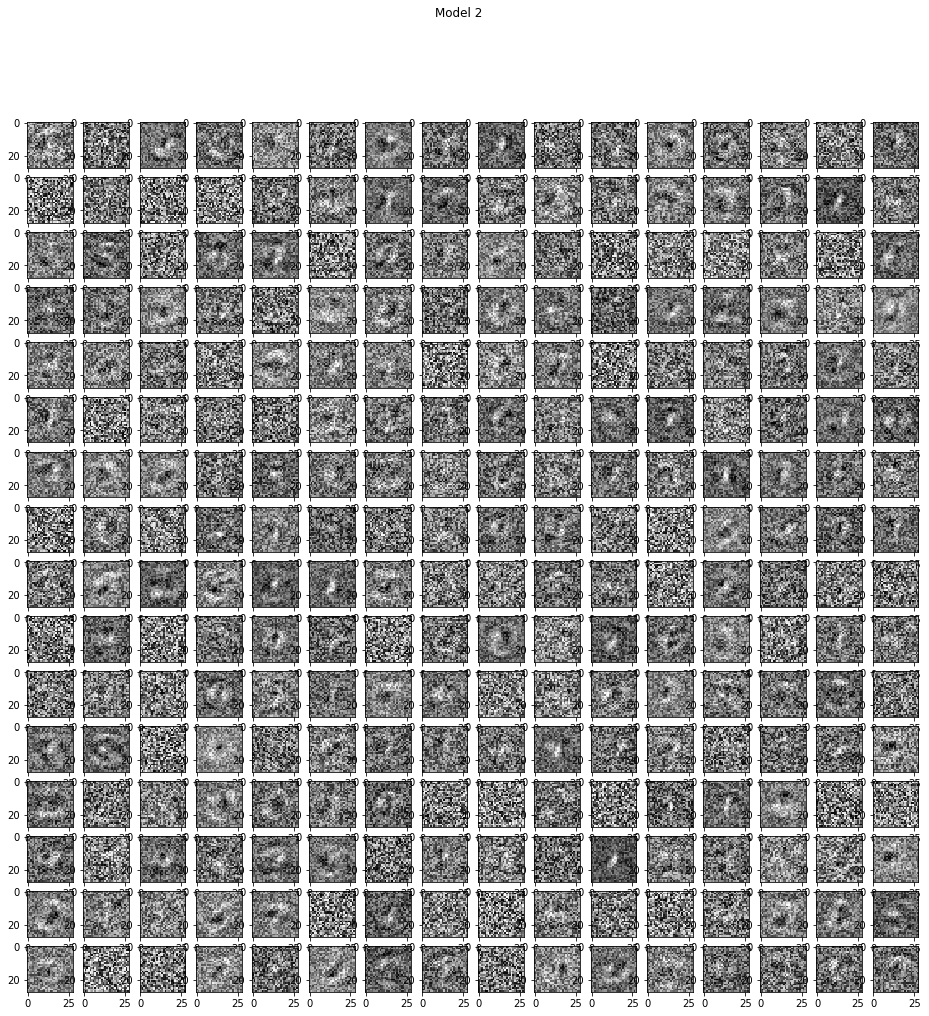

In [19]:
visualize_layer_weights(model2, 0, 256, 28, 'Model 2')

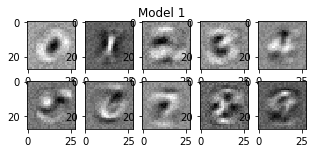

In [20]:
visualize_layer_weights(model, 0, 10, 28, 'Model 1')